In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from sklearn.feature_selection import RFECV 
from sklearn.linear_model import LinearRegression
import category_encoders as ce
from category_encoders.target_encoder import TargetEncoder

In [3]:
from scipy import stats

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Input,InputLayer
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [5]:
df1 = pd.read_csv('E:\\My files\\Dr Buzna\\trips\\NN\\real_distance\\tripdf_sp_sps.csv', index_col=0)
df2 = pd.read_csv('E:\\My files\\Dr Buzna\\trips\\NN\\real_distance\\tripdf1_sp_sps.csv', index_col=0)
df1 = df1.drop(['4d ranked','5th ranked','6th ranked','4rd dist','5th dist','6th dist'],axis=1)
df1['hr_sin'] = np.sin(df1['hour of day']*(2.*np.pi/24))
df1['hr_cos'] = np.cos(df1['hour of day']*(2.*np.pi/24))
print(df1.shape)
df1.head(5)

(8282, 11)


travel time   distance  hour of day 1st ranked    2nd ranked    3rd ranked  \
0         1038  17838.624           16    primary      tertiary  primary_link   
1         1020  17485.724           22    primary      tertiary  primary_link   
2          730   9837.591            6    primary  unclassified      tertiary   
3         1235  14108.017           13    primary   residential  unclassified   
4          576  10355.252           17    primary   residential      tertiary   

   1st dist  2nd dist  3rd dist    hr_sin        hr_cos  
0  0.944674  0.040381  0.014109 -0.866025 -5.000000e-01  
1  0.944411  0.041196  0.014394 -0.500000  8.660254e-01  
2  0.822350  0.072746  0.053866  1.000000  6.123234e-17  
3  0.648469  0.269826  0.050726 -0.258819 -9.659258e-01  
4  0.797448  0.137477  0.065075 -0.965926 -2.588190e-01

In [6]:
print(df2.shape)
df2.head(5)

(8282, 19)


travel time   distance  hour of day  living_street  motorway  \
0         1038  17838.624           16            0.0       0.0   
1         1020  17485.724           22            0.0       0.0   
2          730   9837.591            6            0.0       0.0   
3         1235  14108.017           13            0.0       0.0   
4          576  10355.252           17            0.0       0.0   

   motorway_link    primary  primary_link  residential  road  secondary  \
0            0.0  16851.678       251.682       14.930   0.0        0.0   
1            0.0  16513.708       251.682        0.000   0.0        0.0   
2            0.0   8089.947         0.000       98.164   0.0        0.0   
3            0.0   9148.605         0.000     3806.703   0.0        0.0   
4            0.0   8257.777         0.000     1423.604   0.0        0.0   

   secondary_link  service  tertiary  track  trunk  trunk_link  unclassified  \
0             0.0    0.000   720.334    0.0    0.0         0.0         0.000   
1             0.0    0.000   720.334    0.0    0.0         0.0         0.000   
2             0.0  403.924   529.915    0.0    0.0         0.0       715.641   
3             0.0    0.000   437.068    0.0    0.0         0.0       715.641   
4             0.0    0.000   673.871    0.0    0.0         0.0         0.000   

   others  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

In [7]:
# df0 = pd.merge(df1,df2, on=['travel time','distance','hour of day'])
# df0.shape
# df0

In [8]:
df3 = pd.read_csv('C:\\My files\\Dr Buzna\\trips\\NN\\dijk_distance\\tripdf_sp_sps.csv', index_col=0)
print(df3.shape)
df3.head()

(8267, 6)


travel time  hour of day   distance   est_dist  similarity  similarity_dijk
0         1038           16  17838.624  19918.783    0.229358         0.357143
1         1020           22  17485.724  20252.652    0.257143         0.385714
2          730            6   9837.591   9896.058    0.689189         0.708333
3         1235           13  14108.017  14927.800    0.404412         0.410448
4          576           17  10355.252  10240.928    0.972973         0.986301

In [9]:
df1 = pd.merge(df3,df1, on = ['travel time','distance','hour of day'])
df2 = pd.merge(df3,df2, on = ['travel time','distance','hour of day'])
df2

travel time  hour of day   distance   est_dist  similarity  \
0            1038           16  17838.624  19918.783    0.229358   
1            1020           22  17485.724  20252.652    0.257143   
2             730            6   9837.591   9896.058    0.689189   
3            1235           13  14108.017  14927.800    0.404412   
4             576           17  10355.252  10240.928    0.972973   
...           ...          ...        ...        ...         ...   
8262          764           17  13975.498  13858.163    0.816667   
8263         1023            9  13882.472  13795.716    0.352941   
8264          960           15  12709.790  12673.605    0.925532   
8265         1349           18  22283.246  22944.675    0.508772   
8266          393           19   6337.100   6355.709    0.461538   

      similarity_dijk  living_street  motorway  motorway_link    primary  ...  \
0            0.357143            0.0       0.0            0.0  16851.678  ...   
1            0.385714            0.0       0.0            0.0  16513.708  ...   
2            0.708333            0.0       0.0            0.0   8089.947  ...   
3            0.410448            0.0       0.0            0.0   9148.605  ...   
4            0.986301            0.0       0.0            0.0   8257.777  ...   
...               ...            ...       ...            ...        ...  ...   
8262         0.777778            0.0       0.0            0.0  10923.176  ...   
8263         0.375000            0.0       0.0            0.0  10995.454  ...   
8264         0.956044            0.0       0.0            0.0   9552.713  ...   
8265         0.411348            0.0       0.0            0.0  20475.622  ...   
8266         0.382979            0.0       0.0            0.0   4012.289  ...   

      road  secondary  secondary_link  service  tertiary  track  trunk  \
0      0.0      0.000             0.0    0.000   720.334    0.0    0.0   
1      0.0      0.000             0.0    0.000   720.334    0.0    0.0   
2      0.0      0.000             0.0  403.924   529.915    0.0    0.0   
3      0.0      0.000             0.0    0.000   437.068    0.0    0.0   
4      0.0      0.000             0.0    0.000   673.871    0.0    0.0   
...    ...        ...             ...      ...       ...    ...    ...   
8262   0.0      0.000             0.0    0.000  2582.158    0.0    0.0   
8263   0.0      0.000             0.0    0.000   451.158    0.0    0.0   
8264   0.0      0.000             0.0    0.000   264.561    0.0    0.0   
8265   0.0   1321.118             0.0    0.000   486.506    0.0    0.0   
8266   0.0      0.000             0.0    0.000  1290.249    0.0    0.0   

      trunk_link  unclassified  others  
0            0.0         0.000     0.0  
1            0.0         0.000     0.0  
2            0.0       715.641     0.0  
3            0.0       715.641     0.0  
4            0.0         0.000     0.0  
...          ...           ...     ...  
8262         0.0         0.000     0.0  
8263         0.0         0.000     0.0  
8264         0.0         0.000     0.0  
8265         0.0         0.000     0.0  
8266         0.0         0.000     0.0  

[8267 rows x 22 columns]

In [10]:
# # category reduction
# option = ['residential','tertiary','primary']
# df_merged.loc[~df_merged['1st ranked'].isin(option),'1st ranked'] = 'others1'
# option = ['residential','tertiary','secondary','not']
# df_merged.loc[~df_merged['2nd ranked'].isin(option),'2nd ranked'] = 'others2'
# option = ['residential','tertiary','not']
# df_merged.loc[~df_merged['3rd ranked'].isin(option),'3rd ranked'] = 'others3'

In [11]:
# # feature (mean) encoding
# te = TargetEncoder()
# df_merged['1st ranked'] = te.fit_transform(df_merged['1st ranked'],df_merged['travel time'])
# df_merged['2nd ranked'] = te.fit_transform(df_merged['2nd ranked'],df_merged['travel time'])
# df_merged['3rd ranked'] = te.fit_transform(df_merged['3rd ranked'],df_merged['travel time'])
# print(df_merged.shape)
# df_merged.iloc[1:5,2:]


In [12]:
# outlier removal
from scipy import stats
df1 = df1[(np.abs(stats.zscore(df1['distance'])) < 3)]
df2 = df2[(np.abs(stats.zscore(df2['distance'])) < 3)]
df1

travel time  hour of day   distance   est_dist  similarity  \
0            1038           16  17838.624  19918.783    0.229358   
1            1020           22  17485.724  20252.652    0.257143   
2             730            6   9837.591   9896.058    0.689189   
3            1235           13  14108.017  14927.800    0.404412   
4             576           17  10355.252  10240.928    0.972973   
...           ...          ...        ...        ...         ...   
8262          764           17  13975.498  13858.163    0.816667   
8263         1023            9  13882.472  13795.716    0.352941   
8264          960           15  12709.790  12673.605    0.925532   
8265         1349           18  22283.246  22944.675    0.508772   
8266          393           19   6337.100   6355.709    0.461538   

      similarity_dijk 1st ranked    2nd ranked    3rd ranked  1st dist  \
0            0.357143    primary      tertiary  primary_link  0.944674   
1            0.385714    primary      tertiary  primary_link  0.944411   
2            0.708333    primary  unclassified      tertiary  0.822350   
3            0.410448    primary   residential  unclassified  0.648469   
4            0.986301    primary   residential      tertiary  0.797448   
...               ...        ...           ...           ...       ...   
8262         0.777778    primary      tertiary   residential  0.781595   
8263         0.375000    primary   residential      tertiary  0.792039   
8264         0.956044    primary   residential  primary_link  0.751603   
8265         0.411348    primary     secondary      tertiary  0.918880   
8266         0.382979    primary      tertiary   residential  0.633143   

      2nd dist  3rd dist    hr_sin        hr_cos  
0     0.040381  0.014109 -0.866025 -5.000000e-01  
1     0.041196  0.014394 -0.500000  8.660254e-01  
2     0.072746  0.053866  1.000000  6.123234e-17  
3     0.269826  0.050726 -0.258819 -9.659258e-01  
4     0.137477  0.065075 -0.965926 -2.588190e-01  
...        ...       ...       ...           ...  
8262  0.184763  0.033642 -0.965926 -2.588190e-01  
8263  0.171321  0.032498  0.707107 -7.071068e-01  
8264  0.193549  0.034033 -0.707107 -7.071068e-01  
8265  0.059288  0.021833 -1.000000 -1.836970e-16  
8266  0.203602  0.147138 -0.965926  2.588190e-01  

[8157 rows x 14 columns]

In [13]:
# # standardization
# from sklearn import preprocessing
# min_max = preprocessing.MinMaxScaler()
# scaled_df = min_max.fit_transform(df_merged.iloc[:,2:3].values)
# df = pd.DataFrame(scaled_df,columns=df_merged.columns[2:3])

In [14]:
# Normalize using Min/Max Normalization.
normalized_distance2=(df1['distance']-df1['distance'].min())/(df1['distance'].max()-df1['distance'].min())
normalized_distance22=(df2['distance']-df2['distance'].min())/(df2['distance'].max()-df2['distance'].min())

normalized_distance3=(df1['est_dist']-df1['est_dist'].min())/(df1['est_dist'].max()-df1['est_dist'].min())
normalized_distance33=(df2['est_dist']-df2['est_dist'].min())/(df2['est_dist'].max()-df2['est_dist'].min())

In [15]:
df1['distance'] = normalized_distance2
df2['distance'] = normalized_distance22

df1['est_dist'] = normalized_distance3
df2['est_dist'] = normalized_distance33

display(df1.head(2))
display(df2.head(2))

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         1038           16  0.542630  0.519876    0.229358         0.357143   
1         1020           22  0.531771  0.528590    0.257143         0.385714   

  1st ranked 2nd ranked    3rd ranked  1st dist  2nd dist  3rd dist    hr_sin  \
0    primary   tertiary  primary_link  0.944674  0.040381  0.014109 -0.866025   
1    primary   tertiary  primary_link  0.944411  0.041196  0.014394 -0.500000   

     hr_cos  
0 -0.500000  
1  0.866025

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         1038           16  0.542630  0.519876    0.229358         0.357143   
1         1020           22  0.531771  0.528590    0.257143         0.385714   

   living_street  motorway  motorway_link    primary  ...  road  secondary  \
0            0.0       0.0            0.0  16851.678  ...   0.0        0.0   
1            0.0       0.0            0.0  16513.708  ...   0.0        0.0   

   secondary_link  service  tertiary  track  trunk  trunk_link  unclassified  \
0             0.0      0.0   720.334    0.0    0.0         0.0           0.0   
1             0.0      0.0   720.334    0.0    0.0         0.0           0.0   

   others  
0     0.0  
1     0.0  

[2 rows x 22 columns]

# NN-based modeling

In [16]:
# fix random seed for reproducibility
#The specific seed value does not matter as long as it stays the same for each run of your code, it could be 1,2,3,...
np.random.seed(7)

In [17]:
def nnmodel(*num_neuron,num_hlayers,Epoch):

    if num_hlayers == 1:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(1))
    else:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(1))
    # model.compile(loss='mse', optimizer='adam')
    learning_rate = 0.5
    model.compile(optimizer='adam',
                  loss=tf.keras.metrics.mean_squared_error,
                  metrics=['mape',tf.keras.metrics.RootMeanSquaredError(name='rmse')])
    history = model.fit(X_train, y_train, verbose=1, epochs=Epoch,
                       validation_data=(X_test, y_test))   
    print('minimum testing RMSE: ',min(history.history['val_rmse'])/60)
    print('minimum testing MAPE: ',min(history.history['val_mape'])/100)
    
    return history

In [18]:
def nnmodel_(*num_neuron,num_hlayers,Epoch):

    if num_hlayers == 1:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(1))
    elif num_hlayers == 2:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(1))
    else:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(num_neuron[2], activation='relu'))
        model.add(Dense(1))        
    # model.compile(loss='mse', optimizer='adam')
    learning_rate = 0.5
    model.compile(optimizer='adam',
                  loss=tf.keras.metrics.mean_squared_error,
                  metrics=['mape',tf.keras.metrics.RootMeanSquaredError(name='rmse')])
    X_train0 = tf.convert_to_tensor(X_train,dtype = tf.float32)
    y_train0 = tf.convert_to_tensor(y_train,dtype = tf.float32)
    X_test0 = tf.convert_to_tensor(X_test,dtype = tf.float32)
    y_test0 = tf.convert_to_tensor(y_test,dtype = tf.float32)
    history = model.fit(X_train0, y_train0, verbose=1, epochs=Epoch,
                       validation_data=(X_test0, y_test0))   
    print('minimum testing RMSE: ',min(history.history['val_rmse'])/60)
    print('minimum testing MAPE: ',min(history.history['val_mape'])/100)
    
    return history

In [19]:
def plotme(model):

    # Plot the training and validation accuracy and loss at each epoch
    loss1 = [f/60 for f in model.history['rmse']]
    val_loss1 = [f/60 for f in model.history['val_rmse']]
    loss2 = model.history['mape']
    val_loss2 = model.history['val_mape']
    epochs = range(1, len(model.history['loss'])+1)
    plt.figure(figsize=(5, 3))
    plt.plot(epochs, val_loss1, 'r', label='Validation rmse')
    plt.plot(epochs, loss1, 'y', label='Trainnig rmse')
    plt.plot(epochs, val_loss2, 'k', label='Validation mape')
    plt.plot(epochs, loss2, 'b', label='Trainnig mape')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    #plt.xlim(lims)
    yli = max(model.history['val_mape'])
    plt.ylim([-1, yli+10])
    plt.legend()
    plt.show()

## sub-problem 1:     ******* input:distance *********

In [35]:
my_df = df1[['travel time','est_dist']]
my_df.head(3)

travel time  est_dist
0         1038  0.309425
1         1020  0.314612
2          730  0.153729

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

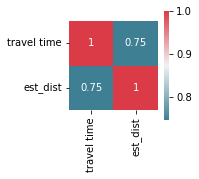

In [36]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(2,2))
corr = my_df.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [37]:
x = np.array(df1[['est_dist']])
y = np.array(df1['travel time'])
# x

In [38]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [39]:
print(X_train.shape)
print(X_test.shape)
# X_train

(6525, 1)
(1632, 1)


In [40]:
# inputs: distance
model1_1 = nnmodel(5, num_hlayers=1,Epoch=500)
model1_1

Epoch 1/500
204/204 [==============================] - 1s 2ms/step - loss: 765228.6250 - mape: 99.9839 - rmse: 874.7735 - val_loss: 796796.8750 - val_mape: 99.9654 - val_rmse: 892.6348
Epoch 2/500
204/204 [==============================] - 0s 2ms/step - loss: 764887.6875 - mape: 99.9473 - rmse: 874.5786 - val_loss: 796471.7500 - val_mape: 99.9300 - val_rmse: 892.4526
Epoch 3/500
204/204 [==============================] - 0s 2ms/step - loss: 764571.1250 - mape: 99.9118 - rmse: 874.3976 - val_loss: 796153.0000 - val_mape: 99.8948 - val_rmse: 892.2740
Epoch 4/500
204/204 [==============================] - 0s 2ms/step - loss: 764257.2500 - mape: 99.8762 - rmse: 874.2181 - val_loss: 795834.2500 - val_mape: 99.8596 - val_rmse: 892.0954
Epoch 5/500
204/204 [==============================] - 1s 3ms/step - loss: 763943.8125 - mape: 99.8409 - rmse: 874.0388 - val_loss: 795516.5000 - val_mape: 99.8244 - val_rmse: 891.9173
Epoch 6/500
204/204 [==============================] - 0s 1ms/step - loss: 

204/204 [==============================] - 0s 2ms/step - loss: 737929.6250 - mape: 96.8659 - rmse: 859.0283 - val_loss: 769110.7500 - val_mape: 96.8718 - val_rmse: 876.9896
Epoch 90/500
204/204 [==============================] - 0s 2ms/step - loss: 737623.8750 - mape: 96.8305 - rmse: 858.8503 - val_loss: 768800.6250 - val_mape: 96.8367 - val_rmse: 876.8127
Epoch 91/500
204/204 [==============================] - 0s 1ms/step - loss: 737317.8750 - mape: 96.7956 - rmse: 858.6722 - val_loss: 768490.5625 - val_mape: 96.8016 - val_rmse: 876.6359
Epoch 92/500
204/204 [==============================] - 0s 2ms/step - loss: 737011.5000 - mape: 96.7600 - rmse: 858.4937 - val_loss: 768179.4375 - val_mape: 96.7664 - val_rmse: 876.4584
Epoch 93/500
204/204 [==============================] - 0s 2ms/step - loss: 736705.7500 - mape: 96.7244 - rmse: 858.3157 - val_loss: 767868.6250 - val_mape: 96.7312 - val_rmse: 876.2811
Epoch 94/500
204/204 [==============================] - 0s 2ms/step - loss: 736400.

Epoch 133/500
204/204 [==============================] - 0s 2ms/step - loss: 724538.5625 - mape: 95.3083 - rmse: 851.1983 - val_loss: 755515.1250 - val_mape: 95.3256 - val_rmse: 869.2037
Epoch 134/500
204/204 [==============================] - 0s 1ms/step - loss: 724235.7500 - mape: 95.2730 - rmse: 851.0204 - val_loss: 755208.0625 - val_mape: 95.2905 - val_rmse: 869.0271
Epoch 135/500
204/204 [==============================] - 0s 1ms/step - loss: 723933.8125 - mape: 95.2372 - rmse: 850.8430 - val_loss: 754901.1875 - val_mape: 95.2553 - val_rmse: 868.8505
Epoch 136/500
204/204 [==============================] - 0s 1ms/step - loss: 723631.1875 - mape: 95.2021 - rmse: 850.6652 - val_loss: 754595.0000 - val_mape: 95.2202 - val_rmse: 868.6743
Epoch 137/500
204/204 [==============================] - 0s 1ms/step - loss: 723329.1875 - mape: 95.1668 - rmse: 850.4876 - val_loss: 754287.0000 - val_mape: 95.1850 - val_rmse: 868.4969
Epoch 138/500
204/204 [==============================] - 1s 3ms/s

Epoch 177/500
204/204 [==============================] - 0s 1ms/step - loss: 711308.1250 - mape: 93.7508 - rmse: 843.3909 - val_loss: 742080.3125 - val_mape: 93.7796 - val_rmse: 861.4409
Epoch 178/500
204/204 [==============================] - 0s 2ms/step - loss: 711009.0000 - mape: 93.7153 - rmse: 843.2135 - val_loss: 741776.8750 - val_mape: 93.7445 - val_rmse: 861.2647
Epoch 179/500
204/204 [==============================] - 0s 2ms/step - loss: 710710.6875 - mape: 93.6798 - rmse: 843.0366 - val_loss: 741472.6875 - val_mape: 93.7093 - val_rmse: 861.0881
Epoch 180/500
204/204 [==============================] - 0s 1ms/step - loss: 710411.8750 - mape: 93.6444 - rmse: 842.8594 - val_loss: 741169.5000 - val_mape: 93.6741 - val_rmse: 860.9120
Epoch 181/500
204/204 [==============================] - 0s 2ms/step - loss: 710113.0625 - mape: 93.6090 - rmse: 842.6821 - val_loss: 740866.7500 - val_mape: 93.6390 - val_rmse: 860.7361
Epoch 182/500
204/204 [==============================] - 1s 2ms/s

Epoch 221/500
204/204 [==============================] - 0s 2ms/step - loss: 698238.1250 - mape: 92.1932 - rmse: 835.6064 - val_loss: 728805.7500 - val_mape: 92.2337 - val_rmse: 853.7012
Epoch 222/500
204/204 [==============================] - 1s 3ms/step - loss: 697943.0000 - mape: 92.1578 - rmse: 835.4298 - val_loss: 728506.1250 - val_mape: 92.1986 - val_rmse: 853.5257
Epoch 223/500
204/204 [==============================] - 0s 2ms/step - loss: 697648.1875 - mape: 92.1224 - rmse: 835.2534 - val_loss: 728205.8125 - val_mape: 92.1635 - val_rmse: 853.3497
Epoch 224/500
204/204 [==============================] - 1s 3ms/step - loss: 697352.8750 - mape: 92.0869 - rmse: 835.0765 - val_loss: 727906.1250 - val_mape: 92.1283 - val_rmse: 853.1741
Epoch 225/500
204/204 [==============================] - 0s 2ms/step - loss: 697058.4375 - mape: 92.0514 - rmse: 834.9003 - val_loss: 727606.5000 - val_mape: 92.0932 - val_rmse: 852.9985
Epoch 226/500
204/204 [==============================] - 1s 3ms/s

Epoch 265/500
204/204 [==============================] - 1s 2ms/step - loss: 685329.6250 - mape: 90.6359 - rmse: 827.8464 - val_loss: 715692.3750 - val_mape: 90.6881 - val_rmse: 845.9860
Epoch 266/500
204/204 [==============================] - 0s 2ms/step - loss: 685038.1250 - mape: 90.6006 - rmse: 827.6703 - val_loss: 715396.2500 - val_mape: 90.6530 - val_rmse: 845.8110
Epoch 267/500
204/204 [==============================] - 1s 3ms/step - loss: 684746.6250 - mape: 90.5654 - rmse: 827.4942 - val_loss: 715099.6250 - val_mape: 90.6179 - val_rmse: 845.6356
Epoch 268/500
204/204 [==============================] - 0s 2ms/step - loss: 684455.1250 - mape: 90.5296 - rmse: 827.3181 - val_loss: 714803.7500 - val_mape: 90.5827 - val_rmse: 845.4607
Epoch 269/500
204/204 [==============================] - 0s 2ms/step - loss: 684163.8125 - mape: 90.4945 - rmse: 827.1420 - val_loss: 714507.3750 - val_mape: 90.5475 - val_rmse: 845.2854
Epoch 270/500
204/204 [==============================] - 0s 1ms/s

Epoch 309/500
204/204 [==============================] - 1s 3ms/step - loss: 672580.8750 - mape: 89.0786 - rmse: 820.1103 - val_loss: 702738.6875 - val_mape: 89.1426 - val_rmse: 838.2951
Epoch 310/500
204/204 [==============================] - 1s 3ms/step - loss: 672293.1250 - mape: 89.0435 - rmse: 819.9348 - val_loss: 702446.1250 - val_mape: 89.1075 - val_rmse: 838.1206
Epoch 311/500
204/204 [==============================] - 0s 2ms/step - loss: 672005.0000 - mape: 89.0085 - rmse: 819.7591 - val_loss: 702153.8125 - val_mape: 89.0724 - val_rmse: 837.9462
Epoch 312/500
204/204 [==============================] - 0s 2ms/step - loss: 671717.5000 - mape: 88.9725 - rmse: 819.5837 - val_loss: 701860.6875 - val_mape: 89.0372 - val_rmse: 837.7712
Epoch 313/500
204/204 [==============================] - 1s 3ms/step - loss: 671429.8750 - mape: 88.9371 - rmse: 819.4083 - val_loss: 701568.6250 - val_mape: 89.0021 - val_rmse: 837.5969
Epoch 314/500
204/204 [==============================] - 0s 1ms/s

Epoch 353/500
204/204 [==============================] - 0s 2ms/step - loss: 659994.6875 - mape: 87.5220 - rmse: 812.4006 - val_loss: 689947.4375 - val_mape: 87.5975 - val_rmse: 830.6307
Epoch 354/500
204/204 [==============================] - 1s 3ms/step - loss: 659710.1250 - mape: 87.4870 - rmse: 812.2254 - val_loss: 689658.6875 - val_mape: 87.5624 - val_rmse: 830.4569
Epoch 355/500
204/204 [==============================] - 1s 3ms/step - loss: 659426.0000 - mape: 87.4513 - rmse: 812.0505 - val_loss: 689369.4375 - val_mape: 87.5272 - val_rmse: 830.2828
Epoch 356/500
204/204 [==============================] - 1s 3ms/step - loss: 659141.8750 - mape: 87.4159 - rmse: 811.8755 - val_loss: 689081.0000 - val_mape: 87.4921 - val_rmse: 830.1090
Epoch 357/500
204/204 [==============================] - 0s 1ms/step - loss: 658858.0000 - mape: 87.3805 - rmse: 811.7007 - val_loss: 688792.3125 - val_mape: 87.4570 - val_rmse: 829.9351
Epoch 358/500
204/204 [==============================] - 0s 1ms/s

Epoch 397/500
204/204 [==============================] - 0s 2ms/step - loss: 647568.6250 - mape: 85.9678 - rmse: 804.7165 - val_loss: 677316.8125 - val_mape: 86.0615 - val_rmse: 822.9926
Epoch 398/500
204/204 [==============================] - 0s 2ms/step - loss: 647288.1875 - mape: 85.9326 - rmse: 804.5422 - val_loss: 677032.1875 - val_mape: 86.0268 - val_rmse: 822.8196
Epoch 399/500
204/204 [==============================] - 0s 2ms/step - loss: 647007.5625 - mape: 85.8970 - rmse: 804.3678 - val_loss: 676746.7500 - val_mape: 85.9920 - val_rmse: 822.6462
Epoch 400/500
204/204 [==============================] - 0s 2ms/step - loss: 646727.4375 - mape: 85.8617 - rmse: 804.1937 - val_loss: 676461.5625 - val_mape: 85.9572 - val_rmse: 822.4728
Epoch 401/500
204/204 [==============================] - 0s 2ms/step - loss: 646447.1250 - mape: 85.8265 - rmse: 804.0193 - val_loss: 676176.9375 - val_mape: 85.9224 - val_rmse: 822.2998
Epoch 402/500
204/204 [==============================] - 0s 2ms/s

Epoch 441/500
204/204 [==============================] - 0s 2ms/step - loss: 635303.1875 - mape: 84.4195 - rmse: 797.0591 - val_loss: 664847.0625 - val_mape: 84.5367 - val_rmse: 815.3815
Epoch 442/500
204/204 [==============================] - 0s 2ms/step - loss: 635026.7500 - mape: 84.3844 - rmse: 796.8857 - val_loss: 664565.4375 - val_mape: 84.5025 - val_rmse: 815.2088
Epoch 443/500
204/204 [==============================] - 0s 2ms/step - loss: 634749.8125 - mape: 84.3495 - rmse: 796.7119 - val_loss: 664283.5000 - val_mape: 84.4682 - val_rmse: 815.0359
Epoch 444/500
204/204 [==============================] - 0s 2ms/step - loss: 634472.8125 - mape: 84.3145 - rmse: 796.5380 - val_loss: 664002.8125 - val_mape: 84.4341 - val_rmse: 814.8636
Epoch 445/500
204/204 [==============================] - 0s 2ms/step - loss: 634196.3750 - mape: 84.2796 - rmse: 796.3645 - val_loss: 663721.3125 - val_mape: 84.3999 - val_rmse: 814.6909
Epoch 446/500
204/204 [==============================] - 0s 2ms/s

Epoch 485/500
204/204 [==============================] - 1s 3ms/step - loss: 623198.8750 - mape: 82.8851 - rmse: 789.4294 - val_loss: 652537.9375 - val_mape: 83.0317 - val_rmse: 807.7982
Epoch 486/500
204/204 [==============================] - 0s 2ms/step - loss: 622925.6250 - mape: 82.8505 - rmse: 789.2563 - val_loss: 652259.6250 - val_mape: 82.9975 - val_rmse: 807.6259
Epoch 487/500
204/204 [==============================] - 1s 3ms/step - loss: 622652.7500 - mape: 82.8159 - rmse: 789.0835 - val_loss: 651982.0625 - val_mape: 82.9633 - val_rmse: 807.4540
Epoch 488/500
204/204 [==============================] - 1s 3ms/step - loss: 622379.5000 - mape: 82.7815 - rmse: 788.9103 - val_loss: 651704.3750 - val_mape: 82.9291 - val_rmse: 807.2821
Epoch 489/500
204/204 [==============================] - 1s 3ms/step - loss: 622106.2500 - mape: 82.7466 - rmse: 788.7371 - val_loss: 651426.6875 - val_mape: 82.8949 - val_rmse: 807.1101
Epoch 490/500
204/204 [==============================] - 0s 1ms/s

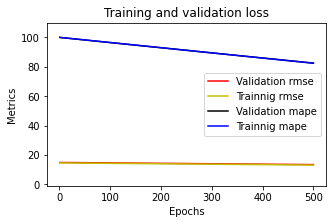

In [70]:
plotme(model1_1)

In [42]:
# inputs: distance
model1_2 = nnmodel(10, num_hlayers=1,Epoch=500)
model1_2

Epoch 1/500
204/204 [==============================] - 1s 2ms/step - loss: 764267.7500 - mape: 99.9011 - rmse: 874.2241 - val_loss: 794984.3125 - val_mape: 99.7990 - val_rmse: 891.6190
Epoch 2/500
204/204 [==============================] - 1s 3ms/step - loss: 761793.6875 - mape: 99.6456 - rmse: 872.8079 - val_loss: 791652.9375 - val_mape: 99.4624 - val_rmse: 889.7488
Epoch 3/500
204/204 [==============================] - 0s 2ms/step - loss: 757458.5000 - mape: 99.2006 - rmse: 870.3209 - val_loss: 786247.0000 - val_mape: 98.9109 - val_rmse: 886.7057
Epoch 4/500
204/204 [==============================] - 0s 1ms/step - loss: 751267.8125 - mape: 98.5492 - rmse: 866.7571 - val_loss: 779144.3750 - val_mape: 98.1800 - val_rmse: 882.6915
Epoch 5/500
204/204 [==============================] - 0s 2ms/step - loss: 743470.7500 - mape: 97.7272 - rmse: 862.2475 - val_loss: 770470.0625 - val_mape: 97.2800 - val_rmse: 877.7642
Epoch 6/500
204/204 [==============================] - 0s 1ms/step - loss: 

204/204 [==============================] - 0s 2ms/step - loss: 107848.5156 - mape: 45.7109 - rmse: 328.4030 - val_loss: 122618.4297 - val_mape: 45.5255 - val_rmse: 350.1692
Epoch 90/500
204/204 [==============================] - 0s 1ms/step - loss: 107286.6406 - mape: 45.6239 - rmse: 327.5464 - val_loss: 122071.9922 - val_mape: 45.3523 - val_rmse: 349.3880
Epoch 91/500
204/204 [==============================] - 0s 1ms/step - loss: 106725.0391 - mape: 45.4682 - rmse: 326.6880 - val_loss: 121536.2734 - val_mape: 45.1439 - val_rmse: 348.6205
Epoch 92/500
204/204 [==============================] - 0s 2ms/step - loss: 106159.2578 - mape: 45.2091 - rmse: 325.8209 - val_loss: 120993.2812 - val_mape: 44.9655 - val_rmse: 347.8409
Epoch 93/500
204/204 [==============================] - 0s 2ms/step - loss: 105593.2031 - mape: 45.0040 - rmse: 324.9511 - val_loss: 120432.6172 - val_mape: 44.8121 - val_rmse: 347.0340
Epoch 94/500
204/204 [==============================] - 1s 2ms/step - loss: 105026.

204/204 [==============================] - 0s 1ms/step - loss: 74320.8125 - mape: 30.8997 - rmse: 272.6184 - val_loss: 90869.1875 - val_mape: 30.7185 - val_rmse: 301.4452
Epoch 178/500
204/204 [==============================] - 0s 1ms/step - loss: 74214.9922 - mape: 30.7400 - rmse: 272.4243 - val_loss: 90777.5391 - val_mape: 30.6032 - val_rmse: 301.2931
Epoch 179/500
204/204 [==============================] - 0s 2ms/step - loss: 74111.2031 - mape: 30.7145 - rmse: 272.2337 - val_loss: 90690.2188 - val_mape: 30.4847 - val_rmse: 301.1482
Epoch 180/500
204/204 [==============================] - 0s 2ms/step - loss: 74013.9297 - mape: 30.5321 - rmse: 272.0550 - val_loss: 90611.0000 - val_mape: 30.3737 - val_rmse: 301.0166
Epoch 181/500
204/204 [==============================] - 0s 2ms/step - loss: 73917.6406 - mape: 30.4993 - rmse: 271.8780 - val_loss: 90551.4141 - val_mape: 30.2027 - val_rmse: 300.9176
Epoch 182/500
204/204 [==============================] - 0s 1ms/step - loss: 73826.6250 -

204/204 [==============================] - 1s 3ms/step - loss: 72301.8125 - mape: 27.3396 - rmse: 268.8900 - val_loss: 89346.2656 - val_mape: 27.2610 - val_rmse: 298.9084
Epoch 266/500
204/204 [==============================] - 0s 2ms/step - loss: 72297.9375 - mape: 27.3261 - rmse: 268.8828 - val_loss: 89356.4922 - val_mape: 27.2254 - val_rmse: 298.9256
Epoch 267/500
204/204 [==============================] - 0s 1ms/step - loss: 72299.2266 - mape: 27.2530 - rmse: 268.8852 - val_loss: 89373.0234 - val_mape: 27.1754 - val_rmse: 298.9532
Epoch 268/500
204/204 [==============================] - 0s 1ms/step - loss: 72300.1875 - mape: 27.3231 - rmse: 268.8869 - val_loss: 89355.6484 - val_mape: 27.2203 - val_rmse: 298.9242
Epoch 269/500
204/204 [==============================] - 0s 1ms/step - loss: 72294.5312 - mape: 27.2286 - rmse: 268.8764 - val_loss: 89365.0781 - val_mape: 27.1878 - val_rmse: 298.9399
Epoch 270/500
204/204 [==============================] - 0s 1ms/step - loss: 72292.6953 -

204/204 [==============================] - 0s 2ms/step - loss: 72290.8047 - mape: 27.1317 - rmse: 268.8695 - val_loss: 89384.4609 - val_mape: 27.0312 - val_rmse: 298.9724
Epoch 354/500
204/204 [==============================] - 0s 1ms/step - loss: 72289.9062 - mape: 27.0895 - rmse: 268.8678 - val_loss: 89375.1172 - val_mape: 27.0593 - val_rmse: 298.9567
Epoch 355/500
204/204 [==============================] - 0s 1ms/step - loss: 72290.2578 - mape: 27.0681 - rmse: 268.8685 - val_loss: 89385.1875 - val_mape: 27.0304 - val_rmse: 298.9736
Epoch 356/500
204/204 [==============================] - 0s 2ms/step - loss: 72289.6797 - mape: 27.0962 - rmse: 268.8674 - val_loss: 89359.7266 - val_mape: 27.1040 - val_rmse: 298.9310
Epoch 357/500
204/204 [==============================] - 0s 1ms/step - loss: 72288.2500 - mape: 27.0858 - rmse: 268.8647 - val_loss: 89369.7344 - val_mape: 27.0736 - val_rmse: 298.9477
Epoch 358/500
204/204 [==============================] - 0s 1ms/step - loss: 72292.4688 -

204/204 [==============================] - 0s 1ms/step - loss: 72291.1719 - mape: 27.0457 - rmse: 268.8702 - val_loss: 89363.3125 - val_mape: 27.0881 - val_rmse: 298.9370
Epoch 442/500
204/204 [==============================] - 0s 1ms/step - loss: 72292.4844 - mape: 27.1131 - rmse: 268.8726 - val_loss: 89354.6797 - val_mape: 27.1137 - val_rmse: 298.9225
Epoch 443/500
204/204 [==============================] - 0s 1ms/step - loss: 72288.4609 - mape: 27.1206 - rmse: 268.8651 - val_loss: 89359.0000 - val_mape: 27.1023 - val_rmse: 298.9297
Epoch 444/500
204/204 [==============================] - 0s 1ms/step - loss: 72289.4531 - mape: 27.1154 - rmse: 268.8670 - val_loss: 89362.9922 - val_mape: 27.0895 - val_rmse: 298.9364
Epoch 445/500
204/204 [==============================] - 0s 1ms/step - loss: 72291.8438 - mape: 27.1379 - rmse: 268.8714 - val_loss: 89357.2656 - val_mape: 27.1075 - val_rmse: 298.9268
Epoch 446/500
204/204 [==============================] - 0s 1ms/step - loss: 72289.3281 -

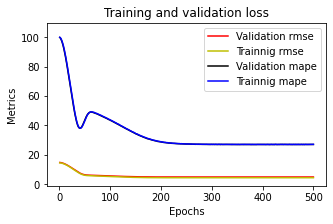

In [69]:
plotme(model1_2)

In [44]:
# inputs: distance
model1_3 = nnmodel(20, num_hlayers=1,Epoch=500)
model1_3

Epoch 1/500
204/204 [==============================] - 1s 2ms/step - loss: 764719.6875 - mape: 99.9345 - rmse: 874.4825 - val_loss: 795550.1875 - val_mape: 99.8431 - val_rmse: 891.9362
Epoch 2/500
204/204 [==============================] - 0s 2ms/step - loss: 762260.0000 - mape: 99.6813 - rmse: 873.0750 - val_loss: 791935.5000 - val_mape: 99.4741 - val_rmse: 889.9076
Epoch 3/500
204/204 [==============================] - 1s 3ms/step - loss: 757407.0000 - mape: 99.1736 - rmse: 870.2913 - val_loss: 785779.4375 - val_mape: 98.8413 - val_rmse: 886.4420
Epoch 4/500
204/204 [==============================] - 0s 1ms/step - loss: 750270.9375 - mape: 98.4155 - rmse: 866.1818 - val_loss: 777503.9375 - val_mape: 97.9842 - val_rmse: 881.7618
Epoch 5/500
204/204 [==============================] - 0s 1ms/step - loss: 741156.1250 - mape: 97.4581 - rmse: 860.9042 - val_loss: 767352.6875 - val_mape: 96.9242 - val_rmse: 875.9867
Epoch 6/500
204/204 [==============================] - 1s 3ms/step - loss: 

204/204 [==============================] - 0s 1ms/step - loss: 104147.6875 - mape: 44.6676 - rmse: 322.7192 - val_loss: 119025.6250 - val_mape: 44.3379 - val_rmse: 345.0009
Epoch 90/500
204/204 [==============================] - 0s 1ms/step - loss: 103547.4688 - mape: 44.4187 - rmse: 321.7879 - val_loss: 118440.9219 - val_mape: 44.1509 - val_rmse: 344.1525
Epoch 91/500
204/204 [==============================] - 0s 1ms/step - loss: 102941.5469 - mape: 44.1772 - rmse: 320.8451 - val_loss: 117835.1016 - val_mape: 44.0301 - val_rmse: 343.2712
Epoch 92/500
204/204 [==============================] - 0s 1ms/step - loss: 102338.0703 - mape: 44.0724 - rmse: 319.9032 - val_loss: 117262.3906 - val_mape: 43.8217 - val_rmse: 342.4360
Epoch 93/500
204/204 [==============================] - 0s 1ms/step - loss: 101738.6094 - mape: 43.8571 - rmse: 318.9649 - val_loss: 116691.4688 - val_mape: 43.5798 - val_rmse: 341.6013
Epoch 94/500
204/204 [==============================] - 0s 1ms/step - loss: 101139.

204/204 [==============================] - 0s 2ms/step - loss: 73207.7656 - mape: 29.5608 - rmse: 270.5693 - val_loss: 89944.8594 - val_mape: 29.3818 - val_rmse: 299.9081
Epoch 178/500
204/204 [==============================] - 1s 3ms/step - loss: 73148.7734 - mape: 29.4461 - rmse: 270.4603 - val_loss: 89888.2031 - val_mape: 29.3464 - val_rmse: 299.8136
Epoch 179/500
204/204 [==============================] - 1s 3ms/step - loss: 73092.6562 - mape: 29.3779 - rmse: 270.3565 - val_loss: 89852.8594 - val_mape: 29.2448 - val_rmse: 299.7547
Epoch 180/500
204/204 [==============================] - 1s 3ms/step - loss: 73045.6719 - mape: 29.3937 - rmse: 270.2696 - val_loss: 89826.7812 - val_mape: 29.1290 - val_rmse: 299.7112
Epoch 181/500
204/204 [==============================] - 0s 1ms/step - loss: 72993.8672 - mape: 29.2704 - rmse: 270.1738 - val_loss: 89786.8125 - val_mape: 29.0606 - val_rmse: 299.6445
Epoch 182/500
204/204 [==============================] - 0s 2ms/step - loss: 72950.7969 -

204/204 [==============================] - 0s 2ms/step - loss: 72292.0469 - mape: 27.2106 - rmse: 268.8718 - val_loss: 89361.3828 - val_mape: 27.1462 - val_rmse: 298.9337
Epoch 266/500
204/204 [==============================] - 0s 1ms/step - loss: 72292.1875 - mape: 27.1993 - rmse: 268.8721 - val_loss: 89365.5625 - val_mape: 27.1321 - val_rmse: 298.9407
Epoch 267/500
204/204 [==============================] - 0s 1ms/step - loss: 72294.9922 - mape: 27.2068 - rmse: 268.8773 - val_loss: 89381.7344 - val_mape: 27.0835 - val_rmse: 298.9678
Epoch 268/500
204/204 [==============================] - 0s 2ms/step - loss: 72290.0703 - mape: 27.1176 - rmse: 268.8681 - val_loss: 89356.0469 - val_mape: 27.1558 - val_rmse: 298.9248
Epoch 269/500
204/204 [==============================] - 1s 3ms/step - loss: 72291.4375 - mape: 27.2296 - rmse: 268.8707 - val_loss: 89362.0000 - val_mape: 27.1383 - val_rmse: 298.9348
Epoch 270/500
204/204 [==============================] - 0s 2ms/step - loss: 72290.3516 -

204/204 [==============================] - 0s 1ms/step - loss: 72294.4844 - mape: 27.1377 - rmse: 268.8763 - val_loss: 89349.8594 - val_mape: 27.1309 - val_rmse: 298.9145
Epoch 354/500
204/204 [==============================] - 0s 2ms/step - loss: 72289.7188 - mape: 27.1507 - rmse: 268.8675 - val_loss: 89383.1484 - val_mape: 27.0325 - val_rmse: 298.9702
Epoch 355/500
204/204 [==============================] - 1s 2ms/step - loss: 72292.8047 - mape: 27.0916 - rmse: 268.8732 - val_loss: 89385.1484 - val_mape: 27.0254 - val_rmse: 298.9735
Epoch 356/500
204/204 [==============================] - 0s 1ms/step - loss: 72299.2344 - mape: 27.1092 - rmse: 268.8852 - val_loss: 89368.6250 - val_mape: 27.0733 - val_rmse: 298.9459
Epoch 357/500
204/204 [==============================] - 0s 2ms/step - loss: 72290.3828 - mape: 27.1067 - rmse: 268.8687 - val_loss: 89369.9609 - val_mape: 27.0698 - val_rmse: 298.9481
Epoch 358/500
204/204 [==============================] - 0s 2ms/step - loss: 72298.4531 -

204/204 [==============================] - 0s 1ms/step - loss: 72290.2422 - mape: 27.0460 - rmse: 268.8684 - val_loss: 89375.4609 - val_mape: 27.0506 - val_rmse: 298.9573
Epoch 442/500
204/204 [==============================] - 0s 1ms/step - loss: 72290.6797 - mape: 27.1086 - rmse: 268.8693 - val_loss: 89351.4141 - val_mape: 27.1257 - val_rmse: 298.9171
Epoch 443/500
204/204 [==============================] - 0s 1ms/step - loss: 72290.7344 - mape: 27.1293 - rmse: 268.8694 - val_loss: 89365.2969 - val_mape: 27.0827 - val_rmse: 298.9403
Epoch 444/500
204/204 [==============================] - 0s 2ms/step - loss: 72291.3672 - mape: 27.1400 - rmse: 268.8705 - val_loss: 89350.4141 - val_mape: 27.1273 - val_rmse: 298.9154
Epoch 445/500
204/204 [==============================] - 0s 1ms/step - loss: 72294.2031 - mape: 27.1663 - rmse: 268.8758 - val_loss: 89368.5859 - val_mape: 27.0719 - val_rmse: 298.9458
Epoch 446/500
204/204 [==============================] - 0s 2ms/step - loss: 72289.6172 -

In [45]:
# inputs: distance
model1_4 = nnmodel(10,5, num_hlayers=2,Epoch=500)
model1_4

Epoch 1/500
204/204 [==============================] - 1s 2ms/step - loss: 764645.4375 - mape: 99.9290 - rmse: 874.4401 - val_loss: 795222.6875 - val_mape: 99.8104 - val_rmse: 891.7526
Epoch 2/500
204/204 [==============================] - 0s 1ms/step - loss: 760660.9375 - mape: 99.5133 - rmse: 872.1588 - val_loss: 788082.5625 - val_mape: 99.0821 - val_rmse: 887.7402
Epoch 3/500
204/204 [==============================] - 0s 1ms/step - loss: 748437.3125 - mape: 98.2258 - rmse: 865.1227 - val_loss: 769320.8750 - val_mape: 97.1458 - val_rmse: 877.1094
Epoch 4/500
204/204 [==============================] - 0s 1ms/step - loss: 722447.6875 - mape: 95.4556 - rmse: 849.9692 - val_loss: 734972.1875 - val_mape: 93.5146 - val_rmse: 857.3052
Epoch 5/500
204/204 [==============================] - 0s 1ms/step - loss: 680293.5625 - mape: 90.8293 - rmse: 824.7991 - val_loss: 683838.1875 - val_mape: 87.9009 - val_rmse: 826.9451
Epoch 6/500
204/204 [==============================] - 0s 998us/step - loss

204/204 [==============================] - 0s 2ms/step - loss: 72308.0234 - mape: 27.2199 - rmse: 268.9015 - val_loss: 89363.7344 - val_mape: 27.1387 - val_rmse: 298.9377
Epoch 90/500
204/204 [==============================] - 1s 2ms/step - loss: 72310.8047 - mape: 27.1894 - rmse: 268.9067 - val_loss: 89410.1484 - val_mape: 26.9992 - val_rmse: 299.0153
Epoch 91/500
204/204 [==============================] - 1s 3ms/step - loss: 72304.1562 - mape: 27.2617 - rmse: 268.8943 - val_loss: 89394.1406 - val_mape: 27.0440 - val_rmse: 298.9885
Epoch 92/500
204/204 [==============================] - 0s 1ms/step - loss: 72296.9766 - mape: 27.2312 - rmse: 268.8810 - val_loss: 89466.8906 - val_mape: 26.8604 - val_rmse: 299.1102
Epoch 93/500
204/204 [==============================] - 0s 2ms/step - loss: 72296.3203 - mape: 26.9486 - rmse: 268.8798 - val_loss: 89330.6562 - val_mape: 27.2151 - val_rmse: 298.8824
Epoch 94/500
204/204 [==============================] - 1s 2ms/step - loss: 72295.5391 - mape

204/204 [==============================] - 1s 3ms/step - loss: 72309.6797 - mape: 27.0664 - rmse: 268.9046 - val_loss: 89368.8516 - val_mape: 27.0668 - val_rmse: 298.9462
Epoch 178/500
204/204 [==============================] - 0s 1ms/step - loss: 72299.4688 - mape: 27.1220 - rmse: 268.8856 - val_loss: 89380.0625 - val_mape: 27.0375 - val_rmse: 298.9650
Epoch 179/500
204/204 [==============================] - 0s 1ms/step - loss: 72306.3750 - mape: 26.9059 - rmse: 268.8984 - val_loss: 89270.3438 - val_mape: 27.4136 - val_rmse: 298.7814
Epoch 180/500
204/204 [==============================] - 0s 1ms/step - loss: 72316.9531 - mape: 27.2739 - rmse: 268.9181 - val_loss: 89377.0391 - val_mape: 27.0500 - val_rmse: 298.9599
Epoch 181/500
204/204 [==============================] - 0s 2ms/step - loss: 72303.8672 - mape: 27.1568 - rmse: 268.8938 - val_loss: 89457.7266 - val_mape: 26.8438 - val_rmse: 299.0948
Epoch 182/500
204/204 [==============================] - 0s 2ms/step - loss: 72297.5469 -

204/204 [==============================] - 0s 2ms/step - loss: 72302.0469 - mape: 26.9436 - rmse: 268.8904 - val_loss: 89355.1484 - val_mape: 27.1149 - val_rmse: 298.9233
Epoch 266/500
204/204 [==============================] - 0s 1ms/step - loss: 72304.6953 - mape: 27.1301 - rmse: 268.8953 - val_loss: 89320.3359 - val_mape: 27.2266 - val_rmse: 298.8651
Epoch 267/500
204/204 [==============================] - 0s 2ms/step - loss: 72302.0938 - mape: 27.2400 - rmse: 268.8905 - val_loss: 89421.8594 - val_mape: 26.9225 - val_rmse: 299.0349
Epoch 268/500
204/204 [==============================] - 0s 2ms/step - loss: 72308.9766 - mape: 26.9992 - rmse: 268.9033 - val_loss: 89351.6641 - val_mape: 27.1225 - val_rmse: 298.9175
Epoch 269/500
204/204 [==============================] - 1s 3ms/step - loss: 72299.6562 - mape: 27.2359 - rmse: 268.8860 - val_loss: 89443.5312 - val_mape: 26.8803 - val_rmse: 299.0711
Epoch 270/500
204/204 [==============================] - 1s 3ms/step - loss: 72302.6094 -

204/204 [==============================] - 0s 2ms/step - loss: 72318.2656 - mape: 27.2562 - rmse: 268.9206 - val_loss: 89434.3906 - val_mape: 26.9018 - val_rmse: 299.0558
Epoch 354/500
204/204 [==============================] - 0s 1ms/step - loss: 72309.5703 - mape: 27.1440 - rmse: 268.9044 - val_loss: 89455.0000 - val_mape: 26.8485 - val_rmse: 299.0903
Epoch 355/500
204/204 [==============================] - 0s 1ms/step - loss: 72309.6719 - mape: 27.0062 - rmse: 268.9046 - val_loss: 89431.4297 - val_mape: 26.9083 - val_rmse: 299.0509
Epoch 356/500
204/204 [==============================] - 0s 1ms/step - loss: 72297.4141 - mape: 27.0616 - rmse: 268.8818 - val_loss: 89328.3203 - val_mape: 27.1955 - val_rmse: 298.8784
Epoch 357/500
204/204 [==============================] - 0s 1ms/step - loss: 72301.3906 - mape: 27.0176 - rmse: 268.8892 - val_loss: 89292.4609 - val_mape: 27.3248 - val_rmse: 298.8185
Epoch 358/500
204/204 [==============================] - 0s 2ms/step - loss: 72317.6953 -

204/204 [==============================] - 0s 2ms/step - loss: 72303.6797 - mape: 27.1454 - rmse: 268.8934 - val_loss: 89468.1797 - val_mape: 26.8167 - val_rmse: 299.1123
Epoch 442/500
204/204 [==============================] - 1s 3ms/step - loss: 72313.0938 - mape: 27.0820 - rmse: 268.9109 - val_loss: 89371.3984 - val_mape: 27.0647 - val_rmse: 298.9505
Epoch 443/500
204/204 [==============================] - 1s 3ms/step - loss: 72301.1562 - mape: 27.1238 - rmse: 268.8887 - val_loss: 89394.6562 - val_mape: 27.0019 - val_rmse: 298.9894
Epoch 444/500
204/204 [==============================] - 1s 3ms/step - loss: 72305.4609 - mape: 27.0640 - rmse: 268.8968 - val_loss: 89349.4375 - val_mape: 27.1280 - val_rmse: 298.9138
Epoch 445/500
204/204 [==============================] - 1s 3ms/step - loss: 72314.4531 - mape: 27.0149 - rmse: 268.9135 - val_loss: 89293.8594 - val_mape: 27.3191 - val_rmse: 298.8208
Epoch 446/500
204/204 [==============================] - 0s 2ms/step - loss: 72305.3203 -

In [46]:
# plotme(model1_4)

In [47]:
# inputs: distance
model1_5 = nnmodel(20,10, num_hlayers=2,Epoch=500)
model1_5

Epoch 1/500
204/204 [==============================] - 1s 3ms/step - loss: 763092.2500 - mape: 99.7715 - rmse: 873.5515 - val_loss: 790363.3750 - val_mape: 99.3237 - val_rmse: 889.0238
Epoch 2/500
204/204 [==============================] - 0s 2ms/step - loss: 745909.6875 - mape: 98.0202 - rmse: 863.6606 - val_loss: 757766.7500 - val_mape: 95.9678 - val_rmse: 870.4980
Epoch 3/500
204/204 [==============================] - 1s 3ms/step - loss: 691901.7500 - mape: 92.1139 - rmse: 831.8063 - val_loss: 678845.1250 - val_mape: 87.4063 - val_rmse: 823.9206
Epoch 4/500
204/204 [==============================] - 0s 2ms/step - loss: 590631.3125 - mape: 80.4470 - rmse: 768.5254 - val_loss: 554044.5000 - val_mape: 72.9805 - val_rmse: 744.3417
Epoch 5/500
204/204 [==============================] - 0s 2ms/step - loss: 454419.8125 - mape: 64.0242 - rmse: 674.1067 - val_loss: 407070.2812 - val_mape: 55.7036 - val_rmse: 638.0206
Epoch 6/500
204/204 [==============================] - 1s 3ms/step - loss: 

204/204 [==============================] - 1s 3ms/step - loss: 72031.2266 - mape: 27.4781 - rmse: 268.3864 - val_loss: 88862.1562 - val_mape: 27.3411 - val_rmse: 298.0976
Epoch 90/500
204/204 [==============================] - 0s 2ms/step - loss: 72006.4922 - mape: 27.5295 - rmse: 268.3402 - val_loss: 88785.5781 - val_mape: 27.5537 - val_rmse: 297.9691
Epoch 91/500
204/204 [==============================] - 0s 2ms/step - loss: 72008.9766 - mape: 27.6770 - rmse: 268.3449 - val_loss: 88903.8438 - val_mape: 27.2270 - val_rmse: 298.1675
Epoch 92/500
204/204 [==============================] - 0s 2ms/step - loss: 71999.6641 - mape: 27.4964 - rmse: 268.3275 - val_loss: 88764.8984 - val_mape: 27.6123 - val_rmse: 297.9344
Epoch 93/500
204/204 [==============================] - 0s 2ms/step - loss: 72009.5781 - mape: 27.5408 - rmse: 268.3460 - val_loss: 88778.2656 - val_mape: 27.5616 - val_rmse: 297.9568
Epoch 94/500
204/204 [==============================] - 0s 2ms/step - loss: 72034.0156 - mape

204/204 [==============================] - 1s 3ms/step - loss: 71987.7578 - mape: 27.6173 - rmse: 268.3054 - val_loss: 88816.2031 - val_mape: 27.3621 - val_rmse: 298.0205
Epoch 178/500
204/204 [==============================] - 0s 1ms/step - loss: 71971.9219 - mape: 27.4844 - rmse: 268.2758 - val_loss: 88680.1406 - val_mape: 27.7581 - val_rmse: 297.7921
Epoch 179/500
204/204 [==============================] - 0s 2ms/step - loss: 71988.8906 - mape: 27.7870 - rmse: 268.3075 - val_loss: 88886.8828 - val_mape: 27.2209 - val_rmse: 298.1390
Epoch 180/500
204/204 [==============================] - 1s 3ms/step - loss: 71983.2578 - mape: 27.6948 - rmse: 268.2970 - val_loss: 88796.2188 - val_mape: 27.4214 - val_rmse: 297.9869
Epoch 181/500
204/204 [==============================] - 1s 3ms/step - loss: 72008.3438 - mape: 27.6740 - rmse: 268.3437 - val_loss: 88891.8594 - val_mape: 27.1952 - val_rmse: 298.1474
Epoch 182/500
204/204 [==============================] - 1s 3ms/step - loss: 71986.6328 -

204/204 [==============================] - 0s 2ms/step - loss: 71961.7969 - mape: 27.5920 - rmse: 268.2570 - val_loss: 88574.9141 - val_mape: 28.0993 - val_rmse: 297.6154
Epoch 266/500
204/204 [==============================] - 1s 3ms/step - loss: 71951.8203 - mape: 27.8480 - rmse: 268.2384 - val_loss: 88862.5234 - val_mape: 27.2020 - val_rmse: 298.0982
Epoch 267/500
204/204 [==============================] - 0s 2ms/step - loss: 71974.9688 - mape: 27.6440 - rmse: 268.2815 - val_loss: 88768.3906 - val_mape: 27.4162 - val_rmse: 297.9402
Epoch 268/500
204/204 [==============================] - 1s 3ms/step - loss: 71961.0781 - mape: 27.6668 - rmse: 268.2556 - val_loss: 88696.2578 - val_mape: 27.5978 - val_rmse: 297.8192
Epoch 269/500
204/204 [==============================] - 0s 2ms/step - loss: 71972.4062 - mape: 27.6871 - rmse: 268.2767 - val_loss: 88729.8438 - val_mape: 27.4980 - val_rmse: 297.8755
Epoch 270/500
204/204 [==============================] - 0s 2ms/step - loss: 72001.6562 -

204/204 [==============================] - 0s 2ms/step - loss: 71949.4766 - mape: 27.7725 - rmse: 268.2340 - val_loss: 88828.1562 - val_mape: 27.2516 - val_rmse: 298.0405
Epoch 354/500
204/204 [==============================] - 1s 3ms/step - loss: 71996.9766 - mape: 27.7131 - rmse: 268.3225 - val_loss: 88732.6953 - val_mape: 27.4440 - val_rmse: 297.8803
Epoch 355/500
204/204 [==============================] - 1s 3ms/step - loss: 71975.6094 - mape: 27.6719 - rmse: 268.2827 - val_loss: 88653.8828 - val_mape: 27.6650 - val_rmse: 297.7480
Epoch 356/500
204/204 [==============================] - 1s 3ms/step - loss: 71948.9453 - mape: 27.7841 - rmse: 268.2330 - val_loss: 88720.3594 - val_mape: 27.4737 - val_rmse: 297.8596
Epoch 357/500
204/204 [==============================] - 1s 3ms/step - loss: 71962.6875 - mape: 27.7945 - rmse: 268.2586 - val_loss: 88678.9531 - val_mape: 27.5907 - val_rmse: 297.7901
Epoch 358/500
204/204 [==============================] - 0s 2ms/step - loss: 71949.3594 -

204/204 [==============================] - 0s 1ms/step - loss: 71965.3750 - mape: 27.8686 - rmse: 268.2636 - val_loss: 88677.8984 - val_mape: 27.5568 - val_rmse: 297.7883
Epoch 442/500
204/204 [==============================] - 1s 3ms/step - loss: 71971.0859 - mape: 27.7287 - rmse: 268.2743 - val_loss: 88610.5078 - val_mape: 27.7500 - val_rmse: 297.6752
Epoch 443/500
204/204 [==============================] - 0s 2ms/step - loss: 71959.2734 - mape: 27.7274 - rmse: 268.2523 - val_loss: 88671.4219 - val_mape: 27.5773 - val_rmse: 297.7775
Epoch 444/500
204/204 [==============================] - 0s 2ms/step - loss: 71948.8281 - mape: 27.8349 - rmse: 268.2328 - val_loss: 88663.9531 - val_mape: 27.6017 - val_rmse: 297.7649
Epoch 445/500
204/204 [==============================] - 0s 2ms/step - loss: 71934.0781 - mape: 27.8949 - rmse: 268.2053 - val_loss: 88749.7188 - val_mape: 27.4075 - val_rmse: 297.9089
Epoch 446/500
204/204 [==============================] - 1s 3ms/step - loss: 71977.3906 -

In [67]:
# inputs: distance
model1_6 = nnmodel(2, num_hlayers=1,Epoch=500)
model1_6

Epoch 1/500
204/204 [==============================] - 1s 2ms/step - loss: 764807.3750 - mape: 99.9344 - rmse: 874.5327 - val_loss: 795941.8750 - val_mape: 99.8722 - val_rmse: 892.1558
Epoch 2/500
204/204 [==============================] - 0s 2ms/step - loss: 763434.5000 - mape: 99.7824 - rmse: 873.7474 - val_loss: 794153.8125 - val_mape: 99.6821 - val_rmse: 891.1531
Epoch 3/500
204/204 [==============================] - 0s 1ms/step - loss: 761360.0000 - mape: 99.5553 - rmse: 872.5594 - val_loss: 791768.8750 - val_mape: 99.4260 - val_rmse: 889.8140
Epoch 4/500
204/204 [==============================] - 0s 1ms/step - loss: 758757.8750 - mape: 99.2680 - rmse: 871.0671 - val_loss: 788830.3750 - val_mape: 99.1098 - val_rmse: 888.1613
Epoch 5/500
204/204 [==============================] - 0s 1ms/step - loss: 755632.6875 - mape: 98.9240 - rmse: 869.2714 - val_loss: 785382.8750 - val_mape: 98.7381 - val_rmse: 886.2183
Epoch 6/500
204/204 [==============================] - 0s 2ms/step - loss: 

204/204 [==============================] - 1s 3ms/step - loss: 179703.5469 - mape: 51.1348 - rmse: 423.9146 - val_loss: 192764.6875 - val_mape: 51.1786 - val_rmse: 439.0497
Epoch 90/500
204/204 [==============================] - 1s 3ms/step - loss: 178741.6094 - mape: 51.4598 - rmse: 422.7784 - val_loss: 191744.4375 - val_mape: 51.4989 - val_rmse: 437.8863
Epoch 91/500
204/204 [==============================] - 0s 1ms/step - loss: 177847.6562 - mape: 51.7825 - rmse: 421.7199 - val_loss: 190791.8438 - val_mape: 51.7988 - val_rmse: 436.7973
Epoch 92/500
204/204 [==============================] - 1s 3ms/step - loss: 177010.8125 - mape: 52.0612 - rmse: 420.7265 - val_loss: 189912.6406 - val_mape: 52.0608 - val_rmse: 435.7897
Epoch 93/500
204/204 [==============================] - 1s 3ms/step - loss: 176228.0625 - mape: 52.3462 - rmse: 419.7953 - val_loss: 189080.3750 - val_mape: 52.3040 - val_rmse: 434.8337
Epoch 94/500
204/204 [==============================] - 0s 1ms/step - loss: 175485.

Epoch 133/500
204/204 [==============================] - 0s 2ms/step - loss: 153277.2344 - mape: 52.4590 - rmse: 391.5064 - val_loss: 166218.8438 - val_mape: 52.3139 - val_rmse: 407.6995
Epoch 134/500
204/204 [==============================] - 1s 3ms/step - loss: 152759.4219 - mape: 52.3970 - rmse: 390.8445 - val_loss: 165708.8438 - val_mape: 52.2768 - val_rmse: 407.0735
Epoch 135/500
204/204 [==============================] - 0s 2ms/step - loss: 152239.9219 - mape: 52.3393 - rmse: 390.1794 - val_loss: 165214.6094 - val_mape: 52.1964 - val_rmse: 406.4660
Epoch 136/500
204/204 [==============================] - 1s 3ms/step - loss: 151723.5938 - mape: 52.2999 - rmse: 389.5171 - val_loss: 164705.4375 - val_mape: 52.1582 - val_rmse: 405.8392
Epoch 137/500
204/204 [==============================] - 0s 1ms/step - loss: 151209.4375 - mape: 52.2395 - rmse: 388.8566 - val_loss: 164204.0938 - val_mape: 52.0954 - val_rmse: 405.2210
Epoch 138/500
204/204 [==============================] - 1s 2ms/s

Epoch 177/500
204/204 [==============================] - 1s 3ms/step - loss: 131766.9219 - mape: 49.4744 - rmse: 362.9971 - val_loss: 145451.2500 - val_mape: 49.3462 - val_rmse: 381.3807
Epoch 178/500
204/204 [==============================] - 0s 2ms/step - loss: 131311.0469 - mape: 49.4437 - rmse: 362.3687 - val_loss: 145014.7031 - val_mape: 49.2621 - val_rmse: 380.8080
Epoch 179/500
204/204 [==============================] - 1s 3ms/step - loss: 130850.6250 - mape: 49.3033 - rmse: 361.7328 - val_loss: 144570.8906 - val_mape: 49.1909 - val_rmse: 380.2248
Epoch 180/500
204/204 [==============================] - 0s 1ms/step - loss: 130394.6172 - mape: 49.2505 - rmse: 361.1020 - val_loss: 144142.6719 - val_mape: 49.1013 - val_rmse: 379.6613
Epoch 181/500
204/204 [==============================] - 1s 3ms/step - loss: 129940.9141 - mape: 49.1679 - rmse: 360.4732 - val_loss: 143702.9219 - val_mape: 49.0403 - val_rmse: 379.0817
Epoch 182/500
204/204 [==============================] - 0s 2ms/s

Epoch 221/500
204/204 [==============================] - 0s 1ms/step - loss: 113104.3438 - mape: 45.9766 - rmse: 336.3099 - val_loss: 127693.0391 - val_mape: 45.7560 - val_rmse: 357.3416
Epoch 222/500
204/204 [==============================] - 0s 2ms/step - loss: 112720.2500 - mape: 45.8064 - rmse: 335.7384 - val_loss: 127334.6875 - val_mape: 45.6549 - val_rmse: 356.8399
Epoch 223/500
204/204 [==============================] - 0s 1ms/step - loss: 112340.7656 - mape: 45.7386 - rmse: 335.1727 - val_loss: 126985.5312 - val_mape: 45.5505 - val_rmse: 356.3503
Epoch 224/500
204/204 [==============================] - 1s 2ms/step - loss: 111961.4219 - mape: 45.6231 - rmse: 334.6064 - val_loss: 126614.6094 - val_mape: 45.5016 - val_rmse: 355.8295
Epoch 225/500
204/204 [==============================] - 0s 2ms/step - loss: 111584.8125 - mape: 45.6065 - rmse: 334.0431 - val_loss: 126262.7578 - val_mape: 45.3978 - val_rmse: 355.3347
Epoch 226/500
204/204 [==============================] - 0s 2ms/s

Epoch 265/500
204/204 [==============================] - 1s 3ms/step - loss: 98225.3594 - mape: 42.1041 - rmse: 313.4092 - val_loss: 113765.2344 - val_mape: 41.9659 - val_rmse: 337.2910
Epoch 266/500
204/204 [==============================] - 0s 2ms/step - loss: 97932.1406 - mape: 41.9447 - rmse: 312.9411 - val_loss: 113503.0391 - val_mape: 41.8543 - val_rmse: 336.9021
Epoch 267/500
204/204 [==============================] - 0s 1ms/step - loss: 97638.6953 - mape: 41.9265 - rmse: 312.4719 - val_loss: 113223.3125 - val_mape: 41.7903 - val_rmse: 336.4867
Epoch 268/500
204/204 [==============================] - 0s 2ms/step - loss: 97352.7891 - mape: 41.8453 - rmse: 312.0141 - val_loss: 112960.5391 - val_mape: 41.6874 - val_rmse: 336.0960
Epoch 269/500
204/204 [==============================] - 0s 1ms/step - loss: 97067.5000 - mape: 41.7429 - rmse: 311.5566 - val_loss: 112704.0859 - val_mape: 41.6051 - val_rmse: 335.7143
Epoch 270/500
204/204 [==============================] - 0s 1ms/step -

204/204 [==============================] - 0s 2ms/step - loss: 87428.7109 - mape: 38.3784 - rmse: 295.6835 - val_loss: 103779.3984 - val_mape: 38.3072 - val_rmse: 322.1481
Epoch 310/500
204/204 [==============================] - 0s 1ms/step - loss: 87231.3438 - mape: 38.2784 - rmse: 295.3495 - val_loss: 103600.2969 - val_mape: 38.2225 - val_rmse: 321.8700
Epoch 311/500
204/204 [==============================] - 0s 1ms/step - loss: 87037.4609 - mape: 38.1930 - rmse: 295.0211 - val_loss: 103410.6641 - val_mape: 38.1640 - val_rmse: 321.5753
Epoch 312/500
204/204 [==============================] - 0s 2ms/step - loss: 86842.3672 - mape: 38.1610 - rmse: 294.6903 - val_loss: 103232.1172 - val_mape: 38.0845 - val_rmse: 321.2975
Epoch 313/500
204/204 [==============================] - 0s 1ms/step - loss: 86649.1719 - mape: 38.0760 - rmse: 294.3623 - val_loss: 103054.0625 - val_mape: 38.0075 - val_rmse: 321.0204
Epoch 314/500
204/204 [==============================] - 0s 2ms/step - loss: 86457.0

204/204 [==============================] - 0s 2ms/step - loss: 75938.0078 - mape: 32.3192 - rmse: 275.5685 - val_loss: 93169.4609 - val_mape: 32.2225 - val_rmse: 305.2367
Epoch 398/500
204/204 [==============================] - 1s 3ms/step - loss: 75865.8438 - mape: 32.2069 - rmse: 275.4376 - val_loss: 93098.4688 - val_mape: 32.1839 - val_rmse: 305.1204
Epoch 399/500
204/204 [==============================] - 0s 1ms/step - loss: 75799.3984 - mape: 32.1323 - rmse: 275.3169 - val_loss: 93037.4375 - val_mape: 32.1162 - val_rmse: 305.0204
Epoch 400/500
204/204 [==============================] - 0s 1ms/step - loss: 75727.3438 - mape: 32.2124 - rmse: 275.1860 - val_loss: 92967.6562 - val_mape: 32.0794 - val_rmse: 304.9060
Epoch 401/500
204/204 [==============================] - 1s 3ms/step - loss: 75659.7188 - mape: 32.0718 - rmse: 275.0631 - val_loss: 92904.1250 - val_mape: 32.0248 - val_rmse: 304.8018
Epoch 402/500
204/204 [==============================] - 0s 2ms/step - loss: 75590.9766 -

204/204 [==============================] - 1s 3ms/step - loss: 72643.8906 - mape: 29.0662 - rmse: 269.5253 - val_loss: 90130.5391 - val_mape: 28.9504 - val_rmse: 300.2175
Epoch 486/500
204/204 [==============================] - 1s 3ms/step - loss: 72630.9766 - mape: 28.9882 - rmse: 269.5013 - val_loss: 90122.2344 - val_mape: 28.9124 - val_rmse: 300.2036
Epoch 487/500
204/204 [==============================] - 0s 1ms/step - loss: 72615.6797 - mape: 29.0021 - rmse: 269.4730 - val_loss: 90103.6016 - val_mape: 28.9064 - val_rmse: 300.1726
Epoch 488/500
204/204 [==============================] - 0s 2ms/step - loss: 72603.6719 - mape: 28.9646 - rmse: 269.4507 - val_loss: 90100.6875 - val_mape: 28.8565 - val_rmse: 300.1678
Epoch 489/500
204/204 [==============================] - 0s 1ms/step - loss: 72587.1094 - mape: 28.9995 - rmse: 269.4200 - val_loss: 90085.3906 - val_mape: 28.8488 - val_rmse: 300.1423
Epoch 490/500
204/204 [==============================] - 0s 1ms/step - loss: 72576.3594 -

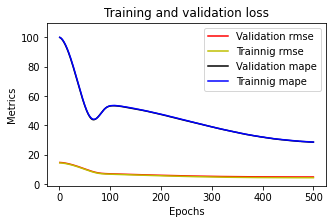

In [68]:
plotme(model1_6)

In [50]:
# inputs: distance
model1_7 = nnmodel(3, num_hlayers=1,Epoch=500)
model1_7

Epoch 1/500
204/204 [==============================] - 1s 3ms/step - loss: 764912.7500 - mape: 99.9574 - rmse: 874.5929 - val_loss: 796213.3125 - val_mape: 99.9145 - val_rmse: 892.3079
Epoch 2/500
204/204 [==============================] - 0s 1ms/step - loss: 763972.8750 - mape: 99.8632 - rmse: 874.0554 - val_loss: 795155.0000 - val_mape: 99.8082 - val_rmse: 891.7147
Epoch 3/500
204/204 [==============================] - 0s 1ms/step - loss: 762778.9375 - mape: 99.7398 - rmse: 873.3722 - val_loss: 793787.7500 - val_mape: 99.6687 - val_rmse: 890.9477
Epoch 4/500
204/204 [==============================] - 0s 2ms/step - loss: 761265.3125 - mape: 99.5803 - rmse: 872.5052 - val_loss: 792089.1250 - val_mape: 99.4948 - val_rmse: 889.9939
Epoch 5/500
204/204 [==============================] - 1s 3ms/step - loss: 759430.2500 - mape: 99.3889 - rmse: 871.4529 - val_loss: 790067.8125 - val_mape: 99.2874 - val_rmse: 888.8576
Epoch 6/500
204/204 [==============================] - 0s 1ms/step - loss: 

204/204 [==============================] - 0s 2ms/step - loss: 227558.4062 - mape: 39.4082 - rmse: 477.0308 - val_loss: 246209.7656 - val_mape: 39.2958 - val_rmse: 496.1953
Epoch 90/500
204/204 [==============================] - 0s 2ms/step - loss: 222099.2500 - mape: 39.1032 - rmse: 471.2741 - val_loss: 240612.3594 - val_mape: 39.0117 - val_rmse: 490.5225
Epoch 91/500
204/204 [==============================] - 0s 2ms/step - loss: 216769.7031 - mape: 38.8611 - rmse: 465.5853 - val_loss: 235183.5469 - val_mape: 38.7805 - val_rmse: 484.9573
Epoch 92/500
204/204 [==============================] - 0s 1ms/step - loss: 211593.7500 - mape: 38.6668 - rmse: 459.9932 - val_loss: 229850.1719 - val_mape: 38.5970 - val_rmse: 479.4269
Epoch 93/500
204/204 [==============================] - 0s 1ms/step - loss: 206565.2812 - mape: 38.4924 - rmse: 454.4945 - val_loss: 224703.4844 - val_mape: 38.4450 - val_rmse: 474.0290
Epoch 94/500
204/204 [==============================] - 0s 2ms/step - loss: 201677.

Epoch 133/500
204/204 [==============================] - 0s 2ms/step - loss: 125387.3516 - mape: 49.4334 - rmse: 354.1008 - val_loss: 140060.3438 - val_mape: 49.4069 - val_rmse: 374.2464
Epoch 134/500
204/204 [==============================] - 0s 2ms/step - loss: 125126.1875 - mape: 49.5285 - rmse: 353.7318 - val_loss: 139766.7188 - val_mape: 49.4898 - val_rmse: 373.8539
Epoch 135/500
204/204 [==============================] - 0s 2ms/step - loss: 124867.8516 - mape: 49.5992 - rmse: 353.3665 - val_loss: 139501.8750 - val_mape: 49.5078 - val_rmse: 373.4995
Epoch 136/500
204/204 [==============================] - 0s 2ms/step - loss: 124610.9609 - mape: 49.6434 - rmse: 353.0028 - val_loss: 139222.3594 - val_mape: 49.5565 - val_rmse: 373.1251
Epoch 137/500
204/204 [==============================] - 0s 1ms/step - loss: 124356.4062 - mape: 49.6687 - rmse: 352.6420 - val_loss: 138958.3594 - val_mape: 49.5625 - val_rmse: 372.7712
Epoch 138/500
204/204 [==============================] - 0s 2ms/s

Epoch 177/500
204/204 [==============================] - 1s 3ms/step - loss: 114092.2656 - mape: 47.5284 - rmse: 337.7755 - val_loss: 128840.8203 - val_mape: 47.3249 - val_rmse: 358.9440
Epoch 178/500
204/204 [==============================] - 1s 3ms/step - loss: 113833.6641 - mape: 47.4743 - rmse: 337.3925 - val_loss: 128588.4297 - val_mape: 47.2729 - val_rmse: 358.5923
Epoch 179/500
204/204 [==============================] - 1s 3ms/step - loss: 113576.5938 - mape: 47.3624 - rmse: 337.0113 - val_loss: 128333.9766 - val_mape: 47.2134 - val_rmse: 358.2373
Epoch 180/500
204/204 [==============================] - 1s 3ms/step - loss: 113318.2656 - mape: 47.2982 - rmse: 336.6278 - val_loss: 128088.2734 - val_mape: 47.1278 - val_rmse: 357.8942
Epoch 181/500
204/204 [==============================] - 1s 2ms/step - loss: 113059.8281 - mape: 47.2387 - rmse: 336.2437 - val_loss: 127834.9766 - val_mape: 47.0593 - val_rmse: 357.5402
Epoch 182/500
204/204 [==============================] - 1s 3ms/s

Epoch 221/500
204/204 [==============================] - 1s 3ms/step - loss: 102878.3828 - mape: 44.2081 - rmse: 320.7466 - val_loss: 117955.8047 - val_mape: 44.0457 - val_rmse: 343.4470
Epoch 222/500
204/204 [==============================] - 1s 3ms/step - loss: 102628.6406 - mape: 44.1220 - rmse: 320.3571 - val_loss: 117713.0078 - val_mape: 43.9750 - val_rmse: 343.0933
Epoch 223/500
204/204 [==============================] - 0s 1ms/step - loss: 102377.1250 - mape: 44.0528 - rmse: 319.9643 - val_loss: 117471.9219 - val_mape: 43.8907 - val_rmse: 342.7418
Epoch 224/500
204/204 [==============================] - 0s 2ms/step - loss: 102127.3750 - mape: 44.0087 - rmse: 319.5737 - val_loss: 117227.0625 - val_mape: 43.8294 - val_rmse: 342.3844
Epoch 225/500
204/204 [==============================] - 0s 1ms/step - loss: 101879.1719 - mape: 43.9274 - rmse: 319.1852 - val_loss: 116984.3125 - val_mape: 43.7553 - val_rmse: 342.0297
Epoch 226/500
204/204 [==============================] - 0s 2ms/s

Epoch 265/500
204/204 [==============================] - 1s 3ms/step - loss: 92394.6562 - mape: 40.6039 - rmse: 303.9649 - val_loss: 107855.8750 - val_mape: 40.4416 - val_rmse: 328.4142
Epoch 266/500
204/204 [==============================] - 0s 2ms/step - loss: 92174.8906 - mape: 40.5091 - rmse: 303.6032 - val_loss: 107645.5703 - val_mape: 40.3650 - val_rmse: 328.0938
Epoch 267/500
204/204 [==============================] - 1s 3ms/step - loss: 91957.9453 - mape: 40.4577 - rmse: 303.2457 - val_loss: 107430.4766 - val_mape: 40.2990 - val_rmse: 327.7659
Epoch 268/500
204/204 [==============================] - 1s 3ms/step - loss: 91739.8828 - mape: 40.3335 - rmse: 302.8859 - val_loss: 107223.5234 - val_mape: 40.2147 - val_rmse: 327.4500
Epoch 269/500
204/204 [==============================] - 1s 3ms/step - loss: 91528.5703 - mape: 40.2628 - rmse: 302.5369 - val_loss: 107021.8828 - val_mape: 40.1091 - val_rmse: 327.1420
Epoch 270/500
204/204 [==============================] - 0s 2ms/step -

204/204 [==============================] - 0s 1ms/step - loss: 83715.1406 - mape: 36.9395 - rmse: 289.3357 - val_loss: 99574.6562 - val_mape: 36.7781 - val_rmse: 315.5545
Epoch 310/500
204/204 [==============================] - 1s 3ms/step - loss: 83543.9609 - mape: 36.8217 - rmse: 289.0397 - val_loss: 99420.8125 - val_mape: 36.6655 - val_rmse: 315.3107
Epoch 311/500
204/204 [==============================] - 0s 1ms/step - loss: 83375.7344 - mape: 36.7110 - rmse: 288.7486 - val_loss: 99254.1250 - val_mape: 36.6004 - val_rmse: 315.0462
Epoch 312/500
204/204 [==============================] - 0s 1ms/step - loss: 83205.2109 - mape: 36.6872 - rmse: 288.4531 - val_loss: 99094.7812 - val_mape: 36.5188 - val_rmse: 314.7932
Epoch 313/500
204/204 [==============================] - 1s 3ms/step - loss: 83037.0000 - mape: 36.5698 - rmse: 288.1614 - val_loss: 98938.6016 - val_mape: 36.4247 - val_rmse: 314.5451
Epoch 314/500
204/204 [==============================] - 1s 3ms/step - loss: 82868.3438 -

204/204 [==============================] - 0s 1ms/step - loss: 74260.9141 - mape: 30.8297 - rmse: 272.5085 - val_loss: 90847.2578 - val_mape: 30.6760 - val_rmse: 301.4088
Epoch 398/500
204/204 [==============================] - 0s 2ms/step - loss: 74211.5781 - mape: 30.7422 - rmse: 272.4180 - val_loss: 90808.7188 - val_mape: 30.6122 - val_rmse: 301.3448
Epoch 399/500
204/204 [==============================] - 0s 1ms/step - loss: 74164.3516 - mape: 30.7327 - rmse: 272.3313 - val_loss: 90765.5859 - val_mape: 30.5732 - val_rmse: 301.2733
Epoch 400/500
204/204 [==============================] - 0s 1ms/step - loss: 74117.8984 - mape: 30.6797 - rmse: 272.2460 - val_loss: 90727.3750 - val_mape: 30.5195 - val_rmse: 301.2098
Epoch 401/500
204/204 [==============================] - 0s 2ms/step - loss: 74072.8906 - mape: 30.6175 - rmse: 272.1634 - val_loss: 90694.3594 - val_mape: 30.4503 - val_rmse: 301.1550
Epoch 402/500
204/204 [==============================] - 0s 2ms/step - loss: 74030.1172 -

204/204 [==============================] - 0s 2ms/step - loss: 72462.2969 - mape: 28.1408 - rmse: 269.1882 - val_loss: 89404.1953 - val_mape: 28.0596 - val_rmse: 299.0053
Epoch 486/500
204/204 [==============================] - 1s 3ms/step - loss: 72456.4219 - mape: 28.1157 - rmse: 269.1773 - val_loss: 89407.2656 - val_mape: 28.0249 - val_rmse: 299.0105
Epoch 487/500
204/204 [==============================] - 1s 3ms/step - loss: 72452.9375 - mape: 28.1341 - rmse: 269.1708 - val_loss: 89395.3359 - val_mape: 28.0383 - val_rmse: 298.9905
Epoch 488/500
204/204 [==============================] - 0s 2ms/step - loss: 72447.4766 - mape: 28.1035 - rmse: 269.1607 - val_loss: 89403.1484 - val_mape: 27.9893 - val_rmse: 299.0036
Epoch 489/500
204/204 [==============================] - 0s 2ms/step - loss: 72442.7344 - mape: 28.0404 - rmse: 269.1519 - val_loss: 89396.3047 - val_mape: 27.9888 - val_rmse: 298.9922
Epoch 490/500
204/204 [==============================] - 0s 2ms/step - loss: 72437.6641 -

# sub-problem 2:     ******* input: distance & hour *********

In [51]:
df1.shape

(8157, 29)

In [52]:
df1.head()

travel time  distance  est_dist  similarity  similarity_dijk  1st ranked  \
0         1038  0.196901  0.309425    0.223635         0.345401         1.0   
1         1020  0.192960  0.314612    0.251627         0.374494         1.0   
2          730  0.107565  0.153729    0.686881         0.703006         1.0   
3         1235  0.155246  0.231894    0.399989         0.399680         1.0   
4          576  0.113345  0.159086    0.972772         0.986051         1.0   

   2nd ranked  3rd ranked  1st dist  2nd dist  ...  road  secondary  \
0    0.268512         0.0  0.924213  0.079827  ...   0.0        0.0   
1    0.268512         0.0  0.923853  0.081459  ...   0.0        0.0   
2    0.000000         1.0  0.756652  0.144672  ...   0.0        0.0   
3    0.082722         0.0  0.518465  0.539534  ...   0.0        0.0   
4    0.082722         1.0  0.722541  0.274364  ...   0.0        0.0   

   secondary_link   service  tertiary  track  trunk  trunk_link  unclassified  \
0             0.0  0.000000  0.039507    0.0    0.0         0.0      0.000000   
1             0.0  0.000000  0.039507    0.0    0.0         0.0      0.000000   
2             0.0  0.066082  0.029063    0.0    0.0         0.0      0.143363   
3             0.0  0.000000  0.023971    0.0    0.0         0.0      0.143363   
4             0.0  0.000000  0.036959    0.0    0.0         0.0      0.000000   

   others  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  

[5 rows x 29 columns]

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


<AxesSubplot:>

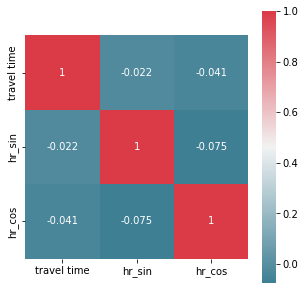

In [145]:
# run correlation matrix and plot
my_df = df1[['travel time','hr_sin','hr_cos']]
f, ax = plt.subplots(figsize=(5,5))
corr = my_df.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

### cyclical encoding of hour

In [146]:
x = np.array(df1[['est_dist','hr_sin','hr_cos']])
y = np.array(df1['travel time'])
x

array([[ 5.19876318e-01, -8.66025404e-01, -5.00000000e-01],
       [ 5.28590233e-01, -5.00000000e-01,  8.66025404e-01],
       [ 2.58285167e-01,  1.00000000e+00,  6.12323400e-17],
       ...,
       [ 3.30778598e-01, -7.07106781e-01, -7.07106781e-01],
       [ 5.98851504e-01, -1.00000000e+00, -1.83697020e-16],
       [ 1.65882755e-01, -9.65925826e-01,  2.58819045e-01]])

In [58]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [59]:
print(X_train.shape)
print(X_test.shape)
# X_train

(6525, 3)
(1632, 3)


In [60]:
# inputs: distance + hour
model2_1 = nnmodel(20, num_hlayers=1,Epoch=500)
model2_1

Epoch 1/500
204/204 [==============================] - 1s 3ms/step - loss: 763662.6875 - mape: 99.8125 - rmse: 873.8779 - val_loss: 793074.8125 - val_mape: 99.5693 - val_rmse: 890.5475
Epoch 2/500
204/204 [==============================] - 1s 2ms/step - loss: 757380.9375 - mape: 99.1259 - rmse: 870.2764 - val_loss: 783978.1250 - val_mape: 98.5906 - val_rmse: 885.4254
Epoch 3/500
204/204 [==============================] - 1s 2ms/step - loss: 746027.2500 - mape: 97.8698 - rmse: 863.7287 - val_loss: 769962.7500 - val_mape: 97.0686 - val_rmse: 877.4752
Epoch 4/500
204/204 [==============================] - 0s 2ms/step - loss: 730112.8125 - mape: 96.0754 - rmse: 854.4664 - val_loss: 751534.8125 - val_mape: 95.0401 - val_rmse: 866.9111
Epoch 5/500
204/204 [==============================] - 0s 1ms/step - loss: 710206.0000 - mape: 93.8066 - rmse: 842.7372 - val_loss: 729367.9375 - val_mape: 92.5555 - val_rmse: 854.0304
Epoch 6/500
204/204 [==============================] - 0s 1ms/step - loss: 

204/204 [==============================] - 0s 1ms/step - loss: 98921.0781 - mape: 42.2497 - rmse: 314.5172 - val_loss: 114128.1016 - val_mape: 42.0230 - val_rmse: 337.8285
Epoch 90/500
204/204 [==============================] - 0s 1ms/step - loss: 98054.4766 - mape: 42.0190 - rmse: 313.1365 - val_loss: 113320.2734 - val_mape: 41.7649 - val_rmse: 336.6308
Epoch 91/500
204/204 [==============================] - 0s 2ms/step - loss: 97197.8359 - mape: 41.7561 - rmse: 311.7657 - val_loss: 112536.7656 - val_mape: 41.5014 - val_rmse: 335.4650
Epoch 92/500
204/204 [==============================] - 0s 1ms/step - loss: 96366.3125 - mape: 41.3883 - rmse: 310.4292 - val_loss: 111780.1250 - val_mape: 41.2615 - val_rmse: 334.3354
Epoch 93/500
204/204 [==============================] - 0s 1ms/step - loss: 95560.4844 - mape: 41.3006 - rmse: 309.1286 - val_loss: 111062.9609 - val_mape: 40.9225 - val_rmse: 333.2611
Epoch 94/500
204/204 [==============================] - 0s 1ms/step - loss: 94778.1250 -

204/204 [==============================] - 0s 1ms/step - loss: 72267.0625 - mape: 28.3283 - rmse: 268.8253 - val_loss: 89706.5078 - val_mape: 28.2765 - val_rmse: 299.5104
Epoch 178/500
204/204 [==============================] - 0s 1ms/step - loss: 72251.9453 - mape: 28.3640 - rmse: 268.7972 - val_loss: 89688.0000 - val_mape: 28.2465 - val_rmse: 299.4796
Epoch 179/500
204/204 [==============================] - 0s 1ms/step - loss: 72234.1875 - mape: 28.1946 - rmse: 268.7642 - val_loss: 89633.7656 - val_mape: 28.3079 - val_rmse: 299.3890
Epoch 180/500
204/204 [==============================] - 0s 1ms/step - loss: 72215.5234 - mape: 28.3671 - rmse: 268.7295 - val_loss: 89641.8984 - val_mape: 28.2012 - val_rmse: 299.4026
Epoch 181/500
204/204 [==============================] - 0s 1ms/step - loss: 72198.7422 - mape: 28.2420 - rmse: 268.6982 - val_loss: 89653.5000 - val_mape: 28.0891 - val_rmse: 299.4219
Epoch 182/500
204/204 [==============================] - 0s 1ms/step - loss: 72182.7969 -

204/204 [==============================] - 0s 1ms/step - loss: 71965.7422 - mape: 27.2298 - rmse: 268.2643 - val_loss: 89435.3359 - val_mape: 27.1822 - val_rmse: 299.0574
Epoch 266/500
204/204 [==============================] - 0s 1ms/step - loss: 71959.1172 - mape: 27.1424 - rmse: 268.2520 - val_loss: 89426.7969 - val_mape: 27.2055 - val_rmse: 299.0431
Epoch 267/500
204/204 [==============================] - 0s 1ms/step - loss: 71955.3672 - mape: 27.2277 - rmse: 268.2450 - val_loss: 89438.8750 - val_mape: 27.1598 - val_rmse: 299.0633
Epoch 268/500
204/204 [==============================] - 0s 1ms/step - loss: 71956.2734 - mape: 27.1683 - rmse: 268.2467 - val_loss: 89449.4297 - val_mape: 27.1308 - val_rmse: 299.0810
Epoch 269/500
204/204 [==============================] - 0s 1ms/step - loss: 71954.5469 - mape: 27.2381 - rmse: 268.2434 - val_loss: 89461.4219 - val_mape: 27.1017 - val_rmse: 299.1010
Epoch 270/500
204/204 [==============================] - 0s 1ms/step - loss: 71958.1016 -

204/204 [==============================] - 0s 2ms/step - loss: 71959.2344 - mape: 27.0813 - rmse: 268.2522 - val_loss: 89439.5703 - val_mape: 27.1235 - val_rmse: 299.0645
Epoch 354/500
204/204 [==============================] - 0s 1ms/step - loss: 71960.5859 - mape: 27.1713 - rmse: 268.2547 - val_loss: 89417.4141 - val_mape: 27.1961 - val_rmse: 299.0274
Epoch 355/500
204/204 [==============================] - 0s 1ms/step - loss: 71960.9688 - mape: 27.1724 - rmse: 268.2554 - val_loss: 89463.5234 - val_mape: 27.0567 - val_rmse: 299.1045
Epoch 356/500
204/204 [==============================] - 0s 1ms/step - loss: 71952.7734 - mape: 27.1107 - rmse: 268.2401 - val_loss: 89462.5625 - val_mape: 27.0643 - val_rmse: 299.1029
Epoch 357/500
204/204 [==============================] - 0s 1ms/step - loss: 71953.1562 - mape: 26.9043 - rmse: 268.2408 - val_loss: 89430.0469 - val_mape: 27.1567 - val_rmse: 299.0486
Epoch 358/500
204/204 [==============================] - 0s 1ms/step - loss: 71958.9141 -

204/204 [==============================] - 0s 2ms/step - loss: 71958.3984 - mape: 27.1805 - rmse: 268.2506 - val_loss: 89494.1094 - val_mape: 26.9842 - val_rmse: 299.1557
Epoch 442/500
204/204 [==============================] - 0s 2ms/step - loss: 71951.9062 - mape: 26.9778 - rmse: 268.2385 - val_loss: 89440.7812 - val_mape: 27.1245 - val_rmse: 299.0665
Epoch 443/500
204/204 [==============================] - 0s 1ms/step - loss: 71956.6797 - mape: 27.1494 - rmse: 268.2474 - val_loss: 89471.8594 - val_mape: 27.0374 - val_rmse: 299.1185
Epoch 444/500
204/204 [==============================] - 0s 1ms/step - loss: 71953.4062 - mape: 27.0660 - rmse: 268.2413 - val_loss: 89444.1641 - val_mape: 27.1185 - val_rmse: 299.0722
Epoch 445/500
204/204 [==============================] - 0s 1ms/step - loss: 71951.7578 - mape: 27.1951 - rmse: 268.2383 - val_loss: 89485.0859 - val_mape: 27.0061 - val_rmse: 299.1406
Epoch 446/500
204/204 [==============================] - 0s 1ms/step - loss: 71953.2031 -

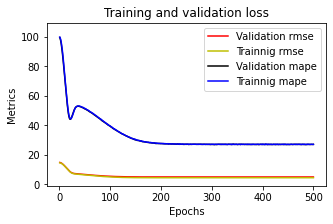

In [61]:
plotme(model2_1)

In [62]:
# inputs: distance + hour
model2_2 = nnmodel(50, num_hlayers=1,Epoch=1000)
model2_2

Epoch 1/1000
204/204 [==============================] - 1s 2ms/step - loss: 762533.1875 - mape: 99.6963 - rmse: 873.2314 - val_loss: 789044.3125 - val_mape: 99.1373 - val_rmse: 888.2817
Epoch 2/1000
204/204 [==============================] - 1s 3ms/step - loss: 747702.2500 - mape: 98.0569 - rmse: 864.6978 - val_loss: 766793.3125 - val_mape: 96.7267 - val_rmse: 875.6674
Epoch 3/1000
204/204 [==============================] - 1s 3ms/step - loss: 719744.5000 - mape: 94.8995 - rmse: 848.3776 - val_loss: 732324.8750 - val_mape: 92.8991 - val_rmse: 855.7598
Epoch 4/1000
204/204 [==============================] - 0s 2ms/step - loss: 680990.6250 - mape: 90.4160 - rmse: 825.2216 - val_loss: 688072.1875 - val_mape: 87.8074 - val_rmse: 829.5012
Epoch 5/1000
204/204 [==============================] - 0s 2ms/step - loss: 634210.2500 - mape: 84.7493 - rmse: 796.3732 - val_loss: 637019.6875 - val_mape: 81.7358 - val_rmse: 798.1351
Epoch 6/1000
204/204 [==============================] - 1s 3ms/step - 

Epoch 45/1000
204/204 [==============================] - 0s 2ms/step - loss: 116776.9609 - mape: 46.2571 - rmse: 341.7264 - val_loss: 130536.1562 - val_mape: 45.7890 - val_rmse: 361.2979
Epoch 46/1000
204/204 [==============================] - 0s 1ms/step - loss: 114847.7578 - mape: 45.7689 - rmse: 338.8920 - val_loss: 128701.9297 - val_mape: 45.4912 - val_rmse: 358.7505
Epoch 47/1000
204/204 [==============================] - 0s 2ms/step - loss: 112989.2422 - mape: 45.5360 - rmse: 336.1387 - val_loss: 126988.4141 - val_mape: 45.0152 - val_rmse: 356.3543
Epoch 48/1000
204/204 [==============================] - 1s 3ms/step - loss: 111184.9375 - mape: 44.8697 - rmse: 333.4441 - val_loss: 125265.9219 - val_mape: 44.8474 - val_rmse: 353.9293
Epoch 49/1000
204/204 [==============================] - 0s 2ms/step - loss: 109444.8438 - mape: 44.7292 - rmse: 330.8245 - val_loss: 123621.7031 - val_mape: 44.4496 - val_rmse: 351.5988
Epoch 50/1000
204/204 [==============================] - 1s 3ms/s

204/204 [==============================] - 1s 3ms/step - loss: 72016.3047 - mape: 27.5607 - rmse: 268.3586 - val_loss: 89461.9297 - val_mape: 27.7087 - val_rmse: 299.1019
Epoch 134/1000
204/204 [==============================] - 1s 3ms/step - loss: 72005.6875 - mape: 27.5812 - rmse: 268.3387 - val_loss: 89522.2266 - val_mape: 27.4850 - val_rmse: 299.2026
Epoch 135/1000
204/204 [==============================] - 0s 2ms/step - loss: 71999.0312 - mape: 27.5644 - rmse: 268.3264 - val_loss: 89562.9375 - val_mape: 27.3317 - val_rmse: 299.2707
Epoch 136/1000
204/204 [==============================] - 1s 3ms/step - loss: 72000.5234 - mape: 27.4880 - rmse: 268.3291 - val_loss: 89624.2812 - val_mape: 27.1565 - val_rmse: 299.3731
Epoch 137/1000
204/204 [==============================] - 0s 2ms/step - loss: 71991.0625 - mape: 27.3614 - rmse: 268.3115 - val_loss: 89525.3203 - val_mape: 27.3850 - val_rmse: 299.2078
Epoch 138/1000
204/204 [==============================] - 1s 3ms/step - loss: 71990.9

204/204 [==============================] - 0s 1ms/step - loss: 71970.5781 - mape: 27.1258 - rmse: 268.2733 - val_loss: 89500.4922 - val_mape: 27.0628 - val_rmse: 299.1663
Epoch 222/1000
204/204 [==============================] - 0s 1ms/step - loss: 71970.2031 - mape: 26.9825 - rmse: 268.2726 - val_loss: 89501.7969 - val_mape: 27.0482 - val_rmse: 299.1685
Epoch 223/1000
204/204 [==============================] - 0s 1ms/step - loss: 71958.7500 - mape: 27.2056 - rmse: 268.2513 - val_loss: 89531.5234 - val_mape: 26.9807 - val_rmse: 299.2182
Epoch 224/1000
204/204 [==============================] - 0s 1ms/step - loss: 71958.4844 - mape: 26.9903 - rmse: 268.2508 - val_loss: 89489.8516 - val_mape: 27.0868 - val_rmse: 299.1485
Epoch 225/1000
204/204 [==============================] - 0s 1ms/step - loss: 71971.5938 - mape: 27.2397 - rmse: 268.2752 - val_loss: 89602.6250 - val_mape: 26.8153 - val_rmse: 299.3370
Epoch 226/1000
204/204 [==============================] - 0s 1ms/step - loss: 71962.2

204/204 [==============================] - 1s 3ms/step - loss: 71962.1406 - mape: 27.1129 - rmse: 268.2576 - val_loss: 89542.0000 - val_mape: 26.9515 - val_rmse: 299.2357
Epoch 310/1000
204/204 [==============================] - 1s 3ms/step - loss: 71965.2578 - mape: 27.0184 - rmse: 268.2634 - val_loss: 89505.9297 - val_mape: 27.0411 - val_rmse: 299.1754
Epoch 311/1000
204/204 [==============================] - 0s 2ms/step - loss: 71956.2578 - mape: 27.0584 - rmse: 268.2466 - val_loss: 89504.5625 - val_mape: 27.0487 - val_rmse: 299.1731
Epoch 312/1000
204/204 [==============================] - 1s 3ms/step - loss: 71969.1875 - mape: 27.1094 - rmse: 268.2707 - val_loss: 89505.4531 - val_mape: 27.0544 - val_rmse: 299.1746
Epoch 313/1000
204/204 [==============================] - 1s 3ms/step - loss: 71966.9375 - mape: 27.0737 - rmse: 268.2665 - val_loss: 89535.6562 - val_mape: 26.9722 - val_rmse: 299.2251
Epoch 314/1000
204/204 [==============================] - 1s 3ms/step - loss: 71962.1

204/204 [==============================] - 0s 1ms/step - loss: 71963.6953 - mape: 27.0559 - rmse: 268.2605 - val_loss: 89530.6016 - val_mape: 26.9996 - val_rmse: 299.2166
Epoch 398/1000
204/204 [==============================] - 0s 1ms/step - loss: 71966.0156 - mape: 27.0379 - rmse: 268.2648 - val_loss: 89561.0312 - val_mape: 26.9096 - val_rmse: 299.2675
Epoch 399/1000
204/204 [==============================] - 0s 1ms/step - loss: 71960.8828 - mape: 27.1322 - rmse: 268.2552 - val_loss: 89554.1797 - val_mape: 26.9438 - val_rmse: 299.2560
Epoch 400/1000
204/204 [==============================] - 0s 1ms/step - loss: 71955.8594 - mape: 26.9840 - rmse: 268.2459 - val_loss: 89467.8828 - val_mape: 27.1773 - val_rmse: 299.1118
Epoch 401/1000
204/204 [==============================] - 0s 2ms/step - loss: 71961.7891 - mape: 27.1733 - rmse: 268.2570 - val_loss: 89535.6484 - val_mape: 26.9823 - val_rmse: 299.2251
Epoch 402/1000
204/204 [==============================] - 0s 1ms/step - loss: 71967.2

204/204 [==============================] - 0s 2ms/step - loss: 71959.9453 - mape: 27.0550 - rmse: 268.2535 - val_loss: 89479.9531 - val_mape: 27.1503 - val_rmse: 299.1320
Epoch 486/1000
204/204 [==============================] - 0s 2ms/step - loss: 71963.9844 - mape: 27.1414 - rmse: 268.2610 - val_loss: 89592.7266 - val_mape: 26.8414 - val_rmse: 299.3204
Epoch 487/1000
204/204 [==============================] - 1s 3ms/step - loss: 71966.2188 - mape: 26.9970 - rmse: 268.2652 - val_loss: 89562.9922 - val_mape: 26.9141 - val_rmse: 299.2708
Epoch 488/1000
204/204 [==============================] - 0s 2ms/step - loss: 71958.5469 - mape: 26.9458 - rmse: 268.2509 - val_loss: 89486.3750 - val_mape: 27.1060 - val_rmse: 299.1427
Epoch 489/1000
204/204 [==============================] - 1s 3ms/step - loss: 71958.2812 - mape: 27.1772 - rmse: 268.2504 - val_loss: 89495.2734 - val_mape: 27.0900 - val_rmse: 299.1576
Epoch 490/1000
204/204 [==============================] - 1s 3ms/step - loss: 71957.8

204/204 [==============================] - 1s 3ms/step - loss: 71953.3984 - mape: 27.0162 - rmse: 268.2413 - val_loss: 89483.5703 - val_mape: 27.1210 - val_rmse: 299.1380
Epoch 574/1000
204/204 [==============================] - 1s 3ms/step - loss: 71957.9062 - mape: 27.2051 - rmse: 268.2497 - val_loss: 89567.3203 - val_mape: 26.8991 - val_rmse: 299.2780
Epoch 575/1000
204/204 [==============================] - 1s 3ms/step - loss: 71949.4375 - mape: 26.9293 - rmse: 268.2339 - val_loss: 89478.1953 - val_mape: 27.1419 - val_rmse: 299.1291
Epoch 576/1000
204/204 [==============================] - 1s 3ms/step - loss: 71958.3672 - mape: 27.0708 - rmse: 268.2506 - val_loss: 89459.5703 - val_mape: 27.2067 - val_rmse: 299.0979
Epoch 577/1000
204/204 [==============================] - 1s 2ms/step - loss: 71955.3750 - mape: 27.1575 - rmse: 268.2450 - val_loss: 89501.9922 - val_mape: 27.0734 - val_rmse: 299.1688
Epoch 578/1000
204/204 [==============================] - 0s 2ms/step - loss: 71957.0

204/204 [==============================] - 1s 3ms/step - loss: 71963.7812 - mape: 27.1952 - rmse: 268.2607 - val_loss: 89567.4375 - val_mape: 26.9005 - val_rmse: 299.2782
Epoch 662/1000
204/204 [==============================] - 1s 3ms/step - loss: 71956.2656 - mape: 27.0332 - rmse: 268.2466 - val_loss: 89534.4219 - val_mape: 26.9923 - val_rmse: 299.2230
Epoch 663/1000
204/204 [==============================] - 0s 2ms/step - loss: 71965.1641 - mape: 27.0747 - rmse: 268.2632 - val_loss: 89538.6094 - val_mape: 26.9822 - val_rmse: 299.2300
Epoch 664/1000
204/204 [==============================] - 0s 2ms/step - loss: 71963.3203 - mape: 27.0646 - rmse: 268.2598 - val_loss: 89533.5312 - val_mape: 26.9880 - val_rmse: 299.2215
Epoch 665/1000
204/204 [==============================] - 1s 3ms/step - loss: 71959.9297 - mape: 26.9681 - rmse: 268.2535 - val_loss: 89513.7578 - val_mape: 27.0369 - val_rmse: 299.1885
Epoch 666/1000
204/204 [==============================] - 1s 3ms/step - loss: 71960.6

204/204 [==============================] - 0s 1ms/step - loss: 71965.7500 - mape: 27.1161 - rmse: 268.2643 - val_loss: 89457.6953 - val_mape: 27.2004 - val_rmse: 299.0948
Epoch 750/1000
204/204 [==============================] - 0s 1ms/step - loss: 71959.6172 - mape: 27.1956 - rmse: 268.2529 - val_loss: 89550.6406 - val_mape: 26.9392 - val_rmse: 299.2501
Epoch 751/1000
204/204 [==============================] - 0s 2ms/step - loss: 71958.4219 - mape: 27.0501 - rmse: 268.2507 - val_loss: 89576.0625 - val_mape: 26.8768 - val_rmse: 299.2926
Epoch 752/1000
204/204 [==============================] - 1s 3ms/step - loss: 71957.9297 - mape: 27.1639 - rmse: 268.2498 - val_loss: 89608.4609 - val_mape: 26.8006 - val_rmse: 299.3467
Epoch 753/1000
204/204 [==============================] - 1s 3ms/step - loss: 71955.7891 - mape: 26.9815 - rmse: 268.2458 - val_loss: 89553.9688 - val_mape: 26.9369 - val_rmse: 299.2557
Epoch 754/1000
204/204 [==============================] - 1s 3ms/step - loss: 71967.2

204/204 [==============================] - 0s 2ms/step - loss: 71966.1406 - mape: 27.0258 - rmse: 268.2650 - val_loss: 89526.2266 - val_mape: 27.0093 - val_rmse: 299.2094
Epoch 838/1000
204/204 [==============================] - 1s 3ms/step - loss: 71954.8828 - mape: 27.1672 - rmse: 268.2441 - val_loss: 89566.3516 - val_mape: 26.8982 - val_rmse: 299.2764
Epoch 839/1000
204/204 [==============================] - 1s 3ms/step - loss: 71954.8984 - mape: 27.0497 - rmse: 268.2441 - val_loss: 89588.2188 - val_mape: 26.8598 - val_rmse: 299.3129
Epoch 840/1000
204/204 [==============================] - 1s 3ms/step - loss: 71957.8359 - mape: 27.0775 - rmse: 268.2496 - val_loss: 89543.8594 - val_mape: 26.9699 - val_rmse: 299.2388
Epoch 841/1000
204/204 [==============================] - 1s 3ms/step - loss: 71958.4844 - mape: 27.0284 - rmse: 268.2508 - val_loss: 89532.6875 - val_mape: 26.9929 - val_rmse: 299.2201
Epoch 842/1000
204/204 [==============================] - 1s 3ms/step - loss: 71954.8

204/204 [==============================] - 1s 3ms/step - loss: 71954.7266 - mape: 27.0226 - rmse: 268.2438 - val_loss: 89473.7734 - val_mape: 27.1647 - val_rmse: 299.1217
Epoch 926/1000
204/204 [==============================] - 1s 3ms/step - loss: 71964.1328 - mape: 27.1618 - rmse: 268.2613 - val_loss: 89514.7031 - val_mape: 27.0425 - val_rmse: 299.1901
Epoch 927/1000
204/204 [==============================] - 1s 3ms/step - loss: 71963.4453 - mape: 27.1067 - rmse: 268.2600 - val_loss: 89572.1797 - val_mape: 26.9007 - val_rmse: 299.2861
Epoch 928/1000
204/204 [==============================] - 1s 3ms/step - loss: 71960.8125 - mape: 27.0829 - rmse: 268.2551 - val_loss: 89575.9375 - val_mape: 26.8815 - val_rmse: 299.2924
Epoch 929/1000
204/204 [==============================] - 0s 2ms/step - loss: 71952.3828 - mape: 26.9954 - rmse: 268.2394 - val_loss: 89479.8828 - val_mape: 27.1497 - val_rmse: 299.1319
Epoch 930/1000
204/204 [==============================] - 1s 3ms/step - loss: 71960.5

In [63]:
# plotme(model2_2)

In [64]:
# inputs: distance + hour
model2_3 = nnmodel(100, num_hlayers=1,Epoch=500)
model2_3

Epoch 1/500
204/204 [==============================] - 1s 2ms/step - loss: 759800.6875 - mape: 99.3843 - rmse: 871.6655 - val_loss: 781372.1875 - val_mape: 98.3027 - val_rmse: 883.9526
Epoch 2/500
204/204 [==============================] - 0s 2ms/step - loss: 730035.4375 - mape: 96.0222 - rmse: 854.4211 - val_loss: 735041.5625 - val_mape: 93.1879 - val_rmse: 857.3456
Epoch 3/500
204/204 [==============================] - 1s 3ms/step - loss: 670404.6875 - mape: 89.1329 - rmse: 818.7825 - val_loss: 661589.9375 - val_mape: 84.6542 - val_rmse: 813.3818
Epoch 4/500
204/204 [==============================] - 0s 1ms/step - loss: 590704.6875 - mape: 79.3726 - rmse: 768.5731 - val_loss: 573910.6875 - val_mape: 74.1047 - val_rmse: 757.5689
Epoch 5/500
204/204 [==============================] - 0s 2ms/step - loss: 502893.5000 - mape: 68.5324 - rmse: 709.1498 - val_loss: 483316.0000 - val_mape: 63.3373 - val_rmse: 695.2094
Epoch 6/500
204/204 [==============================] - 0s 2ms/step - loss: 

204/204 [==============================] - 0s 2ms/step - loss: 71988.1094 - mape: 27.4141 - rmse: 268.3060 - val_loss: 89504.9766 - val_mape: 27.4087 - val_rmse: 299.1738
Epoch 90/500
204/204 [==============================] - 0s 1ms/step - loss: 71997.2422 - mape: 27.3511 - rmse: 268.3230 - val_loss: 89563.3984 - val_mape: 27.2084 - val_rmse: 299.2715
Epoch 91/500
204/204 [==============================] - 0s 1ms/step - loss: 71988.5312 - mape: 27.3409 - rmse: 268.3068 - val_loss: 89497.2422 - val_mape: 27.3604 - val_rmse: 299.1609
Epoch 92/500
204/204 [==============================] - 0s 1ms/step - loss: 71982.3672 - mape: 27.3566 - rmse: 268.2953 - val_loss: 89531.8125 - val_mape: 27.2579 - val_rmse: 299.2187
Epoch 93/500
204/204 [==============================] - 0s 1ms/step - loss: 71975.8672 - mape: 27.2657 - rmse: 268.2832 - val_loss: 89464.7344 - val_mape: 27.4330 - val_rmse: 299.1066
Epoch 94/500
204/204 [==============================] - 0s 2ms/step - loss: 71986.7891 - mape

204/204 [==============================] - 1s 3ms/step - loss: 71976.0312 - mape: 27.1778 - rmse: 268.2835 - val_loss: 89489.8516 - val_mape: 27.1431 - val_rmse: 299.1485
Epoch 178/500
204/204 [==============================] - 1s 3ms/step - loss: 71958.7969 - mape: 26.9989 - rmse: 268.2514 - val_loss: 89468.2422 - val_mape: 27.1855 - val_rmse: 299.1124
Epoch 179/500
204/204 [==============================] - 1s 3ms/step - loss: 71970.5156 - mape: 27.1201 - rmse: 268.2732 - val_loss: 89526.5781 - val_mape: 27.0176 - val_rmse: 299.2099
Epoch 180/500
204/204 [==============================] - 0s 2ms/step - loss: 71972.6641 - mape: 27.0718 - rmse: 268.2772 - val_loss: 89501.6641 - val_mape: 27.1022 - val_rmse: 299.1683
Epoch 181/500
204/204 [==============================] - 1s 3ms/step - loss: 71965.5938 - mape: 26.9906 - rmse: 268.2640 - val_loss: 89476.7812 - val_mape: 27.1814 - val_rmse: 299.1267
Epoch 182/500
204/204 [==============================] - 1s 3ms/step - loss: 71960.8672 -

204/204 [==============================] - 0s 2ms/step - loss: 71942.4844 - mape: 27.4101 - rmse: 268.2209 - val_loss: 89703.9922 - val_mape: 26.6150 - val_rmse: 299.5063
Epoch 266/500
204/204 [==============================] - 1s 3ms/step - loss: 71997.6094 - mape: 26.8644 - rmse: 268.3237 - val_loss: 89500.2578 - val_mape: 27.0937 - val_rmse: 299.1659
Epoch 267/500
204/204 [==============================] - 1s 3ms/step - loss: 71966.4375 - mape: 27.0181 - rmse: 268.2656 - val_loss: 89545.4375 - val_mape: 26.9794 - val_rmse: 299.2414
Epoch 268/500
204/204 [==============================] - 1s 3ms/step - loss: 71961.2500 - mape: 26.9439 - rmse: 268.2560 - val_loss: 89429.0625 - val_mape: 27.3429 - val_rmse: 299.0469
Epoch 269/500
204/204 [==============================] - 1s 3ms/step - loss: 71967.6797 - mape: 27.2859 - rmse: 268.2679 - val_loss: 89648.6406 - val_mape: 26.7392 - val_rmse: 299.4138
Epoch 270/500
204/204 [==============================] - 0s 2ms/step - loss: 71967.9922 -

204/204 [==============================] - 0s 2ms/step - loss: 71952.5625 - mape: 26.8948 - rmse: 268.2397 - val_loss: 89424.4141 - val_mape: 27.3428 - val_rmse: 299.0392
Epoch 354/500
204/204 [==============================] - 0s 2ms/step - loss: 71947.6641 - mape: 27.2993 - rmse: 268.2306 - val_loss: 89648.1953 - val_mape: 26.7351 - val_rmse: 299.4131
Epoch 355/500
204/204 [==============================] - 0s 1ms/step - loss: 71960.8438 - mape: 27.0268 - rmse: 268.2552 - val_loss: 89635.3594 - val_mape: 26.7531 - val_rmse: 299.3917
Epoch 356/500
204/204 [==============================] - 0s 1ms/step - loss: 71969.9219 - mape: 27.0585 - rmse: 268.2721 - val_loss: 89608.2656 - val_mape: 26.8187 - val_rmse: 299.3464
Epoch 357/500
204/204 [==============================] - 0s 2ms/step - loss: 71966.1406 - mape: 26.9498 - rmse: 268.2650 - val_loss: 89478.2812 - val_mape: 27.1477 - val_rmse: 299.1292
Epoch 358/500
204/204 [==============================] - 0s 2ms/step - loss: 71952.7109 -

204/204 [==============================] - 0s 2ms/step - loss: 71961.2500 - mape: 26.9875 - rmse: 268.2560 - val_loss: 89554.1094 - val_mape: 26.9455 - val_rmse: 299.2559
Epoch 442/500
204/204 [==============================] - 0s 1ms/step - loss: 71964.7266 - mape: 27.0054 - rmse: 268.2624 - val_loss: 89501.7656 - val_mape: 27.0870 - val_rmse: 299.1685
Epoch 443/500
204/204 [==============================] - 0s 2ms/step - loss: 71958.2188 - mape: 27.2488 - rmse: 268.2503 - val_loss: 89626.6484 - val_mape: 26.7661 - val_rmse: 299.3771
Epoch 444/500
204/204 [==============================] - 0s 2ms/step - loss: 71963.9297 - mape: 26.8925 - rmse: 268.2609 - val_loss: 89550.2266 - val_mape: 26.9632 - val_rmse: 299.2495
Epoch 445/500
204/204 [==============================] - 0s 2ms/step - loss: 71970.3672 - mape: 27.0436 - rmse: 268.2729 - val_loss: 89499.6094 - val_mape: 27.0887 - val_rmse: 299.1649
Epoch 446/500
204/204 [==============================] - 0s 2ms/step - loss: 71946.2656 -

In [65]:
# inputs: distance + hour
model2_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model2_4

Epoch 1/500
204/204 [==============================] - 1s 2ms/step - loss: 690124.1875 - mape: 91.1875 - rmse: 830.7371 - val_loss: 496717.9688 - val_mape: 64.9613 - val_rmse: 704.7822
Epoch 2/500
204/204 [==============================] - 0s 1ms/step - loss: 247484.6406 - mape: 50.3876 - rmse: 497.4783 - val_loss: 186732.2188 - val_mape: 54.2703 - val_rmse: 432.1252
Epoch 3/500
204/204 [==============================] - 1s 3ms/step - loss: 164620.4688 - mape: 53.4829 - rmse: 405.7345 - val_loss: 168126.8438 - val_mape: 51.8059 - val_rmse: 410.0327
Epoch 4/500
204/204 [==============================] - 1s 3ms/step - loss: 145603.4375 - mape: 50.7264 - rmse: 381.5802 - val_loss: 149723.0156 - val_mape: 50.7162 - val_rmse: 386.9406
Epoch 5/500
204/204 [==============================] - 1s 3ms/step - loss: 127505.7109 - mape: 48.6562 - rmse: 357.0794 - val_loss: 132978.9375 - val_mape: 47.6735 - val_rmse: 364.6628
Epoch 6/500
204/204 [==============================] - 1s 3ms/step - loss: 

204/204 [==============================] - 0s 2ms/step - loss: 71961.2188 - mape: 27.2453 - rmse: 268.2559 - val_loss: 89116.4141 - val_mape: 28.4784 - val_rmse: 298.5237
Epoch 90/500
204/204 [==============================] - 0s 2ms/step - loss: 72018.9141 - mape: 27.1082 - rmse: 268.3634 - val_loss: 89149.9922 - val_mape: 28.4252 - val_rmse: 298.5800
Epoch 91/500
204/204 [==============================] - 0s 2ms/step - loss: 72032.0234 - mape: 27.3722 - rmse: 268.3878 - val_loss: 89385.5781 - val_mape: 27.0923 - val_rmse: 298.9742
Epoch 92/500
204/204 [==============================] - 1s 3ms/step - loss: 71968.5469 - mape: 27.0069 - rmse: 268.2695 - val_loss: 89193.4219 - val_mape: 28.0009 - val_rmse: 298.6527
Epoch 93/500
204/204 [==============================] - 1s 3ms/step - loss: 71962.4844 - mape: 27.2169 - rmse: 268.2582 - val_loss: 89180.1953 - val_mape: 28.9095 - val_rmse: 298.6305
Epoch 94/500
204/204 [==============================] - 1s 3ms/step - loss: 71991.0859 - mape

204/204 [==============================] - 1s 3ms/step - loss: 71934.6562 - mape: 27.2494 - rmse: 268.2064 - val_loss: 89465.4609 - val_mape: 26.8380 - val_rmse: 299.1078
Epoch 178/500
204/204 [==============================] - 1s 3ms/step - loss: 71876.6094 - mape: 27.3090 - rmse: 268.0981 - val_loss: 89178.0234 - val_mape: 27.5896 - val_rmse: 298.6269
Epoch 179/500
204/204 [==============================] - 1s 3ms/step - loss: 71822.3125 - mape: 27.3652 - rmse: 267.9969 - val_loss: 89048.0391 - val_mape: 28.6533 - val_rmse: 298.4092
Epoch 180/500
204/204 [==============================] - 1s 3ms/step - loss: 71922.2422 - mape: 27.4239 - rmse: 268.1832 - val_loss: 89472.5234 - val_mape: 26.8302 - val_rmse: 299.1196
Epoch 181/500
204/204 [==============================] - 1s 3ms/step - loss: 71840.0859 - mape: 27.3345 - rmse: 268.0300 - val_loss: 89287.7266 - val_mape: 27.3300 - val_rmse: 298.8105
Epoch 182/500
204/204 [==============================] - 1s 3ms/step - loss: 71863.7344 -

204/204 [==============================] - 1s 3ms/step - loss: 71880.9531 - mape: 27.4993 - rmse: 268.1062 - val_loss: 89396.3438 - val_mape: 26.9655 - val_rmse: 298.9922
Epoch 266/500
204/204 [==============================] - 0s 2ms/step - loss: 71822.6953 - mape: 27.4186 - rmse: 267.9976 - val_loss: 89052.2188 - val_mape: 28.5787 - val_rmse: 298.4162
Epoch 267/500
204/204 [==============================] - 1s 3ms/step - loss: 71811.5469 - mape: 27.4841 - rmse: 267.9768 - val_loss: 89168.0000 - val_mape: 27.6357 - val_rmse: 298.6101
Epoch 268/500
204/204 [==============================] - 1s 3ms/step - loss: 71753.1484 - mape: 27.4864 - rmse: 267.8678 - val_loss: 89295.6016 - val_mape: 27.4434 - val_rmse: 298.8237
Epoch 269/500
204/204 [==============================] - 0s 2ms/step - loss: 71820.5000 - mape: 27.4547 - rmse: 267.9935 - val_loss: 89176.7031 - val_mape: 27.5400 - val_rmse: 298.6247
Epoch 270/500
204/204 [==============================] - 1s 2ms/step - loss: 71802.3125 -

204/204 [==============================] - 0s 2ms/step - loss: 71808.9219 - mape: 27.6275 - rmse: 267.9719 - val_loss: 89205.4922 - val_mape: 27.5446 - val_rmse: 298.6729
Epoch 354/500
204/204 [==============================] - 1s 3ms/step - loss: 71779.2891 - mape: 27.5216 - rmse: 267.9166 - val_loss: 89332.8203 - val_mape: 27.1009 - val_rmse: 298.8860
Epoch 355/500
204/204 [==============================] - 1s 3ms/step - loss: 71745.1250 - mape: 27.5317 - rmse: 267.8528 - val_loss: 89424.8359 - val_mape: 26.9717 - val_rmse: 299.0399
Epoch 356/500
204/204 [==============================] - 1s 3ms/step - loss: 71714.3828 - mape: 27.4661 - rmse: 267.7954 - val_loss: 89349.6016 - val_mape: 27.0837 - val_rmse: 298.9140
Epoch 357/500
204/204 [==============================] - 0s 2ms/step - loss: 71787.6328 - mape: 27.5926 - rmse: 267.9321 - val_loss: 89350.0469 - val_mape: 27.1341 - val_rmse: 298.9148
Epoch 358/500
204/204 [==============================] - 1s 4ms/step - loss: 71739.7031 -

204/204 [==============================] - 0s 2ms/step - loss: 71667.8203 - mape: 27.6717 - rmse: 267.7085 - val_loss: 89094.8438 - val_mape: 27.9995 - val_rmse: 298.4876
Epoch 442/500
204/204 [==============================] - 0s 2ms/step - loss: 71691.7344 - mape: 27.5688 - rmse: 267.7531 - val_loss: 89016.7812 - val_mape: 28.3688 - val_rmse: 298.3568
Epoch 443/500
204/204 [==============================] - 0s 1ms/step - loss: 71738.0234 - mape: 27.7504 - rmse: 267.8395 - val_loss: 89368.0469 - val_mape: 27.1229 - val_rmse: 298.9449
Epoch 444/500
204/204 [==============================] - 1s 2ms/step - loss: 71711.9766 - mape: 27.5836 - rmse: 267.7909 - val_loss: 89203.5781 - val_mape: 27.5982 - val_rmse: 298.6697
Epoch 445/500
204/204 [==============================] - 1s 3ms/step - loss: 71688.8984 - mape: 27.5989 - rmse: 267.7478 - val_loss: 89041.4531 - val_mape: 29.3330 - val_rmse: 298.3981
Epoch 446/500
204/204 [==============================] - 1s 3ms/step - loss: 71681.6016 -

In [66]:
# inputs: distance + hour
model2_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model2_5

Epoch 1/500
204/204 [==============================] - 1s 3ms/step - loss: 566030.8750 - mape: 77.7403 - rmse: 752.3502 - val_loss: 217750.9531 - val_mape: 46.7638 - val_rmse: 466.6379
Epoch 2/500
204/204 [==============================] - 1s 4ms/step - loss: 171370.2969 - mape: 52.9990 - rmse: 413.9690 - val_loss: 168641.3750 - val_mape: 52.1416 - val_rmse: 410.6597
Epoch 3/500
204/204 [==============================] - 1s 3ms/step - loss: 141527.4531 - mape: 50.3431 - rmse: 376.2014 - val_loss: 141527.4375 - val_mape: 49.8528 - val_rmse: 376.2013
Epoch 4/500
204/204 [==============================] - 1s 3ms/step - loss: 115360.0703 - mape: 46.4266 - rmse: 339.6470 - val_loss: 119414.8906 - val_mape: 42.3356 - val_rmse: 345.5646
Epoch 5/500
204/204 [==============================] - 1s 4ms/step - loss: 95328.6719 - mape: 41.2097 - rmse: 308.7534 - val_loss: 104089.8359 - val_mape: 39.2791 - val_rmse: 322.6296
Epoch 6/500
204/204 [==============================] - 1s 3ms/step - loss: 8

204/204 [==============================] - 0s 1ms/step - loss: 72037.7734 - mape: 27.4314 - rmse: 268.3985 - val_loss: 90006.4766 - val_mape: 26.0165 - val_rmse: 300.0108
Epoch 90/500
204/204 [==============================] - 1s 3ms/step - loss: 71960.3594 - mape: 27.2072 - rmse: 268.2543 - val_loss: 89233.6953 - val_mape: 27.4793 - val_rmse: 298.7201
Epoch 91/500
204/204 [==============================] - 1s 3ms/step - loss: 72086.9844 - mape: 27.4227 - rmse: 268.4902 - val_loss: 89284.3438 - val_mape: 27.2569 - val_rmse: 298.8049
Epoch 92/500
204/204 [==============================] - 0s 2ms/step - loss: 71968.4688 - mape: 27.3571 - rmse: 268.2694 - val_loss: 90238.8203 - val_mape: 25.8049 - val_rmse: 300.3978
Epoch 93/500
204/204 [==============================] - 1s 3ms/step - loss: 71991.0078 - mape: 27.2140 - rmse: 268.3114 - val_loss: 89349.0625 - val_mape: 27.1859 - val_rmse: 298.9131
Epoch 94/500
204/204 [==============================] - 1s 4ms/step - loss: 71975.7031 - mape

204/204 [==============================] - 1s 4ms/step - loss: 71866.0391 - mape: 27.6185 - rmse: 268.0784 - val_loss: 89358.2969 - val_mape: 27.2395 - val_rmse: 298.9286
Epoch 178/500
204/204 [==============================] - 1s 3ms/step - loss: 71755.3594 - mape: 27.3385 - rmse: 267.8719 - val_loss: 89307.5469 - val_mape: 27.2406 - val_rmse: 298.8437
Epoch 179/500
204/204 [==============================] - 1s 3ms/step - loss: 71831.8906 - mape: 27.5486 - rmse: 268.0147 - val_loss: 89130.1562 - val_mape: 28.1978 - val_rmse: 298.5468
Epoch 180/500
204/204 [==============================] - 1s 4ms/step - loss: 71944.9531 - mape: 27.2972 - rmse: 268.2256 - val_loss: 89310.0625 - val_mape: 27.4709 - val_rmse: 298.8479
Epoch 181/500
204/204 [==============================] - 1s 4ms/step - loss: 71980.3750 - mape: 27.6029 - rmse: 268.2916 - val_loss: 89064.7344 - val_mape: 28.2674 - val_rmse: 298.4372
Epoch 182/500
204/204 [==============================] - 1s 3ms/step - loss: 71943.7812 -

204/204 [==============================] - 1s 3ms/step - loss: 71732.9844 - mape: 27.7846 - rmse: 267.8301 - val_loss: 90449.6016 - val_mape: 25.8994 - val_rmse: 300.7484
Epoch 266/500
204/204 [==============================] - 1s 3ms/step - loss: 71742.8047 - mape: 27.5148 - rmse: 267.8485 - val_loss: 89523.2578 - val_mape: 27.0695 - val_rmse: 299.2044
Epoch 267/500
204/204 [==============================] - 1s 4ms/step - loss: 71796.6562 - mape: 27.5668 - rmse: 267.9490 - val_loss: 89188.5469 - val_mape: 27.5801 - val_rmse: 298.6445
Epoch 268/500
204/204 [==============================] - 1s 3ms/step - loss: 71750.7109 - mape: 27.7173 - rmse: 267.8632 - val_loss: 90596.9297 - val_mape: 25.7945 - val_rmse: 300.9932
Epoch 269/500
204/204 [==============================] - 0s 2ms/step - loss: 71887.6875 - mape: 27.5087 - rmse: 268.1188 - val_loss: 89175.2344 - val_mape: 27.7862 - val_rmse: 298.6222
Epoch 270/500
204/204 [==============================] - 1s 3ms/step - loss: 71781.8281 -

204/204 [==============================] - 1s 4ms/step - loss: 71827.6875 - mape: 27.8332 - rmse: 268.0069 - val_loss: 89571.7344 - val_mape: 26.8245 - val_rmse: 299.2854
Epoch 354/500
204/204 [==============================] - 1s 3ms/step - loss: 71699.8359 - mape: 27.7218 - rmse: 267.7682 - val_loss: 89282.5469 - val_mape: 27.4403 - val_rmse: 298.8018
Epoch 355/500
204/204 [==============================] - 1s 4ms/step - loss: 71693.6484 - mape: 27.6675 - rmse: 267.7567 - val_loss: 89750.2344 - val_mape: 26.7104 - val_rmse: 299.5834
Epoch 356/500
204/204 [==============================] - 1s 3ms/step - loss: 71792.7422 - mape: 27.7112 - rmse: 267.9417 - val_loss: 89041.2344 - val_mape: 28.3545 - val_rmse: 298.3978
Epoch 357/500
204/204 [==============================] - 1s 3ms/step - loss: 71714.8281 - mape: 27.6100 - rmse: 267.7962 - val_loss: 88992.3594 - val_mape: 28.5358 - val_rmse: 298.3159
Epoch 358/500
204/204 [==============================] - 0s 2ms/step - loss: 71730.3594 -

204/204 [==============================] - 1s 3ms/step - loss: 71840.1250 - mape: 27.8795 - rmse: 268.0301 - val_loss: 89213.7656 - val_mape: 27.8169 - val_rmse: 298.6867
Epoch 442/500
204/204 [==============================] - 1s 3ms/step - loss: 71718.3281 - mape: 27.7688 - rmse: 267.8028 - val_loss: 89231.0625 - val_mape: 27.8011 - val_rmse: 298.7157
Epoch 443/500
204/204 [==============================] - 1s 3ms/step - loss: 71688.5391 - mape: 27.8943 - rmse: 267.7472 - val_loss: 89634.4141 - val_mape: 26.9845 - val_rmse: 299.3901
Epoch 444/500
204/204 [==============================] - 1s 3ms/step - loss: 71718.0234 - mape: 27.7591 - rmse: 267.8022 - val_loss: 89090.3047 - val_mape: 29.6491 - val_rmse: 298.4800
Epoch 445/500
204/204 [==============================] - 1s 3ms/step - loss: 71710.3828 - mape: 27.7986 - rmse: 267.7879 - val_loss: 89168.1406 - val_mape: 27.7055 - val_rmse: 298.6104
Epoch 446/500
204/204 [==============================] - 1s 3ms/step - loss: 71695.5078 -

# sub-problem 3:     ******* input: distance & hour & dominated roadtype *********

In [91]:
df11 = df1.iloc[:,0:7].copy()
# df1 = df1.drop('hr_sin',axis=1)
# df1 = df1.drop('hr_cos',axis=1)
df11.head()

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         1038           16  0.542630  0.519876    0.229358         0.357143   
1         1020           22  0.531771  0.528590    0.257143         0.385714   
2          730            6  0.296433  0.258285    0.689189         0.708333   
3         1235           13  0.427837  0.389613    0.404412         0.410448   
4          576           17  0.312362  0.267286    0.972973         0.986301   

  1st ranked  
0    primary  
1    primary  
2    primary  
3    primary  
4    primary

In [92]:
df11['1st ranked'].isna().sum()

0

In [93]:
summar1 = df11.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
motorway         139
primary         3065
residential     1464
secondary       2101
service           50
tertiary        1155
track              7
trunk              1
unclassified     175
Name: travel time, dtype: int64

In [94]:
option = ['residential','tertiary','primary','secondary']
df11.loc[~df11['1st ranked'].isin(option),'1st ranked'] = 'others1'
summar1 = df11.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
others1         372
primary        3065
residential    1464
secondary      2101
tertiary       1155
Name: travel time, dtype: int64

### 1. One-hot encoding of dominated roadtype

In [95]:
import category_encoders as ce
from category_encoders.target_encoder import TargetEncoder

In [96]:
dummy_ = pd.get_dummies(df11['1st ranked'], prefix='dominant_')
df11 = pd.merge(
    left=df11,
    right=dummy_,
    left_index=True,
    right_index=True,)


In [97]:
df1 = df11.drop(columns = ['1st ranked'])
df1 = df11.drop(columns = ['similarity_dijk'])
df1 = df11.drop(columns = ['similarity'])

df11.head()

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         1038           16  0.542630  0.519876    0.229358         0.357143   
1         1020           22  0.531771  0.528590    0.257143         0.385714   
2          730            6  0.296433  0.258285    0.689189         0.708333   
3         1235           13  0.427837  0.389613    0.404412         0.410448   
4          576           17  0.312362  0.267286    0.972973         0.986301   

  1st ranked  dominant__others1  dominant__primary  dominant__residential  \
0    primary                  0                  1                      0   
1    primary                  0                  1                      0   
2    primary                  0                  1                      0   
3    primary                  0                  1                      0   
4    primary                  0                  1                      0   

   dominant__secondary  dominant__tertiary  
0                    0                   0  
1                    0                   0  
2                    0                   0  
3                    0                   0  
4                    0                   0

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

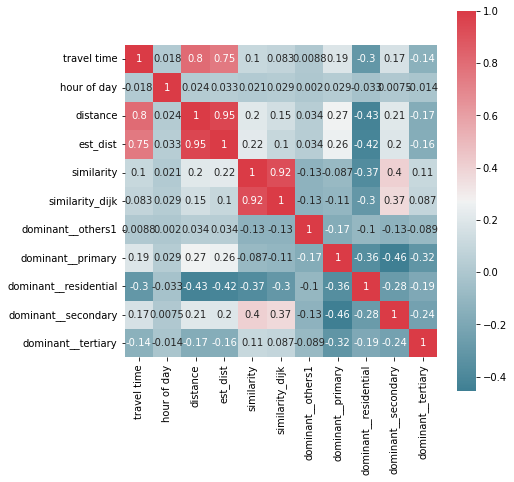

In [98]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(7,7))
corr = df11.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [99]:
x = np.array(df11[['est_dist','dominant__others1','dominant__primary','dominant__residential','dominant__tertiary','dominant__secondary']])
# x = np.array(df1.iloc[:,1:])
y = np.array(df11['travel time'])
x

array([[0.51987632, 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.52859023, 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.25828517, 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       ...,
       [0.3307786 , 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.5988515 , 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.16588275, 0.        , 1.        , 0.        , 0.        ,
        0.        ]])

In [100]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [101]:
print(X_train.shape)
print(X_test.shape)
# X_train

(6525, 6)
(1632, 6)


In [102]:
# inputs: distance +  dominant road
model3_1_1 = nnmodel(50, num_hlayers=1,Epoch=500)
model3_1_1

Epoch 1/500
204/204 [==============================] - 0s 1ms/step - loss: 761621.3125 - mape: 99.6035 - rmse: 872.7092 - val_loss: 786597.6250 - val_mape: 98.9118 - val_rmse: 886.9034
Epoch 2/500
204/204 [==============================] - 0s 925us/step - loss: 741115.5625 - mape: 97.4098 - rmse: 860.8807 - val_loss: 754919.8125 - val_mape: 95.5751 - val_rmse: 868.8612
Epoch 3/500
204/204 [==============================] - 0s 786us/step - loss: 700432.5625 - mape: 92.9713 - rmse: 836.9185 - val_loss: 704356.9375 - val_mape: 90.0719 - val_rmse: 839.2598
Epoch 4/500
204/204 [==============================] - 0s 799us/step - loss: 642238.0000 - mape: 86.3078 - rmse: 801.3975 - val_loss: 638183.8750 - val_mape: 82.5294 - val_rmse: 798.8641
Epoch 5/500
204/204 [==============================] - 0s 778us/step - loss: 572702.3750 - mape: 78.0670 - rmse: 756.7710 - val_loss: 563978.9375 - val_mape: 73.8548 - val_rmse: 750.9853
Epoch 6/500
204/204 [==============================] - 0s 786us/ste

Epoch 45/500
204/204 [==============================] - 0s 777us/step - loss: 85132.7578 - mape: 35.6142 - rmse: 291.7752 - val_loss: 102109.2188 - val_mape: 35.6204 - val_rmse: 319.5453
Epoch 46/500
204/204 [==============================] - 0s 793us/step - loss: 84278.2734 - mape: 35.1386 - rmse: 290.3072 - val_loss: 101192.4219 - val_mape: 35.4861 - val_rmse: 318.1076
Epoch 47/500
204/204 [==============================] - 0s 781us/step - loss: 83438.8516 - mape: 35.0498 - rmse: 288.8578 - val_loss: 100398.9688 - val_mape: 35.0376 - val_rmse: 316.8580
Epoch 48/500
204/204 [==============================] - 0s 788us/step - loss: 82652.7812 - mape: 34.5016 - rmse: 287.4940 - val_loss: 99612.2812 - val_mape: 34.8257 - val_rmse: 315.6141
Epoch 49/500
204/204 [==============================] - 0s 769us/step - loss: 81887.9688 - mape: 34.1457 - rmse: 286.1607 - val_loss: 98810.5469 - val_mape: 34.6877 - val_rmse: 314.3415
Epoch 50/500
204/204 [==============================] - 0s 782us/st

204/204 [==============================] - 0s 771us/step - loss: 72190.9375 - mape: 27.5929 - rmse: 268.6837 - val_loss: 89273.3047 - val_mape: 27.7244 - val_rmse: 298.7864
Epoch 90/500
204/204 [==============================] - 0s 785us/step - loss: 72174.9062 - mape: 27.8292 - rmse: 268.6539 - val_loss: 89334.6484 - val_mape: 27.4612 - val_rmse: 298.8890
Epoch 91/500
204/204 [==============================] - 0s 776us/step - loss: 72174.8516 - mape: 27.5309 - rmse: 268.6538 - val_loss: 89289.6641 - val_mape: 27.5213 - val_rmse: 298.8138
Epoch 92/500
204/204 [==============================] - 0s 783us/step - loss: 72160.5312 - mape: 27.4217 - rmse: 268.6271 - val_loss: 89208.7266 - val_mape: 27.7344 - val_rmse: 298.6783
Epoch 93/500
204/204 [==============================] - 0s 809us/step - loss: 72156.9375 - mape: 27.5515 - rmse: 268.6204 - val_loss: 89241.9609 - val_mape: 27.5243 - val_rmse: 298.7339
Epoch 94/500
204/204 [==============================] - 0s 783us/step - loss: 72147

Epoch 133/500
204/204 [==============================] - 0s 788us/step - loss: 72041.6641 - mape: 27.0466 - rmse: 268.4058 - val_loss: 89078.4688 - val_mape: 27.1665 - val_rmse: 298.4602
Epoch 134/500
204/204 [==============================] - 0s 812us/step - loss: 72024.6016 - mape: 27.2187 - rmse: 268.3740 - val_loss: 89161.5859 - val_mape: 26.9352 - val_rmse: 298.5994
Epoch 135/500
204/204 [==============================] - 0s 820us/step - loss: 72032.8359 - mape: 26.9360 - rmse: 268.3893 - val_loss: 89099.9531 - val_mape: 27.1004 - val_rmse: 298.4962
Epoch 136/500
204/204 [==============================] - 0s 815us/step - loss: 72032.1250 - mape: 27.0564 - rmse: 268.3880 - val_loss: 89047.8516 - val_mape: 27.2603 - val_rmse: 298.4089
Epoch 137/500
204/204 [==============================] - 0s 813us/step - loss: 72028.0312 - mape: 27.1812 - rmse: 268.3804 - val_loss: 89104.4297 - val_mape: 27.0581 - val_rmse: 298.5037
Epoch 138/500
204/204 [==============================] - 0s 824us

Epoch 177/500
204/204 [==============================] - 0s 806us/step - loss: 71829.4922 - mape: 27.0365 - rmse: 268.0103 - val_loss: 88876.8125 - val_mape: 26.9360 - val_rmse: 298.1221
Epoch 178/500
204/204 [==============================] - 0s 802us/step - loss: 71828.9297 - mape: 26.9795 - rmse: 268.0092 - val_loss: 88802.7812 - val_mape: 27.1627 - val_rmse: 297.9980
Epoch 179/500
204/204 [==============================] - 0s 837us/step - loss: 71823.7734 - mape: 26.9046 - rmse: 267.9996 - val_loss: 88798.6875 - val_mape: 27.1312 - val_rmse: 297.9911
Epoch 180/500
204/204 [==============================] - 0s 819us/step - loss: 71820.1797 - mape: 27.0939 - rmse: 267.9929 - val_loss: 88817.6172 - val_mape: 27.0363 - val_rmse: 298.0229
Epoch 181/500
204/204 [==============================] - 0s 827us/step - loss: 71811.7344 - mape: 27.0827 - rmse: 267.9771 - val_loss: 88867.8828 - val_mape: 26.8834 - val_rmse: 298.1072
Epoch 182/500
204/204 [==============================] - 0s 810us

Epoch 221/500
204/204 [==============================] - 0s 803us/step - loss: 71661.8359 - mape: 26.8957 - rmse: 267.6973 - val_loss: 88597.4141 - val_mape: 26.9320 - val_rmse: 297.6532
Epoch 222/500
204/204 [==============================] - 0s 788us/step - loss: 71664.8203 - mape: 26.9290 - rmse: 267.7029 - val_loss: 88621.9531 - val_mape: 26.8455 - val_rmse: 297.6944
Epoch 223/500
204/204 [==============================] - 0s 792us/step - loss: 71667.6016 - mape: 26.9432 - rmse: 267.7080 - val_loss: 88581.9297 - val_mape: 26.9579 - val_rmse: 297.6272
Epoch 224/500
204/204 [==============================] - 0s 797us/step - loss: 71646.7344 - mape: 26.7195 - rmse: 267.6691 - val_loss: 88524.4297 - val_mape: 27.1523 - val_rmse: 297.5305
Epoch 225/500
204/204 [==============================] - 0s 756us/step - loss: 71653.7422 - mape: 27.0479 - rmse: 267.6822 - val_loss: 88586.8828 - val_mape: 26.8905 - val_rmse: 297.6355
Epoch 226/500
204/204 [==============================] - 0s 764us

Epoch 265/500
204/204 [==============================] - 0s 781us/step - loss: 71570.3047 - mape: 26.8944 - rmse: 267.5263 - val_loss: 88503.3047 - val_mape: 26.7700 - val_rmse: 297.4951
Epoch 266/500
204/204 [==============================] - 0s 777us/step - loss: 71567.5156 - mape: 26.7600 - rmse: 267.5211 - val_loss: 88477.1250 - val_mape: 26.8311 - val_rmse: 297.4510
Epoch 267/500
204/204 [==============================] - 0s 796us/step - loss: 71570.6953 - mape: 26.9345 - rmse: 267.5270 - val_loss: 88500.4922 - val_mape: 26.7703 - val_rmse: 297.4903
Epoch 268/500
204/204 [==============================] - 0s 792us/step - loss: 71566.8359 - mape: 26.8071 - rmse: 267.5198 - val_loss: 88482.7266 - val_mape: 26.8240 - val_rmse: 297.4604
Epoch 269/500
204/204 [==============================] - 0s 795us/step - loss: 71571.5938 - mape: 26.8178 - rmse: 267.5287 - val_loss: 88475.6953 - val_mape: 26.8628 - val_rmse: 297.4486
Epoch 270/500
204/204 [==============================] - 0s 793us

Epoch 309/500
204/204 [==============================] - 0s 819us/step - loss: 71543.4922 - mape: 26.8753 - rmse: 267.4762 - val_loss: 88408.3359 - val_mape: 26.9351 - val_rmse: 297.3354
Epoch 310/500
204/204 [==============================] - 0s 793us/step - loss: 71547.3047 - mape: 26.8593 - rmse: 267.4833 - val_loss: 88457.3750 - val_mape: 26.7680 - val_rmse: 297.4178
Epoch 311/500
204/204 [==============================] - 0s 801us/step - loss: 71539.0312 - mape: 26.8515 - rmse: 267.4678 - val_loss: 88466.0312 - val_mape: 26.7443 - val_rmse: 297.4324
Epoch 312/500
204/204 [==============================] - 0s 790us/step - loss: 71533.4531 - mape: 26.8045 - rmse: 267.4574 - val_loss: 88422.0391 - val_mape: 26.8647 - val_rmse: 297.3584
Epoch 313/500
204/204 [==============================] - 0s 810us/step - loss: 71537.6094 - mape: 26.9635 - rmse: 267.4651 - val_loss: 88457.8203 - val_mape: 26.7346 - val_rmse: 297.4186
Epoch 314/500
204/204 [==============================] - 0s 852us

Epoch 353/500
204/204 [==============================] - 0s 813us/step - loss: 71519.2812 - mape: 26.8323 - rmse: 267.4309 - val_loss: 88404.5469 - val_mape: 26.8125 - val_rmse: 297.3290
Epoch 354/500
204/204 [==============================] - 0s 836us/step - loss: 71530.1875 - mape: 26.8345 - rmse: 267.4513 - val_loss: 88420.7969 - val_mape: 26.7363 - val_rmse: 297.3564
Epoch 355/500
204/204 [==============================] - 0s 825us/step - loss: 71520.8516 - mape: 26.8127 - rmse: 267.4338 - val_loss: 88391.1484 - val_mape: 26.8253 - val_rmse: 297.3065
Epoch 356/500
204/204 [==============================] - 0s 815us/step - loss: 71518.7031 - mape: 26.7348 - rmse: 267.4298 - val_loss: 88395.1094 - val_mape: 26.7990 - val_rmse: 297.3131
Epoch 357/500
204/204 [==============================] - 0s 805us/step - loss: 71525.1719 - mape: 26.7773 - rmse: 267.4419 - val_loss: 88340.8984 - val_mape: 27.0204 - val_rmse: 297.2220
Epoch 358/500
204/204 [==============================] - 0s 812us

Epoch 397/500
204/204 [==============================] - 0s 803us/step - loss: 71499.0312 - mape: 26.7968 - rmse: 267.3930 - val_loss: 88322.3594 - val_mape: 26.9589 - val_rmse: 297.1908
Epoch 398/500
204/204 [==============================] - 0s 807us/step - loss: 71491.4219 - mape: 26.9699 - rmse: 267.3788 - val_loss: 88414.7812 - val_mape: 26.6314 - val_rmse: 297.3462
Epoch 399/500
204/204 [==============================] - 0s 823us/step - loss: 71505.6562 - mape: 26.7389 - rmse: 267.4054 - val_loss: 88374.8828 - val_mape: 26.7626 - val_rmse: 297.2791
Epoch 400/500
204/204 [==============================] - 0s 817us/step - loss: 71503.1719 - mape: 26.8300 - rmse: 267.4008 - val_loss: 88388.0312 - val_mape: 26.7431 - val_rmse: 297.3012
Epoch 401/500
204/204 [==============================] - 0s 817us/step - loss: 71495.8438 - mape: 26.6866 - rmse: 267.3871 - val_loss: 88307.0000 - val_mape: 27.0306 - val_rmse: 297.1649
Epoch 402/500
204/204 [==============================] - 0s 814us

Epoch 441/500
204/204 [==============================] - 0s 824us/step - loss: 71483.4062 - mape: 26.8746 - rmse: 267.3638 - val_loss: 88284.5391 - val_mape: 26.9561 - val_rmse: 297.1271
Epoch 442/500
204/204 [==============================] - 0s 816us/step - loss: 71481.3516 - mape: 26.9247 - rmse: 267.3600 - val_loss: 88377.1172 - val_mape: 26.6516 - val_rmse: 297.2829
Epoch 443/500
204/204 [==============================] - 0s 812us/step - loss: 71473.8438 - mape: 26.7377 - rmse: 267.3459 - val_loss: 88351.6953 - val_mape: 26.7280 - val_rmse: 297.2401
Epoch 444/500
204/204 [==============================] - 0s 816us/step - loss: 71487.4688 - mape: 26.7254 - rmse: 267.3714 - val_loss: 88266.7578 - val_mape: 27.0353 - val_rmse: 297.0972
Epoch 445/500
204/204 [==============================] - 0s 824us/step - loss: 71479.6875 - mape: 26.9575 - rmse: 267.3568 - val_loss: 88364.7812 - val_mape: 26.6635 - val_rmse: 297.2621
Epoch 446/500
204/204 [==============================] - 0s 847us

Epoch 485/500
204/204 [==============================] - 0s 783us/step - loss: 71454.3828 - mape: 26.6994 - rmse: 267.3095 - val_loss: 88305.6562 - val_mape: 26.7779 - val_rmse: 297.1627
Epoch 486/500
204/204 [==============================] - 0s 776us/step - loss: 71452.9141 - mape: 26.7796 - rmse: 267.3068 - val_loss: 88297.6953 - val_mape: 26.8108 - val_rmse: 297.1493
Epoch 487/500
204/204 [==============================] - 0s 798us/step - loss: 71453.6484 - mape: 26.7949 - rmse: 267.3082 - val_loss: 88312.1875 - val_mape: 26.7651 - val_rmse: 297.1737
Epoch 488/500
204/204 [==============================] - 0s 775us/step - loss: 71455.2734 - mape: 26.7500 - rmse: 267.3112 - val_loss: 88270.1172 - val_mape: 26.8896 - val_rmse: 297.1029
Epoch 489/500
204/204 [==============================] - 0s 769us/step - loss: 71455.0938 - mape: 26.8296 - rmse: 267.3109 - val_loss: 88280.3984 - val_mape: 26.8447 - val_rmse: 297.1202
Epoch 490/500
204/204 [==============================] - 0s 794us

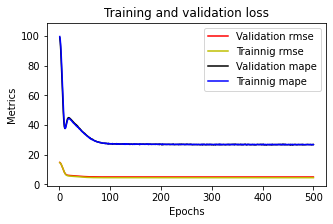

In [103]:
plotme(model3_1_1)


In [104]:
# inputs: distance +  dominant road
model3_1_2 = nnmodel(100, num_hlayers=1,Epoch=500)
model3_1_2

Epoch 1/500
204/204 [==============================] - 0s 1ms/step - loss: 758530.1875 - mape: 99.2736 - rmse: 870.9364 - val_loss: 776573.2500 - val_mape: 97.8724 - val_rmse: 881.2339
Epoch 2/500
204/204 [==============================] - 0s 822us/step - loss: 716672.4375 - mape: 94.7972 - rmse: 846.5651 - val_loss: 711402.4375 - val_mape: 90.8681 - val_rmse: 843.4468
Epoch 3/500
204/204 [==============================] - 0s 828us/step - loss: 633963.3125 - mape: 85.2989 - rmse: 796.2181 - val_loss: 611917.1250 - val_mape: 79.4867 - val_rmse: 782.2513
Epoch 4/500
204/204 [==============================] - 0s 826us/step - loss: 527739.3125 - mape: 72.7496 - rmse: 726.4567 - val_loss: 498995.5312 - val_mape: 66.2335 - val_rmse: 706.3962
Epoch 5/500
204/204 [==============================] - 0s 788us/step - loss: 417302.1562 - mape: 59.2897 - rmse: 645.9893 - val_loss: 389867.8750 - val_mape: 53.3612 - val_rmse: 624.3940
Epoch 6/500
204/204 [==============================] - 0s 761us/ste

Epoch 45/500
204/204 [==============================] - 0s 823us/step - loss: 74201.0000 - mape: 29.9054 - rmse: 272.3986 - val_loss: 91230.8047 - val_mape: 30.0258 - val_rmse: 302.0444
Epoch 46/500
204/204 [==============================] - 0s 827us/step - loss: 73874.0859 - mape: 29.7441 - rmse: 271.7979 - val_loss: 90871.0078 - val_mape: 29.9282 - val_rmse: 301.4482
Epoch 47/500
204/204 [==============================] - 0s 826us/step - loss: 73583.3047 - mape: 29.6029 - rmse: 271.2624 - val_loss: 90598.0703 - val_mape: 29.6442 - val_rmse: 300.9951
Epoch 48/500
204/204 [==============================] - 0s 822us/step - loss: 73333.0469 - mape: 29.3254 - rmse: 270.8008 - val_loss: 90421.1406 - val_mape: 29.2569 - val_rmse: 300.7011
Epoch 49/500
204/204 [==============================] - 0s 825us/step - loss: 73136.3984 - mape: 28.9886 - rmse: 270.4374 - val_loss: 90177.3438 - val_mape: 29.1339 - val_rmse: 300.2954
Epoch 50/500
204/204 [==============================] - 0s 817us/step 

204/204 [==============================] - 0s 815us/step - loss: 72030.8047 - mape: 26.9396 - rmse: 268.3856 - val_loss: 88996.6797 - val_mape: 27.2275 - val_rmse: 298.3231
Epoch 90/500
204/204 [==============================] - 0s 807us/step - loss: 72039.0469 - mape: 27.1659 - rmse: 268.4009 - val_loss: 89037.5234 - val_mape: 27.0932 - val_rmse: 298.3916
Epoch 91/500
204/204 [==============================] - 0s 811us/step - loss: 72038.6562 - mape: 27.0970 - rmse: 268.4002 - val_loss: 89060.9922 - val_mape: 26.9960 - val_rmse: 298.4309
Epoch 92/500
204/204 [==============================] - 0s 799us/step - loss: 72029.3828 - mape: 27.0131 - rmse: 268.3829 - val_loss: 89062.6562 - val_mape: 26.9656 - val_rmse: 298.4337
Epoch 93/500
204/204 [==============================] - 0s 809us/step - loss: 72005.1406 - mape: 27.0818 - rmse: 268.3377 - val_loss: 89042.1250 - val_mape: 27.0177 - val_rmse: 298.3993
Epoch 94/500
204/204 [==============================] - 0s 810us/step - loss: 71992

Epoch 133/500
204/204 [==============================] - 0s 835us/step - loss: 71674.3516 - mape: 26.8961 - rmse: 267.7207 - val_loss: 88552.8516 - val_mape: 27.1157 - val_rmse: 297.5783
Epoch 134/500
204/204 [==============================] - 0s 825us/step - loss: 71679.4922 - mape: 27.0063 - rmse: 267.7303 - val_loss: 88537.3984 - val_mape: 27.1282 - val_rmse: 297.5523
Epoch 135/500
204/204 [==============================] - 0s 842us/step - loss: 71667.2656 - mape: 26.8916 - rmse: 267.7074 - val_loss: 88544.9766 - val_mape: 27.0664 - val_rmse: 297.5651
Epoch 136/500
204/204 [==============================] - 0s 816us/step - loss: 71663.1562 - mape: 26.9297 - rmse: 267.6997 - val_loss: 88559.2422 - val_mape: 26.9946 - val_rmse: 297.5891
Epoch 137/500
204/204 [==============================] - 0s 818us/step - loss: 71656.9219 - mape: 26.8754 - rmse: 267.6881 - val_loss: 88519.9219 - val_mape: 27.0823 - val_rmse: 297.5230
Epoch 138/500
204/204 [==============================] - 0s 842us

Epoch 177/500
204/204 [==============================] - 0s 818us/step - loss: 71475.5312 - mape: 26.8740 - rmse: 267.3491 - val_loss: 88344.2422 - val_mape: 26.6310 - val_rmse: 297.2276
Epoch 178/500
204/204 [==============================] - 0s 813us/step - loss: 71470.9062 - mape: 26.8047 - rmse: 267.3404 - val_loss: 88306.1641 - val_mape: 26.7791 - val_rmse: 297.1635
Epoch 179/500
204/204 [==============================] - 0s 759us/step - loss: 71450.9922 - mape: 26.6737 - rmse: 267.3032 - val_loss: 88203.8594 - val_mape: 27.1554 - val_rmse: 296.9913
Epoch 180/500
204/204 [==============================] - 0s 782us/step - loss: 71469.0469 - mape: 26.9646 - rmse: 267.3369 - val_loss: 88279.8438 - val_mape: 26.8028 - val_rmse: 297.1192
Epoch 181/500
204/204 [==============================] - 0s 748us/step - loss: 71461.7656 - mape: 26.8136 - rmse: 267.3233 - val_loss: 88241.1094 - val_mape: 26.9448 - val_rmse: 297.0540
Epoch 182/500
204/204 [==============================] - 0s 753us

Epoch 221/500
204/204 [==============================] - 0s 827us/step - loss: 71403.3672 - mape: 26.9263 - rmse: 267.2141 - val_loss: 88329.0703 - val_mape: 26.3955 - val_rmse: 297.2021
Epoch 222/500
204/204 [==============================] - 0s 817us/step - loss: 71415.8281 - mape: 26.7085 - rmse: 267.2374 - val_loss: 88241.7969 - val_mape: 26.6449 - val_rmse: 297.0552
Epoch 223/500
204/204 [==============================] - 0s 824us/step - loss: 71417.2188 - mape: 26.7254 - rmse: 267.2400 - val_loss: 88192.9688 - val_mape: 26.8009 - val_rmse: 296.9730
Epoch 224/500
204/204 [==============================] - 0s 819us/step - loss: 71422.6562 - mape: 26.7565 - rmse: 267.2502 - val_loss: 88164.7031 - val_mape: 26.8939 - val_rmse: 296.9254
Epoch 225/500
204/204 [==============================] - 0s 821us/step - loss: 71413.1406 - mape: 26.8358 - rmse: 267.2324 - val_loss: 88244.2344 - val_mape: 26.6158 - val_rmse: 297.0593
Epoch 226/500
204/204 [==============================] - 0s 826us

Epoch 265/500
204/204 [==============================] - 0s 837us/step - loss: 71388.0781 - mape: 26.8379 - rmse: 267.1855 - val_loss: 88189.6094 - val_mape: 26.6567 - val_rmse: 296.9673
Epoch 266/500
204/204 [==============================] - 0s 820us/step - loss: 71400.3047 - mape: 26.5583 - rmse: 267.2083 - val_loss: 88081.3750 - val_mape: 27.0816 - val_rmse: 296.7851
Epoch 267/500
204/204 [==============================] - 0s 813us/step - loss: 71404.7344 - mape: 27.0137 - rmse: 267.2166 - val_loss: 88195.7344 - val_mape: 26.6468 - val_rmse: 296.9777
Epoch 268/500
204/204 [==============================] - 0s 814us/step - loss: 71387.5078 - mape: 26.6020 - rmse: 267.1844 - val_loss: 88083.5234 - val_mape: 27.0394 - val_rmse: 296.7887
Epoch 269/500
204/204 [==============================] - 0s 815us/step - loss: 71405.4922 - mape: 26.8744 - rmse: 267.2180 - val_loss: 88143.0078 - val_mape: 26.8143 - val_rmse: 296.8889
Epoch 270/500
204/204 [==============================] - 0s 821us

Epoch 309/500
204/204 [==============================] - 0s 767us/step - loss: 71369.6484 - mape: 26.8916 - rmse: 267.1510 - val_loss: 88180.6172 - val_mape: 26.6106 - val_rmse: 296.9522
Epoch 310/500
204/204 [==============================] - 0s 745us/step - loss: 71377.8984 - mape: 26.7077 - rmse: 267.1664 - val_loss: 88141.6094 - val_mape: 26.7431 - val_rmse: 296.8865
Epoch 311/500
204/204 [==============================] - 0s 754us/step - loss: 71381.5391 - mape: 26.7434 - rmse: 267.1732 - val_loss: 88084.5781 - val_mape: 26.9230 - val_rmse: 296.7905
Epoch 312/500
204/204 [==============================] - 0s 788us/step - loss: 71370.2031 - mape: 26.8709 - rmse: 267.1520 - val_loss: 88301.6562 - val_mape: 26.2896 - val_rmse: 297.1559
Epoch 313/500
204/204 [==============================] - 0s 761us/step - loss: 71388.3125 - mape: 26.6401 - rmse: 267.1859 - val_loss: 88125.1641 - val_mape: 26.7636 - val_rmse: 296.8588
Epoch 314/500
204/204 [==============================] - 0s 764us

Epoch 353/500
204/204 [==============================] - 0s 861us/step - loss: 71345.9922 - mape: 26.6281 - rmse: 267.1067 - val_loss: 87997.9766 - val_mape: 27.1993 - val_rmse: 296.6445
Epoch 354/500
204/204 [==============================] - 0s 743us/step - loss: 71369.0156 - mape: 26.9491 - rmse: 267.1498 - val_loss: 88091.4609 - val_mape: 26.8251 - val_rmse: 296.8021
Epoch 355/500
204/204 [==============================] - 0s 751us/step - loss: 71356.1875 - mape: 26.7246 - rmse: 267.1258 - val_loss: 88194.9297 - val_mape: 26.4837 - val_rmse: 296.9763
Epoch 356/500
204/204 [==============================] - 0s 752us/step - loss: 71365.4453 - mape: 26.9241 - rmse: 267.1431 - val_loss: 88269.9922 - val_mape: 26.2940 - val_rmse: 297.1027
Epoch 357/500
204/204 [==============================] - 0s 793us/step - loss: 71378.5312 - mape: 26.6059 - rmse: 267.1676 - val_loss: 88169.1484 - val_mape: 26.5118 - val_rmse: 296.9329
Epoch 358/500
204/204 [==============================] - 0s 1ms/s

Epoch 397/500
204/204 [==============================] - 0s 752us/step - loss: 71353.0234 - mape: 26.6403 - rmse: 267.1199 - val_loss: 88070.8828 - val_mape: 26.8081 - val_rmse: 296.7674
Epoch 398/500
204/204 [==============================] - 0s 875us/step - loss: 71356.0547 - mape: 26.8428 - rmse: 267.1255 - val_loss: 88167.8047 - val_mape: 26.4804 - val_rmse: 296.9306
Epoch 399/500
204/204 [==============================] - 0s 836us/step - loss: 71349.8516 - mape: 26.7360 - rmse: 267.1139 - val_loss: 88156.2812 - val_mape: 26.5049 - val_rmse: 296.9112
Epoch 400/500
204/204 [==============================] - 0s 935us/step - loss: 71356.4609 - mape: 26.6715 - rmse: 267.1263 - val_loss: 88113.2266 - val_mape: 26.6635 - val_rmse: 296.8387
Epoch 401/500
204/204 [==============================] - 0s 876us/step - loss: 71343.3828 - mape: 26.5623 - rmse: 267.1018 - val_loss: 88041.2031 - val_mape: 26.8935 - val_rmse: 296.7174
Epoch 402/500
204/204 [==============================] - 0s 798us

Epoch 441/500
204/204 [==============================] - 0s 775us/step - loss: 71326.7031 - mape: 26.6869 - rmse: 267.0706 - val_loss: 88004.2344 - val_mape: 26.9280 - val_rmse: 296.6551
Epoch 442/500
204/204 [==============================] - 0s 771us/step - loss: 71323.3828 - mape: 27.0038 - rmse: 267.0644 - val_loss: 88172.7422 - val_mape: 26.4131 - val_rmse: 296.9390
Epoch 443/500
204/204 [==============================] - 0s 782us/step - loss: 71312.9922 - mape: 26.3578 - rmse: 267.0449 - val_loss: 87952.4688 - val_mape: 27.2551 - val_rmse: 296.5678
Epoch 444/500
204/204 [==============================] - 0s 785us/step - loss: 71361.2656 - mape: 26.9345 - rmse: 267.1353 - val_loss: 88027.2188 - val_mape: 26.8515 - val_rmse: 296.6938
Epoch 445/500
204/204 [==============================] - 0s 777us/step - loss: 71342.4141 - mape: 26.8924 - rmse: 267.1000 - val_loss: 88132.4297 - val_mape: 26.5179 - val_rmse: 296.8711
Epoch 446/500
204/204 [==============================] - 0s 775us

Epoch 485/500
204/204 [==============================] - 0s 776us/step - loss: 71324.4297 - mape: 26.8934 - rmse: 267.0663 - val_loss: 88089.8750 - val_mape: 26.6477 - val_rmse: 296.7994
Epoch 486/500
204/204 [==============================] - 0s 769us/step - loss: 71324.7031 - mape: 26.7178 - rmse: 267.0669 - val_loss: 88080.0391 - val_mape: 26.6695 - val_rmse: 296.7828
Epoch 487/500
204/204 [==============================] - 0s 788us/step - loss: 71294.3906 - mape: 26.9212 - rmse: 267.0101 - val_loss: 88294.3438 - val_mape: 26.1202 - val_rmse: 297.1436
Epoch 488/500
204/204 [==============================] - 0s 762us/step - loss: 71346.0938 - mape: 26.5811 - rmse: 267.1069 - val_loss: 88145.8438 - val_mape: 26.4504 - val_rmse: 296.8936
Epoch 489/500
204/204 [==============================] - 0s 775us/step - loss: 71327.1406 - mape: 26.6652 - rmse: 267.0714 - val_loss: 88068.1641 - val_mape: 26.6748 - val_rmse: 296.7628
Epoch 490/500
204/204 [==============================] - 0s 771us

In [105]:
202.7127227783203/60

3.378545379638672

In [106]:
# inputs: distance +  dominant road
model3_1_3 = nnmodel(200, num_hlayers=1,Epoch=500)
model3_1_3

Epoch 1/500
204/204 [==============================] - 0s 1ms/step - loss: 753237.3750 - mape: 98.7264 - rmse: 867.8925 - val_loss: 758143.6250 - val_mape: 95.9272 - val_rmse: 870.7144
Epoch 2/500
204/204 [==============================] - 0s 790us/step - loss: 672713.3750 - mape: 89.8284 - rmse: 820.1910 - val_loss: 636291.5625 - val_mape: 82.3193 - val_rmse: 797.6788
Epoch 3/500
204/204 [==============================] - 0s 788us/step - loss: 527592.5625 - mape: 72.6698 - rmse: 726.3557 - val_loss: 473190.0312 - val_mape: 63.1888 - val_rmse: 687.8881
Epoch 4/500
204/204 [==============================] - 0s 805us/step - loss: 370275.3125 - mape: 53.9551 - rmse: 608.5025 - val_loss: 323046.0000 - val_mape: 45.7969 - val_rmse: 568.3713
Epoch 5/500
204/204 [==============================] - 0s 799us/step - loss: 244552.7188 - mape: 40.6272 - rmse: 494.5227 - val_loss: 219249.6094 - val_mape: 37.8319 - val_rmse: 468.2410
Epoch 6/500
204/204 [==============================] - 0s 803us/ste

Epoch 45/500
204/204 [==============================] - 0s 790us/step - loss: 72147.2578 - mape: 27.7681 - rmse: 268.6024 - val_loss: 89253.6562 - val_mape: 27.6530 - val_rmse: 298.7535
Epoch 46/500
204/204 [==============================] - 0s 774us/step - loss: 72105.5156 - mape: 27.7965 - rmse: 268.5247 - val_loss: 89295.6953 - val_mape: 27.3368 - val_rmse: 298.8239
Epoch 47/500
204/204 [==============================] - 0s 795us/step - loss: 72065.2734 - mape: 27.6222 - rmse: 268.4498 - val_loss: 89398.7734 - val_mape: 27.0018 - val_rmse: 298.9963
Epoch 48/500
204/204 [==============================] - 0s 794us/step - loss: 72070.6719 - mape: 27.3285 - rmse: 268.4598 - val_loss: 89058.6641 - val_mape: 27.7596 - val_rmse: 298.4270
Epoch 49/500
204/204 [==============================] - 0s 799us/step - loss: 72035.0859 - mape: 27.5274 - rmse: 268.3935 - val_loss: 89168.7656 - val_mape: 27.2586 - val_rmse: 298.6114
Epoch 50/500
204/204 [==============================] - 0s 806us/step 

204/204 [==============================] - 0s 926us/step - loss: 71593.5938 - mape: 27.0240 - rmse: 267.5698 - val_loss: 88618.8047 - val_mape: 26.8863 - val_rmse: 297.6891
Epoch 90/500
204/204 [==============================] - 0s 824us/step - loss: 71571.6797 - mape: 26.9750 - rmse: 267.5288 - val_loss: 88605.8359 - val_mape: 26.8908 - val_rmse: 297.6673
Epoch 91/500
204/204 [==============================] - 0s 922us/step - loss: 71568.1562 - mape: 27.0267 - rmse: 267.5222 - val_loss: 88645.6172 - val_mape: 26.7790 - val_rmse: 297.7341
Epoch 92/500
204/204 [==============================] - 0s 840us/step - loss: 71564.2188 - mape: 26.9266 - rmse: 267.5149 - val_loss: 88653.2188 - val_mape: 26.6831 - val_rmse: 297.7469
Epoch 93/500
204/204 [==============================] - 0s 829us/step - loss: 71554.7656 - mape: 26.9098 - rmse: 267.4972 - val_loss: 88459.6875 - val_mape: 27.2720 - val_rmse: 297.4217
Epoch 94/500
204/204 [==============================] - 0s 854us/step - loss: 71537

Epoch 133/500
204/204 [==============================] - 0s 779us/step - loss: 71152.4844 - mape: 26.8248 - rmse: 266.7442 - val_loss: 88094.9219 - val_mape: 26.7856 - val_rmse: 296.8079
Epoch 134/500
204/204 [==============================] - 0s 790us/step - loss: 71182.0469 - mape: 26.8379 - rmse: 266.7997 - val_loss: 88050.3125 - val_mape: 26.9132 - val_rmse: 296.7327
Epoch 135/500
204/204 [==============================] - 0s 776us/step - loss: 71135.4453 - mape: 26.7874 - rmse: 266.7123 - val_loss: 88022.6875 - val_mape: 27.0090 - val_rmse: 296.6862
Epoch 136/500
204/204 [==============================] - 0s 781us/step - loss: 71135.8125 - mape: 26.7974 - rmse: 266.7130 - val_loss: 88112.0625 - val_mape: 26.6502 - val_rmse: 296.8368
Epoch 137/500
204/204 [==============================] - 0s 776us/step - loss: 71125.8828 - mape: 26.8073 - rmse: 266.6944 - val_loss: 88003.6484 - val_mape: 26.9646 - val_rmse: 296.6541
Epoch 138/500
204/204 [==============================] - 0s 779us

Epoch 177/500
204/204 [==============================] - 0s 771us/step - loss: 70941.0625 - mape: 26.9846 - rmse: 266.3476 - val_loss: 87971.0078 - val_mape: 26.4316 - val_rmse: 296.5991
Epoch 178/500
204/204 [==============================] - 0s 792us/step - loss: 70943.4531 - mape: 26.7616 - rmse: 266.3521 - val_loss: 87958.8750 - val_mape: 26.5243 - val_rmse: 296.5786
Epoch 179/500
204/204 [==============================] - 0s 789us/step - loss: 70930.4609 - mape: 26.6040 - rmse: 266.3277 - val_loss: 87782.8359 - val_mape: 27.1081 - val_rmse: 296.2817
Epoch 180/500
204/204 [==============================] - 0s 774us/step - loss: 70929.0469 - mape: 26.8717 - rmse: 266.3251 - val_loss: 87842.4297 - val_mape: 26.7957 - val_rmse: 296.3822
Epoch 181/500
204/204 [==============================] - 0s 776us/step - loss: 70916.3984 - mape: 26.7853 - rmse: 266.3013 - val_loss: 87943.0234 - val_mape: 26.4709 - val_rmse: 296.5519
Epoch 182/500
204/204 [==============================] - 0s 782us

Epoch 221/500
204/204 [==============================] - 0s 834us/step - loss: 70749.1328 - mape: 26.7090 - rmse: 265.9871 - val_loss: 87627.1797 - val_mape: 26.9393 - val_rmse: 296.0189
Epoch 222/500
204/204 [==============================] - 0s 795us/step - loss: 70750.2812 - mape: 26.6832 - rmse: 265.9893 - val_loss: 87599.2422 - val_mape: 27.0648 - val_rmse: 295.9717
Epoch 223/500
204/204 [==============================] - 0s 780us/step - loss: 70687.2969 - mape: 27.1080 - rmse: 265.8708 - val_loss: 87996.2422 - val_mape: 26.0303 - val_rmse: 296.6416
Epoch 224/500
204/204 [==============================] - 0s 797us/step - loss: 70753.2969 - mape: 26.5503 - rmse: 265.9949 - val_loss: 87730.4609 - val_mape: 26.6538 - val_rmse: 296.1933
Epoch 225/500
204/204 [==============================] - 0s 785us/step - loss: 70723.4062 - mape: 26.6832 - rmse: 265.9387 - val_loss: 87657.9531 - val_mape: 26.8273 - val_rmse: 296.0709
Epoch 226/500
204/204 [==============================] - 0s 772us

Epoch 265/500
204/204 [==============================] - 0s 785us/step - loss: 70565.2734 - mape: 26.8172 - rmse: 265.6412 - val_loss: 87500.6406 - val_mape: 26.8417 - val_rmse: 295.8051
Epoch 266/500
204/204 [==============================] - 0s 777us/step - loss: 70549.6250 - mape: 26.8846 - rmse: 265.6118 - val_loss: 87612.6953 - val_mape: 26.5700 - val_rmse: 295.9944
Epoch 267/500
204/204 [==============================] - 0s 786us/step - loss: 70550.5234 - mape: 26.4660 - rmse: 265.6135 - val_loss: 87484.0000 - val_mape: 27.0452 - val_rmse: 295.7769
Epoch 268/500
204/204 [==============================] - 0s 795us/step - loss: 70561.5625 - mape: 26.9099 - rmse: 265.6343 - val_loss: 87499.5234 - val_mape: 26.8527 - val_rmse: 295.8032
Epoch 269/500
204/204 [==============================] - 0s 826us/step - loss: 70557.9062 - mape: 26.8147 - rmse: 265.6274 - val_loss: 87605.8984 - val_mape: 26.5438 - val_rmse: 295.9829
Epoch 270/500
204/204 [==============================] - 0s 795us

Epoch 309/500
204/204 [==============================] - 0s 758us/step - loss: 70392.6719 - mape: 26.7794 - rmse: 265.3162 - val_loss: 87384.3594 - val_mape: 26.8288 - val_rmse: 295.6085
Epoch 310/500
204/204 [==============================] - 0s 797us/step - loss: 70387.6172 - mape: 26.8074 - rmse: 265.3066 - val_loss: 87658.9297 - val_mape: 26.1672 - val_rmse: 296.0725
Epoch 311/500
204/204 [==============================] - 0s 770us/step - loss: 70387.8906 - mape: 26.6881 - rmse: 265.3072 - val_loss: 87369.4141 - val_mape: 26.8841 - val_rmse: 295.5832
Epoch 312/500
204/204 [==============================] - 0s 788us/step - loss: 70407.8828 - mape: 26.6850 - rmse: 265.3448 - val_loss: 87367.0781 - val_mape: 26.9021 - val_rmse: 295.5792
Epoch 313/500
204/204 [==============================] - 0s 775us/step - loss: 70386.1719 - mape: 26.8124 - rmse: 265.3039 - val_loss: 87436.5469 - val_mape: 26.6698 - val_rmse: 295.6967
Epoch 314/500
204/204 [==============================] - 0s 806us

Epoch 353/500
204/204 [==============================] - 0s 775us/step - loss: 70215.4766 - mape: 26.7859 - rmse: 264.9820 - val_loss: 87366.6406 - val_mape: 26.5685 - val_rmse: 295.5785
Epoch 354/500
204/204 [==============================] - 0s 765us/step - loss: 70229.4531 - mape: 26.7441 - rmse: 265.0084 - val_loss: 87331.2734 - val_mape: 26.6905 - val_rmse: 295.5186
Epoch 355/500
204/204 [==============================] - 0s 781us/step - loss: 70223.6094 - mape: 26.6327 - rmse: 264.9974 - val_loss: 87267.5234 - val_mape: 26.8848 - val_rmse: 295.4108
Epoch 356/500
204/204 [==============================] - 0s 788us/step - loss: 70176.9922 - mape: 26.5953 - rmse: 264.9094 - val_loss: 87153.1641 - val_mape: 27.4903 - val_rmse: 295.2171
Epoch 357/500
204/204 [==============================] - 0s 787us/step - loss: 70216.6641 - mape: 27.0141 - rmse: 264.9843 - val_loss: 87320.5469 - val_mape: 26.6564 - val_rmse: 295.5005
Epoch 358/500
204/204 [==============================] - 0s 784us

Epoch 397/500
204/204 [==============================] - 0s 805us/step - loss: 70067.8203 - mape: 26.6941 - rmse: 264.7033 - val_loss: 87158.6172 - val_mape: 26.9690 - val_rmse: 295.2264
Epoch 398/500
204/204 [==============================] - 0s 799us/step - loss: 70071.7969 - mape: 26.7364 - rmse: 264.7108 - val_loss: 87167.8203 - val_mape: 26.9039 - val_rmse: 295.2420
Epoch 399/500
204/204 [==============================] - 0s 787us/step - loss: 70026.1953 - mape: 27.0758 - rmse: 264.6246 - val_loss: 87556.4922 - val_mape: 25.9764 - val_rmse: 295.8995
Epoch 400/500
204/204 [==============================] - 0s 784us/step - loss: 70104.7344 - mape: 26.5811 - rmse: 264.7730 - val_loss: 87291.8984 - val_mape: 26.4947 - val_rmse: 295.4520
Epoch 401/500
204/204 [==============================] - 0s 789us/step - loss: 70065.2891 - mape: 26.7364 - rmse: 264.6985 - val_loss: 87188.5000 - val_mape: 26.8315 - val_rmse: 295.2770
Epoch 402/500
204/204 [==============================] - 0s 792us

Epoch 441/500
204/204 [==============================] - 0s 834us/step - loss: 69962.6250 - mape: 26.4936 - rmse: 264.5045 - val_loss: 87065.1953 - val_mape: 26.9359 - val_rmse: 295.0681
Epoch 442/500
204/204 [==============================] - 0s 806us/step - loss: 69955.7188 - mape: 26.8742 - rmse: 264.4914 - val_loss: 87211.3047 - val_mape: 26.4939 - val_rmse: 295.3156
Epoch 443/500
204/204 [==============================] - 0s 820us/step - loss: 69927.8828 - mape: 26.6974 - rmse: 264.4388 - val_loss: 87120.9688 - val_mape: 26.7345 - val_rmse: 295.1626
Epoch 444/500
204/204 [==============================] - 0s 868us/step - loss: 69917.6250 - mape: 26.6700 - rmse: 264.4194 - val_loss: 87032.7578 - val_mape: 27.0628 - val_rmse: 295.0132
Epoch 445/500
204/204 [==============================] - 0s 880us/step - loss: 69953.7031 - mape: 26.8457 - rmse: 264.4876 - val_loss: 87143.1016 - val_mape: 26.6700 - val_rmse: 295.2001
Epoch 446/500
204/204 [==============================] - 0s 823us

Epoch 485/500
204/204 [==============================] - 0s 786us/step - loss: 69819.0000 - mape: 26.7512 - rmse: 264.2328 - val_loss: 87198.2969 - val_mape: 26.4167 - val_rmse: 295.2936
Epoch 486/500
204/204 [==============================] - 0s 775us/step - loss: 69832.6562 - mape: 26.6421 - rmse: 264.2587 - val_loss: 86966.8438 - val_mape: 27.0879 - val_rmse: 294.9014
Epoch 487/500
204/204 [==============================] - 0s 775us/step - loss: 69824.9062 - mape: 26.7740 - rmse: 264.2440 - val_loss: 86974.5859 - val_mape: 27.1122 - val_rmse: 294.9146
Epoch 488/500
204/204 [==============================] - 0s 801us/step - loss: 69808.2344 - mape: 26.7519 - rmse: 264.2125 - val_loss: 86952.4141 - val_mape: 27.1520 - val_rmse: 294.8770
Epoch 489/500
204/204 [==============================] - 0s 786us/step - loss: 69786.7188 - mape: 26.9037 - rmse: 264.1718 - val_loss: 87159.0234 - val_mape: 26.4331 - val_rmse: 295.2271
Epoch 490/500
204/204 [==============================] - 0s 839us

In [107]:
202.6893768310547/60

3.378156280517578

In [108]:
# inputs: distance +  dominant road
model3_1_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model3_1_4

Epoch 1/500
204/204 [==============================] - 0s 1ms/step - loss: 682362.9375 - mape: 90.9647 - rmse: 826.0526 - val_loss: 467960.2500 - val_mape: 62.6495 - val_rmse: 684.0762
Epoch 2/500
204/204 [==============================] - 0s 859us/step - loss: 194428.9531 - mape: 44.8327 - rmse: 440.9410 - val_loss: 132805.1094 - val_mape: 46.8351 - val_rmse: 364.4243
Epoch 3/500
204/204 [==============================] - 0s 947us/step - loss: 110934.9141 - mape: 44.5319 - rmse: 333.0689 - val_loss: 124294.7578 - val_mape: 44.9521 - val_rmse: 352.5546
Epoch 4/500
204/204 [==============================] - 0s 1ms/step - loss: 104219.8359 - mape: 42.4427 - rmse: 322.8310 - val_loss: 118691.6406 - val_mape: 41.2194 - val_rmse: 344.5165
Epoch 5/500
204/204 [==============================] - 0s 900us/step - loss: 98464.6328 - mape: 40.3052 - rmse: 313.7907 - val_loss: 113596.4922 - val_mape: 38.5067 - val_rmse: 337.0408
Epoch 6/500
204/204 [==============================] - 0s 869us/step -

204/204 [==============================] - 0s 843us/step - loss: 70412.7500 - mape: 27.0082 - rmse: 265.3540 - val_loss: 88613.4609 - val_mape: 25.8400 - val_rmse: 297.6801
Epoch 46/500
204/204 [==============================] - 0s 810us/step - loss: 70512.9531 - mape: 26.9175 - rmse: 265.5428 - val_loss: 87612.6094 - val_mape: 27.6784 - val_rmse: 295.9943
Epoch 47/500
204/204 [==============================] - 0s 809us/step - loss: 70411.2578 - mape: 26.8684 - rmse: 265.3512 - val_loss: 88060.2734 - val_mape: 26.2187 - val_rmse: 296.7495
Epoch 48/500
204/204 [==============================] - 0s 820us/step - loss: 70391.2344 - mape: 26.6971 - rmse: 265.3135 - val_loss: 87658.9141 - val_mape: 27.0553 - val_rmse: 296.0725
Epoch 49/500
204/204 [==============================] - 0s 819us/step - loss: 70375.0000 - mape: 26.9142 - rmse: 265.2829 - val_loss: 87599.6484 - val_mape: 27.3642 - val_rmse: 295.9724
Epoch 50/500
204/204 [==============================] - 0s 811us/step - loss: 70349

Epoch 133/500
204/204 [==============================] - 0s 823us/step - loss: 69307.1250 - mape: 27.3478 - rmse: 263.2625 - val_loss: 87489.8750 - val_mape: 26.3274 - val_rmse: 295.7869
Epoch 134/500
204/204 [==============================] - 0s 861us/step - loss: 69282.7031 - mape: 27.0664 - rmse: 263.2161 - val_loss: 87387.8594 - val_mape: 26.5715 - val_rmse: 295.6144
Epoch 135/500
204/204 [==============================] - 0s 814us/step - loss: 69393.9609 - mape: 27.0485 - rmse: 263.4273 - val_loss: 87215.8438 - val_mape: 26.7195 - val_rmse: 295.3233
Epoch 136/500
204/204 [==============================] - 0s 874us/step - loss: 69319.7422 - mape: 27.2898 - rmse: 263.2864 - val_loss: 87416.5312 - val_mape: 26.4388 - val_rmse: 295.6629
Epoch 137/500
204/204 [==============================] - 0s 860us/step - loss: 69395.7422 - mape: 27.1637 - rmse: 263.4307 - val_loss: 86985.2656 - val_mape: 27.1755 - val_rmse: 294.9326
Epoch 138/500
204/204 [==============================] - 0s 862us

Epoch 177/500
204/204 [==============================] - 0s 863us/step - loss: 69146.0859 - mape: 27.2181 - rmse: 262.9564 - val_loss: 86852.7422 - val_mape: 27.6081 - val_rmse: 294.7079
Epoch 178/500
204/204 [==============================] - 0s 826us/step - loss: 69147.5312 - mape: 27.2519 - rmse: 262.9592 - val_loss: 87038.6016 - val_mape: 27.2261 - val_rmse: 295.0230
Epoch 179/500
204/204 [==============================] - 0s 1ms/step - loss: 69225.7188 - mape: 27.2222 - rmse: 263.1078 - val_loss: 87068.6016 - val_mape: 26.8967 - val_rmse: 295.0739
Epoch 180/500
204/204 [==============================] - 0s 857us/step - loss: 69107.1172 - mape: 27.1892 - rmse: 262.8823 - val_loss: 87232.7656 - val_mape: 26.7223 - val_rmse: 295.3519
Epoch 181/500
204/204 [==============================] - 0s 829us/step - loss: 69140.9453 - mape: 27.3363 - rmse: 262.9467 - val_loss: 86934.8359 - val_mape: 27.1023 - val_rmse: 294.8471
Epoch 182/500
204/204 [==============================] - 0s 832us/s

Epoch 221/500
204/204 [==============================] - 0s 817us/step - loss: 69117.5078 - mape: 27.2104 - rmse: 262.9021 - val_loss: 87069.7812 - val_mape: 26.7837 - val_rmse: 295.0759
Epoch 222/500
204/204 [==============================] - 0s 815us/step - loss: 69052.0781 - mape: 27.1783 - rmse: 262.7776 - val_loss: 86710.3359 - val_mape: 27.3694 - val_rmse: 294.4662
Epoch 223/500
204/204 [==============================] - 0s 816us/step - loss: 69074.5547 - mape: 27.4407 - rmse: 262.8204 - val_loss: 86615.1094 - val_mape: 28.1547 - val_rmse: 294.3044
Epoch 224/500
204/204 [==============================] - 0s 811us/step - loss: 69107.0312 - mape: 27.4482 - rmse: 262.8822 - val_loss: 87301.1016 - val_mape: 26.3631 - val_rmse: 295.4676
Epoch 225/500
204/204 [==============================] - 0s 837us/step - loss: 69109.6562 - mape: 27.1649 - rmse: 262.8871 - val_loss: 86737.5781 - val_mape: 27.6331 - val_rmse: 294.5125
Epoch 226/500
204/204 [==============================] - 0s 812us

Epoch 265/500
204/204 [==============================] - 0s 819us/step - loss: 68980.0859 - mape: 27.3311 - rmse: 262.6406 - val_loss: 86723.0625 - val_mape: 27.2101 - val_rmse: 294.4878
Epoch 266/500
204/204 [==============================] - 0s 811us/step - loss: 69001.8359 - mape: 27.4991 - rmse: 262.6820 - val_loss: 87244.7422 - val_mape: 26.4653 - val_rmse: 295.3722
Epoch 267/500
204/204 [==============================] - 0s 833us/step - loss: 69029.8828 - mape: 27.2496 - rmse: 262.7354 - val_loss: 86648.9219 - val_mape: 27.4485 - val_rmse: 294.3619
Epoch 268/500
204/204 [==============================] - 0s 812us/step - loss: 69039.2891 - mape: 27.3527 - rmse: 262.7533 - val_loss: 86660.0781 - val_mape: 27.2129 - val_rmse: 294.3808
Epoch 269/500
204/204 [==============================] - 0s 828us/step - loss: 68959.3750 - mape: 27.2695 - rmse: 262.6012 - val_loss: 86709.6484 - val_mape: 27.3988 - val_rmse: 294.4650
Epoch 270/500
204/204 [==============================] - 0s 812us

Epoch 309/500
204/204 [==============================] - 0s 825us/step - loss: 68942.3047 - mape: 27.5482 - rmse: 262.5687 - val_loss: 86753.7812 - val_mape: 27.2848 - val_rmse: 294.5399
Epoch 310/500
204/204 [==============================] - 0s 822us/step - loss: 68964.2109 - mape: 27.1359 - rmse: 262.6104 - val_loss: 86429.5234 - val_mape: 27.9373 - val_rmse: 293.9890
Epoch 311/500
204/204 [==============================] - 0s 824us/step - loss: 68955.5312 - mape: 27.1650 - rmse: 262.5938 - val_loss: 86280.4922 - val_mape: 29.1725 - val_rmse: 293.7354
Epoch 312/500
204/204 [==============================] - 0s 829us/step - loss: 69086.1484 - mape: 27.6617 - rmse: 262.8424 - val_loss: 86660.8516 - val_mape: 27.2630 - val_rmse: 294.3821
Epoch 313/500
204/204 [==============================] - 0s 830us/step - loss: 68996.1797 - mape: 27.4632 - rmse: 262.6712 - val_loss: 86815.9219 - val_mape: 26.9147 - val_rmse: 294.6454
Epoch 314/500
204/204 [==============================] - 0s 824us

Epoch 353/500
204/204 [==============================] - 0s 987us/step - loss: 68987.2812 - mape: 27.5201 - rmse: 262.6543 - val_loss: 86938.2578 - val_mape: 26.7369 - val_rmse: 294.8529
Epoch 354/500
204/204 [==============================] - 0s 848us/step - loss: 68944.5547 - mape: 27.4406 - rmse: 262.5729 - val_loss: 86936.5625 - val_mape: 26.8715 - val_rmse: 294.8501
Epoch 355/500
204/204 [==============================] - 0s 835us/step - loss: 68974.2734 - mape: 27.1734 - rmse: 262.6295 - val_loss: 86331.0000 - val_mape: 28.2063 - val_rmse: 293.8214
Epoch 356/500
204/204 [==============================] - 0s 836us/step - loss: 68997.7422 - mape: 27.7164 - rmse: 262.6742 - val_loss: 86692.2969 - val_mape: 27.2245 - val_rmse: 294.4355
Epoch 357/500
204/204 [==============================] - 0s 811us/step - loss: 68976.9219 - mape: 27.2592 - rmse: 262.6346 - val_loss: 86631.6172 - val_mape: 27.2157 - val_rmse: 294.3325
Epoch 358/500
204/204 [==============================] - 0s 816us

Epoch 397/500
204/204 [==============================] - 0s 866us/step - loss: 68971.2812 - mape: 27.3537 - rmse: 262.6238 - val_loss: 86576.2812 - val_mape: 27.4215 - val_rmse: 294.2385
Epoch 398/500
204/204 [==============================] - 0s 893us/step - loss: 68839.5312 - mape: 27.4828 - rmse: 262.3729 - val_loss: 86759.6562 - val_mape: 26.9477 - val_rmse: 294.5499
Epoch 399/500
204/204 [==============================] - 0s 833us/step - loss: 68993.2656 - mape: 27.3387 - rmse: 262.6657 - val_loss: 86831.4219 - val_mape: 26.9262 - val_rmse: 294.6717
Epoch 400/500
204/204 [==============================] - 0s 814us/step - loss: 68853.2734 - mape: 27.4620 - rmse: 262.3991 - val_loss: 86510.1016 - val_mape: 27.4809 - val_rmse: 294.1260
Epoch 401/500
204/204 [==============================] - 0s 822us/step - loss: 68895.8984 - mape: 27.3567 - rmse: 262.4803 - val_loss: 86819.9766 - val_mape: 26.9342 - val_rmse: 294.6523
Epoch 402/500
204/204 [==============================] - 0s 836us

Epoch 441/500
204/204 [==============================] - 0s 820us/step - loss: 68922.3672 - mape: 27.5089 - rmse: 262.5307 - val_loss: 86617.5703 - val_mape: 27.0698 - val_rmse: 294.3086
Epoch 442/500
204/204 [==============================] - 0s 814us/step - loss: 68889.5781 - mape: 27.3146 - rmse: 262.4682 - val_loss: 87072.5391 - val_mape: 26.4205 - val_rmse: 295.0806
Epoch 443/500
204/204 [==============================] - 0s 805us/step - loss: 68944.5859 - mape: 27.3110 - rmse: 262.5730 - val_loss: 86312.4375 - val_mape: 27.7790 - val_rmse: 293.7898
Epoch 444/500
204/204 [==============================] - 0s 822us/step - loss: 68892.3438 - mape: 27.5792 - rmse: 262.4735 - val_loss: 86383.6406 - val_mape: 27.4301 - val_rmse: 293.9109
Epoch 445/500
204/204 [==============================] - 0s 814us/step - loss: 68908.5625 - mape: 27.3864 - rmse: 262.5044 - val_loss: 86513.7656 - val_mape: 27.1724 - val_rmse: 294.1322
Epoch 446/500
204/204 [==============================] - 0s 821us

Epoch 485/500
204/204 [==============================] - 0s 807us/step - loss: 68844.2266 - mape: 27.4096 - rmse: 262.3818 - val_loss: 86234.7188 - val_mape: 28.0068 - val_rmse: 293.6575
Epoch 486/500
204/204 [==============================] - 0s 809us/step - loss: 68806.7422 - mape: 27.4391 - rmse: 262.3104 - val_loss: 86339.0781 - val_mape: 27.9314 - val_rmse: 293.8351
Epoch 487/500
204/204 [==============================] - 0s 836us/step - loss: 68911.8984 - mape: 27.4474 - rmse: 262.5108 - val_loss: 86402.1250 - val_mape: 27.6755 - val_rmse: 293.9424
Epoch 488/500
204/204 [==============================] - 0s 809us/step - loss: 68909.0547 - mape: 27.5940 - rmse: 262.5053 - val_loss: 86868.7969 - val_mape: 26.7305 - val_rmse: 294.7351
Epoch 489/500
204/204 [==============================] - 0s 801us/step - loss: 68871.2578 - mape: 27.3011 - rmse: 262.4333 - val_loss: 86295.2422 - val_mape: 27.7661 - val_rmse: 293.7605
Epoch 490/500
204/204 [==============================] - 0s 807us

In [109]:
202.09515380859375/60

3.3682525634765623

In [110]:
# inputs: distance +  dominant road
model3_1_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model3_1_5

Epoch 1/500
204/204 [==============================] - 0s 1ms/step - loss: 549104.5625 - mape: 76.0066 - rmse: 741.0159 - val_loss: 156445.5781 - val_mape: 40.9998 - val_rmse: 395.5320
Epoch 2/500
204/204 [==============================] - 0s 918us/step - loss: 113346.2578 - mape: 44.5885 - rmse: 336.6694 - val_loss: 122862.7656 - val_mape: 43.6277 - val_rmse: 350.5179
Epoch 3/500
204/204 [==============================] - 0s 932us/step - loss: 101281.0078 - mape: 41.3021 - rmse: 318.2468 - val_loss: 114255.9766 - val_mape: 39.7275 - val_rmse: 338.0177
Epoch 4/500
204/204 [==============================] - 0s 913us/step - loss: 92585.9922 - mape: 38.5113 - rmse: 304.2794 - val_loss: 105681.4531 - val_mape: 36.8516 - val_rmse: 325.0869
Epoch 5/500
204/204 [==============================] - 0s 906us/step - loss: 84643.1172 - mape: 35.4989 - rmse: 290.9349 - val_loss: 98094.6172 - val_mape: 35.0391 - val_rmse: 313.2006
Epoch 6/500
204/204 [==============================] - 0s 915us/step -

204/204 [==============================] - 0s 892us/step - loss: 69737.4297 - mape: 27.1274 - rmse: 264.0785 - val_loss: 87715.6016 - val_mape: 26.2835 - val_rmse: 296.1682
Epoch 46/500
204/204 [==============================] - 0s 881us/step - loss: 69790.3750 - mape: 26.9405 - rmse: 264.1787 - val_loss: 87211.4688 - val_mape: 27.6823 - val_rmse: 295.3159
Epoch 47/500
204/204 [==============================] - 0s 898us/step - loss: 69786.0859 - mape: 27.1796 - rmse: 264.1706 - val_loss: 87835.8125 - val_mape: 26.1496 - val_rmse: 296.3711
Epoch 48/500
204/204 [==============================] - 0s 922us/step - loss: 69676.6953 - mape: 26.9965 - rmse: 263.9634 - val_loss: 87388.8125 - val_mape: 27.4036 - val_rmse: 295.6160
Epoch 49/500
204/204 [==============================] - 0s 907us/step - loss: 69641.6250 - mape: 27.0237 - rmse: 263.8970 - val_loss: 87239.1172 - val_mape: 27.2565 - val_rmse: 295.3627
Epoch 50/500
204/204 [==============================] - 0s 912us/step - loss: 69655

Epoch 133/500
204/204 [==============================] - 0s 900us/step - loss: 69249.8359 - mape: 27.3673 - rmse: 263.1536 - val_loss: 86710.5703 - val_mape: 27.3874 - val_rmse: 294.4666
Epoch 134/500
204/204 [==============================] - 0s 901us/step - loss: 69122.0859 - mape: 27.3212 - rmse: 262.9108 - val_loss: 86484.8594 - val_mape: 28.3904 - val_rmse: 294.0831
Epoch 135/500
204/204 [==============================] - 0s 913us/step - loss: 69137.3359 - mape: 27.2622 - rmse: 262.9398 - val_loss: 86661.8750 - val_mape: 27.8839 - val_rmse: 294.3839
Epoch 136/500
204/204 [==============================] - 0s 890us/step - loss: 69090.8203 - mape: 27.4177 - rmse: 262.8513 - val_loss: 86695.3516 - val_mape: 27.4737 - val_rmse: 294.4407
Epoch 137/500
204/204 [==============================] - 0s 894us/step - loss: 69116.2422 - mape: 27.2654 - rmse: 262.8997 - val_loss: 87238.3984 - val_mape: 26.3672 - val_rmse: 295.3615
Epoch 138/500
204/204 [==============================] - 0s 895us

Epoch 177/500
204/204 [==============================] - 0s 886us/step - loss: 69121.5391 - mape: 27.3601 - rmse: 262.9098 - val_loss: 86666.8906 - val_mape: 27.3206 - val_rmse: 294.3924
Epoch 178/500
204/204 [==============================] - 0s 888us/step - loss: 69008.8125 - mape: 27.5443 - rmse: 262.6953 - val_loss: 87068.8047 - val_mape: 26.7677 - val_rmse: 295.0742
Epoch 179/500
204/204 [==============================] - 0s 896us/step - loss: 69065.6641 - mape: 27.3654 - rmse: 262.8035 - val_loss: 86728.2969 - val_mape: 27.1626 - val_rmse: 294.4967
Epoch 180/500
204/204 [==============================] - 0s 965us/step - loss: 69013.5547 - mape: 27.4430 - rmse: 262.7043 - val_loss: 86940.1406 - val_mape: 26.8536 - val_rmse: 294.8561
Epoch 181/500
204/204 [==============================] - 0s 961us/step - loss: 69036.6797 - mape: 27.4909 - rmse: 262.7483 - val_loss: 86618.5391 - val_mape: 27.3363 - val_rmse: 294.3103
Epoch 182/500
204/204 [==============================] - 0s 959us

Epoch 221/500
204/204 [==============================] - 0s 908us/step - loss: 68997.9062 - mape: 27.6449 - rmse: 262.6745 - val_loss: 86991.8906 - val_mape: 26.4692 - val_rmse: 294.9439
Epoch 222/500
204/204 [==============================] - 0s 900us/step - loss: 69027.1016 - mape: 27.1490 - rmse: 262.7301 - val_loss: 86562.3984 - val_mape: 27.5200 - val_rmse: 294.2149
Epoch 223/500
204/204 [==============================] - 0s 903us/step - loss: 69076.5078 - mape: 27.4948 - rmse: 262.8241 - val_loss: 86592.2734 - val_mape: 27.1589 - val_rmse: 294.2657
Epoch 224/500
204/204 [==============================] - 0s 901us/step - loss: 69011.7969 - mape: 27.4816 - rmse: 262.7010 - val_loss: 86836.2344 - val_mape: 26.8840 - val_rmse: 294.6799
Epoch 225/500
204/204 [==============================] - 0s 902us/step - loss: 68941.3906 - mape: 27.3606 - rmse: 262.5669 - val_loss: 86498.8984 - val_mape: 27.9760 - val_rmse: 294.1070
Epoch 226/500
204/204 [==============================] - 0s 890us

Epoch 265/500
204/204 [==============================] - 0s 906us/step - loss: 69089.5312 - mape: 27.4741 - rmse: 262.8489 - val_loss: 86315.2266 - val_mape: 28.1248 - val_rmse: 293.7945
Epoch 266/500
204/204 [==============================] - 0s 908us/step - loss: 68930.6094 - mape: 27.6348 - rmse: 262.5464 - val_loss: 86959.4375 - val_mape: 26.6530 - val_rmse: 294.8889
Epoch 267/500
204/204 [==============================] - 0s 890us/step - loss: 69039.4922 - mape: 27.2921 - rmse: 262.7537 - val_loss: 86677.1250 - val_mape: 26.9677 - val_rmse: 294.4098
Epoch 268/500
204/204 [==============================] - 0s 903us/step - loss: 69142.3750 - mape: 27.4427 - rmse: 262.9494 - val_loss: 86675.0000 - val_mape: 26.9477 - val_rmse: 294.4062
Epoch 269/500
204/204 [==============================] - 0s 898us/step - loss: 68999.9375 - mape: 27.4342 - rmse: 262.6784 - val_loss: 86522.5078 - val_mape: 27.2632 - val_rmse: 294.1471
Epoch 270/500
204/204 [==============================] - 0s 885us

Epoch 309/500
204/204 [==============================] - 0s 885us/step - loss: 69067.5234 - mape: 27.4617 - rmse: 262.8070 - val_loss: 86067.3984 - val_mape: 29.0195 - val_rmse: 293.3725
Epoch 310/500
204/204 [==============================] - 0s 888us/step - loss: 68923.8594 - mape: 27.5349 - rmse: 262.5335 - val_loss: 86608.5234 - val_mape: 29.7476 - val_rmse: 294.2933
Epoch 311/500
204/204 [==============================] - 0s 895us/step - loss: 69000.2266 - mape: 27.5089 - rmse: 262.6790 - val_loss: 86440.9688 - val_mape: 27.6261 - val_rmse: 294.0085
Epoch 312/500
204/204 [==============================] - 0s 887us/step - loss: 69059.8672 - mape: 27.2822 - rmse: 262.7924 - val_loss: 86146.4766 - val_mape: 27.9626 - val_rmse: 293.5072
Epoch 313/500
204/204 [==============================] - 0s 905us/step - loss: 68917.9375 - mape: 27.5892 - rmse: 262.5222 - val_loss: 86752.8359 - val_mape: 27.0625 - val_rmse: 294.5383
Epoch 314/500
204/204 [==============================] - 0s 905us

Epoch 353/500
204/204 [==============================] - 0s 904us/step - loss: 69065.7812 - mape: 27.5965 - rmse: 262.8037 - val_loss: 87089.1406 - val_mape: 26.4277 - val_rmse: 295.1087
Epoch 354/500
204/204 [==============================] - 0s 896us/step - loss: 68897.7734 - mape: 27.3582 - rmse: 262.4839 - val_loss: 86311.3984 - val_mape: 27.5786 - val_rmse: 293.7880
Epoch 355/500
204/204 [==============================] - 0s 891us/step - loss: 69078.8672 - mape: 27.6166 - rmse: 262.8286 - val_loss: 86305.1641 - val_mape: 27.7959 - val_rmse: 293.7774
Epoch 356/500
204/204 [==============================] - 0s 906us/step - loss: 68929.3203 - mape: 27.3215 - rmse: 262.5439 - val_loss: 86301.5625 - val_mape: 27.8433 - val_rmse: 293.7713
Epoch 357/500
204/204 [==============================] - 0s 915us/step - loss: 68959.3672 - mape: 27.5992 - rmse: 262.6012 - val_loss: 86647.7812 - val_mape: 26.9831 - val_rmse: 294.3600
Epoch 358/500
204/204 [==============================] - 0s 931us

Epoch 397/500
204/204 [==============================] - 0s 882us/step - loss: 68878.7109 - mape: 27.6213 - rmse: 262.4475 - val_loss: 87299.6484 - val_mape: 26.2342 - val_rmse: 295.4651
Epoch 398/500
204/204 [==============================] - 0s 898us/step - loss: 68948.7812 - mape: 27.4355 - rmse: 262.5810 - val_loss: 86117.8047 - val_mape: 28.1296 - val_rmse: 293.4583
Epoch 399/500
204/204 [==============================] - 0s 897us/step - loss: 68897.3359 - mape: 27.6418 - rmse: 262.4830 - val_loss: 86752.7344 - val_mape: 26.8092 - val_rmse: 294.5382
Epoch 400/500
204/204 [==============================] - 0s 904us/step - loss: 68836.6562 - mape: 27.3122 - rmse: 262.3674 - val_loss: 86160.6172 - val_mape: 27.9648 - val_rmse: 293.5313
Epoch 401/500
204/204 [==============================] - 0s 916us/step - loss: 68918.8594 - mape: 27.6631 - rmse: 262.5240 - val_loss: 86469.4688 - val_mape: 27.2386 - val_rmse: 294.0569
Epoch 402/500
204/204 [==============================] - 0s 914us

Epoch 441/500
204/204 [==============================] - 0s 897us/step - loss: 68978.0312 - mape: 27.6813 - rmse: 262.6367 - val_loss: 86514.4219 - val_mape: 27.0729 - val_rmse: 294.1333
Epoch 442/500
204/204 [==============================] - 0s 910us/step - loss: 68867.9453 - mape: 27.5055 - rmse: 262.4270 - val_loss: 86017.6797 - val_mape: 28.1994 - val_rmse: 293.2877
Epoch 443/500
204/204 [==============================] - 0s 886us/step - loss: 68877.7422 - mape: 27.4298 - rmse: 262.4457 - val_loss: 86153.9375 - val_mape: 28.0490 - val_rmse: 293.5199
Epoch 444/500
204/204 [==============================] - 0s 884us/step - loss: 68753.5938 - mape: 27.5773 - rmse: 262.2091 - val_loss: 86206.4688 - val_mape: 28.2194 - val_rmse: 293.6094
Epoch 445/500
204/204 [==============================] - 0s 909us/step - loss: 68835.1016 - mape: 27.5414 - rmse: 262.3644 - val_loss: 86813.8203 - val_mape: 26.7131 - val_rmse: 294.6418
Epoch 446/500
204/204 [==============================] - 0s 904us

Epoch 485/500
204/204 [==============================] - 0s 892us/step - loss: 68745.0156 - mape: 27.3500 - rmse: 262.1927 - val_loss: 86152.8438 - val_mape: 27.1722 - val_rmse: 293.5180
Epoch 486/500
204/204 [==============================] - 0s 897us/step - loss: 68591.2266 - mape: 27.4537 - rmse: 261.8993 - val_loss: 86008.2812 - val_mape: 28.0274 - val_rmse: 293.2717
Epoch 487/500
204/204 [==============================] - 0s 898us/step - loss: 68763.2891 - mape: 27.4857 - rmse: 262.2275 - val_loss: 86311.5781 - val_mape: 26.8316 - val_rmse: 293.7883
Epoch 488/500
204/204 [==============================] - 0s 898us/step - loss: 68654.4609 - mape: 27.2707 - rmse: 262.0200 - val_loss: 85823.2422 - val_mape: 28.4494 - val_rmse: 292.9561
Epoch 489/500
204/204 [==============================] - 0s 892us/step - loss: 68616.8594 - mape: 27.3155 - rmse: 261.9482 - val_loss: 86528.7578 - val_mape: 26.5586 - val_rmse: 294.1577
Epoch 490/500
204/204 [==============================] - 0s 883us

In [111]:
202.09852600097656/60

3.3683087666829428

#### 2. Target (mean) encoding of dominated roadtype

In [113]:
df22 = df1.iloc[:,0:6].copy()
df22 = df22.drop('hour of day',axis=1)
df22.head()

travel time  distance  est_dist  similarity_dijk 1st ranked
0         1038  0.542630  0.519876         0.357143    primary
1         1020  0.531771  0.528590         0.385714    primary
2          730  0.296433  0.258285         0.708333    primary
3         1235  0.427837  0.389613         0.410448    primary
4          576  0.312362  0.267286         0.986301    primary

In [114]:
te = TargetEncoder()
df22['1st ranked'] = te.fit_transform(df22['1st ranked'],df22['travel time'])

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [115]:
df22.head()

travel time  distance  est_dist  similarity_dijk  1st ranked
0         1038  0.542630  0.519876         0.357143  874.831974
1         1020  0.531771  0.528590         0.385714  874.831974
2          730  0.296433  0.258285         0.708333  874.831974
3         1235  0.427837  0.389613         0.410448  874.831974
4          576  0.312362  0.267286         0.986301  874.831974

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

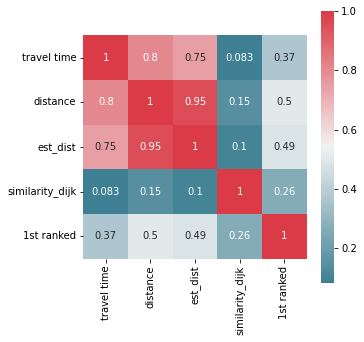

In [116]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(5,5))
corr = df22.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [118]:
x = np.array(df22[['est_dist','1st ranked']])
y = np.array(df22['travel time'])
x

array([[5.19876318e-01, 8.74831974e+02],
       [5.28590233e-01, 8.74831974e+02],
       [2.58285167e-01, 8.74831974e+02],
       ...,
       [3.30778598e-01, 8.74831974e+02],
       [5.98851504e-01, 8.74831974e+02],
       [1.65882755e-01, 8.74831974e+02]])

In [119]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [120]:
print(X_train.shape)
print(X_test.shape)
# X_train

(6525, 2)
(1632, 2)


In [121]:
# inputs: distance + hour + dominant road
model3_3_1 = nnmodel(50, num_hlayers=1,Epoch=500)
model3_3_1

Epoch 1/500
204/204 [==============================] - 0s 1ms/step - loss: 361317.2500 - mape: 58.5335 - rmse: 601.0967 - val_loss: 161839.5000 - val_mape: 49.1058 - val_rmse: 402.2928
Epoch 2/500
204/204 [==============================] - 0s 766us/step - loss: 144287.6094 - mape: 49.7920 - rmse: 379.8521 - val_loss: 161227.1562 - val_mape: 50.3375 - val_rmse: 401.5310
Epoch 3/500
204/204 [==============================] - 0s 750us/step - loss: 144212.9375 - mape: 49.8102 - rmse: 379.7538 - val_loss: 161190.6406 - val_mape: 50.3151 - val_rmse: 401.4855
Epoch 4/500
204/204 [==============================] - 0s 749us/step - loss: 144190.8594 - mape: 49.7784 - rmse: 379.7247 - val_loss: 161059.2969 - val_mape: 51.8826 - val_rmse: 401.3219
Epoch 5/500
204/204 [==============================] - 0s 758us/step - loss: 144237.4375 - mape: 49.9219 - rmse: 379.7860 - val_loss: 160967.0938 - val_mape: 51.3901 - val_rmse: 401.2070
Epoch 6/500
204/204 [==============================] - 0s 760us/ste

Epoch 45/500
204/204 [==============================] - 0s 761us/step - loss: 140046.7188 - mape: 49.1983 - rmse: 374.2281 - val_loss: 157600.5000 - val_mape: 47.8851 - val_rmse: 396.9893
Epoch 46/500
204/204 [==============================] - 0s 856us/step - loss: 140072.4375 - mape: 48.5898 - rmse: 374.2625 - val_loss: 156667.8750 - val_mape: 51.5205 - val_rmse: 395.8129
Epoch 47/500
204/204 [==============================] - 0s 870us/step - loss: 139786.5625 - mape: 48.9780 - rmse: 373.8804 - val_loss: 156343.6719 - val_mape: 51.1421 - val_rmse: 395.4032
Epoch 48/500
204/204 [==============================] - 0s 749us/step - loss: 139452.0625 - mape: 48.8950 - rmse: 373.4328 - val_loss: 156012.2188 - val_mape: 49.8906 - val_rmse: 394.9838
Epoch 49/500
204/204 [==============================] - 0s 747us/step - loss: 139288.3906 - mape: 48.7544 - rmse: 373.2136 - val_loss: 155740.4531 - val_mape: 50.0275 - val_rmse: 394.6396
Epoch 50/500
204/204 [==============================] - 0s 7

204/204 [==============================] - 0s 740us/step - loss: 89737.4062 - mape: 35.1998 - rmse: 299.5620 - val_loss: 106928.3359 - val_mape: 36.1547 - val_rmse: 326.9990
Epoch 132/500
204/204 [==============================] - 0s 737us/step - loss: 89733.0938 - mape: 35.2552 - rmse: 299.5548 - val_loss: 106772.9531 - val_mape: 34.6236 - val_rmse: 326.7613
Epoch 133/500
204/204 [==============================] - 0s 728us/step - loss: 89334.2422 - mape: 34.8432 - rmse: 298.8883 - val_loss: 106354.0391 - val_mape: 38.0733 - val_rmse: 326.1197
Epoch 134/500
204/204 [==============================] - 0s 744us/step - loss: 88702.0469 - mape: 34.8909 - rmse: 297.8289 - val_loss: 107067.1797 - val_mape: 32.6302 - val_rmse: 327.2112
Epoch 135/500
204/204 [==============================] - 0s 732us/step - loss: 87572.6016 - mape: 34.4222 - rmse: 295.9267 - val_loss: 104827.5781 - val_mape: 35.7878 - val_rmse: 323.7709
Epoch 136/500
204/204 [==============================] - 0s 746us/step - l

Epoch 175/500
204/204 [==============================] - 0s 755us/step - loss: 76116.2578 - mape: 28.9577 - rmse: 275.8918 - val_loss: 93986.7188 - val_mape: 28.1619 - val_rmse: 306.5725
Epoch 176/500
204/204 [==============================] - 0s 730us/step - loss: 76510.2812 - mape: 28.9129 - rmse: 276.6049 - val_loss: 94488.7812 - val_mape: 32.8887 - val_rmse: 307.3903
Epoch 177/500
204/204 [==============================] - 0s 747us/step - loss: 76492.7891 - mape: 29.1524 - rmse: 276.5733 - val_loss: 93496.6875 - val_mape: 28.5998 - val_rmse: 305.7723
Epoch 178/500
204/204 [==============================] - 0s 749us/step - loss: 76146.9922 - mape: 29.0231 - rmse: 275.9474 - val_loss: 93276.2734 - val_mape: 28.7770 - val_rmse: 305.4117
Epoch 179/500
204/204 [==============================] - 0s 746us/step - loss: 75724.7422 - mape: 28.7975 - rmse: 275.1813 - val_loss: 93711.1406 - val_mape: 32.5552 - val_rmse: 306.1227
Epoch 180/500
204/204 [==============================] - 0s 769us

Epoch 219/500
204/204 [==============================] - 0s 736us/step - loss: 73788.4531 - mape: 27.5985 - rmse: 271.6403 - val_loss: 91553.6250 - val_mape: 26.0281 - val_rmse: 302.5783
Epoch 220/500
204/204 [==============================] - 0s 739us/step - loss: 73952.4141 - mape: 27.6113 - rmse: 271.9419 - val_loss: 92137.1875 - val_mape: 25.8181 - val_rmse: 303.5411
Epoch 221/500
204/204 [==============================] - 0s 744us/step - loss: 73855.8516 - mape: 27.6728 - rmse: 271.7643 - val_loss: 90665.0000 - val_mape: 28.7877 - val_rmse: 301.1063
Epoch 222/500
204/204 [==============================] - 0s 746us/step - loss: 73932.6328 - mape: 27.7053 - rmse: 271.9055 - val_loss: 94755.3047 - val_mape: 26.1324 - val_rmse: 307.8235
Epoch 223/500
204/204 [==============================] - 0s 744us/step - loss: 73705.7422 - mape: 27.6885 - rmse: 271.4880 - val_loss: 93291.6953 - val_mape: 24.8327 - val_rmse: 305.4369
Epoch 224/500
204/204 [==============================] - 0s 752us

Epoch 263/500
204/204 [==============================] - 0s 759us/step - loss: 73694.9375 - mape: 27.5895 - rmse: 271.4681 - val_loss: 90340.7734 - val_mape: 26.0935 - val_rmse: 300.5674
Epoch 264/500
204/204 [==============================] - 0s 728us/step - loss: 73291.5469 - mape: 27.5719 - rmse: 270.7241 - val_loss: 89752.4531 - val_mape: 28.5544 - val_rmse: 299.5871
Epoch 265/500
204/204 [==============================] - 0s 743us/step - loss: 73400.1094 - mape: 27.5661 - rmse: 270.9246 - val_loss: 90230.0625 - val_mape: 30.3301 - val_rmse: 300.3832
Epoch 266/500
204/204 [==============================] - 0s 762us/step - loss: 73360.7188 - mape: 27.4954 - rmse: 270.8518 - val_loss: 89770.2578 - val_mape: 28.7788 - val_rmse: 299.6169
Epoch 267/500
204/204 [==============================] - 0s 819us/step - loss: 73400.6406 - mape: 27.4316 - rmse: 270.9255 - val_loss: 93086.7734 - val_mape: 24.6863 - val_rmse: 305.1013
Epoch 268/500
204/204 [==============================] - 0s 817us

Epoch 307/500
204/204 [==============================] - 0s 738us/step - loss: 73081.9453 - mape: 27.4524 - rmse: 270.3367 - val_loss: 89192.2812 - val_mape: 28.0257 - val_rmse: 298.6508
Epoch 308/500
204/204 [==============================] - 0s 747us/step - loss: 72667.4141 - mape: 27.3043 - rmse: 269.5689 - val_loss: 91192.5000 - val_mape: 25.8804 - val_rmse: 301.9810
Epoch 309/500
204/204 [==============================] - 0s 733us/step - loss: 72358.8516 - mape: 27.2815 - rmse: 268.9960 - val_loss: 91182.1250 - val_mape: 32.3808 - val_rmse: 301.9638
Epoch 310/500
204/204 [==============================] - 0s 749us/step - loss: 73476.7188 - mape: 27.7201 - rmse: 271.0659 - val_loss: 89439.5391 - val_mape: 28.1130 - val_rmse: 299.0645
Epoch 311/500
204/204 [==============================] - 0s 759us/step - loss: 72481.9844 - mape: 27.4555 - rmse: 269.2248 - val_loss: 90091.0000 - val_mape: 25.9921 - val_rmse: 300.1516
Epoch 312/500
204/204 [==============================] - 0s 747us

Epoch 351/500
204/204 [==============================] - 0s 743us/step - loss: 72592.4844 - mape: 27.2674 - rmse: 269.4299 - val_loss: 89153.3906 - val_mape: 29.7748 - val_rmse: 298.5857
Epoch 352/500
204/204 [==============================] - 0s 755us/step - loss: 73447.6719 - mape: 27.9009 - rmse: 271.0123 - val_loss: 88999.2578 - val_mape: 29.2535 - val_rmse: 298.3274
Epoch 353/500
204/204 [==============================] - 0s 745us/step - loss: 72581.9844 - mape: 27.5415 - rmse: 269.4104 - val_loss: 89880.5391 - val_mape: 30.0016 - val_rmse: 299.8008
Epoch 354/500
204/204 [==============================] - 0s 744us/step - loss: 72576.2578 - mape: 27.3188 - rmse: 269.3998 - val_loss: 89297.6406 - val_mape: 26.8471 - val_rmse: 298.8271
Epoch 355/500
204/204 [==============================] - 0s 739us/step - loss: 72231.6250 - mape: 27.4483 - rmse: 268.7594 - val_loss: 89864.0391 - val_mape: 25.7789 - val_rmse: 299.7733
Epoch 356/500
204/204 [==============================] - 0s 740us

Epoch 395/500
204/204 [==============================] - 0s 740us/step - loss: 72290.7734 - mape: 27.5743 - rmse: 268.8694 - val_loss: 89114.8047 - val_mape: 26.3732 - val_rmse: 298.5210
Epoch 396/500
204/204 [==============================] - 0s 749us/step - loss: 72490.1094 - mape: 27.4941 - rmse: 269.2399 - val_loss: 89194.7422 - val_mape: 30.3284 - val_rmse: 298.6549
Epoch 397/500
204/204 [==============================] - 0s 739us/step - loss: 72863.7578 - mape: 27.6836 - rmse: 269.9329 - val_loss: 89366.0469 - val_mape: 30.6929 - val_rmse: 298.9416
Epoch 398/500
204/204 [==============================] - 0s 754us/step - loss: 72825.3672 - mape: 27.9881 - rmse: 269.8618 - val_loss: 89459.8125 - val_mape: 30.2848 - val_rmse: 299.0983
Epoch 399/500
204/204 [==============================] - 0s 768us/step - loss: 72324.5781 - mape: 27.5470 - rmse: 268.9323 - val_loss: 94796.7266 - val_mape: 24.1336 - val_rmse: 307.8908
Epoch 400/500
204/204 [==============================] - 0s 744us

Epoch 439/500
204/204 [==============================] - 0s 823us/step - loss: 72210.0938 - mape: 27.7910 - rmse: 268.7194 - val_loss: 88690.1953 - val_mape: 27.6118 - val_rmse: 297.8090
Epoch 440/500
204/204 [==============================] - 0s 815us/step - loss: 72244.2266 - mape: 27.4918 - rmse: 268.7829 - val_loss: 88792.6094 - val_mape: 29.7827 - val_rmse: 297.9809
Epoch 441/500
204/204 [==============================] - 0s 832us/step - loss: 72322.3359 - mape: 27.6379 - rmse: 268.9281 - val_loss: 88788.1641 - val_mape: 27.4871 - val_rmse: 297.9734
Epoch 442/500
204/204 [==============================] - 0s 818us/step - loss: 72559.3516 - mape: 27.7187 - rmse: 269.3684 - val_loss: 91281.4766 - val_mape: 25.1324 - val_rmse: 302.1282
Epoch 443/500
204/204 [==============================] - 0s 831us/step - loss: 72838.3672 - mape: 27.8357 - rmse: 269.8858 - val_loss: 90060.1953 - val_mape: 25.9972 - val_rmse: 300.1003
Epoch 444/500
204/204 [==============================] - 0s 816us

Epoch 483/500
204/204 [==============================] - 0s 745us/step - loss: 73263.1797 - mape: 28.0259 - rmse: 270.6717 - val_loss: 89396.4219 - val_mape: 25.7013 - val_rmse: 298.9923
Epoch 484/500
204/204 [==============================] - 0s 775us/step - loss: 72335.7891 - mape: 27.5516 - rmse: 268.9531 - val_loss: 90820.4141 - val_mape: 26.1536 - val_rmse: 301.3643
Epoch 485/500
204/204 [==============================] - 0s 838us/step - loss: 72312.1562 - mape: 27.7802 - rmse: 268.9092 - val_loss: 89350.0469 - val_mape: 27.2964 - val_rmse: 298.9148
Epoch 486/500
204/204 [==============================] - 0s 759us/step - loss: 72402.8438 - mape: 27.8029 - rmse: 269.0778 - val_loss: 88880.4375 - val_mape: 26.4806 - val_rmse: 298.1282
Epoch 487/500
204/204 [==============================] - 0s 782us/step - loss: 72053.3594 - mape: 27.4653 - rmse: 268.4276 - val_loss: 88726.6875 - val_mape: 29.4443 - val_rmse: 297.8702
Epoch 488/500
204/204 [==============================] - 0s 792us

In [122]:
# inputs: distance + hour + dominant road
model3_3_2 = nnmodel(100, num_hlayers=1,Epoch=500)
model3_3_2

Epoch 1/500
204/204 [==============================] - 0s 1ms/step - loss: 196256.5000 - mape: 48.6408 - rmse: 443.0085 - val_loss: 161456.4844 - val_mape: 52.9173 - val_rmse: 401.8165
Epoch 2/500
204/204 [==============================] - 0s 759us/step - loss: 144397.8750 - mape: 50.0527 - rmse: 379.9972 - val_loss: 161069.2344 - val_mape: 51.1030 - val_rmse: 401.3343
Epoch 3/500
204/204 [==============================] - 0s 809us/step - loss: 144385.0156 - mape: 49.8296 - rmse: 379.9803 - val_loss: 161115.0938 - val_mape: 50.3083 - val_rmse: 401.3914
Epoch 4/500
204/204 [==============================] - 0s 742us/step - loss: 144288.7031 - mape: 50.0077 - rmse: 379.8535 - val_loss: 161407.7031 - val_mape: 49.3836 - val_rmse: 401.7558
Epoch 5/500
204/204 [==============================] - 0s 748us/step - loss: 144212.5938 - mape: 49.7796 - rmse: 379.7533 - val_loss: 160891.0156 - val_mape: 52.0144 - val_rmse: 401.1122
Epoch 6/500
204/204 [==============================] - 0s 760us/ste

Epoch 45/500
204/204 [==============================] - 0s 794us/step - loss: 133423.5469 - mape: 47.6692 - rmse: 365.2719 - val_loss: 151230.4688 - val_mape: 45.3900 - val_rmse: 388.8836
Epoch 46/500
204/204 [==============================] - 0s 782us/step - loss: 132936.7031 - mape: 46.9478 - rmse: 364.6049 - val_loss: 148894.2656 - val_mape: 47.8351 - val_rmse: 385.8682
Epoch 47/500
204/204 [==============================] - 0s 812us/step - loss: 131965.2969 - mape: 46.9709 - rmse: 363.2703 - val_loss: 149681.3281 - val_mape: 52.0790 - val_rmse: 386.8867
Epoch 48/500
204/204 [==============================] - 0s 836us/step - loss: 131357.1875 - mape: 46.8960 - rmse: 362.4323 - val_loss: 147444.0312 - val_mape: 49.3824 - val_rmse: 383.9844
Epoch 49/500
204/204 [==============================] - 0s 816us/step - loss: 130126.7734 - mape: 46.8022 - rmse: 360.7309 - val_loss: 151837.4688 - val_mape: 42.4180 - val_rmse: 389.6633
Epoch 50/500
204/204 [==============================] - 0s 7

Epoch 89/500
204/204 [==============================] - 0s 763us/step - loss: 87546.6562 - mape: 34.3079 - rmse: 295.8828 - val_loss: 107845.7266 - val_mape: 30.9295 - val_rmse: 328.3987
Epoch 90/500
204/204 [==============================] - 0s 835us/step - loss: 87577.7109 - mape: 34.2721 - rmse: 295.9353 - val_loss: 103920.8203 - val_mape: 33.2384 - val_rmse: 322.3675
Epoch 91/500
204/204 [==============================] - 0s 737us/step - loss: 85962.8281 - mape: 33.7166 - rmse: 293.1942 - val_loss: 106055.0703 - val_mape: 30.4663 - val_rmse: 325.6610
Epoch 92/500
204/204 [==============================] - 0s 740us/step - loss: 85038.0625 - mape: 33.3527 - rmse: 291.6129 - val_loss: 103914.4688 - val_mape: 31.0396 - val_rmse: 322.3577
Epoch 93/500
204/204 [==============================] - 0s 744us/step - loss: 84969.3984 - mape: 33.1216 - rmse: 291.4951 - val_loss: 102215.7656 - val_mape: 36.8981 - val_rmse: 319.7120
Epoch 94/500
204/204 [==============================] - 0s 744us/

Epoch 133/500
204/204 [==============================] - 0s 744us/step - loss: 74348.4141 - mape: 27.8867 - rmse: 272.6691 - val_loss: 92304.0391 - val_mape: 26.2261 - val_rmse: 303.8158
Epoch 134/500
204/204 [==============================] - 0s 724us/step - loss: 74785.0156 - mape: 28.2962 - rmse: 273.4685 - val_loss: 91662.7656 - val_mape: 27.2181 - val_rmse: 302.7586
Epoch 135/500
204/204 [==============================] - 0s 747us/step - loss: 74551.8438 - mape: 27.9253 - rmse: 273.0418 - val_loss: 94653.5859 - val_mape: 24.8535 - val_rmse: 307.6582
Epoch 136/500
204/204 [==============================] - 0s 735us/step - loss: 75374.5859 - mape: 28.1346 - rmse: 274.5443 - val_loss: 91507.8516 - val_mape: 27.0194 - val_rmse: 302.5027
Epoch 137/500
204/204 [==============================] - 0s 744us/step - loss: 74471.1719 - mape: 27.3236 - rmse: 272.8941 - val_loss: 100963.8203 - val_mape: 38.5063 - val_rmse: 317.7480
Epoch 138/500
204/204 [==============================] - 0s 749u

Epoch 177/500
204/204 [==============================] - 0s 745us/step - loss: 73907.1953 - mape: 27.9121 - rmse: 271.8588 - val_loss: 92363.1641 - val_mape: 24.8737 - val_rmse: 303.9131
Epoch 178/500
204/204 [==============================] - 0s 744us/step - loss: 72965.9688 - mape: 27.6281 - rmse: 270.1221 - val_loss: 89687.8516 - val_mape: 27.2525 - val_rmse: 299.4793
Epoch 179/500
204/204 [==============================] - 0s 736us/step - loss: 73347.3672 - mape: 27.2645 - rmse: 270.8272 - val_loss: 89920.3125 - val_mape: 29.9498 - val_rmse: 299.8672
Epoch 180/500
204/204 [==============================] - 0s 779us/step - loss: 73619.4062 - mape: 27.8082 - rmse: 271.3289 - val_loss: 89777.9531 - val_mape: 29.0866 - val_rmse: 299.6297
Epoch 181/500
204/204 [==============================] - 0s 845us/step - loss: 73133.4922 - mape: 27.6831 - rmse: 270.4320 - val_loss: 89921.6562 - val_mape: 27.2871 - val_rmse: 299.8694
Epoch 182/500
204/204 [==============================] - 0s 739us

Epoch 221/500
204/204 [==============================] - 0s 756us/step - loss: 72945.5312 - mape: 27.6187 - rmse: 270.0843 - val_loss: 88893.4141 - val_mape: 28.9108 - val_rmse: 298.1500
Epoch 222/500
204/204 [==============================] - 0s 749us/step - loss: 72763.3906 - mape: 27.9500 - rmse: 269.7469 - val_loss: 90548.8203 - val_mape: 25.4696 - val_rmse: 300.9133
Epoch 223/500
204/204 [==============================] - 0s 751us/step - loss: 72961.8750 - mape: 27.9629 - rmse: 270.1146 - val_loss: 89049.0859 - val_mape: 28.5168 - val_rmse: 298.4109
Epoch 224/500
204/204 [==============================] - 0s 741us/step - loss: 72860.4766 - mape: 27.6236 - rmse: 269.9268 - val_loss: 89599.0391 - val_mape: 27.9582 - val_rmse: 299.3310
Epoch 225/500
204/204 [==============================] - 0s 739us/step - loss: 73034.9922 - mape: 27.5899 - rmse: 270.2499 - val_loss: 88941.7734 - val_mape: 27.6966 - val_rmse: 298.2311
Epoch 226/500
204/204 [==============================] - 0s 751us

Epoch 265/500
204/204 [==============================] - 0s 734us/step - loss: 72605.4219 - mape: 28.0789 - rmse: 269.4539 - val_loss: 90029.8984 - val_mape: 32.3034 - val_rmse: 300.0498
Epoch 266/500
204/204 [==============================] - 0s 747us/step - loss: 72673.7578 - mape: 27.9192 - rmse: 269.5807 - val_loss: 89321.4531 - val_mape: 29.7785 - val_rmse: 298.8669
Epoch 267/500
204/204 [==============================] - 0s 857us/step - loss: 73199.4453 - mape: 28.3440 - rmse: 270.5540 - val_loss: 90365.4375 - val_mape: 25.2133 - val_rmse: 300.6085
Epoch 268/500
204/204 [==============================] - 0s 821us/step - loss: 73286.8984 - mape: 28.1803 - rmse: 270.7155 - val_loss: 90946.3516 - val_mape: 26.8106 - val_rmse: 301.5731
Epoch 269/500
204/204 [==============================] - 0s 739us/step - loss: 72349.8359 - mape: 27.8460 - rmse: 268.9792 - val_loss: 90401.7422 - val_mape: 32.5111 - val_rmse: 300.6688
Epoch 270/500
204/204 [==============================] - 0s 749us

Epoch 309/500
204/204 [==============================] - 0s 827us/step - loss: 72782.9531 - mape: 28.1912 - rmse: 269.7832 - val_loss: 88619.5234 - val_mape: 27.4665 - val_rmse: 297.6903
Epoch 310/500
204/204 [==============================] - 0s 823us/step - loss: 72474.0781 - mape: 28.0740 - rmse: 269.2101 - val_loss: 89687.4922 - val_mape: 31.8048 - val_rmse: 299.4787
Epoch 311/500
204/204 [==============================] - 0s 823us/step - loss: 72747.2969 - mape: 27.9815 - rmse: 269.7171 - val_loss: 88399.5781 - val_mape: 27.4993 - val_rmse: 297.3207
Epoch 312/500
204/204 [==============================] - 0s 824us/step - loss: 72617.9609 - mape: 28.0965 - rmse: 269.4772 - val_loss: 88984.9609 - val_mape: 29.8389 - val_rmse: 298.3035
Epoch 313/500
204/204 [==============================] - 0s 816us/step - loss: 72623.6406 - mape: 28.3561 - rmse: 269.4877 - val_loss: 88839.2734 - val_mape: 26.4612 - val_rmse: 298.0592
Epoch 314/500
204/204 [==============================] - 0s 813us

Epoch 353/500
204/204 [==============================] - 0s 755us/step - loss: 72639.6875 - mape: 27.8544 - rmse: 269.5175 - val_loss: 88778.1641 - val_mape: 27.7599 - val_rmse: 297.9566
Epoch 354/500
204/204 [==============================] - 0s 772us/step - loss: 72776.9609 - mape: 28.1630 - rmse: 269.7721 - val_loss: 88159.0312 - val_mape: 28.8023 - val_rmse: 296.9159
Epoch 355/500
204/204 [==============================] - 0s 753us/step - loss: 72334.3984 - mape: 27.8996 - rmse: 268.9506 - val_loss: 88328.7734 - val_mape: 28.5912 - val_rmse: 297.2016
Epoch 356/500
204/204 [==============================] - 0s 770us/step - loss: 73181.7031 - mape: 28.2414 - rmse: 270.5212 - val_loss: 89024.4766 - val_mape: 26.8200 - val_rmse: 298.3697
Epoch 357/500
204/204 [==============================] - 0s 729us/step - loss: 72436.7031 - mape: 27.9751 - rmse: 269.1407 - val_loss: 88215.0078 - val_mape: 29.1620 - val_rmse: 297.0101
Epoch 358/500
204/204 [==============================] - 0s 744us

Epoch 397/500
204/204 [==============================] - 0s 744us/step - loss: 72736.4844 - mape: 28.0665 - rmse: 269.6970 - val_loss: 88671.1094 - val_mape: 27.7361 - val_rmse: 297.7769
Epoch 398/500
204/204 [==============================] - 0s 729us/step - loss: 72553.0156 - mape: 28.1378 - rmse: 269.3567 - val_loss: 88451.7422 - val_mape: 28.9902 - val_rmse: 297.4084
Epoch 399/500
204/204 [==============================] - 0s 749us/step - loss: 72283.4844 - mape: 28.0541 - rmse: 268.8559 - val_loss: 89013.4688 - val_mape: 26.4088 - val_rmse: 298.3513
Epoch 400/500
204/204 [==============================] - 0s 745us/step - loss: 72595.9531 - mape: 28.0910 - rmse: 269.4364 - val_loss: 88133.6953 - val_mape: 29.1511 - val_rmse: 296.8732
Epoch 401/500
204/204 [==============================] - 0s 767us/step - loss: 72229.9219 - mape: 27.9861 - rmse: 268.7563 - val_loss: 88460.2344 - val_mape: 28.8695 - val_rmse: 297.4226
Epoch 402/500
204/204 [==============================] - 0s 752us

Epoch 441/500
204/204 [==============================] - 0s 743us/step - loss: 72984.9219 - mape: 28.1074 - rmse: 270.1572 - val_loss: 88646.1953 - val_mape: 29.5565 - val_rmse: 297.7351
Epoch 442/500
204/204 [==============================] - 0s 758us/step - loss: 72129.4297 - mape: 28.1508 - rmse: 268.5692 - val_loss: 88219.0391 - val_mape: 28.3072 - val_rmse: 297.0169
Epoch 443/500
204/204 [==============================] - 0s 740us/step - loss: 72246.6641 - mape: 27.9139 - rmse: 268.7874 - val_loss: 88378.2969 - val_mape: 29.6938 - val_rmse: 297.2849
Epoch 444/500
204/204 [==============================] - 0s 749us/step - loss: 72899.4609 - mape: 28.3651 - rmse: 269.9990 - val_loss: 89774.0234 - val_mape: 25.5927 - val_rmse: 299.6231
Epoch 445/500
204/204 [==============================] - 0s 753us/step - loss: 72451.7500 - mape: 28.0779 - rmse: 269.1686 - val_loss: 90412.3828 - val_mape: 26.4261 - val_rmse: 300.6865
Epoch 446/500
204/204 [==============================] - 0s 759us

Epoch 485/500
204/204 [==============================] - 0s 740us/step - loss: 72201.8750 - mape: 27.8433 - rmse: 268.7041 - val_loss: 88488.1953 - val_mape: 28.3744 - val_rmse: 297.4697
Epoch 486/500
204/204 [==============================] - 0s 749us/step - loss: 73304.7422 - mape: 28.5386 - rmse: 270.7485 - val_loss: 88189.4375 - val_mape: 29.2643 - val_rmse: 296.9671
Epoch 487/500
204/204 [==============================] - 0s 759us/step - loss: 72580.7344 - mape: 28.2184 - rmse: 269.4081 - val_loss: 88128.1484 - val_mape: 28.5152 - val_rmse: 296.8639
Epoch 488/500
204/204 [==============================] - 0s 748us/step - loss: 72073.0234 - mape: 28.0035 - rmse: 268.4642 - val_loss: 88630.9766 - val_mape: 27.4154 - val_rmse: 297.7096
Epoch 489/500
204/204 [==============================] - 0s 742us/step - loss: 72824.8516 - mape: 28.1648 - rmse: 269.8608 - val_loss: 88491.9922 - val_mape: 26.9565 - val_rmse: 297.4760
Epoch 490/500
204/204 [==============================] - 0s 749us

In [123]:
# inputs: distance + hour + dominant road
model3_3_3 = nnmodel(300, num_hlayers=1,Epoch=500)
model3_3_3

Epoch 1/500
204/204 [==============================] - 0s 1ms/step - loss: 193165.6719 - mape: 50.9788 - rmse: 439.5062 - val_loss: 161203.5938 - val_mape: 52.3114 - val_rmse: 401.5017
Epoch 2/500
204/204 [==============================] - 0s 818us/step - loss: 144559.0938 - mape: 49.7355 - rmse: 380.2093 - val_loss: 160964.0156 - val_mape: 50.9053 - val_rmse: 401.2032
Epoch 3/500
204/204 [==============================] - 0s 799us/step - loss: 144549.3750 - mape: 50.0574 - rmse: 380.1965 - val_loss: 160969.2969 - val_mape: 50.1521 - val_rmse: 401.2098
Epoch 4/500
204/204 [==============================] - 0s 795us/step - loss: 144371.0000 - mape: 49.9255 - rmse: 379.9619 - val_loss: 160655.3750 - val_mape: 51.2412 - val_rmse: 400.8184
Epoch 5/500
204/204 [==============================] - 0s 805us/step - loss: 144353.6094 - mape: 49.5893 - rmse: 379.9390 - val_loss: 160587.5312 - val_mape: 50.3693 - val_rmse: 400.7337
Epoch 6/500
204/204 [==============================] - 0s 830us/ste

Epoch 45/500
204/204 [==============================] - 0s 810us/step - loss: 99170.8203 - mape: 38.0702 - rmse: 314.9140 - val_loss: 117840.7422 - val_mape: 44.8905 - val_rmse: 343.2794
Epoch 46/500
204/204 [==============================] - 0s 790us/step - loss: 97703.9531 - mape: 37.7593 - rmse: 312.5763 - val_loss: 112783.1953 - val_mape: 40.3351 - val_rmse: 335.8321
Epoch 47/500
204/204 [==============================] - 0s 802us/step - loss: 96319.0703 - mape: 37.0624 - rmse: 310.3531 - val_loss: 117671.2578 - val_mape: 31.9481 - val_rmse: 343.0324
Epoch 48/500
204/204 [==============================] - 0s 793us/step - loss: 93202.8594 - mape: 36.3361 - rmse: 305.2914 - val_loss: 109366.7266 - val_mape: 38.5496 - val_rmse: 330.7064
Epoch 49/500
204/204 [==============================] - 0s 787us/step - loss: 91826.6406 - mape: 35.8413 - rmse: 303.0291 - val_loss: 108130.5000 - val_mape: 34.8256 - val_rmse: 328.8320
Epoch 50/500
204/204 [==============================] - 0s 800us/

Epoch 89/500
204/204 [==============================] - 0s 795us/step - loss: 76653.4844 - mape: 28.0343 - rmse: 276.8636 - val_loss: 92056.2344 - val_mape: 30.8452 - val_rmse: 303.4077
Epoch 90/500
204/204 [==============================] - 0s 783us/step - loss: 74874.7734 - mape: 27.4019 - rmse: 273.6325 - val_loss: 94251.8594 - val_mape: 24.2167 - val_rmse: 307.0047
Epoch 91/500
204/204 [==============================] - 0s 785us/step - loss: 76558.7109 - mape: 28.0614 - rmse: 276.6924 - val_loss: 91379.6797 - val_mape: 26.9509 - val_rmse: 302.2907
Epoch 92/500
204/204 [==============================] - 0s 806us/step - loss: 75120.7500 - mape: 27.3895 - rmse: 274.0816 - val_loss: 92060.0703 - val_mape: 25.7655 - val_rmse: 303.4140
Epoch 93/500
204/204 [==============================] - 0s 852us/step - loss: 74893.9531 - mape: 27.2677 - rmse: 273.6676 - val_loss: 91276.7266 - val_mape: 27.0999 - val_rmse: 302.1204
Epoch 94/500
204/204 [==============================] - 0s 803us/step 

Epoch 133/500
204/204 [==============================] - 0s 792us/step - loss: 74375.7891 - mape: 27.9643 - rmse: 272.7192 - val_loss: 91309.0859 - val_mape: 25.2136 - val_rmse: 302.1739
Epoch 134/500
204/204 [==============================] - 0s 797us/step - loss: 75403.1250 - mape: 27.8163 - rmse: 274.5963 - val_loss: 93023.8984 - val_mape: 24.3197 - val_rmse: 304.9982
Epoch 135/500
204/204 [==============================] - 0s 787us/step - loss: 75700.1562 - mape: 27.7512 - rmse: 275.1366 - val_loss: 89992.9766 - val_mape: 27.3511 - val_rmse: 299.9883
Epoch 136/500
204/204 [==============================] - 0s 798us/step - loss: 74554.8047 - mape: 27.7223 - rmse: 273.0473 - val_loss: 92257.3359 - val_mape: 24.5556 - val_rmse: 303.7389
Epoch 137/500
204/204 [==============================] - 0s 801us/step - loss: 73655.1641 - mape: 27.5937 - rmse: 271.3948 - val_loss: 92295.2422 - val_mape: 33.1044 - val_rmse: 303.8013
Epoch 138/500
204/204 [==============================] - 0s 801us

Epoch 177/500
204/204 [==============================] - 0s 807us/step - loss: 74811.4062 - mape: 27.8124 - rmse: 273.5167 - val_loss: 91605.0078 - val_mape: 25.1138 - val_rmse: 302.6632
Epoch 178/500
204/204 [==============================] - 0s 797us/step - loss: 74867.6484 - mape: 27.8766 - rmse: 273.6195 - val_loss: 89957.8984 - val_mape: 28.3058 - val_rmse: 299.9298
Epoch 179/500
204/204 [==============================] - 0s 793us/step - loss: 74647.8906 - mape: 27.9960 - rmse: 273.2177 - val_loss: 93758.2734 - val_mape: 23.5207 - val_rmse: 306.1997
Epoch 180/500
204/204 [==============================] - 0s 796us/step - loss: 74090.0859 - mape: 27.7013 - rmse: 272.1949 - val_loss: 91383.1406 - val_mape: 24.8454 - val_rmse: 302.2964
Epoch 181/500
204/204 [==============================] - 0s 791us/step - loss: 73709.7422 - mape: 27.4490 - rmse: 271.4954 - val_loss: 89818.7266 - val_mape: 26.4172 - val_rmse: 299.6977
Epoch 182/500
204/204 [==============================] - 0s 794us

Epoch 221/500
204/204 [==============================] - 0s 807us/step - loss: 73971.2109 - mape: 27.4578 - rmse: 271.9765 - val_loss: 89681.3984 - val_mape: 29.6729 - val_rmse: 299.4685
Epoch 222/500
204/204 [==============================] - 0s 808us/step - loss: 74314.8359 - mape: 27.8283 - rmse: 272.6075 - val_loss: 93743.2578 - val_mape: 34.8002 - val_rmse: 306.1752
Epoch 223/500
204/204 [==============================] - 0s 797us/step - loss: 73872.7500 - mape: 27.6208 - rmse: 271.7954 - val_loss: 93861.0312 - val_mape: 34.9134 - val_rmse: 306.3675
Epoch 224/500
204/204 [==============================] - 0s 803us/step - loss: 74015.2656 - mape: 27.4929 - rmse: 272.0575 - val_loss: 91399.8438 - val_mape: 32.5588 - val_rmse: 302.3241
Epoch 225/500
204/204 [==============================] - 0s 830us/step - loss: 74965.0938 - mape: 28.1355 - rmse: 273.7975 - val_loss: 89405.6484 - val_mape: 28.2254 - val_rmse: 299.0078
Epoch 226/500
204/204 [==============================] - 0s 791us

Epoch 265/500
204/204 [==============================] - 0s 815us/step - loss: 74108.7891 - mape: 27.8767 - rmse: 272.2293 - val_loss: 92352.3359 - val_mape: 24.1658 - val_rmse: 303.8953
Epoch 266/500
204/204 [==============================] - 0s 829us/step - loss: 73672.0234 - mape: 27.6523 - rmse: 271.4259 - val_loss: 95637.4141 - val_mape: 23.0670 - val_rmse: 309.2530
Epoch 267/500
204/204 [==============================] - 0s 880us/step - loss: 74410.5312 - mape: 27.7737 - rmse: 272.7829 - val_loss: 95969.7812 - val_mape: 23.1401 - val_rmse: 309.7899
Epoch 268/500
204/204 [==============================] - 0s 822us/step - loss: 74922.8438 - mape: 27.9349 - rmse: 273.7204 - val_loss: 92610.1484 - val_mape: 34.1864 - val_rmse: 304.3192
Epoch 269/500
204/204 [==============================] - 0s 788us/step - loss: 74278.9922 - mape: 27.7545 - rmse: 272.5417 - val_loss: 89922.4375 - val_mape: 30.5166 - val_rmse: 299.8707
Epoch 270/500
204/204 [==============================] - 0s 836us

Epoch 309/500
204/204 [==============================] - 0s 792us/step - loss: 74461.0938 - mape: 27.6678 - rmse: 272.8756 - val_loss: 93401.2812 - val_mape: 34.8409 - val_rmse: 305.6162
Epoch 310/500
204/204 [==============================] - 0s 796us/step - loss: 74595.7031 - mape: 27.9191 - rmse: 273.1221 - val_loss: 89699.2578 - val_mape: 29.8528 - val_rmse: 299.4984
Epoch 311/500
204/204 [==============================] - 0s 781us/step - loss: 74114.9844 - mape: 27.7014 - rmse: 272.2407 - val_loss: 90115.7969 - val_mape: 30.8581 - val_rmse: 300.1929
Epoch 312/500
204/204 [==============================] - 0s 806us/step - loss: 74031.0156 - mape: 27.7471 - rmse: 272.0864 - val_loss: 90560.5078 - val_mape: 31.6277 - val_rmse: 300.9327
Epoch 313/500
204/204 [==============================] - 0s 848us/step - loss: 73853.4375 - mape: 27.6611 - rmse: 271.7599 - val_loss: 90809.5859 - val_mape: 31.9951 - val_rmse: 301.3463
Epoch 314/500
204/204 [==============================] - 0s 872us

Epoch 353/500
204/204 [==============================] - 0s 842us/step - loss: 75139.0234 - mape: 28.2690 - rmse: 274.1150 - val_loss: 97261.7266 - val_mape: 22.6396 - val_rmse: 311.8681
Epoch 354/500
204/204 [==============================] - 0s 869us/step - loss: 74478.7188 - mape: 27.8229 - rmse: 272.9079 - val_loss: 89606.5312 - val_mape: 29.5351 - val_rmse: 299.3435
Epoch 355/500
204/204 [==============================] - 0s 847us/step - loss: 73655.7578 - mape: 27.7045 - rmse: 271.3959 - val_loss: 89481.2969 - val_mape: 27.8949 - val_rmse: 299.1342
Epoch 356/500
204/204 [==============================] - 0s 848us/step - loss: 75175.2891 - mape: 28.1417 - rmse: 274.1811 - val_loss: 90156.1172 - val_mape: 30.9442 - val_rmse: 300.2601
Epoch 357/500
204/204 [==============================] - 0s 857us/step - loss: 74072.0469 - mape: 27.9557 - rmse: 272.1618 - val_loss: 90822.3594 - val_mape: 32.0394 - val_rmse: 301.3675
Epoch 358/500
204/204 [==============================] - 0s 809us

Epoch 397/500
204/204 [==============================] - 0s 837us/step - loss: 73815.4297 - mape: 27.6738 - rmse: 271.6899 - val_loss: 105051.2188 - val_mape: 22.0853 - val_rmse: 324.1161
Epoch 398/500
204/204 [==============================] - 0s 842us/step - loss: 74413.6250 - mape: 27.9281 - rmse: 272.7886 - val_loss: 89477.2969 - val_mape: 28.8747 - val_rmse: 299.1276
Epoch 399/500
204/204 [==============================] - 0s 846us/step - loss: 75172.9219 - mape: 28.0702 - rmse: 274.1768 - val_loss: 91570.8516 - val_mape: 24.7386 - val_rmse: 302.6068
Epoch 400/500
204/204 [==============================] - 0s 852us/step - loss: 74319.8047 - mape: 27.7263 - rmse: 272.6166 - val_loss: 89590.1797 - val_mape: 29.4800 - val_rmse: 299.3162
Epoch 401/500
204/204 [==============================] - 0s 862us/step - loss: 74264.2031 - mape: 27.8278 - rmse: 272.5146 - val_loss: 90954.2344 - val_mape: 32.2129 - val_rmse: 301.5862
Epoch 402/500
204/204 [==============================] - 0s 854u

Epoch 441/500
204/204 [==============================] - 0s 790us/step - loss: 74275.0859 - mape: 27.8011 - rmse: 272.5345 - val_loss: 91511.4609 - val_mape: 24.7317 - val_rmse: 302.5086
Epoch 442/500
204/204 [==============================] - 0s 787us/step - loss: 73895.6797 - mape: 27.5581 - rmse: 271.8376 - val_loss: 91588.7031 - val_mape: 32.9946 - val_rmse: 302.6363
Epoch 443/500
204/204 [==============================] - 0s 791us/step - loss: 75625.2109 - mape: 28.3968 - rmse: 275.0004 - val_loss: 90224.6250 - val_mape: 26.0240 - val_rmse: 300.3741
Epoch 444/500
204/204 [==============================] - 0s 785us/step - loss: 74440.3047 - mape: 28.0410 - rmse: 272.8375 - val_loss: 90087.9688 - val_mape: 30.8339 - val_rmse: 300.1466
Epoch 445/500
204/204 [==============================] - 0s 797us/step - loss: 73848.8516 - mape: 27.8363 - rmse: 271.7515 - val_loss: 89778.1406 - val_mape: 30.1125 - val_rmse: 299.6300
Epoch 446/500
204/204 [==============================] - 0s 832us

Epoch 485/500
204/204 [==============================] - 0s 796us/step - loss: 74950.5625 - mape: 28.0236 - rmse: 273.7710 - val_loss: 89566.6406 - val_mape: 29.4060 - val_rmse: 299.2769
Epoch 486/500
204/204 [==============================] - 0s 794us/step - loss: 73477.3672 - mape: 27.6339 - rmse: 271.0671 - val_loss: 91582.4922 - val_mape: 24.7172 - val_rmse: 302.6260
Epoch 487/500
204/204 [==============================] - 0s 800us/step - loss: 74527.3672 - mape: 27.8524 - rmse: 272.9970 - val_loss: 93910.3906 - val_mape: 23.5282 - val_rmse: 306.4480
Epoch 488/500
204/204 [==============================] - 0s 806us/step - loss: 73763.2500 - mape: 27.5564 - rmse: 271.5939 - val_loss: 90039.0078 - val_mape: 30.7231 - val_rmse: 300.0650
Epoch 489/500
204/204 [==============================] - 0s 833us/step - loss: 74526.3828 - mape: 28.0099 - rmse: 272.9952 - val_loss: 89717.3438 - val_mape: 29.9382 - val_rmse: 299.5285
Epoch 490/500
204/204 [==============================] - 0s 795us

In [124]:
# inputs: distance + hour + dominant road
model3_3_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model3_3_4

Epoch 1/500
204/204 [==============================] - 0s 1ms/step - loss: 180758.1719 - mape: 51.7983 - rmse: 425.1566 - val_loss: 161120.0938 - val_mape: 51.3841 - val_rmse: 401.3977
Epoch 2/500
204/204 [==============================] - 0s 841us/step - loss: 144783.2344 - mape: 50.0172 - rmse: 380.5039 - val_loss: 162615.3281 - val_mape: 48.0670 - val_rmse: 403.2559
Epoch 3/500
204/204 [==============================] - 0s 826us/step - loss: 144578.1250 - mape: 49.7122 - rmse: 380.2343 - val_loss: 160965.7188 - val_mape: 51.5827 - val_rmse: 401.2053
Epoch 4/500
204/204 [==============================] - 0s 829us/step - loss: 144428.0625 - mape: 49.9609 - rmse: 380.0369 - val_loss: 160869.8125 - val_mape: 51.1692 - val_rmse: 401.0858
Epoch 5/500
204/204 [==============================] - 0s 828us/step - loss: 144818.6094 - mape: 49.8605 - rmse: 380.5504 - val_loss: 161436.4219 - val_mape: 49.1135 - val_rmse: 401.7915
Epoch 6/500
204/204 [==============================] - 0s 827us/ste

Epoch 45/500
204/204 [==============================] - 0s 813us/step - loss: 77513.2031 - mape: 28.4629 - rmse: 278.4119 - val_loss: 96881.8594 - val_mape: 34.1057 - val_rmse: 311.2585
Epoch 46/500
204/204 [==============================] - 0s 813us/step - loss: 77511.8438 - mape: 28.5098 - rmse: 278.4095 - val_loss: 94309.3203 - val_mape: 26.6607 - val_rmse: 307.0982
Epoch 47/500
204/204 [==============================] - 0s 811us/step - loss: 76379.0938 - mape: 27.8811 - rmse: 276.3677 - val_loss: 94299.7578 - val_mape: 25.9362 - val_rmse: 307.0826
Epoch 48/500
204/204 [==============================] - 0s 827us/step - loss: 77136.6953 - mape: 28.2062 - rmse: 277.7349 - val_loss: 93394.1953 - val_mape: 31.9131 - val_rmse: 305.6046
Epoch 49/500
204/204 [==============================] - 0s 828us/step - loss: 76579.2578 - mape: 28.0449 - rmse: 276.7296 - val_loss: 97472.3516 - val_mape: 25.1919 - val_rmse: 312.2056
Epoch 50/500
204/204 [==============================] - 0s 821us/step 

204/204 [==============================] - 0s 843us/step - loss: 75796.2578 - mape: 28.0715 - rmse: 275.3112 - val_loss: 91797.5000 - val_mape: 25.4439 - val_rmse: 302.9810
Epoch 90/500
204/204 [==============================] - 0s 833us/step - loss: 75452.5703 - mape: 27.7184 - rmse: 274.6863 - val_loss: 90174.7734 - val_mape: 28.9463 - val_rmse: 300.2911
Epoch 91/500
204/204 [==============================] - 0s 813us/step - loss: 74349.7422 - mape: 27.5153 - rmse: 272.6715 - val_loss: 90601.2188 - val_mape: 25.7787 - val_rmse: 301.0004
Epoch 92/500
204/204 [==============================] - 0s 825us/step - loss: 74901.6016 - mape: 27.6351 - rmse: 273.6816 - val_loss: 90084.7656 - val_mape: 28.4150 - val_rmse: 300.1412
Epoch 93/500
204/204 [==============================] - 0s 822us/step - loss: 74387.8750 - mape: 27.3599 - rmse: 272.7414 - val_loss: 90748.4141 - val_mape: 26.4694 - val_rmse: 301.2448
Epoch 94/500
204/204 [==============================] - 0s 807us/step - loss: 77386

Epoch 133/500
204/204 [==============================] - 0s 847us/step - loss: 74103.3828 - mape: 27.8258 - rmse: 272.2194 - val_loss: 91155.2812 - val_mape: 26.2506 - val_rmse: 301.9193
Epoch 134/500
204/204 [==============================] - 0s 844us/step - loss: 74939.7500 - mape: 27.9369 - rmse: 273.7513 - val_loss: 101090.2344 - val_mape: 39.9624 - val_rmse: 317.9469
Epoch 135/500
204/204 [==============================] - 0s 829us/step - loss: 75492.2109 - mape: 28.2736 - rmse: 274.7585 - val_loss: 90660.9922 - val_mape: 31.8416 - val_rmse: 301.0996
Epoch 136/500
204/204 [==============================] - 0s 813us/step - loss: 74990.8281 - mape: 27.8967 - rmse: 273.8445 - val_loss: 89874.9688 - val_mape: 29.2955 - val_rmse: 299.7915
Epoch 137/500
204/204 [==============================] - 0s 813us/step - loss: 74149.0312 - mape: 27.9740 - rmse: 272.3032 - val_loss: 89765.7578 - val_mape: 30.4705 - val_rmse: 299.6093
Epoch 138/500
204/204 [==============================] - 0s 813u

Epoch 177/500
204/204 [==============================] - 0s 826us/step - loss: 74186.1875 - mape: 28.1337 - rmse: 272.3714 - val_loss: 93816.0078 - val_mape: 36.2166 - val_rmse: 306.2940
Epoch 178/500
204/204 [==============================] - 0s 819us/step - loss: 74693.2031 - mape: 28.5719 - rmse: 273.3006 - val_loss: 94596.2812 - val_mape: 24.1887 - val_rmse: 307.5651
Epoch 179/500
204/204 [==============================] - 0s 824us/step - loss: 75001.2188 - mape: 28.5470 - rmse: 273.8635 - val_loss: 89032.1953 - val_mape: 29.0898 - val_rmse: 298.3826
Epoch 180/500
204/204 [==============================] - 0s 810us/step - loss: 73581.4453 - mape: 28.2624 - rmse: 271.2590 - val_loss: 91520.8203 - val_mape: 25.3606 - val_rmse: 302.5241
Epoch 181/500
204/204 [==============================] - 0s 810us/step - loss: 75659.1250 - mape: 28.6362 - rmse: 275.0620 - val_loss: 89282.4766 - val_mape: 26.9237 - val_rmse: 298.8017
Epoch 182/500
204/204 [==============================] - 0s 827us

Epoch 221/500
204/204 [==============================] - 0s 817us/step - loss: 74037.6328 - mape: 28.0018 - rmse: 272.0986 - val_loss: 91654.5469 - val_mape: 33.5684 - val_rmse: 302.7450
Epoch 222/500
204/204 [==============================] - 0s 814us/step - loss: 73298.5469 - mape: 27.7816 - rmse: 270.7370 - val_loss: 94744.2656 - val_mape: 36.4284 - val_rmse: 307.8056
Epoch 223/500
204/204 [==============================] - 0s 817us/step - loss: 74070.8047 - mape: 28.0597 - rmse: 272.1595 - val_loss: 90035.9609 - val_mape: 25.5963 - val_rmse: 300.0599
Epoch 224/500
204/204 [==============================] - 0s 822us/step - loss: 74309.6641 - mape: 27.9359 - rmse: 272.5980 - val_loss: 89506.1172 - val_mape: 29.6985 - val_rmse: 299.1757
Epoch 225/500
204/204 [==============================] - 0s 821us/step - loss: 74830.4219 - mape: 28.2647 - rmse: 273.5515 - val_loss: 108518.1797 - val_mape: 22.2438 - val_rmse: 329.4210
Epoch 226/500
204/204 [==============================] - 0s 819u

Epoch 265/500
204/204 [==============================] - 0s 837us/step - loss: 74330.1172 - mape: 28.2364 - rmse: 272.6355 - val_loss: 89570.0000 - val_mape: 30.4286 - val_rmse: 299.2825
Epoch 266/500
204/204 [==============================] - 0s 819us/step - loss: 73516.0938 - mape: 27.9006 - rmse: 271.1385 - val_loss: 90277.6172 - val_mape: 32.4430 - val_rmse: 300.4623
Epoch 267/500
204/204 [==============================] - 0s 828us/step - loss: 74324.1484 - mape: 28.1600 - rmse: 272.6245 - val_loss: 88750.7422 - val_mape: 28.7691 - val_rmse: 297.9106
Epoch 268/500
204/204 [==============================] - 0s 822us/step - loss: 73691.0547 - mape: 28.0822 - rmse: 271.4610 - val_loss: 88971.5000 - val_mape: 27.4536 - val_rmse: 298.2809
Epoch 269/500
204/204 [==============================] - 0s 813us/step - loss: 73051.4375 - mape: 28.1930 - rmse: 270.2803 - val_loss: 92012.3125 - val_mape: 33.0979 - val_rmse: 303.3353
Epoch 270/500
204/204 [==============================] - 0s 813us

Epoch 309/500
204/204 [==============================] - 0s 821us/step - loss: 73783.4453 - mape: 28.0547 - rmse: 271.6311 - val_loss: 89172.6484 - val_mape: 30.7840 - val_rmse: 298.6179
Epoch 310/500
204/204 [==============================] - 0s 819us/step - loss: 72788.3203 - mape: 27.9832 - rmse: 269.7931 - val_loss: 92996.2031 - val_mape: 24.4337 - val_rmse: 304.9528
Epoch 311/500
204/204 [==============================] - 0s 812us/step - loss: 74917.4141 - mape: 28.5159 - rmse: 273.7104 - val_loss: 88900.6953 - val_mape: 28.4916 - val_rmse: 298.1622
Epoch 312/500
204/204 [==============================] - 0s 821us/step - loss: 73836.4297 - mape: 27.6295 - rmse: 271.7286 - val_loss: 91584.3750 - val_mape: 24.7809 - val_rmse: 302.6291
Epoch 313/500
204/204 [==============================] - 0s 816us/step - loss: 73849.8672 - mape: 28.1374 - rmse: 271.7533 - val_loss: 89444.9531 - val_mape: 30.7833 - val_rmse: 299.0735
Epoch 314/500
204/204 [==============================] - 0s 804us

Epoch 353/500
204/204 [==============================] - 0s 820us/step - loss: 74471.3750 - mape: 28.4141 - rmse: 272.8944 - val_loss: 89619.8594 - val_mape: 25.6610 - val_rmse: 299.3658
Epoch 354/500
204/204 [==============================] - 0s 807us/step - loss: 74537.2656 - mape: 28.3953 - rmse: 273.0151 - val_loss: 93953.4219 - val_mape: 26.1257 - val_rmse: 306.5182
Epoch 355/500
204/204 [==============================] - 0s 813us/step - loss: 73507.8359 - mape: 28.1781 - rmse: 271.1233 - val_loss: 90033.3438 - val_mape: 31.9168 - val_rmse: 300.0556
Epoch 356/500
204/204 [==============================] - 0s 817us/step - loss: 73739.2344 - mape: 28.4877 - rmse: 271.5497 - val_loss: 88454.8906 - val_mape: 29.5169 - val_rmse: 297.4137
Epoch 357/500
204/204 [==============================] - 0s 812us/step - loss: 72389.5781 - mape: 27.8884 - rmse: 269.0531 - val_loss: 88320.0000 - val_mape: 29.5790 - val_rmse: 297.1868
Epoch 358/500
204/204 [==============================] - 0s 808us

Epoch 397/500
204/204 [==============================] - 0s 822us/step - loss: 74034.8203 - mape: 28.6481 - rmse: 272.0934 - val_loss: 93542.1094 - val_mape: 23.1187 - val_rmse: 305.8466
Epoch 398/500
204/204 [==============================] - 0s 813us/step - loss: 73901.4766 - mape: 28.2652 - rmse: 271.8483 - val_loss: 89056.2188 - val_mape: 27.1783 - val_rmse: 298.4229
Epoch 399/500
204/204 [==============================] - 0s 815us/step - loss: 73393.8984 - mape: 27.8891 - rmse: 270.9131 - val_loss: 89601.3906 - val_mape: 32.2510 - val_rmse: 299.3349
Epoch 400/500
204/204 [==============================] - 0s 821us/step - loss: 72708.6562 - mape: 27.7048 - rmse: 269.6454 - val_loss: 91788.6797 - val_mape: 28.7202 - val_rmse: 302.9665
Epoch 401/500
204/204 [==============================] - 0s 832us/step - loss: 73998.2891 - mape: 28.5757 - rmse: 272.0263 - val_loss: 89032.8359 - val_mape: 30.5973 - val_rmse: 298.3837
Epoch 402/500
204/204 [==============================] - 0s 831us

Epoch 441/500
204/204 [==============================] - 0s 855us/step - loss: 73510.8672 - mape: 28.4068 - rmse: 271.1289 - val_loss: 88853.5078 - val_mape: 28.0323 - val_rmse: 298.0831
Epoch 442/500
204/204 [==============================] - 0s 888us/step - loss: 72975.1875 - mape: 28.2430 - rmse: 270.1392 - val_loss: 88327.6797 - val_mape: 28.5002 - val_rmse: 297.1997
Epoch 443/500
204/204 [==============================] - 0s 865us/step - loss: 72780.7578 - mape: 28.2534 - rmse: 269.7791 - val_loss: 90297.3359 - val_mape: 33.1532 - val_rmse: 300.4951
Epoch 444/500
204/204 [==============================] - 0s 843us/step - loss: 72585.9844 - mape: 28.2234 - rmse: 269.4179 - val_loss: 90583.5781 - val_mape: 25.1814 - val_rmse: 300.9711
Epoch 445/500
204/204 [==============================] - 0s 836us/step - loss: 73763.8359 - mape: 28.7433 - rmse: 271.5950 - val_loss: 88179.3984 - val_mape: 30.0260 - val_rmse: 296.9502
Epoch 446/500
204/204 [==============================] - 0s 821us

Epoch 485/500
204/204 [==============================] - 0s 816us/step - loss: 73579.7969 - mape: 28.6932 - rmse: 271.2560 - val_loss: 91340.3984 - val_mape: 34.2212 - val_rmse: 302.2257
Epoch 486/500
204/204 [==============================] - 0s 833us/step - loss: 73988.7031 - mape: 28.4834 - rmse: 272.0086 - val_loss: 88341.7188 - val_mape: 26.9446 - val_rmse: 297.2234
Epoch 487/500
204/204 [==============================] - 0s 835us/step - loss: 73217.9297 - mape: 28.0903 - rmse: 270.5881 - val_loss: 92711.7578 - val_mape: 24.3774 - val_rmse: 304.4861
Epoch 488/500
204/204 [==============================] - 0s 827us/step - loss: 74024.7969 - mape: 28.5172 - rmse: 272.0750 - val_loss: 88162.0391 - val_mape: 29.2799 - val_rmse: 296.9209
Epoch 489/500
204/204 [==============================] - 0s 824us/step - loss: 73549.0781 - mape: 28.5520 - rmse: 271.1993 - val_loss: 92144.1484 - val_mape: 23.7581 - val_rmse: 303.5526
Epoch 490/500
204/204 [==============================] - 0s 807us

In [125]:
# inputs: distance + hour + dominant road
model3_3_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model3_3_5

Epoch 1/500
204/204 [==============================] - 0s 1ms/step - loss: 159667.5781 - mape: 50.6703 - rmse: 399.5843 - val_loss: 161151.6406 - val_mape: 52.0747 - val_rmse: 401.4370
Epoch 2/500
204/204 [==============================] - 0s 930us/step - loss: 144784.2500 - mape: 49.9119 - rmse: 380.5052 - val_loss: 164613.8594 - val_mape: 46.5197 - val_rmse: 405.7263
Epoch 3/500
204/204 [==============================] - 0s 903us/step - loss: 145288.5781 - mape: 49.9262 - rmse: 381.1674 - val_loss: 160858.0938 - val_mape: 50.6909 - val_rmse: 401.0712
Epoch 4/500
204/204 [==============================] - 0s 909us/step - loss: 145046.9375 - mape: 49.8286 - rmse: 380.8503 - val_loss: 160991.0938 - val_mape: 52.8096 - val_rmse: 401.2370
Epoch 5/500
204/204 [==============================] - 0s 900us/step - loss: 144931.7812 - mape: 49.8606 - rmse: 380.6991 - val_loss: 161176.6250 - val_mape: 49.0765 - val_rmse: 401.4681
Epoch 6/500
204/204 [==============================] - 0s 902us/ste

Epoch 45/500
204/204 [==============================] - 0s 873us/step - loss: 76267.2656 - mape: 28.5334 - rmse: 276.1653 - val_loss: 96687.5703 - val_mape: 24.6657 - val_rmse: 310.9463
Epoch 46/500
204/204 [==============================] - 0s 938us/step - loss: 75605.8047 - mape: 28.2346 - rmse: 274.9651 - val_loss: 99652.5469 - val_mape: 36.6680 - val_rmse: 315.6779
Epoch 47/500
204/204 [==============================] - 0s 891us/step - loss: 76130.2500 - mape: 28.1210 - rmse: 275.9171 - val_loss: 109023.3984 - val_mape: 42.5171 - val_rmse: 330.1869
Epoch 48/500
204/204 [==============================] - 0s 888us/step - loss: 78083.5781 - mape: 29.0918 - rmse: 279.4344 - val_loss: 94965.9531 - val_mape: 25.7461 - val_rmse: 308.1655
Epoch 49/500
204/204 [==============================] - 0s 903us/step - loss: 75131.7500 - mape: 27.9918 - rmse: 274.1017 - val_loss: 90730.1562 - val_mape: 29.8491 - val_rmse: 301.2145
Epoch 50/500
204/204 [==============================] - 0s 879us/step

204/204 [==============================] - 0s 973us/step - loss: 75144.9375 - mape: 28.7469 - rmse: 274.1258 - val_loss: 89842.1953 - val_mape: 31.3590 - val_rmse: 299.7369
Epoch 90/500
204/204 [==============================] - 0s 972us/step - loss: 74092.1328 - mape: 28.4520 - rmse: 272.1987 - val_loss: 91347.6250 - val_mape: 24.6818 - val_rmse: 302.2377
Epoch 91/500
204/204 [==============================] - 0s 960us/step - loss: 74252.7969 - mape: 28.5200 - rmse: 272.4937 - val_loss: 88642.7578 - val_mape: 29.3224 - val_rmse: 297.7293
Epoch 92/500
204/204 [==============================] - 0s 982us/step - loss: 74361.9688 - mape: 28.4465 - rmse: 272.6939 - val_loss: 88969.7734 - val_mape: 27.2055 - val_rmse: 298.2780
Epoch 93/500
204/204 [==============================] - 0s 1ms/step - loss: 76020.8281 - mape: 28.9315 - rmse: 275.7188 - val_loss: 93228.1953 - val_mape: 24.4638 - val_rmse: 305.3329
Epoch 94/500
204/204 [==============================] - 0s 1ms/step - loss: 73974.914

204/204 [==============================] - 0s 895us/step - loss: 72867.3828 - mape: 28.4421 - rmse: 269.9396 - val_loss: 90376.0000 - val_mape: 31.8329 - val_rmse: 300.6260
Epoch 134/500
204/204 [==============================] - 0s 901us/step - loss: 76214.6797 - mape: 29.3112 - rmse: 276.0701 - val_loss: 88622.9141 - val_mape: 29.5674 - val_rmse: 297.6960
Epoch 135/500
204/204 [==============================] - 0s 888us/step - loss: 73844.9141 - mape: 28.4626 - rmse: 271.7442 - val_loss: 91751.4688 - val_mape: 25.1943 - val_rmse: 302.9051
Epoch 136/500
204/204 [==============================] - 0s 896us/step - loss: 73497.5000 - mape: 28.3728 - rmse: 271.1042 - val_loss: 97497.8828 - val_mape: 37.7156 - val_rmse: 312.2465
Epoch 137/500
204/204 [==============================] - 0s 883us/step - loss: 74211.8281 - mape: 28.7356 - rmse: 272.4185 - val_loss: 90430.8047 - val_mape: 25.2351 - val_rmse: 300.7172
Epoch 138/500
204/204 [==============================] - 0s 886us/step - loss: 

Epoch 177/500
204/204 [==============================] - 0s 901us/step - loss: 74280.3203 - mape: 29.0363 - rmse: 272.5442 - val_loss: 101190.5234 - val_mape: 24.8549 - val_rmse: 318.1046
Epoch 178/500
204/204 [==============================] - 0s 891us/step - loss: 74738.0547 - mape: 28.9848 - rmse: 273.3826 - val_loss: 94207.3438 - val_mape: 36.0994 - val_rmse: 306.9322
Epoch 179/500
204/204 [==============================] - 0s 899us/step - loss: 75484.1875 - mape: 29.4891 - rmse: 274.7439 - val_loss: 94385.4609 - val_mape: 24.6327 - val_rmse: 307.2222
Epoch 180/500
204/204 [==============================] - 0s 911us/step - loss: 74664.2500 - mape: 28.9574 - rmse: 273.2476 - val_loss: 91766.6641 - val_mape: 34.2397 - val_rmse: 302.9301
Epoch 181/500
204/204 [==============================] - 0s 892us/step - loss: 73935.1719 - mape: 28.8064 - rmse: 271.9102 - val_loss: 94264.3906 - val_mape: 26.1427 - val_rmse: 307.0251
Epoch 182/500
204/204 [==============================] - 0s 892u

Epoch 221/500
204/204 [==============================] - 0s 967us/step - loss: 72803.7031 - mape: 28.3565 - rmse: 269.8216 - val_loss: 87877.1562 - val_mape: 27.7730 - val_rmse: 296.4408
Epoch 222/500
204/204 [==============================] - 0s 904us/step - loss: 73586.2812 - mape: 28.4754 - rmse: 271.2679 - val_loss: 89582.0234 - val_mape: 25.2086 - val_rmse: 299.3026
Epoch 223/500
204/204 [==============================] - 0s 874us/step - loss: 74338.4453 - mape: 28.8737 - rmse: 272.6508 - val_loss: 87815.7969 - val_mape: 28.7377 - val_rmse: 296.3373
Epoch 224/500
204/204 [==============================] - 0s 899us/step - loss: 73757.2891 - mape: 28.8046 - rmse: 271.5829 - val_loss: 92763.1562 - val_mape: 23.9374 - val_rmse: 304.5704
Epoch 225/500
204/204 [==============================] - 0s 885us/step - loss: 73921.4531 - mape: 28.4014 - rmse: 271.8850 - val_loss: 90629.4141 - val_mape: 28.8902 - val_rmse: 301.0472
Epoch 226/500
204/204 [==============================] - 0s 907us

Epoch 265/500
204/204 [==============================] - 0s 900us/step - loss: 72990.3594 - mape: 28.4111 - rmse: 270.1673 - val_loss: 92299.6172 - val_mape: 24.9202 - val_rmse: 303.8085
Epoch 266/500
204/204 [==============================] - 0s 907us/step - loss: 73569.0391 - mape: 28.6383 - rmse: 271.2361 - val_loss: 88196.9297 - val_mape: 28.7546 - val_rmse: 296.9797
Epoch 267/500
204/204 [==============================] - 0s 897us/step - loss: 73435.4141 - mape: 28.7811 - rmse: 270.9897 - val_loss: 88263.8047 - val_mape: 27.5696 - val_rmse: 297.0923
Epoch 268/500
204/204 [==============================] - 0s 902us/step - loss: 73465.5391 - mape: 28.7126 - rmse: 271.0453 - val_loss: 89581.1562 - val_mape: 26.1389 - val_rmse: 299.3011
Epoch 269/500
204/204 [==============================] - 0s 899us/step - loss: 73511.7656 - mape: 28.5713 - rmse: 271.1305 - val_loss: 88021.6797 - val_mape: 29.6532 - val_rmse: 296.6845
Epoch 270/500
204/204 [==============================] - 0s 912us

Epoch 309/500
204/204 [==============================] - 0s 899us/step - loss: 73853.3438 - mape: 28.9288 - rmse: 271.7597 - val_loss: 87979.4688 - val_mape: 27.4659 - val_rmse: 296.6133
Epoch 310/500
204/204 [==============================] - 0s 891us/step - loss: 72880.2812 - mape: 28.3524 - rmse: 269.9635 - val_loss: 92135.2266 - val_mape: 34.6724 - val_rmse: 303.5378
Epoch 311/500
204/204 [==============================] - 0s 894us/step - loss: 73665.9844 - mape: 28.6723 - rmse: 271.4148 - val_loss: 92329.1406 - val_mape: 26.0163 - val_rmse: 303.8571
Epoch 312/500
204/204 [==============================] - 0s 898us/step - loss: 72959.7578 - mape: 28.3856 - rmse: 270.1106 - val_loss: 88737.5234 - val_mape: 31.1836 - val_rmse: 297.8884
Epoch 313/500
204/204 [==============================] - 0s 891us/step - loss: 73053.6797 - mape: 28.8403 - rmse: 270.2845 - val_loss: 89513.5078 - val_mape: 25.3273 - val_rmse: 299.1881
Epoch 314/500
204/204 [==============================] - 0s 898us

Epoch 353/500
204/204 [==============================] - 0s 887us/step - loss: 74036.1172 - mape: 28.5814 - rmse: 272.0958 - val_loss: 94700.4688 - val_mape: 37.0933 - val_rmse: 307.7344
Epoch 354/500
204/204 [==============================] - 0s 891us/step - loss: 72840.4688 - mape: 28.6119 - rmse: 269.8897 - val_loss: 89935.0000 - val_mape: 33.5672 - val_rmse: 299.8916
Epoch 355/500
204/204 [==============================] - 0s 914us/step - loss: 72967.4375 - mape: 28.8245 - rmse: 270.1248 - val_loss: 87661.8984 - val_mape: 28.6933 - val_rmse: 296.0775
Epoch 356/500
204/204 [==============================] - 0s 900us/step - loss: 73024.9922 - mape: 28.6798 - rmse: 270.2314 - val_loss: 98740.3438 - val_mape: 24.4289 - val_rmse: 314.2298
Epoch 357/500
204/204 [==============================] - 0s 902us/step - loss: 72474.3906 - mape: 28.1994 - rmse: 269.2107 - val_loss: 88664.7969 - val_mape: 31.3454 - val_rmse: 297.7664
Epoch 358/500
204/204 [==============================] - 0s 892us

Epoch 397/500
204/204 [==============================] - 0s 893us/step - loss: 72758.7500 - mape: 28.6352 - rmse: 269.7383 - val_loss: 88492.8438 - val_mape: 30.4832 - val_rmse: 297.4775
Epoch 398/500
204/204 [==============================] - 0s 896us/step - loss: 72585.3359 - mape: 28.3463 - rmse: 269.4167 - val_loss: 87565.6016 - val_mape: 28.2482 - val_rmse: 295.9149
Epoch 399/500
204/204 [==============================] - 0s 886us/step - loss: 73648.2656 - mape: 28.9940 - rmse: 271.3821 - val_loss: 89710.2734 - val_mape: 25.5068 - val_rmse: 299.5167
Epoch 400/500
204/204 [==============================] - 0s 901us/step - loss: 72582.2500 - mape: 28.0780 - rmse: 269.4109 - val_loss: 92168.2188 - val_mape: 25.3488 - val_rmse: 303.5922
Epoch 401/500
204/204 [==============================] - 0s 885us/step - loss: 72586.0312 - mape: 28.5963 - rmse: 269.4179 - val_loss: 93890.6562 - val_mape: 25.3108 - val_rmse: 306.4158
Epoch 402/500
204/204 [==============================] - 0s 887us

Epoch 441/500
204/204 [==============================] - 0s 889us/step - loss: 73985.0938 - mape: 28.9440 - rmse: 272.0020 - val_loss: 90335.3438 - val_mape: 25.2714 - val_rmse: 300.5584
Epoch 442/500
204/204 [==============================] - 0s 886us/step - loss: 73303.2500 - mape: 28.7146 - rmse: 270.7457 - val_loss: 87673.3984 - val_mape: 29.4428 - val_rmse: 296.0970
Epoch 443/500
204/204 [==============================] - 0s 896us/step - loss: 73726.7422 - mape: 28.6006 - rmse: 271.5267 - val_loss: 89861.7812 - val_mape: 32.8563 - val_rmse: 299.7696
Epoch 444/500
204/204 [==============================] - 0s 886us/step - loss: 74136.9219 - mape: 28.9505 - rmse: 272.2810 - val_loss: 89303.8984 - val_mape: 27.9664 - val_rmse: 298.8376
Epoch 445/500
204/204 [==============================] - 0s 877us/step - loss: 72125.7734 - mape: 28.3703 - rmse: 268.5624 - val_loss: 88733.2031 - val_mape: 26.1386 - val_rmse: 297.8812
Epoch 446/500
204/204 [==============================] - 0s 912us

Epoch 485/500
204/204 [==============================] - 0s 912us/step - loss: 72702.3359 - mape: 28.3051 - rmse: 269.6337 - val_loss: 88616.2344 - val_mape: 31.5459 - val_rmse: 297.6848
Epoch 486/500
204/204 [==============================] - 0s 888us/step - loss: 72653.5000 - mape: 28.2929 - rmse: 269.5431 - val_loss: 89047.1250 - val_mape: 27.3485 - val_rmse: 298.4077
Epoch 487/500
204/204 [==============================] - 0s 880us/step - loss: 72957.9766 - mape: 28.5328 - rmse: 270.1073 - val_loss: 88233.9219 - val_mape: 27.1790 - val_rmse: 297.0420
Epoch 488/500
204/204 [==============================] - 0s 901us/step - loss: 73376.5234 - mape: 28.5740 - rmse: 270.8810 - val_loss: 95056.4688 - val_mape: 25.7459 - val_rmse: 308.3123
Epoch 489/500
204/204 [==============================] - 0s 897us/step - loss: 73646.7500 - mape: 28.9318 - rmse: 271.3793 - val_loss: 88307.8516 - val_mape: 26.9212 - val_rmse: 297.1664
Epoch 490/500
204/204 [==============================] - 0s 909us

# sub-problem 4:     ******* input: distance & hour & [1,2,3]ranked roadtypes *********

#### Analysis of features

In [179]:
df4 = df1.iloc[:,0:9].copy()
# df4 = df4.drop(['hr_sin','hr_cos','hour of day'],axis=1)
df4.head()

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         1038           16  0.542630  0.519876    0.229358         0.357143   
1         1020           22  0.531771  0.528590    0.257143         0.385714   
2          730            6  0.296433  0.258285    0.689189         0.708333   
3         1235           13  0.427837  0.389613    0.404412         0.410448   
4          576           17  0.312362  0.267286    0.972973         0.986301   

  1st ranked    2nd ranked    3rd ranked  
0    primary      tertiary  primary_link  
1    primary      tertiary  primary_link  
2    primary  unclassified      tertiary  
3    primary   residential  unclassified  
4    primary   residential      tertiary

In [180]:
df4 = df4.replace({np.nan:None})
df4.head()

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         1038           16  0.542630  0.519876    0.229358         0.357143   
1         1020           22  0.531771  0.528590    0.257143         0.385714   
2          730            6  0.296433  0.258285    0.689189         0.708333   
3         1235           13  0.427837  0.389613    0.404412         0.410448   
4          576           17  0.312362  0.267286    0.972973         0.986301   

  1st ranked    2nd ranked    3rd ranked  
0    primary      tertiary  primary_link  
1    primary      tertiary  primary_link  
2    primary  unclassified      tertiary  
3    primary   residential  unclassified  
4    primary   residential      tertiary

## Encoding features

#### 1. Target (mean) encoding of dominated roadtype

In [181]:
te = TargetEncoder()
df4['1st ranked'] = te.fit_transform(df4['1st ranked'],df4['travel time'])
df4['2nd ranked'] = te.fit_transform(df4['2nd ranked'],df4['travel time'])
df4['3rd ranked'] = te.fit_transform(df4['3rd ranked'],df4['travel time'])

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [182]:
# Normalize using Min/Max Normalization.
normalize=(df4['1st ranked']-df4['1st ranked'].min())/(df4['1st ranked'].max()-df4['1st ranked'].min())
df4['1st ranked'] = normalize
normalize=(df4['2nd ranked']-df4['2nd ranked'].min())/(df4['2nd ranked'].max()-df4['2nd ranked'].min())
df4['2nd ranked'] = normalize
normalize=(df4['3rd ranked']-df4['3rd ranked'].min())/(df4['3rd ranked'].max()-df4['3rd ranked'].min())
df4['3rd ranked'] = normalize

In [183]:
df4.head()

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         1038           16  0.542630  0.519876    0.229358         0.357143   
1         1020           22  0.531771  0.528590    0.257143         0.385714   
2          730            6  0.296433  0.258285    0.689189         0.708333   
3         1235           13  0.427837  0.389613    0.404412         0.410448   
4          576           17  0.312362  0.267286    0.972973         0.986301   

   1st ranked  2nd ranked  3rd ranked  
0    0.588806    0.347231    0.506445  
1    0.588806    0.347231    0.506445  
2    0.588806    0.053997    0.550524  
3    0.588806    0.278357    0.255463  
4    0.588806    0.278357    0.550524

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

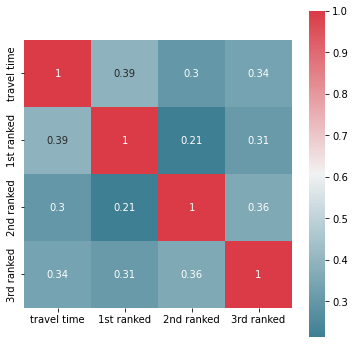

In [157]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(6,6))
corr = df4[['travel time','1st ranked','2nd ranked','3rd ranked']].corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [158]:
x = np.array(df4[['est_dist','1st ranked','2nd ranked','3rd ranked']])
y = np.array(df4['travel time'])
x

array([[0.51987632, 0.58880646, 0.34723081, 0.50644452],
       [0.52859023, 0.58880646, 0.34723081, 0.50644452],
       [0.25828517, 0.58880646, 0.05399704, 0.55052373],
       ...,
       [0.3307786 , 0.58880646, 0.27835725, 0.50644452],
       [0.5988515 , 0.58880646, 0.54054079, 0.55052373],
       [0.16588275, 0.58880646, 0.34723081, 0.5346334 ]])

In [159]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [160]:
print(X_train.shape)
print(X_test.shape)
# X_train

(6525, 4)
(1632, 4)


In [161]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_1 = nnmodel(50, num_hlayers=1,Epoch=500)
model4_1_1

Epoch 1/500
204/204 [==============================] - 1s 2ms/step - loss: 760495.3750 - mape: 99.5338 - rmse: 872.0638 - val_loss: 783480.6250 - val_mape: 98.7349 - val_rmse: 885.1444
Epoch 2/500
204/204 [==============================] - 1s 3ms/step - loss: 735373.3125 - mape: 97.1010 - rmse: 857.5391 - val_loss: 745271.5000 - val_mape: 95.1202 - val_rmse: 863.2911
Epoch 3/500
204/204 [==============================] - 1s 3ms/step - loss: 685908.6250 - mape: 92.2391 - rmse: 828.1960 - val_loss: 684599.8125 - val_mape: 89.1508 - val_rmse: 827.4055
Epoch 4/500
204/204 [==============================] - 1s 3ms/step - loss: 616776.6875 - mape: 85.0501 - rmse: 785.3513 - val_loss: 605569.6250 - val_mape: 80.8721 - val_rmse: 778.1835
Epoch 5/500
204/204 [==============================] - 0s 2ms/step - loss: 533211.0000 - mape: 75.8773 - rmse: 730.2130 - val_loss: 516924.3438 - val_mape: 71.0370 - val_rmse: 718.9745
Epoch 6/500
204/204 [==============================] - 1s 3ms/step - loss: 

204/204 [==============================] - 0s 1ms/step - loss: 71903.6953 - mape: 27.1742 - rmse: 268.1487 - val_loss: 87988.3438 - val_mape: 26.8437 - val_rmse: 296.6283
Epoch 90/500
204/204 [==============================] - 0s 1ms/step - loss: 71864.9375 - mape: 27.2897 - rmse: 268.0764 - val_loss: 88121.8750 - val_mape: 26.4881 - val_rmse: 296.8533
Epoch 91/500
204/204 [==============================] - 0s 1ms/step - loss: 71883.5625 - mape: 27.0195 - rmse: 268.1111 - val_loss: 88082.3984 - val_mape: 26.5161 - val_rmse: 296.7868
Epoch 92/500
204/204 [==============================] - 0s 1ms/step - loss: 71841.7422 - mape: 27.0576 - rmse: 268.0331 - val_loss: 87931.8750 - val_mape: 26.8275 - val_rmse: 296.5331
Epoch 93/500
204/204 [==============================] - 0s 978us/step - loss: 71837.2734 - mape: 27.1505 - rmse: 268.0247 - val_loss: 87997.8828 - val_mape: 26.6216 - val_rmse: 296.6444
Epoch 94/500
204/204 [==============================] - 0s 1ms/step - loss: 71829.3516 - ma

204/204 [==============================] - 0s 1ms/step - loss: 71700.2109 - mape: 27.0498 - rmse: 267.7690 - val_loss: 87899.7188 - val_mape: 26.5438 - val_rmse: 296.4789
Epoch 178/500
204/204 [==============================] - 0s 1ms/step - loss: 71704.5000 - mape: 27.0355 - rmse: 267.7769 - val_loss: 87933.5469 - val_mape: 26.4673 - val_rmse: 296.5359
Epoch 179/500
204/204 [==============================] - 0s 1ms/step - loss: 71689.5859 - mape: 26.9482 - rmse: 267.7491 - val_loss: 88034.1562 - val_mape: 26.2414 - val_rmse: 296.7055
Epoch 180/500
204/204 [==============================] - 0s 1ms/step - loss: 71687.1719 - mape: 27.0682 - rmse: 267.7446 - val_loss: 88114.3828 - val_mape: 26.1032 - val_rmse: 296.8407
Epoch 181/500
204/204 [==============================] - 0s 1ms/step - loss: 71697.1094 - mape: 26.6576 - rmse: 267.7632 - val_loss: 87882.2422 - val_mape: 26.5942 - val_rmse: 296.4494
Epoch 182/500
204/204 [==============================] - 0s 1ms/step - loss: 71696.4453 -

204/204 [==============================] - 0s 1ms/step - loss: 71678.2734 - mape: 26.9549 - rmse: 267.7280 - val_loss: 87907.8516 - val_mape: 26.5157 - val_rmse: 296.4926
Epoch 266/500
204/204 [==============================] - 0s 2ms/step - loss: 71694.3828 - mape: 26.8924 - rmse: 267.7581 - val_loss: 87898.5234 - val_mape: 26.5359 - val_rmse: 296.4768
Epoch 267/500
204/204 [==============================] - 0s 2ms/step - loss: 71696.6562 - mape: 27.0250 - rmse: 267.7623 - val_loss: 87985.1250 - val_mape: 26.3329 - val_rmse: 296.6229
Epoch 268/500
204/204 [==============================] - 0s 1ms/step - loss: 71682.2031 - mape: 26.8755 - rmse: 267.7353 - val_loss: 87878.0312 - val_mape: 26.5897 - val_rmse: 296.4423
Epoch 269/500
204/204 [==============================] - 0s 1ms/step - loss: 71702.5781 - mape: 26.9974 - rmse: 267.7734 - val_loss: 87934.7734 - val_mape: 26.4409 - val_rmse: 296.5380
Epoch 270/500
204/204 [==============================] - 0s 1ms/step - loss: 71697.3828 -

204/204 [==============================] - 0s 2ms/step - loss: 71696.5000 - mape: 27.0496 - rmse: 267.7620 - val_loss: 87915.2188 - val_mape: 26.4952 - val_rmse: 296.5050
Epoch 354/500
204/204 [==============================] - 1s 3ms/step - loss: 71685.5781 - mape: 26.8957 - rmse: 267.7416 - val_loss: 87848.9531 - val_mape: 26.6741 - val_rmse: 296.3932
Epoch 355/500
204/204 [==============================] - 1s 3ms/step - loss: 71686.1094 - mape: 27.0748 - rmse: 267.7426 - val_loss: 87966.7266 - val_mape: 26.3777 - val_rmse: 296.5919
Epoch 356/500
204/204 [==============================] - 0s 2ms/step - loss: 71697.8047 - mape: 26.8707 - rmse: 267.7645 - val_loss: 87883.6562 - val_mape: 26.5761 - val_rmse: 296.4518
Epoch 357/500
204/204 [==============================] - 0s 1ms/step - loss: 71692.6719 - mape: 26.9568 - rmse: 267.7549 - val_loss: 87889.2031 - val_mape: 26.5638 - val_rmse: 296.4611
Epoch 358/500
204/204 [==============================] - 0s 2ms/step - loss: 71696.2812 -

204/204 [==============================] - 0s 1ms/step - loss: 71697.7109 - mape: 26.9441 - rmse: 267.7643 - val_loss: 87884.7969 - val_mape: 26.5806 - val_rmse: 296.4537
Epoch 442/500
204/204 [==============================] - 0s 1ms/step - loss: 71690.2188 - mape: 26.9717 - rmse: 267.7503 - val_loss: 87934.2188 - val_mape: 26.4653 - val_rmse: 296.5370
Epoch 443/500
204/204 [==============================] - 0s 1ms/step - loss: 71686.5938 - mape: 26.9562 - rmse: 267.7435 - val_loss: 87924.3828 - val_mape: 26.4779 - val_rmse: 296.5204
Epoch 444/500
204/204 [==============================] - 0s 1ms/step - loss: 71682.9922 - mape: 26.8804 - rmse: 267.7368 - val_loss: 87832.7969 - val_mape: 26.7237 - val_rmse: 296.3660
Epoch 445/500
204/204 [==============================] - 0s 1ms/step - loss: 71688.0156 - mape: 27.0536 - rmse: 267.7462 - val_loss: 87991.4375 - val_mape: 26.3260 - val_rmse: 296.6335
Epoch 446/500
204/204 [==============================] - 0s 1ms/step - loss: 71689.0391 -

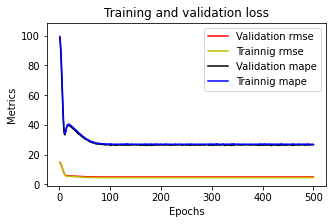

In [162]:
plotme(model4_1_1)

In [163]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_2 = nnmodel(100, num_hlayers=1,Epoch=500)
model4_1_2

Epoch 1/500
204/204 [==============================] - 1s 3ms/step - loss: 756373.6250 - mape: 99.1548 - rmse: 869.6974 - val_loss: 771734.5625 - val_mape: 97.6370 - val_rmse: 878.4843
Epoch 2/500
204/204 [==============================] - 1s 3ms/step - loss: 709988.5625 - mape: 94.6563 - rmse: 842.6082 - val_loss: 703559.3125 - val_mape: 91.0539 - val_rmse: 838.7844
Epoch 3/500
204/204 [==============================] - 0s 2ms/step - loss: 625701.1250 - mape: 86.0150 - rmse: 791.0127 - val_loss: 602966.6875 - val_mape: 80.5983 - val_rmse: 776.5093
Epoch 4/500
204/204 [==============================] - 0s 2ms/step - loss: 517526.3125 - mape: 74.1127 - rmse: 719.3930 - val_loss: 487425.7188 - val_mape: 67.6170 - val_rmse: 698.1588
Epoch 5/500
204/204 [==============================] - 0s 2ms/step - loss: 404605.4375 - mape: 60.6711 - rmse: 636.0861 - val_loss: 375707.8750 - val_mape: 54.2808 - val_rmse: 612.9501
Epoch 6/500
204/204 [==============================] - 1s 3ms/step - loss: 

204/204 [==============================] - 1s 3ms/step - loss: 71718.2109 - mape: 26.9249 - rmse: 267.8026 - val_loss: 87819.2422 - val_mape: 26.8289 - val_rmse: 296.3431
Epoch 90/500
204/204 [==============================] - 1s 3ms/step - loss: 71732.3438 - mape: 26.9704 - rmse: 267.8289 - val_loss: 87784.8750 - val_mape: 26.9532 - val_rmse: 296.2851
Epoch 91/500
204/204 [==============================] - 1s 3ms/step - loss: 71726.4062 - mape: 26.9644 - rmse: 267.8179 - val_loss: 87825.7812 - val_mape: 26.7932 - val_rmse: 296.3542
Epoch 92/500
204/204 [==============================] - 1s 3ms/step - loss: 71719.5312 - mape: 27.0159 - rmse: 267.8050 - val_loss: 88001.6484 - val_mape: 26.3437 - val_rmse: 296.6507
Epoch 93/500
204/204 [==============================] - 1s 3ms/step - loss: 71717.0156 - mape: 26.9410 - rmse: 267.8003 - val_loss: 87920.9219 - val_mape: 26.5261 - val_rmse: 296.5146
Epoch 94/500
204/204 [==============================] - 1s 3ms/step - loss: 71723.5469 - mape

204/204 [==============================] - 1s 3ms/step - loss: 71721.5078 - mape: 27.0051 - rmse: 267.8087 - val_loss: 87843.7969 - val_mape: 26.7063 - val_rmse: 296.3846
Epoch 178/500
204/204 [==============================] - 1s 3ms/step - loss: 71681.9922 - mape: 27.0820 - rmse: 267.7349 - val_loss: 88135.5859 - val_mape: 26.0614 - val_rmse: 296.8764
Epoch 179/500
204/204 [==============================] - 1s 3ms/step - loss: 71701.2500 - mape: 26.8526 - rmse: 267.7709 - val_loss: 87832.6484 - val_mape: 26.7310 - val_rmse: 296.3657
Epoch 180/500
204/204 [==============================] - 1s 3ms/step - loss: 71691.5234 - mape: 26.8818 - rmse: 267.7527 - val_loss: 87766.7734 - val_mape: 26.9932 - val_rmse: 296.2546
Epoch 181/500
204/204 [==============================] - 1s 3ms/step - loss: 71698.0469 - mape: 27.1305 - rmse: 267.7649 - val_loss: 87950.8750 - val_mape: 26.4233 - val_rmse: 296.5651
Epoch 182/500
204/204 [==============================] - 1s 3ms/step - loss: 71733.4375 -

204/204 [==============================] - 1s 3ms/step - loss: 71695.9531 - mape: 26.9741 - rmse: 267.7610 - val_loss: 87868.4531 - val_mape: 26.6181 - val_rmse: 296.4261
Epoch 266/500
204/204 [==============================] - 0s 2ms/step - loss: 71676.0156 - mape: 27.0464 - rmse: 267.7238 - val_loss: 88040.3984 - val_mape: 26.2252 - val_rmse: 296.7160
Epoch 267/500
204/204 [==============================] - 0s 2ms/step - loss: 71652.2734 - mape: 26.7385 - rmse: 267.6794 - val_loss: 87751.1562 - val_mape: 27.0338 - val_rmse: 296.2282
Epoch 268/500
204/204 [==============================] - 1s 3ms/step - loss: 71705.0234 - mape: 27.1553 - rmse: 267.7779 - val_loss: 87950.7188 - val_mape: 26.4169 - val_rmse: 296.5648
Epoch 269/500
204/204 [==============================] - 1s 3ms/step - loss: 71703.6953 - mape: 26.8485 - rmse: 267.7755 - val_loss: 87781.0781 - val_mape: 26.8848 - val_rmse: 296.2787
Epoch 270/500
204/204 [==============================] - 0s 2ms/step - loss: 71703.7188 -

204/204 [==============================] - 1s 3ms/step - loss: 71694.2969 - mape: 26.9667 - rmse: 267.7579 - val_loss: 87892.1562 - val_mape: 26.5602 - val_rmse: 296.4661
Epoch 354/500
204/204 [==============================] - 0s 2ms/step - loss: 71704.4141 - mape: 26.9666 - rmse: 267.7768 - val_loss: 87894.4297 - val_mape: 26.5576 - val_rmse: 296.4699
Epoch 355/500
204/204 [==============================] - 1s 3ms/step - loss: 71689.6953 - mape: 26.9380 - rmse: 267.7493 - val_loss: 87832.2422 - val_mape: 26.7250 - val_rmse: 296.3651
Epoch 356/500
204/204 [==============================] - 0s 2ms/step - loss: 71692.2344 - mape: 26.9630 - rmse: 267.7541 - val_loss: 87895.4141 - val_mape: 26.5515 - val_rmse: 296.4716
Epoch 357/500
204/204 [==============================] - 0s 2ms/step - loss: 71673.7656 - mape: 26.7436 - rmse: 267.7196 - val_loss: 87739.3359 - val_mape: 27.0808 - val_rmse: 296.2083
Epoch 358/500
204/204 [==============================] - 0s 2ms/step - loss: 71704.1641 -

204/204 [==============================] - 0s 2ms/step - loss: 71688.2031 - mape: 26.8300 - rmse: 267.7465 - val_loss: 87842.1250 - val_mape: 26.6992 - val_rmse: 296.3817
Epoch 442/500
204/204 [==============================] - 1s 3ms/step - loss: 71716.6172 - mape: 27.1031 - rmse: 267.7996 - val_loss: 87931.5078 - val_mape: 26.4603 - val_rmse: 296.5325
Epoch 443/500
204/204 [==============================] - 1s 2ms/step - loss: 71709.7188 - mape: 26.9724 - rmse: 267.7867 - val_loss: 87934.2344 - val_mape: 26.4474 - val_rmse: 296.5371
Epoch 444/500
204/204 [==============================] - 0s 2ms/step - loss: 71715.1719 - mape: 26.9558 - rmse: 267.7969 - val_loss: 87956.9219 - val_mape: 26.3986 - val_rmse: 296.5753
Epoch 445/500
204/204 [==============================] - 0s 2ms/step - loss: 71689.2969 - mape: 26.9112 - rmse: 267.7486 - val_loss: 87987.4297 - val_mape: 26.3393 - val_rmse: 296.6267
Epoch 446/500
204/204 [==============================] - 0s 2ms/step - loss: 71678.6875 -

In [164]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_3 = nnmodel(200, num_hlayers=1,Epoch=500)
model4_1_3

Epoch 1/500
204/204 [==============================] - 1s 2ms/step - loss: 750797.1250 - mape: 98.5754 - rmse: 866.4855 - val_loss: 753204.3750 - val_mape: 95.8880 - val_rmse: 867.8735
Epoch 2/500
204/204 [==============================] - 0s 2ms/step - loss: 665929.6250 - mape: 90.1866 - rmse: 816.0451 - val_loss: 627519.8750 - val_mape: 83.2532 - val_rmse: 792.1615
Epoch 3/500
204/204 [==============================] - 1s 3ms/step - loss: 518258.5312 - mape: 73.9424 - rmse: 719.9017 - val_loss: 461837.3750 - val_mape: 64.6105 - val_rmse: 679.5862
Epoch 4/500
204/204 [==============================] - 1s 3ms/step - loss: 356979.6250 - mape: 54.8186 - rmse: 597.4777 - val_loss: 308039.7500 - val_mape: 45.9522 - val_rmse: 555.0133
Epoch 5/500
204/204 [==============================] - 1s 3ms/step - loss: 228927.2656 - mape: 39.6906 - rmse: 478.4634 - val_loss: 202584.4375 - val_mape: 34.9947 - val_rmse: 450.0938
Epoch 6/500
204/204 [==============================] - 0s 2ms/step - loss: 

204/204 [==============================] - 0s 2ms/step - loss: 71562.1875 - mape: 26.9746 - rmse: 267.5111 - val_loss: 87641.8125 - val_mape: 26.7300 - val_rmse: 296.0436
Epoch 90/500
204/204 [==============================] - 0s 2ms/step - loss: 71548.3828 - mape: 26.9478 - rmse: 267.4853 - val_loss: 87735.0312 - val_mape: 26.4711 - val_rmse: 296.2010
Epoch 91/500
204/204 [==============================] - 1s 3ms/step - loss: 71538.8438 - mape: 26.8951 - rmse: 267.4675 - val_loss: 87672.9766 - val_mape: 26.6271 - val_rmse: 296.0962
Epoch 92/500
204/204 [==============================] - 1s 3ms/step - loss: 71564.6172 - mape: 27.0429 - rmse: 267.5156 - val_loss: 87687.7266 - val_mape: 26.5795 - val_rmse: 296.1211
Epoch 93/500
204/204 [==============================] - 0s 2ms/step - loss: 71539.4375 - mape: 26.8281 - rmse: 267.4686 - val_loss: 87659.7812 - val_mape: 26.6559 - val_rmse: 296.0739
Epoch 94/500
204/204 [==============================] - 1s 3ms/step - loss: 71563.3125 - mape

204/204 [==============================] - 0s 2ms/step - loss: 71368.1250 - mape: 26.9439 - rmse: 267.1481 - val_loss: 87482.7031 - val_mape: 26.5162 - val_rmse: 295.7747
Epoch 178/500
204/204 [==============================] - 1s 3ms/step - loss: 71378.6172 - mape: 27.0385 - rmse: 267.1678 - val_loss: 87658.2969 - val_mape: 26.1381 - val_rmse: 296.0714
Epoch 179/500
204/204 [==============================] - 1s 3ms/step - loss: 71357.2031 - mape: 26.7537 - rmse: 267.1277 - val_loss: 87302.4141 - val_mape: 27.1653 - val_rmse: 295.4698
Epoch 180/500
204/204 [==============================] - 1s 2ms/step - loss: 71370.7578 - mape: 27.0391 - rmse: 267.1530 - val_loss: 87569.4375 - val_mape: 26.2940 - val_rmse: 295.9213
Epoch 181/500
204/204 [==============================] - 0s 2ms/step - loss: 71368.9141 - mape: 26.9208 - rmse: 267.1496 - val_loss: 87418.7656 - val_mape: 26.6549 - val_rmse: 295.6667
Epoch 182/500
204/204 [==============================] - 0s 2ms/step - loss: 71350.9219 -

204/204 [==============================] - 1s 3ms/step - loss: 71140.9844 - mape: 26.9714 - rmse: 266.7227 - val_loss: 87332.3516 - val_mape: 26.2382 - val_rmse: 295.5205
Epoch 266/500
204/204 [==============================] - 0s 2ms/step - loss: 71163.4219 - mape: 26.8314 - rmse: 266.7647 - val_loss: 87141.4766 - val_mape: 26.7284 - val_rmse: 295.1974
Epoch 267/500
204/204 [==============================] - 1s 3ms/step - loss: 71159.5078 - mape: 27.0866 - rmse: 266.7574 - val_loss: 87330.4609 - val_mape: 26.2369 - val_rmse: 295.5173
Epoch 268/500
204/204 [==============================] - 1s 3ms/step - loss: 71173.1875 - mape: 26.9096 - rmse: 266.7830 - val_loss: 87394.5781 - val_mape: 26.1050 - val_rmse: 295.6257
Epoch 269/500
204/204 [==============================] - 0s 2ms/step - loss: 71139.3516 - mape: 26.9667 - rmse: 266.7196 - val_loss: 87550.1172 - val_mape: 25.8374 - val_rmse: 295.8887
Epoch 270/500
204/204 [==============================] - 0s 1ms/step - loss: 71152.3516 -

204/204 [==============================] - 0s 2ms/step - loss: 70927.2266 - mape: 26.9091 - rmse: 266.3217 - val_loss: 86930.7812 - val_mape: 26.5406 - val_rmse: 294.8403
Epoch 354/500
204/204 [==============================] - 0s 2ms/step - loss: 70917.5938 - mape: 26.9120 - rmse: 266.3036 - val_loss: 87059.3125 - val_mape: 26.2366 - val_rmse: 295.0581
Epoch 355/500
204/204 [==============================] - 1s 3ms/step - loss: 70962.7422 - mape: 26.9266 - rmse: 266.3883 - val_loss: 86882.9922 - val_mape: 26.6530 - val_rmse: 294.7592
Epoch 356/500
204/204 [==============================] - 1s 2ms/step - loss: 70944.7031 - mape: 26.9757 - rmse: 266.3545 - val_loss: 86986.9219 - val_mape: 26.3653 - val_rmse: 294.9355
Epoch 357/500
204/204 [==============================] - 0s 2ms/step - loss: 70922.0156 - mape: 26.9097 - rmse: 266.3119 - val_loss: 86887.0781 - val_mape: 26.6245 - val_rmse: 294.7661
Epoch 358/500
204/204 [==============================] - 0s 2ms/step - loss: 70917.3984 -

204/204 [==============================] - 1s 3ms/step - loss: 70733.7344 - mape: 26.9366 - rmse: 265.9581 - val_loss: 86616.1016 - val_mape: 26.6653 - val_rmse: 294.3061
Epoch 442/500
204/204 [==============================] - 1s 3ms/step - loss: 70690.4609 - mape: 27.1056 - rmse: 265.8768 - val_loss: 86885.1406 - val_mape: 26.0421 - val_rmse: 294.7628
Epoch 443/500
204/204 [==============================] - 1s 3ms/step - loss: 70705.8672 - mape: 26.7815 - rmse: 265.9058 - val_loss: 86605.7969 - val_mape: 26.6940 - val_rmse: 294.2886
Epoch 444/500
204/204 [==============================] - 0s 2ms/step - loss: 70695.2891 - mape: 26.9134 - rmse: 265.8859 - val_loss: 86556.2344 - val_mape: 26.8740 - val_rmse: 294.2044
Epoch 445/500
204/204 [==============================] - 0s 2ms/step - loss: 70707.2031 - mape: 27.1006 - rmse: 265.9083 - val_loss: 86934.9219 - val_mape: 25.9457 - val_rmse: 294.8473
Epoch 446/500
204/204 [==============================] - 1s 3ms/step - loss: 70715.6875 -

In [165]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model4_1_4

Epoch 1/500
204/204 [==============================] - 1s 3ms/step - loss: 675132.3125 - mape: 90.6501 - rmse: 821.6644 - val_loss: 445390.2812 - val_mape: 62.7289 - val_rmse: 667.3757
Epoch 2/500
204/204 [==============================] - 1s 3ms/step - loss: 176537.5156 - mape: 40.7776 - rmse: 420.1637 - val_loss: 120582.1797 - val_mape: 40.5819 - val_rmse: 347.2495
Epoch 3/500
204/204 [==============================] - 0s 1ms/step - loss: 104632.4766 - mape: 40.8584 - rmse: 323.4695 - val_loss: 117324.3828 - val_mape: 39.1297 - val_rmse: 342.5265
Epoch 4/500
204/204 [==============================] - 0s 1ms/step - loss: 100792.2188 - mape: 39.7210 - rmse: 317.4779 - val_loss: 113617.6562 - val_mape: 37.7016 - val_rmse: 337.0722
Epoch 5/500
204/204 [==============================] - 0s 2ms/step - loss: 96708.2500 - mape: 38.2995 - rmse: 310.9795 - val_loss: 109348.7188 - val_mape: 37.1931 - val_rmse: 330.6792
Epoch 6/500
204/204 [==============================] - 1s 3ms/step - loss: 9

204/204 [==============================] - 1s 3ms/step - loss: 70998.2344 - mape: 26.9080 - rmse: 266.4549 - val_loss: 87501.7266 - val_mape: 25.4413 - val_rmse: 295.8069
Epoch 90/500
204/204 [==============================] - 1s 3ms/step - loss: 70936.3438 - mape: 26.9969 - rmse: 266.3388 - val_loss: 86905.4297 - val_mape: 26.2525 - val_rmse: 294.7973
Epoch 91/500
204/204 [==============================] - 0s 2ms/step - loss: 71017.9219 - mape: 26.8289 - rmse: 266.4919 - val_loss: 87070.5000 - val_mape: 25.9479 - val_rmse: 295.0771
Epoch 92/500
204/204 [==============================] - 0s 1ms/step - loss: 70920.3906 - mape: 26.9594 - rmse: 266.3088 - val_loss: 86814.6953 - val_mape: 26.4575 - val_rmse: 294.6433
Epoch 93/500
204/204 [==============================] - 0s 2ms/step - loss: 70897.4766 - mape: 26.7382 - rmse: 266.2658 - val_loss: 86690.5781 - val_mape: 28.3263 - val_rmse: 294.4326
Epoch 94/500
204/204 [==============================] - 1s 3ms/step - loss: 70934.2344 - mape

204/204 [==============================] - 1s 3ms/step - loss: 70041.2969 - mape: 27.0129 - rmse: 264.6532 - val_loss: 85676.8516 - val_mape: 26.8889 - val_rmse: 292.7061
Epoch 178/500
204/204 [==============================] - 1s 3ms/step - loss: 70103.0938 - mape: 27.1120 - rmse: 264.7699 - val_loss: 85702.7656 - val_mape: 26.6806 - val_rmse: 292.7503
Epoch 179/500
204/204 [==============================] - 1s 3ms/step - loss: 70087.6641 - mape: 27.1784 - rmse: 264.7408 - val_loss: 86148.0312 - val_mape: 25.7926 - val_rmse: 293.5099
Epoch 180/500
204/204 [==============================] - 1s 3ms/step - loss: 70080.6562 - mape: 26.9698 - rmse: 264.7275 - val_loss: 85552.0312 - val_mape: 27.4426 - val_rmse: 292.4928
Epoch 181/500
204/204 [==============================] - 1s 3ms/step - loss: 70153.3672 - mape: 27.1205 - rmse: 264.8648 - val_loss: 85706.5391 - val_mape: 26.5391 - val_rmse: 292.7568
Epoch 182/500
204/204 [==============================] - 1s 3ms/step - loss: 70036.2656 -

204/204 [==============================] - 0s 1ms/step - loss: 69676.7031 - mape: 27.1343 - rmse: 263.9634 - val_loss: 85214.0469 - val_mape: 26.5386 - val_rmse: 291.9145
Epoch 266/500
204/204 [==============================] - 0s 1ms/step - loss: 69626.8594 - mape: 27.2530 - rmse: 263.8690 - val_loss: 85011.8438 - val_mape: 27.9764 - val_rmse: 291.5679
Epoch 267/500
204/204 [==============================] - 1s 3ms/step - loss: 69669.3516 - mape: 27.3404 - rmse: 263.9495 - val_loss: 86210.4531 - val_mape: 25.2750 - val_rmse: 293.6162
Epoch 268/500
204/204 [==============================] - 1s 3ms/step - loss: 69631.2656 - mape: 26.9536 - rmse: 263.8774 - val_loss: 85076.8125 - val_mape: 26.8626 - val_rmse: 291.6793
Epoch 269/500
204/204 [==============================] - 0s 2ms/step - loss: 69692.7656 - mape: 27.1814 - rmse: 263.9939 - val_loss: 85365.0781 - val_mape: 26.2223 - val_rmse: 292.1730
Epoch 270/500
204/204 [==============================] - 1s 3ms/step - loss: 69681.3984 -

204/204 [==============================] - 1s 3ms/step - loss: 69442.5938 - mape: 27.2386 - rmse: 263.5196 - val_loss: 84889.0469 - val_mape: 26.8795 - val_rmse: 291.3572
Epoch 354/500
204/204 [==============================] - 1s 3ms/step - loss: 69399.7578 - mape: 27.3494 - rmse: 263.4383 - val_loss: 85598.2734 - val_mape: 25.7289 - val_rmse: 292.5718
Epoch 355/500
204/204 [==============================] - 0s 2ms/step - loss: 69362.9062 - mape: 27.4317 - rmse: 263.3684 - val_loss: 85485.7578 - val_mape: 25.8570 - val_rmse: 292.3795
Epoch 356/500
204/204 [==============================] - 1s 3ms/step - loss: 69374.0156 - mape: 27.1260 - rmse: 263.3895 - val_loss: 84748.1562 - val_mape: 27.5359 - val_rmse: 291.1154
Epoch 357/500
204/204 [==============================] - 1s 3ms/step - loss: 69322.1016 - mape: 27.3805 - rmse: 263.2909 - val_loss: 84928.3047 - val_mape: 26.7784 - val_rmse: 291.4246
Epoch 358/500
204/204 [==============================] - 1s 2ms/step - loss: 69452.9375 -

204/204 [==============================] - 1s 3ms/step - loss: 69191.3750 - mape: 27.5888 - rmse: 263.0425 - val_loss: 85386.3984 - val_mape: 25.9185 - val_rmse: 292.2095
Epoch 442/500
204/204 [==============================] - 1s 3ms/step - loss: 69197.3516 - mape: 27.3849 - rmse: 263.0539 - val_loss: 85240.4297 - val_mape: 26.0692 - val_rmse: 291.9596
Epoch 443/500
204/204 [==============================] - 0s 2ms/step - loss: 69331.8359 - mape: 27.4378 - rmse: 263.3094 - val_loss: 85488.6641 - val_mape: 25.8434 - val_rmse: 292.3845
Epoch 444/500
204/204 [==============================] - 1s 2ms/step - loss: 69224.3203 - mape: 27.4854 - rmse: 263.1052 - val_loss: 84824.8359 - val_mape: 26.7098 - val_rmse: 291.2470
Epoch 445/500
204/204 [==============================] - 1s 3ms/step - loss: 69298.8047 - mape: 27.4027 - rmse: 263.2467 - val_loss: 85016.8906 - val_mape: 26.3607 - val_rmse: 291.5766
Epoch 446/500
204/204 [==============================] - 0s 2ms/step - loss: 69234.3828 -

In [166]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model4_1_5

Epoch 1/500
204/204 [==============================] - 1s 3ms/step - loss: 542144.6250 - mape: 75.7058 - rmse: 736.3047 - val_loss: 138092.0312 - val_mape: 34.5499 - val_rmse: 371.6074
Epoch 2/500
204/204 [==============================] - 1s 3ms/step - loss: 105499.5781 - mape: 40.6105 - rmse: 324.8070 - val_loss: 116430.7734 - val_mape: 39.5205 - val_rmse: 341.2195
Epoch 3/500
204/204 [==============================] - 1s 3ms/step - loss: 99014.2891 - mape: 39.4127 - rmse: 314.6654 - val_loss: 110937.8594 - val_mape: 36.7502 - val_rmse: 333.0734
Epoch 4/500
204/204 [==============================] - 0s 2ms/step - loss: 92646.2500 - mape: 37.2266 - rmse: 304.3785 - val_loss: 104364.0078 - val_mape: 35.6150 - val_rmse: 323.0542
Epoch 5/500
204/204 [==============================] - 1s 3ms/step - loss: 86461.5469 - mape: 35.0470 - rmse: 294.0435 - val_loss: 98793.5078 - val_mape: 33.8649 - val_rmse: 314.3143
Epoch 6/500
204/204 [==============================] - 1s 4ms/step - loss: 8110

204/204 [==============================] - 1s 3ms/step - loss: 69725.1328 - mape: 27.0698 - rmse: 264.0552 - val_loss: 85495.1797 - val_mape: 26.2166 - val_rmse: 292.3956
Epoch 90/500
204/204 [==============================] - 1s 3ms/step - loss: 69713.0391 - mape: 27.3866 - rmse: 264.0323 - val_loss: 86912.2656 - val_mape: 24.8095 - val_rmse: 294.8089
Epoch 91/500
204/204 [==============================] - 0s 2ms/step - loss: 69867.6719 - mape: 27.0899 - rmse: 264.3250 - val_loss: 85480.2422 - val_mape: 26.1953 - val_rmse: 292.3701
Epoch 92/500
204/204 [==============================] - 1s 3ms/step - loss: 69875.0547 - mape: 27.0877 - rmse: 264.3389 - val_loss: 85454.3359 - val_mape: 26.2673 - val_rmse: 292.3257
Epoch 93/500
204/204 [==============================] - 0s 2ms/step - loss: 69702.1406 - mape: 27.3071 - rmse: 264.0116 - val_loss: 85407.1250 - val_mape: 26.2420 - val_rmse: 292.2450
Epoch 94/500
204/204 [==============================] - 1s 3ms/step - loss: 69772.4766 - mape

204/204 [==============================] - 1s 3ms/step - loss: 69338.4766 - mape: 27.3976 - rmse: 263.3220 - val_loss: 85600.3359 - val_mape: 25.5764 - val_rmse: 292.5753
Epoch 178/500
204/204 [==============================] - 1s 4ms/step - loss: 69330.5938 - mape: 27.3780 - rmse: 263.3070 - val_loss: 84580.6953 - val_mape: 27.1219 - val_rmse: 290.8276
Epoch 179/500
204/204 [==============================] - 1s 3ms/step - loss: 69361.2422 - mape: 27.4091 - rmse: 263.3652 - val_loss: 85172.5469 - val_mape: 26.0968 - val_rmse: 291.8434
Epoch 180/500
204/204 [==============================] - 1s 3ms/step - loss: 69306.5547 - mape: 27.3403 - rmse: 263.2614 - val_loss: 84758.2031 - val_mape: 26.6245 - val_rmse: 291.1326
Epoch 181/500
204/204 [==============================] - 1s 3ms/step - loss: 69333.6016 - mape: 27.3755 - rmse: 263.3127 - val_loss: 84655.0000 - val_mape: 26.9986 - val_rmse: 290.9553
Epoch 182/500
204/204 [==============================] - 1s 3ms/step - loss: 69372.7031 -

204/204 [==============================] - 0s 2ms/step - loss: 69173.0625 - mape: 27.4197 - rmse: 263.0077 - val_loss: 84464.4297 - val_mape: 26.7791 - val_rmse: 290.6277
Epoch 266/500
204/204 [==============================] - 0s 1ms/step - loss: 69095.2969 - mape: 27.3517 - rmse: 262.8598 - val_loss: 84222.4766 - val_mape: 28.1922 - val_rmse: 290.2111
Epoch 267/500
204/204 [==============================] - 0s 2ms/step - loss: 69185.6250 - mape: 27.5451 - rmse: 263.0316 - val_loss: 84243.1016 - val_mape: 27.7800 - val_rmse: 290.2466
Epoch 268/500
204/204 [==============================] - 0s 2ms/step - loss: 69122.5000 - mape: 27.5206 - rmse: 262.9116 - val_loss: 84367.9375 - val_mape: 27.0073 - val_rmse: 290.4616
Epoch 269/500
204/204 [==============================] - 0s 2ms/step - loss: 69163.5625 - mape: 27.3504 - rmse: 262.9897 - val_loss: 84275.8594 - val_mape: 28.3430 - val_rmse: 290.3030
Epoch 270/500
204/204 [==============================] - 0s 2ms/step - loss: 69208.8594 -

204/204 [==============================] - 0s 2ms/step - loss: 68702.5391 - mape: 27.3708 - rmse: 262.1117 - val_loss: 84280.6406 - val_mape: 26.3266 - val_rmse: 290.3113
Epoch 354/500
204/204 [==============================] - 1s 3ms/step - loss: 68637.8594 - mape: 27.2202 - rmse: 261.9883 - val_loss: 83846.7578 - val_mape: 28.1191 - val_rmse: 289.5630
Epoch 355/500
204/204 [==============================] - 1s 2ms/step - loss: 68728.0234 - mape: 27.5921 - rmse: 262.1603 - val_loss: 84146.8125 - val_mape: 26.6818 - val_rmse: 290.0807
Epoch 356/500
204/204 [==============================] - 1s 3ms/step - loss: 68749.7266 - mape: 27.4601 - rmse: 262.2017 - val_loss: 83939.6562 - val_mape: 28.1433 - val_rmse: 289.7234
Epoch 357/500
204/204 [==============================] - 1s 3ms/step - loss: 68673.2812 - mape: 27.3084 - rmse: 262.0559 - val_loss: 83961.8125 - val_mape: 27.1981 - val_rmse: 289.7617
Epoch 358/500
204/204 [==============================] - 0s 2ms/step - loss: 68703.8359 -

204/204 [==============================] - 0s 2ms/step - loss: 68242.3672 - mape: 27.2631 - rmse: 261.2324 - val_loss: 84363.5000 - val_mape: 26.0149 - val_rmse: 290.4539
Epoch 442/500
204/204 [==============================] - 0s 2ms/step - loss: 68311.4844 - mape: 27.1414 - rmse: 261.3647 - val_loss: 83750.8438 - val_mape: 28.6261 - val_rmse: 289.3974
Epoch 443/500
204/204 [==============================] - 0s 2ms/step - loss: 68281.7969 - mape: 27.6533 - rmse: 261.3079 - val_loss: 83848.7969 - val_mape: 26.7967 - val_rmse: 289.5666
Epoch 444/500
204/204 [==============================] - 0s 1ms/step - loss: 68220.3984 - mape: 27.4522 - rmse: 261.1903 - val_loss: 84082.8906 - val_mape: 26.3461 - val_rmse: 289.9705
Epoch 445/500
204/204 [==============================] - 0s 1ms/step - loss: 68263.1719 - mape: 27.1975 - rmse: 261.2722 - val_loss: 83794.9375 - val_mape: 27.0022 - val_rmse: 289.4735
Epoch 446/500
204/204 [==============================] - 0s 2ms/step - loss: 68250.1406 -

### missing value handling approach 2: 

In [167]:
### missing value handling approach 2: 
df6 = df1.iloc[:,0:9].copy()
df6[['1st ranked', '2nd ranked','3rd ranked']] = df6[['1st ranked', '2nd ranked','3rd ranked']].fillna(0)
df6.head()

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         1038           16  0.542630  0.519876    0.229358         0.357143   
1         1020           22  0.531771  0.528590    0.257143         0.385714   
2          730            6  0.296433  0.258285    0.689189         0.708333   
3         1235           13  0.427837  0.389613    0.404412         0.410448   
4          576           17  0.312362  0.267286    0.972973         0.986301   

  1st ranked    2nd ranked    3rd ranked  
0    primary      tertiary  primary_link  
1    primary      tertiary  primary_link  
2    primary  unclassified      tertiary  
3    primary   residential  unclassified  
4    primary   residential      tertiary

#### 2. encoding of ranked roadtype with binary-encoding

In [168]:
option = ['residential','tertiary','primary']
df6.loc[~df6['1st ranked'].isin(option),'1st ranked'] = 'others1'
option = ['residential','tertiary','secondary',0]
df6.loc[~df6['2nd ranked'].isin(option),'2nd ranked'] = 'others2'
option = ['residential','tertiary',0]
df6.loc[~df6['3rd ranked'].isin(option),'3rd ranked'] = 'others3'
df6.head(20)

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0          1038           16  0.542630  0.519876    0.229358         0.357143   
1          1020           22  0.531771  0.528590    0.257143         0.385714   
2           730            6  0.296433  0.258285    0.689189         0.708333   
3          1235           13  0.427837  0.389613    0.404412         0.410448   
4           576           17  0.312362  0.267286    0.972973         0.986301   
5           810           21  0.329516  0.286876    0.545455         0.683544   
7           985           22  0.403114  0.326049    0.551020         0.568421   
8          1071           19  0.574918  0.600324    0.429825         0.466667   
9          1110           13  0.377363  0.311925    0.509804         0.597701   
10          979           14  0.400711  0.318323    0.536082         0.584270   
11         1857           16  0.377888  0.259449    0.365385         0.487179   
12          790           22  0.465103  0.390073    0.919355         0.982759   
13          676           22  0.323810  0.271635    0.658228         0.693333   
14          916           19  0.500408  0.413999    0.851064         0.882353   
15          138            1  0.042982  0.063235    0.333333         0.130435   
16          283           13  0.005930  0.007277    0.833333         1.000000   
17          346           12  0.186797  0.126186    0.846154         1.000000   
18          487            3  0.138472  0.101591    0.703704         0.678571   
19          829           12  0.213723  0.168737    0.750000         0.750000   
20          775           18  0.458233  0.420336    0.558824         0.612903   

   1st ranked   2nd ranked   3rd ranked  
0     primary     tertiary      others3  
1     primary     tertiary      others3  
2     primary      others2     tertiary  
3     primary  residential      others3  
4     primary  residential     tertiary  
5     primary      others2  residential  
7     primary  residential      others3  
8     primary  residential      others3  
9     primary  residential      others3  
10    primary  residential      others3  
11    primary      others2  residential  
12    primary     tertiary  residential  
13    primary      others2     tertiary  
14    primary  residential     tertiary  
15    others1     tertiary            0  
16    others1            0            0  
17    primary     tertiary            0  
18    primary      others2     tertiary  
19    primary      others2     tertiary  
20    primary  residential      others3

In [169]:
#Create object for binary encoding
encoder= ce.BinaryEncoder(cols=['1st ranked','2nd ranked','3rd ranked'],return_df=True)
#Fit and Transform Data 
df6=encoder.fit_transform(df6) 
df6

travel time  hour of day  distance  est_dist  similarity  \
0            1038           16  0.542630  0.519876    0.229358   
1            1020           22  0.531771  0.528590    0.257143   
2             730            6  0.296433  0.258285    0.689189   
3            1235           13  0.427837  0.389613    0.404412   
4             576           17  0.312362  0.267286    0.972973   
...           ...          ...       ...       ...         ...   
8262          764           17  0.423759  0.361695    0.816667   
8263         1023            9  0.420897  0.360065    0.352941   
8264          960           15  0.384812  0.330779    0.925532   
8265         1349           18  0.679393  0.598852    0.508772   
8266          393           19  0.188721  0.165883    0.461538   

      similarity_dijk  1st ranked_0  1st ranked_1  1st ranked_2  2nd ranked_0  \
0            0.357143             0             0             1             0   
1            0.385714             0             0             1             0   
2            0.708333             0             0             1             0   
3            0.410448             0             0             1             0   
4            0.986301             0             0             1             0   
...               ...           ...           ...           ...           ...   
8262         0.777778             0             0             1             0   
8263         0.375000             0             0             1             0   
8264         0.956044             0             0             1             0   
8265         0.411348             0             0             1             1   
8266         0.382979             0             0             1             0   

      2nd ranked_1  2nd ranked_2  3rd ranked_0  3rd ranked_1  3rd ranked_2  
0                0             1             0             0             1  
1                0             1             0             0             1  
2                1             0             0             1             0  
3                1             1             0             0             1  
4                1             1             0             1             0  
...            ...           ...           ...           ...           ...  
8262             0             1             0             1             1  
8263             1             1             0             1             0  
8264             1             1             0             0             1  
8265             0             1             0             1             0  
8266             0             1             0             1             1  

[8157 rows x 15 columns]

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

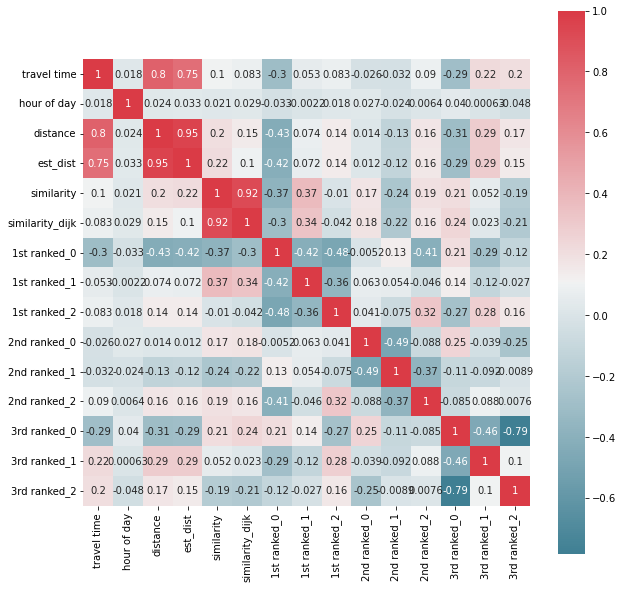

In [170]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(10,10))
corr = df6.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [171]:
x = np.array(df6[['est_dist','1st ranked_0','1st ranked_1','1st ranked_2','2nd ranked_0','2nd ranked_1','2nd ranked_2','3rd ranked_0','3rd ranked_1','3rd ranked_2']])
# x = np.array(df1.iloc[:,1:])
y = np.array(df6['travel time'])
x.shape

(8157, 10)

In [172]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [173]:
print(X_train.shape)
print(X_test.shape)
# X_train

(6525, 10)
(1632, 10)


In [174]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_1 = nnmodel(50, num_hlayers=1,Epoch=500)
model4_4_1

Epoch 1/500
204/204 [==============================] - 1s 3ms/step - loss: 756805.8125 - mape: 99.0603 - rmse: 869.9459 - val_loss: 772539.1250 - val_mape: 97.3708 - val_rmse: 878.9421
Epoch 2/500
204/204 [==============================] - 0s 2ms/step - loss: 708664.6250 - mape: 93.7424 - rmse: 841.8222 - val_loss: 698801.8750 - val_mape: 89.1535 - val_rmse: 835.9437
Epoch 3/500
204/204 [==============================] - 0s 2ms/step - loss: 615657.0625 - mape: 82.7176 - rmse: 784.6382 - val_loss: 589067.7500 - val_mape: 76.0262 - val_rmse: 767.5075
Epoch 4/500
204/204 [==============================] - 1s 3ms/step - loss: 500340.7500 - mape: 68.7742 - rmse: 707.3477 - val_loss: 469868.1562 - val_mape: 61.6683 - val_rmse: 685.4693
Epoch 5/500
204/204 [==============================] - 1s 3ms/step - loss: 386794.9062 - mape: 54.6597 - rmse: 621.9284 - val_loss: 361584.7500 - val_mape: 49.0401 - val_rmse: 601.3192
Epoch 6/500
204/204 [==============================] - 1s 3ms/step - loss: 

204/204 [==============================] - 1s 3ms/step - loss: 70094.7969 - mape: 26.9930 - rmse: 264.7542 - val_loss: 86222.4531 - val_mape: 26.6684 - val_rmse: 293.6366
Epoch 90/500
204/204 [==============================] - 1s 3ms/step - loss: 70099.4688 - mape: 26.9468 - rmse: 264.7630 - val_loss: 86236.2031 - val_mape: 26.5291 - val_rmse: 293.6600
Epoch 91/500
204/204 [==============================] - 1s 3ms/step - loss: 70072.6484 - mape: 27.0841 - rmse: 264.7124 - val_loss: 86316.9219 - val_mape: 26.2608 - val_rmse: 293.7974
Epoch 92/500
204/204 [==============================] - 1s 3ms/step - loss: 70097.3203 - mape: 26.9275 - rmse: 264.7590 - val_loss: 86225.6953 - val_mape: 26.5267 - val_rmse: 293.6421
Epoch 93/500
204/204 [==============================] - 1s 3ms/step - loss: 70064.8906 - mape: 26.9608 - rmse: 264.6977 - val_loss: 86174.6016 - val_mape: 26.6252 - val_rmse: 293.5551
Epoch 94/500
204/204 [==============================] - 1s 3ms/step - loss: 70074.5859 - mape

204/204 [==============================] - 1s 3ms/step - loss: 69755.6094 - mape: 26.6361 - rmse: 264.1129 - val_loss: 85723.3516 - val_mape: 25.9689 - val_rmse: 292.7855
Epoch 178/500
204/204 [==============================] - 0s 2ms/step - loss: 69725.8672 - mape: 26.5922 - rmse: 264.0565 - val_loss: 85852.5234 - val_mape: 25.6634 - val_rmse: 293.0060
Epoch 179/500
204/204 [==============================] - 0s 2ms/step - loss: 69736.7656 - mape: 26.5794 - rmse: 264.0772 - val_loss: 85670.9688 - val_mape: 26.2871 - val_rmse: 292.6960
Epoch 180/500
204/204 [==============================] - 0s 2ms/step - loss: 69705.5000 - mape: 26.6901 - rmse: 264.0180 - val_loss: 85915.5859 - val_mape: 25.5029 - val_rmse: 293.1136
Epoch 181/500
204/204 [==============================] - 1s 3ms/step - loss: 69731.7812 - mape: 26.5512 - rmse: 264.0677 - val_loss: 85714.8203 - val_mape: 25.9324 - val_rmse: 292.7709
Epoch 182/500
204/204 [==============================] - 0s 2ms/step - loss: 69733.4609 -

204/204 [==============================] - 1s 3ms/step - loss: 69462.7188 - mape: 26.4481 - rmse: 263.5578 - val_loss: 85259.2344 - val_mape: 25.9294 - val_rmse: 291.9919
Epoch 266/500
204/204 [==============================] - 1s 3ms/step - loss: 69448.8906 - mape: 26.5009 - rmse: 263.5316 - val_loss: 85426.5234 - val_mape: 25.3919 - val_rmse: 292.2782
Epoch 267/500
204/204 [==============================] - 1s 3ms/step - loss: 69460.4688 - mape: 26.3628 - rmse: 263.5535 - val_loss: 85258.5234 - val_mape: 25.8657 - val_rmse: 291.9906
Epoch 268/500
204/204 [==============================] - 0s 2ms/step - loss: 69450.5312 - mape: 26.3489 - rmse: 263.5347 - val_loss: 85199.4375 - val_mape: 26.0793 - val_rmse: 291.8894
Epoch 269/500
204/204 [==============================] - 1s 3ms/step - loss: 69464.1719 - mape: 26.6204 - rmse: 263.5606 - val_loss: 85275.8984 - val_mape: 25.7144 - val_rmse: 292.0204
Epoch 270/500
204/204 [==============================] - 0s 2ms/step - loss: 69438.2891 -

204/204 [==============================] - 0s 2ms/step - loss: 69261.8125 - mape: 26.3124 - rmse: 263.1764 - val_loss: 84999.2734 - val_mape: 25.6406 - val_rmse: 291.5464
Epoch 354/500
204/204 [==============================] - 1s 3ms/step - loss: 69242.0625 - mape: 26.2008 - rmse: 263.1389 - val_loss: 84910.5000 - val_mape: 26.3244 - val_rmse: 291.3941
Epoch 355/500
204/204 [==============================] - 1s 3ms/step - loss: 69282.0781 - mape: 26.4564 - rmse: 263.2149 - val_loss: 85024.8047 - val_mape: 25.5865 - val_rmse: 291.5901
Epoch 356/500
204/204 [==============================] - 1s 3ms/step - loss: 69261.7109 - mape: 26.3339 - rmse: 263.1762 - val_loss: 84915.4688 - val_mape: 26.0067 - val_rmse: 291.4026
Epoch 357/500
204/204 [==============================] - 0s 2ms/step - loss: 69280.2734 - mape: 26.3342 - rmse: 263.2115 - val_loss: 84923.8984 - val_mape: 25.9804 - val_rmse: 291.4171
Epoch 358/500
204/204 [==============================] - 1s 3ms/step - loss: 69259.3516 -

204/204 [==============================] - 1s 3ms/step - loss: 69086.5703 - mape: 26.1339 - rmse: 262.8432 - val_loss: 84823.9375 - val_mape: 25.7164 - val_rmse: 291.2455
Epoch 442/500
204/204 [==============================] - 1s 3ms/step - loss: 69101.7734 - mape: 26.1853 - rmse: 262.8722 - val_loss: 84829.5859 - val_mape: 25.7475 - val_rmse: 291.2552
Epoch 443/500
204/204 [==============================] - 1s 3ms/step - loss: 69116.7656 - mape: 26.3508 - rmse: 262.9007 - val_loss: 84824.3125 - val_mape: 25.6570 - val_rmse: 291.2461
Epoch 444/500
204/204 [==============================] - 1s 2ms/step - loss: 69084.6250 - mape: 26.3530 - rmse: 262.8395 - val_loss: 84931.9141 - val_mape: 25.3417 - val_rmse: 291.4308
Epoch 445/500
204/204 [==============================] - 1s 3ms/step - loss: 69086.6484 - mape: 26.2669 - rmse: 262.8434 - val_loss: 85001.7734 - val_mape: 25.1911 - val_rmse: 291.5506
Epoch 446/500
204/204 [==============================] - 1s 3ms/step - loss: 69086.4688 -

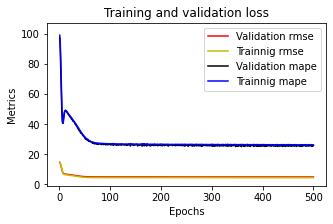

In [175]:
plotme(model4_4_1)
    

In [176]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_2 = nnmodel(100, num_hlayers=1,Epoch=500)
model4_4_2

Epoch 1/500
204/204 [==============================] - 1s 2ms/step - loss: 749455.5000 - mape: 98.3044 - rmse: 865.7110 - val_loss: 749787.7500 - val_mape: 94.8921 - val_rmse: 865.9028
Epoch 2/500
204/204 [==============================] - 0s 2ms/step - loss: 659781.6875 - mape: 88.0630 - rmse: 812.2695 - val_loss: 620816.5000 - val_mape: 79.8715 - val_rmse: 787.9191
Epoch 3/500
204/204 [==============================] - 1s 3ms/step - loss: 510486.8438 - mape: 69.8488 - rmse: 714.4836 - val_loss: 457542.9375 - val_mape: 60.2139 - val_rmse: 676.4192
Epoch 4/500
204/204 [==============================] - 1s 3ms/step - loss: 356828.3438 - mape: 51.3401 - rmse: 597.3511 - val_loss: 317323.5000 - val_mape: 44.7042 - val_rmse: 563.3148
Epoch 5/500
204/204 [==============================] - 1s 3ms/step - loss: 243706.6094 - mape: 41.5828 - rmse: 493.6665 - val_loss: 228397.2344 - val_mape: 40.4065 - val_rmse: 477.9092
Epoch 6/500
204/204 [==============================] - 1s 3ms/step - loss: 

204/204 [==============================] - 0s 1ms/step - loss: 69834.2656 - mape: 26.7946 - rmse: 264.2617 - val_loss: 86018.1172 - val_mape: 25.9172 - val_rmse: 293.2885
Epoch 90/500
204/204 [==============================] - 1s 3ms/step - loss: 69842.7031 - mape: 26.7848 - rmse: 264.2777 - val_loss: 85963.8516 - val_mape: 26.1026 - val_rmse: 293.1959
Epoch 91/500
204/204 [==============================] - 1s 3ms/step - loss: 69819.1953 - mape: 26.7535 - rmse: 264.2332 - val_loss: 85999.6484 - val_mape: 25.9550 - val_rmse: 293.2570
Epoch 92/500
204/204 [==============================] - 0s 2ms/step - loss: 69833.8984 - mape: 26.7577 - rmse: 264.2610 - val_loss: 85935.3438 - val_mape: 26.1589 - val_rmse: 293.1473
Epoch 93/500
204/204 [==============================] - 0s 2ms/step - loss: 69806.5234 - mape: 26.7766 - rmse: 264.2092 - val_loss: 85946.4688 - val_mape: 25.9368 - val_rmse: 293.1663
Epoch 94/500
204/204 [==============================] - 1s 3ms/step - loss: 69801.7344 - mape

204/204 [==============================] - 0s 2ms/step - loss: 69452.0859 - mape: 26.5231 - rmse: 263.5376 - val_loss: 85359.4141 - val_mape: 26.1245 - val_rmse: 292.1633
Epoch 178/500
204/204 [==============================] - 0s 2ms/step - loss: 69444.5625 - mape: 26.6020 - rmse: 263.5234 - val_loss: 85373.9922 - val_mape: 26.0630 - val_rmse: 292.1883
Epoch 179/500
204/204 [==============================] - 1s 4ms/step - loss: 69444.9844 - mape: 26.6208 - rmse: 263.5242 - val_loss: 85368.4688 - val_mape: 26.1111 - val_rmse: 292.1788
Epoch 180/500
204/204 [==============================] - 1s 3ms/step - loss: 69451.9219 - mape: 26.6013 - rmse: 263.5373 - val_loss: 85441.7344 - val_mape: 25.8796 - val_rmse: 292.3042
Epoch 181/500
204/204 [==============================] - 1s 3ms/step - loss: 69450.9141 - mape: 26.6809 - rmse: 263.5354 - val_loss: 85550.1641 - val_mape: 25.4981 - val_rmse: 292.4896
Epoch 182/500
204/204 [==============================] - 0s 2ms/step - loss: 69420.9062 -

204/204 [==============================] - 1s 3ms/step - loss: 69111.8125 - mape: 26.4679 - rmse: 262.8913 - val_loss: 85198.7266 - val_mape: 25.6986 - val_rmse: 291.8882
Epoch 266/500
204/204 [==============================] - 0s 2ms/step - loss: 69100.5000 - mape: 26.5838 - rmse: 262.8698 - val_loss: 85257.7188 - val_mape: 25.4572 - val_rmse: 291.9893
Epoch 267/500
204/204 [==============================] - 0s 2ms/step - loss: 69092.4375 - mape: 26.5086 - rmse: 262.8544 - val_loss: 85076.3594 - val_mape: 25.9528 - val_rmse: 291.6785
Epoch 268/500
204/204 [==============================] - 0s 2ms/step - loss: 69095.9531 - mape: 26.6055 - rmse: 262.8611 - val_loss: 85123.9688 - val_mape: 25.7790 - val_rmse: 291.7601
Epoch 269/500
204/204 [==============================] - 1s 3ms/step - loss: 69045.4766 - mape: 26.5787 - rmse: 262.7650 - val_loss: 85403.0078 - val_mape: 25.1488 - val_rmse: 292.2379
Epoch 270/500
204/204 [==============================] - 1s 3ms/step - loss: 69085.6406 -

204/204 [==============================] - 0s 2ms/step - loss: 68767.4297 - mape: 26.4216 - rmse: 262.2354 - val_loss: 84827.8047 - val_mape: 26.5428 - val_rmse: 291.2521
Epoch 354/500
204/204 [==============================] - 0s 1ms/step - loss: 68777.9297 - mape: 26.6265 - rmse: 262.2555 - val_loss: 84986.3594 - val_mape: 25.6695 - val_rmse: 291.5242
Epoch 355/500
204/204 [==============================] - 0s 1ms/step - loss: 68764.8828 - mape: 26.4498 - rmse: 262.2306 - val_loss: 84947.0859 - val_mape: 25.7800 - val_rmse: 291.4568
Epoch 356/500
204/204 [==============================] - 0s 2ms/step - loss: 68786.0078 - mape: 26.4515 - rmse: 262.2709 - val_loss: 84977.3516 - val_mape: 25.7120 - val_rmse: 291.5088
Epoch 357/500
204/204 [==============================] - 0s 1ms/step - loss: 68762.8125 - mape: 26.6174 - rmse: 262.2267 - val_loss: 85126.0000 - val_mape: 25.2767 - val_rmse: 291.7636
Epoch 358/500
204/204 [==============================] - 0s 1ms/step - loss: 68784.8281 -

204/204 [==============================] - 0s 1ms/step - loss: 68609.7734 - mape: 26.5277 - rmse: 261.9347 - val_loss: 84950.5000 - val_mape: 25.7708 - val_rmse: 291.4627
Epoch 442/500
204/204 [==============================] - 0s 1ms/step - loss: 68620.8750 - mape: 26.4041 - rmse: 261.9559 - val_loss: 84938.5234 - val_mape: 25.7316 - val_rmse: 291.4421
Epoch 443/500
204/204 [==============================] - 1s 3ms/step - loss: 68600.6328 - mape: 26.4771 - rmse: 261.9172 - val_loss: 84881.0625 - val_mape: 25.9454 - val_rmse: 291.3435
Epoch 444/500
204/204 [==============================] - 0s 2ms/step - loss: 68634.7812 - mape: 26.4950 - rmse: 261.9824 - val_loss: 84937.9375 - val_mape: 25.7071 - val_rmse: 291.4411
Epoch 445/500
204/204 [==============================] - 0s 2ms/step - loss: 68590.2500 - mape: 26.3338 - rmse: 261.8974 - val_loss: 84827.5000 - val_mape: 26.0071 - val_rmse: 291.2516
Epoch 446/500
204/204 [==============================] - 1s 3ms/step - loss: 68610.1562 -

In [177]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_3 = nnmodel(200, num_hlayers=1,Epoch=500)
model4_4_3

Epoch 1/500
204/204 [==============================] - 1s 3ms/step - loss: 738136.6250 - mape: 97.0478 - rmse: 859.1488 - val_loss: 713411.9375 - val_mape: 90.8457 - val_rmse: 844.6371
Epoch 2/500
204/204 [==============================] - 1s 3ms/step - loss: 580052.1875 - mape: 78.4059 - rmse: 761.6116 - val_loss: 493630.5000 - val_mape: 64.5256 - val_rmse: 702.5884
Epoch 3/500
204/204 [==============================] - 1s 3ms/step - loss: 356596.7500 - mape: 51.6146 - rmse: 597.1572 - val_loss: 288430.1250 - val_mape: 42.3188 - val_rmse: 537.0569
Epoch 4/500
204/204 [==============================] - 1s 3ms/step - loss: 209437.8750 - mape: 40.9790 - rmse: 457.6438 - val_loss: 194281.4062 - val_mape: 42.6354 - val_rmse: 440.7737
Epoch 5/500
204/204 [==============================] - 1s 3ms/step - loss: 159816.5469 - mape: 45.5407 - rmse: 399.7706 - val_loss: 171617.5469 - val_mape: 47.6548 - val_rmse: 414.2675
Epoch 6/500
204/204 [==============================] - 1s 3ms/step - loss: 

204/204 [==============================] - 1s 3ms/step - loss: 69947.3906 - mape: 26.6414 - rmse: 264.4757 - val_loss: 85998.3125 - val_mape: 26.5134 - val_rmse: 293.2547
Epoch 90/500
204/204 [==============================] - 1s 3ms/step - loss: 69941.7500 - mape: 26.9711 - rmse: 264.4650 - val_loss: 86187.6094 - val_mape: 25.7374 - val_rmse: 293.5773
Epoch 91/500
204/204 [==============================] - 1s 3ms/step - loss: 69943.4531 - mape: 26.7493 - rmse: 264.4682 - val_loss: 86366.5859 - val_mape: 25.3369 - val_rmse: 293.8819
Epoch 92/500
204/204 [==============================] - 1s 3ms/step - loss: 69999.1406 - mape: 26.6366 - rmse: 264.5735 - val_loss: 86165.0000 - val_mape: 25.8428 - val_rmse: 293.5388
Epoch 93/500
204/204 [==============================] - 1s 3ms/step - loss: 69915.4219 - mape: 26.6975 - rmse: 264.4153 - val_loss: 86041.6484 - val_mape: 26.2486 - val_rmse: 293.3286
Epoch 94/500
204/204 [==============================] - 1s 3ms/step - loss: 69919.4844 - mape

204/204 [==============================] - 1s 3ms/step - loss: 69321.9688 - mape: 26.6164 - rmse: 263.2906 - val_loss: 85664.2188 - val_mape: 25.1123 - val_rmse: 292.6845
Epoch 178/500
204/204 [==============================] - 0s 2ms/step - loss: 69362.0312 - mape: 26.3946 - rmse: 263.3667 - val_loss: 85389.4141 - val_mape: 25.5464 - val_rmse: 292.2147
Epoch 179/500
204/204 [==============================] - 1s 3ms/step - loss: 69302.2969 - mape: 26.3217 - rmse: 263.2533 - val_loss: 85245.3828 - val_mape: 26.3341 - val_rmse: 291.9681
Epoch 180/500
204/204 [==============================] - 0s 2ms/step - loss: 69308.9141 - mape: 26.5318 - rmse: 263.2659 - val_loss: 85220.5078 - val_mape: 26.4178 - val_rmse: 291.9255
Epoch 181/500
204/204 [==============================] - 1s 3ms/step - loss: 69297.1797 - mape: 26.5741 - rmse: 263.2436 - val_loss: 85332.9219 - val_mape: 25.7498 - val_rmse: 292.1180
Epoch 182/500
204/204 [==============================] - 1s 3ms/step - loss: 69257.1172 -

204/204 [==============================] - 1s 3ms/step - loss: 68817.4219 - mape: 26.4129 - rmse: 262.3307 - val_loss: 85029.0703 - val_mape: 25.4361 - val_rmse: 291.5974
Epoch 266/500
204/204 [==============================] - 0s 2ms/step - loss: 68831.2656 - mape: 26.3873 - rmse: 262.3571 - val_loss: 84993.6562 - val_mape: 25.5758 - val_rmse: 291.5367
Epoch 267/500
204/204 [==============================] - 1s 3ms/step - loss: 68865.6172 - mape: 26.3887 - rmse: 262.4226 - val_loss: 85191.6797 - val_mape: 25.2083 - val_rmse: 291.8761
Epoch 268/500
204/204 [==============================] - 1s 3ms/step - loss: 68796.7656 - mape: 26.0577 - rmse: 262.2914 - val_loss: 84850.2188 - val_mape: 26.6876 - val_rmse: 291.2906
Epoch 269/500
204/204 [==============================] - 1s 3ms/step - loss: 68840.4844 - mape: 26.4716 - rmse: 262.3747 - val_loss: 84944.8828 - val_mape: 25.7222 - val_rmse: 291.4531
Epoch 270/500
204/204 [==============================] - 1s 3ms/step - loss: 68822.9141 -

204/204 [==============================] - 1s 2ms/step - loss: 68538.9453 - mape: 26.3424 - rmse: 261.7994 - val_loss: 84803.6562 - val_mape: 25.7218 - val_rmse: 291.2107
Epoch 354/500
204/204 [==============================] - 0s 2ms/step - loss: 68542.8594 - mape: 26.3242 - rmse: 261.8069 - val_loss: 84887.6406 - val_mape: 25.4680 - val_rmse: 291.3548
Epoch 355/500
204/204 [==============================] - 1s 3ms/step - loss: 68525.4844 - mape: 26.1826 - rmse: 261.7737 - val_loss: 84770.4219 - val_mape: 26.0584 - val_rmse: 291.1536
Epoch 356/500
204/204 [==============================] - 1s 3ms/step - loss: 68527.6328 - mape: 26.2516 - rmse: 261.7778 - val_loss: 84736.1406 - val_mape: 26.0335 - val_rmse: 291.0947
Epoch 357/500
204/204 [==============================] - 1s 3ms/step - loss: 68529.3672 - mape: 26.4132 - rmse: 261.7812 - val_loss: 84881.7578 - val_mape: 25.5189 - val_rmse: 291.3447
Epoch 358/500
204/204 [==============================] - 1s 3ms/step - loss: 68550.5859 -

204/204 [==============================] - 1s 3ms/step - loss: 68328.6641 - mape: 26.2057 - rmse: 261.3975 - val_loss: 84787.8594 - val_mape: 25.7909 - val_rmse: 291.1836
Epoch 442/500
204/204 [==============================] - 1s 3ms/step - loss: 68336.4609 - mape: 26.3638 - rmse: 261.4124 - val_loss: 84752.3359 - val_mape: 25.9539 - val_rmse: 291.1226
Epoch 443/500
204/204 [==============================] - 1s 3ms/step - loss: 68379.7891 - mape: 26.1154 - rmse: 261.4953 - val_loss: 84776.1016 - val_mape: 25.6431 - val_rmse: 291.1634
Epoch 444/500
204/204 [==============================] - 1s 3ms/step - loss: 68358.5938 - mape: 26.2971 - rmse: 261.4548 - val_loss: 84776.8906 - val_mape: 25.6923 - val_rmse: 291.1647
Epoch 445/500
204/204 [==============================] - 1s 3ms/step - loss: 68357.3203 - mape: 26.1680 - rmse: 261.4523 - val_loss: 84715.3828 - val_mape: 26.0287 - val_rmse: 291.0591
Epoch 446/500
204/204 [==============================] - 1s 3ms/step - loss: 68313.6406 -

In [178]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model4_4_4

Epoch 1/500
204/204 [==============================] - 1s 3ms/step - loss: 581954.8750 - mape: 79.1495 - rmse: 762.8597 - val_loss: 219490.9844 - val_mape: 41.0852 - val_rmse: 468.4987
Epoch 2/500
204/204 [==============================] - 1s 3ms/step - loss: 151239.5781 - mape: 48.9090 - rmse: 388.8953 - val_loss: 160374.6094 - val_mape: 49.5675 - val_rmse: 400.4680
Epoch 3/500
204/204 [==============================] - 1s 3ms/step - loss: 136572.4844 - mape: 47.7690 - rmse: 369.5572 - val_loss: 150032.7500 - val_mape: 44.5988 - val_rmse: 387.3406
Epoch 4/500
204/204 [==============================] - 1s 3ms/step - loss: 126364.7031 - mape: 45.1414 - rmse: 355.4781 - val_loss: 138640.2969 - val_mape: 43.4105 - val_rmse: 372.3443
Epoch 5/500
204/204 [==============================] - 1s 3ms/step - loss: 115761.3281 - mape: 42.9728 - rmse: 340.2372 - val_loss: 126925.1484 - val_mape: 42.2288 - val_rmse: 356.2656
Epoch 6/500
204/204 [==============================] - 0s 2ms/step - loss: 

204/204 [==============================] - 1s 3ms/step - loss: 67617.4453 - mape: 26.6464 - rmse: 260.0335 - val_loss: 84166.4609 - val_mape: 26.0267 - val_rmse: 290.1146
Epoch 90/500
204/204 [==============================] - 1s 3ms/step - loss: 67747.7734 - mape: 26.7577 - rmse: 260.2840 - val_loss: 84552.7188 - val_mape: 25.3592 - val_rmse: 290.7795
Epoch 91/500
204/204 [==============================] - 1s 3ms/step - loss: 67605.1250 - mape: 26.6194 - rmse: 260.0099 - val_loss: 84966.9688 - val_mape: 24.9370 - val_rmse: 291.4909
Epoch 92/500
204/204 [==============================] - 0s 2ms/step - loss: 67593.3047 - mape: 26.5635 - rmse: 259.9871 - val_loss: 84669.2344 - val_mape: 25.2477 - val_rmse: 290.9798
Epoch 93/500
204/204 [==============================] - 0s 2ms/step - loss: 67701.3594 - mape: 26.5210 - rmse: 260.1949 - val_loss: 84425.5312 - val_mape: 25.5090 - val_rmse: 290.5607
Epoch 94/500
204/204 [==============================] - 0s 1ms/step - loss: 67664.7891 - mape

204/204 [==============================] - 1s 3ms/step - loss: 66920.5859 - mape: 26.4485 - rmse: 258.6901 - val_loss: 83826.4219 - val_mape: 25.6800 - val_rmse: 289.5279
Epoch 178/500
204/204 [==============================] - 0s 2ms/step - loss: 66816.6641 - mape: 26.4263 - rmse: 258.4892 - val_loss: 83790.6797 - val_mape: 26.9346 - val_rmse: 289.4662
Epoch 179/500
204/204 [==============================] - 1s 3ms/step - loss: 66888.4375 - mape: 26.5252 - rmse: 258.6280 - val_loss: 83723.1406 - val_mape: 26.2549 - val_rmse: 289.3495
Epoch 180/500
204/204 [==============================] - 1s 3ms/step - loss: 66772.2578 - mape: 26.4933 - rmse: 258.4033 - val_loss: 83604.8750 - val_mape: 26.2345 - val_rmse: 289.1451
Epoch 181/500
204/204 [==============================] - 0s 2ms/step - loss: 66846.7656 - mape: 26.4709 - rmse: 258.5474 - val_loss: 83552.8359 - val_mape: 26.5150 - val_rmse: 289.0551
Epoch 182/500
204/204 [==============================] - 0s 2ms/step - loss: 66911.2344 -

204/204 [==============================] - 1s 3ms/step - loss: 66378.2109 - mape: 26.6004 - rmse: 257.6397 - val_loss: 83424.5781 - val_mape: 27.0876 - val_rmse: 288.8331
Epoch 266/500
204/204 [==============================] - 1s 3ms/step - loss: 66429.4375 - mape: 26.4151 - rmse: 257.7391 - val_loss: 83277.0781 - val_mape: 25.9022 - val_rmse: 288.5777
Epoch 267/500
204/204 [==============================] - 1s 3ms/step - loss: 66334.5625 - mape: 26.3380 - rmse: 257.5550 - val_loss: 83353.5859 - val_mape: 26.6497 - val_rmse: 288.7102
Epoch 268/500
204/204 [==============================] - 1s 3ms/step - loss: 66498.9609 - mape: 26.5519 - rmse: 257.8739 - val_loss: 83079.7031 - val_mape: 26.5569 - val_rmse: 288.2355
Epoch 269/500
204/204 [==============================] - 1s 3ms/step - loss: 66491.9844 - mape: 26.5726 - rmse: 257.8604 - val_loss: 83402.8984 - val_mape: 25.5468 - val_rmse: 288.7956
Epoch 270/500
204/204 [==============================] - 1s 3ms/step - loss: 66414.8047 -

204/204 [==============================] - 1s 3ms/step - loss: 65962.1797 - mape: 26.2777 - rmse: 256.8310 - val_loss: 82883.5234 - val_mape: 26.1908 - val_rmse: 287.8950
Epoch 354/500
204/204 [==============================] - 1s 3ms/step - loss: 65996.4219 - mape: 26.3946 - rmse: 256.8977 - val_loss: 82757.4297 - val_mape: 26.3428 - val_rmse: 287.6759
Epoch 355/500
204/204 [==============================] - 1s 3ms/step - loss: 65977.4688 - mape: 26.5869 - rmse: 256.8608 - val_loss: 82819.0859 - val_mape: 26.1578 - val_rmse: 287.7831
Epoch 356/500
204/204 [==============================] - 0s 2ms/step - loss: 65906.7500 - mape: 26.4886 - rmse: 256.7231 - val_loss: 83818.7188 - val_mape: 24.6287 - val_rmse: 289.5146
Epoch 357/500
204/204 [==============================] - 1s 3ms/step - loss: 65941.0625 - mape: 26.2651 - rmse: 256.7899 - val_loss: 83082.5000 - val_mape: 25.5418 - val_rmse: 288.2404
Epoch 358/500
204/204 [==============================] - 0s 2ms/step - loss: 66056.8984 -

204/204 [==============================] - 1s 3ms/step - loss: 65599.4922 - mape: 26.3495 - rmse: 256.1240 - val_loss: 82437.0625 - val_mape: 26.2436 - val_rmse: 287.1186
Epoch 442/500
204/204 [==============================] - 1s 2ms/step - loss: 65701.1719 - mape: 26.2754 - rmse: 256.3224 - val_loss: 82560.8594 - val_mape: 26.4979 - val_rmse: 287.3340
Epoch 443/500
204/204 [==============================] - 1s 3ms/step - loss: 65585.2109 - mape: 26.4140 - rmse: 256.0961 - val_loss: 82537.3359 - val_mape: 27.1576 - val_rmse: 287.2931
Epoch 444/500
204/204 [==============================] - 1s 3ms/step - loss: 65580.1641 - mape: 26.4274 - rmse: 256.0862 - val_loss: 82541.6016 - val_mape: 25.7098 - val_rmse: 287.3005
Epoch 445/500
204/204 [==============================] - 1s 3ms/step - loss: 65598.3828 - mape: 26.2677 - rmse: 256.1218 - val_loss: 82845.2734 - val_mape: 25.6807 - val_rmse: 287.8286
Epoch 446/500
204/204 [==============================] - 1s 3ms/step - loss: 65495.1836 -

In [179]:
# plotme(model4_4_4)

In [180]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model4_4_5

Epoch 1/500
204/204 [==============================] - 1s 2ms/step - loss: 446723.6875 - mape: 69.6115 - rmse: 668.3739 - val_loss: 164916.4844 - val_mape: 50.2871 - val_rmse: 406.0991
Epoch 2/500
204/204 [==============================] - 1s 3ms/step - loss: 137122.8125 - mape: 47.6792 - rmse: 370.3010 - val_loss: 146833.7969 - val_mape: 45.6641 - val_rmse: 383.1890
Epoch 3/500
204/204 [==============================] - 1s 3ms/step - loss: 121197.6484 - mape: 44.0504 - rmse: 348.1345 - val_loss: 129817.9688 - val_mape: 43.4813 - val_rmse: 360.3026
Epoch 4/500
204/204 [==============================] - 1s 4ms/step - loss: 104554.9297 - mape: 40.6705 - rmse: 323.3495 - val_loss: 112046.1562 - val_mape: 37.5864 - val_rmse: 334.7330
Epoch 5/500
204/204 [==============================] - 1s 3ms/step - loss: 87715.1953 - mape: 36.0716 - rmse: 296.1675 - val_loss: 97449.8828 - val_mape: 31.7566 - val_rmse: 312.1696
Epoch 6/500
204/204 [==============================] - 0s 2ms/step - loss: 75

204/204 [==============================] - 1s 3ms/step - loss: 67187.7109 - mape: 26.5424 - rmse: 259.2059 - val_loss: 83957.3125 - val_mape: 25.9557 - val_rmse: 289.7539
Epoch 90/500
204/204 [==============================] - 1s 3ms/step - loss: 67309.4766 - mape: 26.7077 - rmse: 259.4407 - val_loss: 84336.6797 - val_mape: 25.3081 - val_rmse: 290.4078
Epoch 91/500
204/204 [==============================] - 1s 3ms/step - loss: 67111.0703 - mape: 26.6153 - rmse: 259.0580 - val_loss: 83967.2656 - val_mape: 27.7368 - val_rmse: 289.7711
Epoch 92/500
204/204 [==============================] - 0s 2ms/step - loss: 67262.5078 - mape: 26.6981 - rmse: 259.3502 - val_loss: 84191.3359 - val_mape: 26.0568 - val_rmse: 290.1574
Epoch 93/500
204/204 [==============================] - 1s 3ms/step - loss: 67095.5234 - mape: 26.6564 - rmse: 259.0280 - val_loss: 84901.2578 - val_mape: 24.5988 - val_rmse: 291.3782
Epoch 94/500
204/204 [==============================] - 1s 3ms/step - loss: 66962.6484 - mape

204/204 [==============================] - 1s 3ms/step - loss: 66287.4844 - mape: 26.4008 - rmse: 257.4636 - val_loss: 82989.6641 - val_mape: 26.1798 - val_rmse: 288.0793
Epoch 178/500
204/204 [==============================] - 1s 3ms/step - loss: 66258.0469 - mape: 26.4929 - rmse: 257.4064 - val_loss: 83479.5391 - val_mape: 25.3133 - val_rmse: 288.9283
Epoch 179/500
204/204 [==============================] - 1s 3ms/step - loss: 66330.4609 - mape: 26.3704 - rmse: 257.5470 - val_loss: 83620.3750 - val_mape: 25.0401 - val_rmse: 289.1719
Epoch 180/500
204/204 [==============================] - 1s 3ms/step - loss: 66239.0156 - mape: 26.3342 - rmse: 257.3694 - val_loss: 83302.7734 - val_mape: 26.3536 - val_rmse: 288.6222
Epoch 181/500
204/204 [==============================] - 1s 3ms/step - loss: 66178.6797 - mape: 26.4360 - rmse: 257.2522 - val_loss: 82835.4609 - val_mape: 26.0978 - val_rmse: 287.8115
Epoch 182/500
204/204 [==============================] - 1s 3ms/step - loss: 66144.6250 -

204/204 [==============================] - 1s 3ms/step - loss: 65394.2969 - mape: 26.1137 - rmse: 255.7231 - val_loss: 82634.6641 - val_mape: 26.0384 - val_rmse: 287.4625
Epoch 266/500
204/204 [==============================] - 1s 3ms/step - loss: 65307.9375 - mape: 26.1665 - rmse: 255.5542 - val_loss: 82389.4141 - val_mape: 27.0050 - val_rmse: 287.0356
Epoch 267/500
204/204 [==============================] - 1s 3ms/step - loss: 65297.7383 - mape: 26.1235 - rmse: 255.5342 - val_loss: 81995.7344 - val_mape: 26.2344 - val_rmse: 286.3490
Epoch 268/500
204/204 [==============================] - 1s 4ms/step - loss: 65435.1836 - mape: 26.3449 - rmse: 255.8030 - val_loss: 82537.2578 - val_mape: 25.7343 - val_rmse: 287.2930
Epoch 269/500
204/204 [==============================] - 1s 3ms/step - loss: 65393.3516 - mape: 26.2008 - rmse: 255.7212 - val_loss: 83566.5859 - val_mape: 24.4008 - val_rmse: 289.0789
Epoch 270/500
204/204 [==============================] - 1s 4ms/step - loss: 65276.3555 -

204/204 [==============================] - 1s 3ms/step - loss: 64813.8086 - mape: 26.0559 - rmse: 254.5856 - val_loss: 81654.6172 - val_mape: 26.3550 - val_rmse: 285.7527
Epoch 354/500
204/204 [==============================] - 1s 4ms/step - loss: 64846.0195 - mape: 26.1633 - rmse: 254.6488 - val_loss: 81977.7734 - val_mape: 25.9203 - val_rmse: 286.3176
Epoch 355/500
204/204 [==============================] - 1s 4ms/step - loss: 64692.8516 - mape: 25.8868 - rmse: 254.3479 - val_loss: 82019.8906 - val_mape: 25.7024 - val_rmse: 286.3911
Epoch 356/500
204/204 [==============================] - 1s 3ms/step - loss: 64747.3633 - mape: 26.1913 - rmse: 254.4550 - val_loss: 81796.6406 - val_mape: 26.0288 - val_rmse: 286.0011
Epoch 357/500
204/204 [==============================] - 1s 3ms/step - loss: 64627.2969 - mape: 25.9190 - rmse: 254.2190 - val_loss: 81970.3750 - val_mape: 26.7927 - val_rmse: 286.3047
Epoch 358/500
204/204 [==============================] - 1s 4ms/step - loss: 64617.0195 -

204/204 [==============================] - 1s 3ms/step - loss: 64282.8164 - mape: 25.8564 - rmse: 253.5406 - val_loss: 82109.1094 - val_mape: 25.4160 - val_rmse: 286.5469
Epoch 442/500
204/204 [==============================] - 1s 3ms/step - loss: 64398.7188 - mape: 26.0275 - rmse: 253.7690 - val_loss: 81938.8984 - val_mape: 25.8410 - val_rmse: 286.2497
Epoch 443/500
204/204 [==============================] - 1s 3ms/step - loss: 64195.5273 - mape: 25.8944 - rmse: 253.3684 - val_loss: 81974.5234 - val_mape: 26.1811 - val_rmse: 286.3119
Epoch 444/500
204/204 [==============================] - 1s 4ms/step - loss: 64265.2148 - mape: 25.9574 - rmse: 253.5058 - val_loss: 82266.5469 - val_mape: 25.8609 - val_rmse: 286.8214
Epoch 445/500
204/204 [==============================] - 1s 3ms/step - loss: 64417.3477 - mape: 26.0750 - rmse: 253.8057 - val_loss: 82875.2578 - val_mape: 24.3463 - val_rmse: 287.8806
Epoch 446/500
204/204 [==============================] - 1s 3ms/step - loss: 64196.7930 -

## sub-problem 6:  **input: distance & hour &  roadtypes contribution**

#### Analysis of features

In [21]:
df7 = df1.iloc[:,:].copy()
# df7 = df7.drop(['hour of day','1st ranked','2nd ranked','3rd ranked','4d ranked','5th ranked','6th ranked','4rd dist','5th dist','6th dist'], axis=1)
df7 = df7.fillna(0)
df7.head()

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         1038           16  0.542630  0.519876    0.229358         0.357143   
1         1020           22  0.531771  0.528590    0.257143         0.385714   
2          730            6  0.296433  0.258285    0.689189         0.708333   
3         1235           13  0.427837  0.389613    0.404412         0.410448   
4          576           17  0.312362  0.267286    0.972973         0.986301   

  1st ranked    2nd ranked    3rd ranked  1st dist  2nd dist  3rd dist  \
0    primary      tertiary  primary_link  0.944674  0.040381  0.014109   
1    primary      tertiary  primary_link  0.944411  0.041196  0.014394   
2    primary  unclassified      tertiary  0.822350  0.072746  0.053866   
3    primary   residential  unclassified  0.648469  0.269826  0.050726   
4    primary   residential      tertiary  0.797448  0.137477  0.065075   

     hr_sin        hr_cos  
0 -0.866025 -5.000000e-01  
1 -0.500000  8.660254e-01  
2  1.000000  6.123234e-17  
3 -0.258819 -9.659258e-01  
4 -0.965926 -2.588190e-01

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

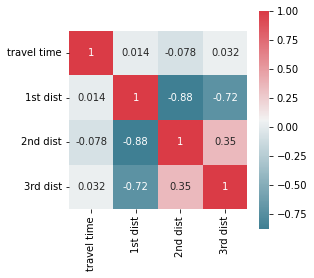

In [22]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(4,4))
corr = df7[['travel time','1st dist','2nd dist','3rd dist']].corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [27]:
x = np.array(df7[['est_dist','1st dist','2nd dist','3rd dist']])
y = np.array(df7['travel time'])
x

array([[0.51987632, 0.94467365, 0.04038058, 0.01410882],
       [0.52859023, 0.94441088, 0.04119555, 0.01439357],
       [0.25828517, 0.82235041, 0.07274555, 0.05386634],
       ...,
       [0.3307786 , 0.75160274, 0.19354891, 0.03403282],
       [0.5988515 , 0.91887968, 0.0592875 , 0.02183282],
       [0.16588275, 0.63314276, 0.20360244, 0.14713828]])

In [28]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
print(X_train.shape)
print(X_test.shape)
# X_train

(6525, 4)
(1632, 4)


In [30]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_4 = nnmodel_(10, num_hlayers=1,Epoch=500)
model6_1_4

Epoch 1/500
204/204 [==============================] - 1s 2ms/step - loss: 764262.3125 - mape: 99.8869 - rmse: 874.2209 - val_loss: 794525.8750 - val_mape: 99.7386 - val_rmse: 891.3618
Epoch 2/500
204/204 [==============================] - 1s 3ms/step - loss: 760460.6875 - mape: 99.4915 - rmse: 872.0439 - val_loss: 789286.1875 - val_mape: 99.1960 - val_rmse: 888.4178
Epoch 3/500
204/204 [==============================] - 1s 3ms/step - loss: 753911.5625 - mape: 98.8014 - rmse: 868.2808 - val_loss: 781277.5000 - val_mape: 98.3598 - val_rmse: 883.8990
Epoch 4/500
204/204 [==============================] - 1s 3ms/step - loss: 744735.6875 - mape: 97.8126 - rmse: 862.9807 - val_loss: 770718.7500 - val_mape: 97.2472 - val_rmse: 877.9059
Epoch 5/500
204/204 [==============================] - 1s 3ms/step - loss: 733162.2500 - mape: 96.5630 - rmse: 856.2490 - val_loss: 757869.4375 - val_mape: 95.8794 - val_rmse: 870.5569
Epoch 6/500
204/204 [==============================] - 1s 3ms/step - loss: 

Epoch 45/500
204/204 [==============================] - 0s 740us/step - loss: 133097.5000 - mape: 48.7283 - rmse: 364.8253 - val_loss: 148225.3750 - val_mape: 49.0687 - val_rmse: 385.0005
Epoch 46/500
204/204 [==============================] - 0s 764us/step - loss: 132198.9688 - mape: 49.3648 - rmse: 363.5918 - val_loss: 147279.0938 - val_mape: 49.5543 - val_rmse: 383.7696
Epoch 47/500
204/204 [==============================] - 0s 733us/step - loss: 131445.6875 - mape: 49.7569 - rmse: 362.5544 - val_loss: 146450.3125 - val_mape: 49.9596 - val_rmse: 382.6883
Epoch 48/500
204/204 [==============================] - 0s 720us/step - loss: 130785.1406 - mape: 50.1179 - rmse: 361.6423 - val_loss: 145732.2344 - val_mape: 50.2387 - val_rmse: 381.7489
Epoch 49/500
204/204 [==============================] - 0s 725us/step - loss: 130179.7891 - mape: 50.3889 - rmse: 360.8044 - val_loss: 145078.4688 - val_mape: 50.4082 - val_rmse: 380.8917
Epoch 50/500
204/204 [==============================] - 0s 7

Epoch 132/500
204/204 [==============================] - 0s 757us/step - loss: 80092.7031 - mape: 34.9435 - rmse: 283.0065 - val_loss: 95739.5625 - val_mape: 34.5642 - val_rmse: 309.4181
Epoch 133/500
204/204 [==============================] - 0s 765us/step - loss: 79697.5078 - mape: 34.7308 - rmse: 282.3075 - val_loss: 95375.4609 - val_mape: 34.3149 - val_rmse: 308.8292
Epoch 134/500
204/204 [==============================] - 0s 736us/step - loss: 79313.7188 - mape: 34.3979 - rmse: 281.6269 - val_loss: 94984.0625 - val_mape: 34.1683 - val_rmse: 308.1949
Epoch 135/500
204/204 [==============================] - 0s 754us/step - loss: 78941.5000 - mape: 34.3277 - rmse: 280.9653 - val_loss: 94628.3984 - val_mape: 33.9524 - val_rmse: 307.6173
Epoch 136/500
204/204 [==============================] - 0s 732us/step - loss: 78577.7500 - mape: 33.9843 - rmse: 280.3172 - val_loss: 94281.5000 - val_mape: 33.7228 - val_rmse: 307.0529
Epoch 137/500
204/204 [==============================] - 0s 789us

Epoch 176/500
204/204 [==============================] - 0s 729us/step - loss: 71672.7500 - mape: 28.3638 - rmse: 267.7177 - val_loss: 87734.0391 - val_mape: 27.9558 - val_rmse: 296.1993
Epoch 177/500
204/204 [==============================] - 0s 798us/step - loss: 71627.9062 - mape: 28.2266 - rmse: 267.6339 - val_loss: 87681.2031 - val_mape: 27.9167 - val_rmse: 296.1101
Epoch 178/500
204/204 [==============================] - 0s 713us/step - loss: 71587.8281 - mape: 28.2753 - rmse: 267.5590 - val_loss: 87640.1562 - val_mape: 27.8510 - val_rmse: 296.0408
Epoch 179/500
204/204 [==============================] - 0s 778us/step - loss: 71549.7656 - mape: 28.2208 - rmse: 267.4879 - val_loss: 87637.7734 - val_mape: 27.6737 - val_rmse: 296.0368
Epoch 180/500
204/204 [==============================] - 0s 778us/step - loss: 71511.8906 - mape: 28.0569 - rmse: 267.4171 - val_loss: 87581.8516 - val_mape: 27.6826 - val_rmse: 295.9423
Epoch 181/500
204/204 [==============================] - 0s 729us

Epoch 220/500
204/204 [==============================] - 0s 791us/step - loss: 71050.9531 - mape: 26.7806 - rmse: 266.5538 - val_loss: 87141.3984 - val_mape: 26.3275 - val_rmse: 295.1972
Epoch 221/500
204/204 [==============================] - 0s 736us/step - loss: 71044.8125 - mape: 26.7743 - rmse: 266.5423 - val_loss: 87132.7422 - val_mape: 26.3355 - val_rmse: 295.1826
Epoch 222/500
204/204 [==============================] - 0s 725us/step - loss: 71042.7891 - mape: 26.8484 - rmse: 266.5385 - val_loss: 87138.7656 - val_mape: 26.2930 - val_rmse: 295.1927
Epoch 223/500
204/204 [==============================] - 0s 729us/step - loss: 71045.2109 - mape: 26.7695 - rmse: 266.5431 - val_loss: 87127.2422 - val_mape: 26.3152 - val_rmse: 295.1732
Epoch 224/500
204/204 [==============================] - 0s 731us/step - loss: 71041.7266 - mape: 26.7471 - rmse: 266.5365 - val_loss: 87121.8125 - val_mape: 26.3144 - val_rmse: 295.1640
Epoch 225/500
204/204 [==============================] - 0s 729us

Epoch 264/500
204/204 [==============================] - 0s 754us/step - loss: 71014.5234 - mape: 26.5589 - rmse: 266.4855 - val_loss: 87072.8906 - val_mape: 26.1069 - val_rmse: 295.0811
Epoch 265/500
204/204 [==============================] - 0s 729us/step - loss: 71016.1641 - mape: 26.5579 - rmse: 266.4886 - val_loss: 87080.0000 - val_mape: 26.0821 - val_rmse: 295.0932
Epoch 266/500
204/204 [==============================] - 0s 725us/step - loss: 71018.6172 - mape: 26.5897 - rmse: 266.4932 - val_loss: 87087.1641 - val_mape: 26.0542 - val_rmse: 295.1053
Epoch 267/500
204/204 [==============================] - 0s 709us/step - loss: 71014.5781 - mape: 26.4971 - rmse: 266.4856 - val_loss: 87066.3125 - val_mape: 26.1172 - val_rmse: 295.0700
Epoch 268/500
204/204 [==============================] - 0s 749us/step - loss: 71016.1172 - mape: 26.5539 - rmse: 266.4885 - val_loss: 87067.4297 - val_mape: 26.1107 - val_rmse: 295.0719
Epoch 269/500
204/204 [==============================] - 0s 743us

Epoch 308/500
204/204 [==============================] - 0s 744us/step - loss: 71007.1719 - mape: 26.5077 - rmse: 266.4717 - val_loss: 87050.4531 - val_mape: 26.0552 - val_rmse: 295.0432
Epoch 309/500
204/204 [==============================] - 0s 779us/step - loss: 71003.2500 - mape: 26.5404 - rmse: 266.4644 - val_loss: 87042.1250 - val_mape: 26.0803 - val_rmse: 295.0290
Epoch 310/500
204/204 [==============================] - 0s 729us/step - loss: 71007.1250 - mape: 26.5485 - rmse: 266.4716 - val_loss: 87038.2422 - val_mape: 26.0929 - val_rmse: 295.0224
Epoch 311/500
204/204 [==============================] - 0s 729us/step - loss: 71004.7891 - mape: 26.5536 - rmse: 266.4672 - val_loss: 87052.1875 - val_mape: 26.0451 - val_rmse: 295.0461
Epoch 312/500
204/204 [==============================] - 0s 721us/step - loss: 71004.1172 - mape: 26.5631 - rmse: 266.4660 - val_loss: 87055.2734 - val_mape: 26.0332 - val_rmse: 295.0513
Epoch 313/500
204/204 [==============================] - 0s 744us

Epoch 352/500
204/204 [==============================] - 0s 724us/step - loss: 70996.7422 - mape: 26.5828 - rmse: 266.4521 - val_loss: 87035.5469 - val_mape: 26.0375 - val_rmse: 295.0179
Epoch 353/500
204/204 [==============================] - 0s 744us/step - loss: 70994.7891 - mape: 26.4881 - rmse: 266.4485 - val_loss: 87044.8594 - val_mape: 26.0088 - val_rmse: 295.0337
Epoch 354/500
204/204 [==============================] - 0s 768us/step - loss: 70995.6797 - mape: 26.5407 - rmse: 266.4501 - val_loss: 87032.3828 - val_mape: 26.0464 - val_rmse: 295.0125
Epoch 355/500
204/204 [==============================] - 0s 749us/step - loss: 71000.8750 - mape: 26.5500 - rmse: 266.4599 - val_loss: 87028.6250 - val_mape: 26.0570 - val_rmse: 295.0061
Epoch 356/500
204/204 [==============================] - 0s 763us/step - loss: 70996.0078 - mape: 26.4639 - rmse: 266.4508 - val_loss: 87014.3047 - val_mape: 26.1022 - val_rmse: 294.9819
Epoch 357/500
204/204 [==============================] - 0s 755us

Epoch 396/500
204/204 [==============================] - 0s 739us/step - loss: 70990.8281 - mape: 26.5642 - rmse: 266.4410 - val_loss: 87029.8203 - val_mape: 26.0077 - val_rmse: 295.0082
Epoch 397/500
204/204 [==============================] - 0s 813us/step - loss: 70988.0234 - mape: 26.4574 - rmse: 266.4358 - val_loss: 87018.6953 - val_mape: 26.0427 - val_rmse: 294.9893
Epoch 398/500
204/204 [==============================] - 0s 774us/step - loss: 70992.1016 - mape: 26.5187 - rmse: 266.4434 - val_loss: 87005.4609 - val_mape: 26.0829 - val_rmse: 294.9669
Epoch 399/500
204/204 [==============================] - 0s 809us/step - loss: 70987.5312 - mape: 26.5146 - rmse: 266.4348 - val_loss: 86996.8828 - val_mape: 26.1088 - val_rmse: 294.9523
Epoch 400/500
204/204 [==============================] - 0s 719us/step - loss: 70986.4453 - mape: 26.5239 - rmse: 266.4328 - val_loss: 87023.0859 - val_mape: 26.0229 - val_rmse: 294.9968
Epoch 401/500
204/204 [==============================] - 0s 749us

Epoch 440/500
204/204 [==============================] - 0s 734us/step - loss: 70980.1406 - mape: 26.5567 - rmse: 266.4210 - val_loss: 86999.7656 - val_mape: 26.0596 - val_rmse: 294.9572
Epoch 441/500
204/204 [==============================] - 0s 779us/step - loss: 70978.9531 - mape: 26.5326 - rmse: 266.4188 - val_loss: 87007.9375 - val_mape: 26.0336 - val_rmse: 294.9711
Epoch 442/500
204/204 [==============================] - 0s 814us/step - loss: 70980.4219 - mape: 26.4417 - rmse: 266.4215 - val_loss: 87004.8047 - val_mape: 26.0420 - val_rmse: 294.9658
Epoch 443/500
204/204 [==============================] - 0s 757us/step - loss: 70982.7266 - mape: 26.5959 - rmse: 266.4258 - val_loss: 87019.1641 - val_mape: 25.9986 - val_rmse: 294.9901
Epoch 444/500
204/204 [==============================] - 0s 754us/step - loss: 70978.7109 - mape: 26.5509 - rmse: 266.4183 - val_loss: 87004.8203 - val_mape: 26.0408 - val_rmse: 294.9658
Epoch 445/500
204/204 [==============================] - 0s 734us

Epoch 484/500
204/204 [==============================] - 0s 714us/step - loss: 70971.9922 - mape: 26.5664 - rmse: 266.4057 - val_loss: 87009.4688 - val_mape: 25.9961 - val_rmse: 294.9737
Epoch 485/500
204/204 [==============================] - 0s 734us/step - loss: 70974.1719 - mape: 26.4852 - rmse: 266.4098 - val_loss: 87004.6016 - val_mape: 26.0095 - val_rmse: 294.9654
Epoch 486/500
204/204 [==============================] - 0s 723us/step - loss: 70970.6406 - mape: 26.5109 - rmse: 266.4032 - val_loss: 86989.9688 - val_mape: 26.0516 - val_rmse: 294.9406
Epoch 487/500
204/204 [==============================] - 0s 782us/step - loss: 70974.6797 - mape: 26.5366 - rmse: 266.4107 - val_loss: 86973.7266 - val_mape: 26.1055 - val_rmse: 294.9131
Epoch 488/500
204/204 [==============================] - 0s 749us/step - loss: 70968.2812 - mape: 26.6111 - rmse: 266.3987 - val_loss: 86997.9141 - val_mape: 26.0240 - val_rmse: 294.9541
Epoch 489/500
204/204 [==============================] - 0s 759us

In [31]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_3 = nnmodel_(50, num_hlayers=1,Epoch=500)
model6_1_3

Epoch 1/500
204/204 [==============================] - 0s 1ms/step - loss: 762208.3125 - mape: 99.6555 - rmse: 873.0454 - val_loss: 788165.9375 - val_mape: 99.0501 - val_rmse: 887.7871
Epoch 2/500
204/204 [==============================] - 0s 761us/step - loss: 745573.0000 - mape: 97.8615 - rmse: 863.4657 - val_loss: 762830.5000 - val_mape: 96.3596 - val_rmse: 873.4017
Epoch 3/500
204/204 [==============================] - 0s 734us/step - loss: 712344.2500 - mape: 94.2470 - rmse: 844.0049 - val_loss: 721707.0000 - val_mape: 91.8741 - val_rmse: 849.5334
Epoch 4/500
204/204 [==============================] - 0s 739us/step - loss: 665410.0000 - mape: 88.8591 - rmse: 815.7267 - val_loss: 667790.1875 - val_mape: 85.7546 - val_rmse: 817.1843
Epoch 5/500
204/204 [==============================] - 0s 847us/step - loss: 607506.6875 - mape: 82.0155 - rmse: 779.4271 - val_loss: 605170.6875 - val_mape: 78.4134 - val_rmse: 777.9272
Epoch 6/500
204/204 [==============================] - 0s 807us/ste

Epoch 45/500
204/204 [==============================] - 0s 740us/step - loss: 87100.7266 - mape: 37.7610 - rmse: 295.1283 - val_loss: 102151.8438 - val_mape: 37.4845 - val_rmse: 319.6120
Epoch 46/500
204/204 [==============================] - 0s 729us/step - loss: 85733.8906 - mape: 37.2643 - rmse: 292.8035 - val_loss: 100841.2188 - val_mape: 36.8319 - val_rmse: 317.5551
Epoch 47/500
204/204 [==============================] - 0s 758us/step - loss: 84440.1016 - mape: 36.6476 - rmse: 290.5858 - val_loss: 99617.3203 - val_mape: 36.2602 - val_rmse: 315.6221
Epoch 48/500
204/204 [==============================] - 0s 749us/step - loss: 83196.6953 - mape: 36.1706 - rmse: 288.4384 - val_loss: 98446.1016 - val_mape: 35.6271 - val_rmse: 313.7612
Epoch 49/500
204/204 [==============================] - 0s 739us/step - loss: 82058.5859 - mape: 35.4698 - rmse: 286.4587 - val_loss: 97316.8828 - val_mape: 35.2155 - val_rmse: 311.9565
Epoch 50/500
204/204 [==============================] - 0s 739us/ste

204/204 [==============================] - 0s 754us/step - loss: 70926.6719 - mape: 26.7636 - rmse: 266.3206 - val_loss: 86916.1797 - val_mape: 26.2568 - val_rmse: 294.8155
Epoch 90/500
204/204 [==============================] - 0s 729us/step - loss: 70920.3047 - mape: 26.6946 - rmse: 266.3087 - val_loss: 86930.3984 - val_mape: 26.1632 - val_rmse: 294.8396
Epoch 91/500
204/204 [==============================] - 0s 746us/step - loss: 70935.1875 - mape: 26.6371 - rmse: 266.3366 - val_loss: 86931.6641 - val_mape: 26.1122 - val_rmse: 294.8418
Epoch 92/500
204/204 [==============================] - 0s 759us/step - loss: 70912.6406 - mape: 26.6670 - rmse: 266.2943 - val_loss: 86927.3750 - val_mape: 26.0942 - val_rmse: 294.8345
Epoch 93/500
204/204 [==============================] - 0s 732us/step - loss: 70909.5547 - mape: 26.5383 - rmse: 266.2885 - val_loss: 86914.0391 - val_mape: 26.1080 - val_rmse: 294.8119
Epoch 94/500
204/204 [==============================] - 0s 754us/step - loss: 70911

Epoch 133/500
204/204 [==============================] - 0s 789us/step - loss: 70834.0156 - mape: 26.3164 - rmse: 266.1466 - val_loss: 86739.6172 - val_mape: 26.1340 - val_rmse: 294.5159
Epoch 134/500
204/204 [==============================] - 0s 816us/step - loss: 70837.4141 - mape: 26.4377 - rmse: 266.1530 - val_loss: 86758.0312 - val_mape: 26.0604 - val_rmse: 294.5471
Epoch 135/500
204/204 [==============================] - 0s 746us/step - loss: 70840.7969 - mape: 26.5175 - rmse: 266.1593 - val_loss: 86777.2422 - val_mape: 25.9823 - val_rmse: 294.5798
Epoch 136/500
204/204 [==============================] - 0s 761us/step - loss: 70845.3594 - mape: 26.3956 - rmse: 266.1679 - val_loss: 86759.6562 - val_mape: 26.0417 - val_rmse: 294.5499
Epoch 137/500
204/204 [==============================] - 0s 767us/step - loss: 70836.1875 - mape: 26.5141 - rmse: 266.1507 - val_loss: 86757.0781 - val_mape: 26.0347 - val_rmse: 294.5455
Epoch 138/500
204/204 [==============================] - 0s 768us

Epoch 177/500
204/204 [==============================] - 0s 748us/step - loss: 70810.2266 - mape: 26.2647 - rmse: 266.1019 - val_loss: 86680.1172 - val_mape: 26.0953 - val_rmse: 294.4149
Epoch 178/500
204/204 [==============================] - 0s 771us/step - loss: 70833.9531 - mape: 26.4894 - rmse: 266.1465 - val_loss: 86701.6406 - val_mape: 26.0114 - val_rmse: 294.4514
Epoch 179/500
204/204 [==============================] - 0s 765us/step - loss: 70804.5703 - mape: 26.4755 - rmse: 266.0913 - val_loss: 86743.3125 - val_mape: 25.8639 - val_rmse: 294.5222
Epoch 180/500
204/204 [==============================] - 0s 774us/step - loss: 70800.8594 - mape: 26.4792 - rmse: 266.0843 - val_loss: 86786.2812 - val_mape: 25.7368 - val_rmse: 294.5951
Epoch 181/500
204/204 [==============================] - 0s 790us/step - loss: 70805.4688 - mape: 26.4513 - rmse: 266.0930 - val_loss: 86794.4922 - val_mape: 25.7094 - val_rmse: 294.6090
Epoch 182/500
204/204 [==============================] - 0s 749us

Epoch 221/500
204/204 [==============================] - 0s 734us/step - loss: 70770.0938 - mape: 26.3565 - rmse: 266.0265 - val_loss: 86631.8359 - val_mape: 26.0523 - val_rmse: 294.3329
Epoch 222/500
204/204 [==============================] - 0s 741us/step - loss: 70770.3828 - mape: 26.3878 - rmse: 266.0270 - val_loss: 86628.6562 - val_mape: 26.0574 - val_rmse: 294.3275
Epoch 223/500
204/204 [==============================] - 0s 734us/step - loss: 70779.0391 - mape: 26.4862 - rmse: 266.0433 - val_loss: 86625.4609 - val_mape: 26.0648 - val_rmse: 294.3220
Epoch 224/500
204/204 [==============================] - 0s 755us/step - loss: 70766.1484 - mape: 26.4233 - rmse: 266.0191 - val_loss: 86642.8438 - val_mape: 25.9979 - val_rmse: 294.3516
Epoch 225/500
204/204 [==============================] - 0s 740us/step - loss: 70764.0312 - mape: 26.3538 - rmse: 266.0151 - val_loss: 86653.0000 - val_mape: 25.9659 - val_rmse: 294.3688
Epoch 226/500
204/204 [==============================] - 0s 719us

Epoch 265/500
204/204 [==============================] - 0s 811us/step - loss: 70732.7891 - mape: 26.3293 - rmse: 265.9564 - val_loss: 86633.0859 - val_mape: 25.8468 - val_rmse: 294.3350
Epoch 266/500
204/204 [==============================] - 0s 805us/step - loss: 70719.3984 - mape: 26.1980 - rmse: 265.9312 - val_loss: 86568.1562 - val_mape: 26.0708 - val_rmse: 294.2247
Epoch 267/500
204/204 [==============================] - 0s 724us/step - loss: 70739.6406 - mape: 26.5970 - rmse: 265.9692 - val_loss: 86632.0000 - val_mape: 25.8439 - val_rmse: 294.3331
Epoch 268/500
204/204 [==============================] - 0s 737us/step - loss: 70730.9141 - mape: 26.3932 - rmse: 265.9529 - val_loss: 86607.1875 - val_mape: 25.9116 - val_rmse: 294.2910
Epoch 269/500
204/204 [==============================] - 0s 731us/step - loss: 70730.6406 - mape: 26.4941 - rmse: 265.9523 - val_loss: 86675.3125 - val_mape: 25.7135 - val_rmse: 294.4067
Epoch 270/500
204/204 [==============================] - 0s 739us

Epoch 309/500
204/204 [==============================] - 0s 834us/step - loss: 70700.3438 - mape: 26.3144 - rmse: 265.8954 - val_loss: 86544.5625 - val_mape: 25.9645 - val_rmse: 294.1846
Epoch 310/500
204/204 [==============================] - 0s 768us/step - loss: 70694.5625 - mape: 26.4911 - rmse: 265.8845 - val_loss: 86571.2031 - val_mape: 25.8717 - val_rmse: 294.2299
Epoch 311/500
204/204 [==============================] - 0s 769us/step - loss: 70706.1484 - mape: 26.3387 - rmse: 265.9063 - val_loss: 86565.9609 - val_mape: 25.8872 - val_rmse: 294.2209
Epoch 312/500
204/204 [==============================] - 0s 766us/step - loss: 70698.1641 - mape: 26.3919 - rmse: 265.8913 - val_loss: 86550.8438 - val_mape: 25.9310 - val_rmse: 294.1953
Epoch 313/500
204/204 [==============================] - 0s 775us/step - loss: 70697.3594 - mape: 26.4721 - rmse: 265.8897 - val_loss: 86585.2031 - val_mape: 25.8173 - val_rmse: 294.2536
Epoch 314/500
204/204 [==============================] - 0s 752us

Epoch 353/500
204/204 [==============================] - 0s 729us/step - loss: 70656.6953 - mape: 26.6651 - rmse: 265.8133 - val_loss: 86630.6562 - val_mape: 25.5481 - val_rmse: 294.3309
Epoch 354/500
204/204 [==============================] - 0s 798us/step - loss: 70671.6484 - mape: 26.2388 - rmse: 265.8414 - val_loss: 86554.7031 - val_mape: 25.7428 - val_rmse: 294.2018
Epoch 355/500
204/204 [==============================] - 0s 727us/step - loss: 70662.7188 - mape: 26.3309 - rmse: 265.8246 - val_loss: 86494.6953 - val_mape: 25.9307 - val_rmse: 294.0998
Epoch 356/500
204/204 [==============================] - 0s 734us/step - loss: 70663.6328 - mape: 26.3992 - rmse: 265.8263 - val_loss: 86530.6094 - val_mape: 25.8057 - val_rmse: 294.1609
Epoch 357/500
204/204 [==============================] - 0s 730us/step - loss: 70657.2578 - mape: 26.3051 - rmse: 265.8143 - val_loss: 86479.1875 - val_mape: 25.9772 - val_rmse: 294.0734
Epoch 358/500
204/204 [==============================] - 0s 818us

Epoch 397/500
204/204 [==============================] - 0s 825us/step - loss: 70628.8672 - mape: 26.1961 - rmse: 265.7609 - val_loss: 86438.5859 - val_mape: 25.9390 - val_rmse: 294.0044
Epoch 398/500
204/204 [==============================] - 0s 742us/step - loss: 70624.9922 - mape: 26.3925 - rmse: 265.7536 - val_loss: 86474.3594 - val_mape: 25.8138 - val_rmse: 294.0652
Epoch 399/500
204/204 [==============================] - 0s 790us/step - loss: 70624.9922 - mape: 26.3326 - rmse: 265.7536 - val_loss: 86415.2188 - val_mape: 26.0189 - val_rmse: 293.9647
Epoch 400/500
204/204 [==============================] - 0s 883us/step - loss: 70628.7578 - mape: 26.4670 - rmse: 265.7607 - val_loss: 86484.0078 - val_mape: 25.7781 - val_rmse: 294.0816
Epoch 401/500
204/204 [==============================] - 0s 856us/step - loss: 70631.7422 - mape: 26.3600 - rmse: 265.7663 - val_loss: 86492.6641 - val_mape: 25.7447 - val_rmse: 294.0963
Epoch 402/500
204/204 [==============================] - 0s 752us

Epoch 441/500
204/204 [==============================] - 0s 783us/step - loss: 70602.9141 - mape: 26.2563 - rmse: 265.7121 - val_loss: 86462.8438 - val_mape: 25.6935 - val_rmse: 294.0457
Epoch 442/500
204/204 [==============================] - 0s 768us/step - loss: 70611.9922 - mape: 26.3352 - rmse: 265.7292 - val_loss: 86411.7031 - val_mape: 25.8467 - val_rmse: 293.9587
Epoch 443/500
204/204 [==============================] - 0s 735us/step - loss: 70598.4375 - mape: 26.4160 - rmse: 265.7037 - val_loss: 86403.5781 - val_mape: 25.8670 - val_rmse: 293.9449
Epoch 444/500
204/204 [==============================] - 0s 719us/step - loss: 70593.0312 - mape: 26.2304 - rmse: 265.6935 - val_loss: 86357.5312 - val_mape: 26.0408 - val_rmse: 293.8665
Epoch 445/500
204/204 [==============================] - 0s 717us/step - loss: 70590.7500 - mape: 26.5729 - rmse: 265.6892 - val_loss: 86533.9297 - val_mape: 25.4978 - val_rmse: 294.1665
Epoch 446/500
204/204 [==============================] - 0s 724us

Epoch 485/500
204/204 [==============================] - 0s 727us/step - loss: 70569.9766 - mape: 26.3622 - rmse: 265.6501 - val_loss: 86448.5625 - val_mape: 25.6179 - val_rmse: 294.0214
Epoch 486/500
204/204 [==============================] - 0s 723us/step - loss: 70575.6016 - mape: 26.3627 - rmse: 265.6607 - val_loss: 86401.4375 - val_mape: 25.7512 - val_rmse: 293.9412
Epoch 487/500
204/204 [==============================] - 0s 739us/step - loss: 70564.6875 - mape: 26.2280 - rmse: 265.6401 - val_loss: 86319.3516 - val_mape: 26.0257 - val_rmse: 293.8015
Epoch 488/500
204/204 [==============================] - 0s 740us/step - loss: 70567.1719 - mape: 26.4207 - rmse: 265.6448 - val_loss: 86366.4219 - val_mape: 25.8505 - val_rmse: 293.8817
Epoch 489/500
204/204 [==============================] - 0s 744us/step - loss: 70574.7969 - mape: 26.2433 - rmse: 265.6592 - val_loss: 86353.8438 - val_mape: 25.8891 - val_rmse: 293.8603
Epoch 490/500
204/204 [==============================] - 0s 743us

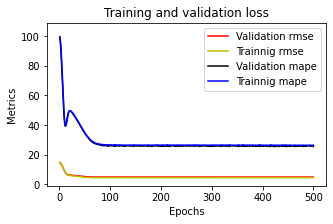

In [32]:
plotme(model6_1_3)

In [33]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_5 = nnmodel_(100, num_hlayers=1,Epoch=500)
model6_1_5

Epoch 1/500
204/204 [==============================] - 0s 1ms/step - loss: 758308.5625 - mape: 99.2458 - rmse: 870.8091 - val_loss: 778026.5000 - val_mape: 97.9988 - val_rmse: 882.0581
Epoch 2/500
204/204 [==============================] - 0s 767us/step - loss: 724473.8750 - mape: 95.5285 - rmse: 851.1603 - val_loss: 727989.5625 - val_mape: 92.5997 - val_rmse: 853.2230
Epoch 3/500
204/204 [==============================] - 0s 753us/step - loss: 661303.7500 - mape: 88.4322 - rmse: 813.2059 - val_loss: 651062.1250 - val_mape: 83.8415 - val_rmse: 806.8842
Epoch 4/500
204/204 [==============================] - 0s 741us/step - loss: 576780.3750 - mape: 78.2661 - rmse: 759.4606 - val_loss: 558566.6875 - val_mape: 72.9824 - val_rmse: 747.3732
Epoch 5/500
204/204 [==============================] - 0s 756us/step - loss: 483166.9375 - mape: 67.0160 - rmse: 695.1021 - val_loss: 462687.2188 - val_mape: 61.6651 - val_rmse: 680.2112
Epoch 6/500
204/204 [==============================] - 0s 757us/ste

Epoch 45/500
204/204 [==============================] - 0s 818us/step - loss: 71847.4609 - mape: 28.5578 - rmse: 268.0438 - val_loss: 87851.1016 - val_mape: 27.7276 - val_rmse: 296.3969
Epoch 46/500
204/204 [==============================] - 0s 743us/step - loss: 71621.1875 - mape: 28.0721 - rmse: 267.6213 - val_loss: 87513.4688 - val_mape: 27.9173 - val_rmse: 295.8268
Epoch 47/500
204/204 [==============================] - 0s 773us/step - loss: 71455.7266 - mape: 28.0770 - rmse: 267.3120 - val_loss: 87343.2266 - val_mape: 27.7285 - val_rmse: 295.5389
Epoch 48/500
204/204 [==============================] - 0s 762us/step - loss: 71327.1641 - mape: 27.8017 - rmse: 267.0715 - val_loss: 87382.4375 - val_mape: 26.9561 - val_rmse: 295.6052
Epoch 49/500
204/204 [==============================] - 0s 774us/step - loss: 71216.1172 - mape: 27.5268 - rmse: 266.8635 - val_loss: 87166.2266 - val_mape: 27.1499 - val_rmse: 295.2393
Epoch 50/500
204/204 [==============================] - 0s 762us/step 

204/204 [==============================] - 0s 763us/step - loss: 70795.5312 - mape: 26.4873 - rmse: 266.0743 - val_loss: 86832.8438 - val_mape: 25.5356 - val_rmse: 294.6741
Epoch 90/500
204/204 [==============================] - 0s 747us/step - loss: 70784.6562 - mape: 26.1823 - rmse: 266.0539 - val_loss: 86619.2422 - val_mape: 26.2472 - val_rmse: 294.3115
Epoch 91/500
204/204 [==============================] - 0s 756us/step - loss: 70807.4766 - mape: 26.4082 - rmse: 266.0967 - val_loss: 86615.7422 - val_mape: 26.2386 - val_rmse: 294.3055
Epoch 92/500
204/204 [==============================] - 0s 742us/step - loss: 70794.7578 - mape: 26.3755 - rmse: 266.0728 - val_loss: 86602.2344 - val_mape: 26.2994 - val_rmse: 294.2826
Epoch 93/500
204/204 [==============================] - 0s 744us/step - loss: 70795.6953 - mape: 26.3990 - rmse: 266.0746 - val_loss: 86627.5469 - val_mape: 26.1661 - val_rmse: 294.3256
Epoch 94/500
204/204 [==============================] - 0s 742us/step - loss: 70804

Epoch 133/500
204/204 [==============================] - 0s 753us/step - loss: 70777.9922 - mape: 26.4353 - rmse: 266.0413 - val_loss: 86744.0469 - val_mape: 25.5351 - val_rmse: 294.5234
Epoch 134/500
204/204 [==============================] - 0s 783us/step - loss: 70746.9297 - mape: 26.3232 - rmse: 265.9829 - val_loss: 86671.3984 - val_mape: 25.7207 - val_rmse: 294.4001
Epoch 135/500
204/204 [==============================] - 0s 791us/step - loss: 70746.6406 - mape: 26.3712 - rmse: 265.9824 - val_loss: 86612.2031 - val_mape: 25.9037 - val_rmse: 294.2995
Epoch 136/500
204/204 [==============================] - 0s 785us/step - loss: 70742.7344 - mape: 26.2250 - rmse: 265.9751 - val_loss: 86542.3828 - val_mape: 26.1648 - val_rmse: 294.1809
Epoch 137/500
204/204 [==============================] - 0s 812us/step - loss: 70740.8906 - mape: 26.6724 - rmse: 265.9716 - val_loss: 86750.0000 - val_mape: 25.5056 - val_rmse: 294.5335
Epoch 138/500
204/204 [==============================] - 0s 806us

Epoch 177/500
204/204 [==============================] - 0s 785us/step - loss: 70720.3594 - mape: 26.1136 - rmse: 265.9330 - val_loss: 86455.5859 - val_mape: 26.2382 - val_rmse: 294.0333
Epoch 178/500
204/204 [==============================] - 0s 912us/step - loss: 70714.8047 - mape: 26.4862 - rmse: 265.9225 - val_loss: 86490.0703 - val_mape: 26.0725 - val_rmse: 294.0919
Epoch 179/500
204/204 [==============================] - 0s 751us/step - loss: 70711.4531 - mape: 26.3803 - rmse: 265.9163 - val_loss: 86557.5469 - val_mape: 25.8159 - val_rmse: 294.2066
Epoch 180/500
204/204 [==============================] - 0s 757us/step - loss: 70694.9531 - mape: 26.2042 - rmse: 265.8852 - val_loss: 86483.5859 - val_mape: 26.0975 - val_rmse: 294.0809
Epoch 181/500
204/204 [==============================] - 0s 781us/step - loss: 70713.7812 - mape: 26.4248 - rmse: 265.9206 - val_loss: 86530.7422 - val_mape: 25.9047 - val_rmse: 294.1611
Epoch 182/500
204/204 [==============================] - 0s 770us

Epoch 221/500
204/204 [==============================] - 0s 742us/step - loss: 70666.5078 - mape: 26.2476 - rmse: 265.8317 - val_loss: 86506.2734 - val_mape: 25.7623 - val_rmse: 294.1195
Epoch 222/500
204/204 [==============================] - 0s 767us/step - loss: 70660.6562 - mape: 26.4340 - rmse: 265.8207 - val_loss: 86554.8828 - val_mape: 25.6145 - val_rmse: 294.2021
Epoch 223/500
204/204 [==============================] - 0s 744us/step - loss: 70649.8281 - mape: 26.3828 - rmse: 265.8004 - val_loss: 86612.5859 - val_mape: 25.4637 - val_rmse: 294.3002
Epoch 224/500
204/204 [==============================] - 0s 753us/step - loss: 70647.8594 - mape: 26.1710 - rmse: 265.7967 - val_loss: 86426.7031 - val_mape: 26.0185 - val_rmse: 293.9842
Epoch 225/500
204/204 [==============================] - 0s 759us/step - loss: 70648.7734 - mape: 26.4358 - rmse: 265.7984 - val_loss: 86512.3516 - val_mape: 25.7226 - val_rmse: 294.1298
Epoch 226/500
204/204 [==============================] - 0s 748us

Epoch 265/500
204/204 [==============================] - 0s 774us/step - loss: 70621.5859 - mape: 26.3174 - rmse: 265.7472 - val_loss: 86441.3203 - val_mape: 25.7395 - val_rmse: 294.0090
Epoch 266/500
204/204 [==============================] - 0s 749us/step - loss: 70615.5781 - mape: 26.1205 - rmse: 265.7359 - val_loss: 86307.2812 - val_mape: 26.2827 - val_rmse: 293.7810
Epoch 267/500
204/204 [==============================] - 0s 765us/step - loss: 70612.9922 - mape: 26.5262 - rmse: 265.7310 - val_loss: 86498.9922 - val_mape: 25.5762 - val_rmse: 294.1071
Epoch 268/500
204/204 [==============================] - 0s 895us/step - loss: 70603.5469 - mape: 26.2497 - rmse: 265.7133 - val_loss: 86370.0859 - val_mape: 25.9828 - val_rmse: 293.8879
Epoch 269/500
204/204 [==============================] - 0s 766us/step - loss: 70595.5781 - mape: 26.4783 - rmse: 265.6983 - val_loss: 86505.5312 - val_mape: 25.5453 - val_rmse: 294.1182
Epoch 270/500
204/204 [==============================] - 0s 759us

Epoch 309/500
204/204 [==============================] - 0s 765us/step - loss: 70566.7578 - mape: 26.3481 - rmse: 265.6440 - val_loss: 86360.1797 - val_mape: 25.7837 - val_rmse: 293.8710
Epoch 310/500
204/204 [==============================] - 0s 775us/step - loss: 70562.4297 - mape: 26.3245 - rmse: 265.6359 - val_loss: 86349.5000 - val_mape: 25.8140 - val_rmse: 293.8528
Epoch 311/500
204/204 [==============================] - 0s 810us/step - loss: 70575.2344 - mape: 26.4125 - rmse: 265.6600 - val_loss: 86465.7188 - val_mape: 25.4762 - val_rmse: 294.0505
Epoch 312/500
204/204 [==============================] - 0s 775us/step - loss: 70585.8047 - mape: 26.2080 - rmse: 265.6799 - val_loss: 86352.4766 - val_mape: 25.7979 - val_rmse: 293.8579
Epoch 313/500
204/204 [==============================] - 0s 785us/step - loss: 70572.5859 - mape: 26.3432 - rmse: 265.6550 - val_loss: 86383.5703 - val_mape: 25.6941 - val_rmse: 293.9108
Epoch 314/500
204/204 [==============================] - 0s 787us

Epoch 353/500
204/204 [==============================] - 0s 785us/step - loss: 70523.8125 - mape: 26.3050 - rmse: 265.5632 - val_loss: 86315.4219 - val_mape: 25.7158 - val_rmse: 293.7949
Epoch 354/500
204/204 [==============================] - 0s 782us/step - loss: 70519.7656 - mape: 26.4872 - rmse: 265.5556 - val_loss: 86466.5859 - val_mape: 25.3036 - val_rmse: 294.0520
Epoch 355/500
204/204 [==============================] - 0s 774us/step - loss: 70534.8906 - mape: 26.0774 - rmse: 265.5840 - val_loss: 86331.0234 - val_mape: 25.6606 - val_rmse: 293.8214
Epoch 356/500
204/204 [==============================] - 0s 770us/step - loss: 70530.4219 - mape: 26.3578 - rmse: 265.5757 - val_loss: 86237.1406 - val_mape: 25.9659 - val_rmse: 293.6616
Epoch 357/500
204/204 [==============================] - 0s 764us/step - loss: 70526.0703 - mape: 26.3185 - rmse: 265.5674 - val_loss: 86277.8438 - val_mape: 25.8315 - val_rmse: 293.7309
Epoch 358/500
204/204 [==============================] - 0s 774us

Epoch 397/500
204/204 [==============================] - 0s 776us/step - loss: 70489.8906 - mape: 26.2570 - rmse: 265.4993 - val_loss: 86198.1953 - val_mape: 25.8971 - val_rmse: 293.5953
Epoch 398/500
204/204 [==============================] - 0s 805us/step - loss: 70482.9766 - mape: 26.3037 - rmse: 265.4863 - val_loss: 86205.2031 - val_mape: 25.8679 - val_rmse: 293.6072
Epoch 399/500
204/204 [==============================] - 0s 769us/step - loss: 70497.7891 - mape: 26.3503 - rmse: 265.5142 - val_loss: 86181.2656 - val_mape: 25.9490 - val_rmse: 293.5665
Epoch 400/500
204/204 [==============================] - 0s 790us/step - loss: 70483.1094 - mape: 26.3628 - rmse: 265.4865 - val_loss: 86221.3516 - val_mape: 25.7978 - val_rmse: 293.6347
Epoch 401/500
204/204 [==============================] - 0s 785us/step - loss: 70475.0469 - mape: 26.2182 - rmse: 265.4714 - val_loss: 86229.6094 - val_mape: 25.7648 - val_rmse: 293.6488
Epoch 402/500
204/204 [==============================] - 0s 792us

Epoch 441/500
204/204 [==============================] - 0s 775us/step - loss: 70447.8281 - mape: 26.2301 - rmse: 265.4201 - val_loss: 86131.8203 - val_mape: 25.9344 - val_rmse: 293.4822
Epoch 442/500
204/204 [==============================] - 0s 818us/step - loss: 70441.0859 - mape: 26.3865 - rmse: 265.4074 - val_loss: 86322.2734 - val_mape: 25.3657 - val_rmse: 293.8065
Epoch 443/500
204/204 [==============================] - 0s 780us/step - loss: 70461.6953 - mape: 26.2749 - rmse: 265.4462 - val_loss: 86248.2031 - val_mape: 25.5584 - val_rmse: 293.6805
Epoch 444/500
204/204 [==============================] - 0s 782us/step - loss: 70424.1562 - mape: 26.0898 - rmse: 265.3755 - val_loss: 86029.9297 - val_mape: 26.5014 - val_rmse: 293.3086
Epoch 445/500
204/204 [==============================] - 0s 769us/step - loss: 70466.2266 - mape: 26.4231 - rmse: 265.4547 - val_loss: 86219.0625 - val_mape: 25.6327 - val_rmse: 293.6308
Epoch 446/500
204/204 [==============================] - 0s 766us

Epoch 485/500
204/204 [==============================] - 0s 789us/step - loss: 70410.8359 - mape: 26.3994 - rmse: 265.3504 - val_loss: 86203.4609 - val_mape: 25.5308 - val_rmse: 293.6042
Epoch 486/500
204/204 [==============================] - 0s 786us/step - loss: 70429.2031 - mape: 26.2750 - rmse: 265.3850 - val_loss: 86247.3516 - val_mape: 25.4138 - val_rmse: 293.6790
Epoch 487/500
204/204 [==============================] - 0s 805us/step - loss: 70423.5234 - mape: 26.1907 - rmse: 265.3743 - val_loss: 86144.0391 - val_mape: 25.7040 - val_rmse: 293.5031
Epoch 488/500
204/204 [==============================] - 0s 760us/step - loss: 70416.8672 - mape: 26.2308 - rmse: 265.3618 - val_loss: 86100.1797 - val_mape: 25.8403 - val_rmse: 293.4283
Epoch 489/500
204/204 [==============================] - 0s 788us/step - loss: 70422.2031 - mape: 26.3299 - rmse: 265.3718 - val_loss: 86175.4531 - val_mape: 25.6008 - val_rmse: 293.5565
Epoch 490/500
204/204 [==============================] - 0s 775us

In [34]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_1 = nnmodel_(100,50, num_hlayers=2,Epoch=500)
model6_1_1

Epoch 1/500
204/204 [==============================] - 0s 1ms/step - loss: 705250.6250 - mape: 93.2478 - rmse: 839.7920 - val_loss: 560089.9375 - val_mape: 73.1816 - val_rmse: 748.3915
Epoch 2/500
204/204 [==============================] - 0s 877us/step - loss: 259776.1250 - mape: 48.5689 - rmse: 509.6824 - val_loss: 148514.2344 - val_mape: 49.8332 - val_rmse: 385.3755
Epoch 3/500
204/204 [==============================] - 0s 847us/step - loss: 128563.5703 - mape: 51.2439 - rmse: 358.5576 - val_loss: 139898.7188 - val_mape: 48.9015 - val_rmse: 374.0304
Epoch 4/500
204/204 [==============================] - 0s 851us/step - loss: 120155.2109 - mape: 48.9921 - rmse: 346.6341 - val_loss: 130652.5234 - val_mape: 47.9617 - val_rmse: 361.4589
Epoch 5/500
204/204 [==============================] - 0s 889us/step - loss: 111036.7734 - mape: 46.5852 - rmse: 333.2218 - val_loss: 121561.6016 - val_mape: 45.4501 - val_rmse: 348.6569
Epoch 6/500
204/204 [==============================] - 0s 901us/ste

204/204 [==============================] - 0s 832us/step - loss: 70771.1719 - mape: 26.5613 - rmse: 266.0285 - val_loss: 86494.7188 - val_mape: 26.8551 - val_rmse: 294.0999
Epoch 46/500
204/204 [==============================] - 0s 830us/step - loss: 70831.9375 - mape: 26.7529 - rmse: 266.1427 - val_loss: 87443.1953 - val_mape: 24.7469 - val_rmse: 295.7079
Epoch 47/500
204/204 [==============================] - 0s 821us/step - loss: 70831.1953 - mape: 26.4763 - rmse: 266.1413 - val_loss: 86475.1406 - val_mape: 26.8438 - val_rmse: 294.0666
Epoch 48/500
204/204 [==============================] - 0s 828us/step - loss: 70805.9375 - mape: 26.5072 - rmse: 266.0938 - val_loss: 86494.3438 - val_mape: 26.5491 - val_rmse: 294.0992
Epoch 49/500
204/204 [==============================] - 0s 820us/step - loss: 70765.9688 - mape: 26.7836 - rmse: 266.0187 - val_loss: 86512.0312 - val_mape: 26.3850 - val_rmse: 294.1293
Epoch 50/500
204/204 [==============================] - 0s 855us/step - loss: 70788

Epoch 133/500
204/204 [==============================] - 0s 849us/step - loss: 69825.3672 - mape: 26.9250 - rmse: 264.2449 - val_loss: 86070.6797 - val_mape: 24.6968 - val_rmse: 293.3781
Epoch 134/500
204/204 [==============================] - 0s 841us/step - loss: 69768.1016 - mape: 26.6118 - rmse: 264.1365 - val_loss: 85918.1953 - val_mape: 24.8318 - val_rmse: 293.1180
Epoch 135/500
204/204 [==============================] - 0s 841us/step - loss: 69785.6484 - mape: 26.4268 - rmse: 264.1697 - val_loss: 85018.3203 - val_mape: 27.1472 - val_rmse: 291.5790
Epoch 136/500
204/204 [==============================] - 0s 829us/step - loss: 69770.9922 - mape: 26.9243 - rmse: 264.1420 - val_loss: 85239.9141 - val_mape: 25.9050 - val_rmse: 291.9587
Epoch 137/500
204/204 [==============================] - 0s 842us/step - loss: 69731.9062 - mape: 26.5551 - rmse: 264.0680 - val_loss: 85121.1875 - val_mape: 26.2490 - val_rmse: 291.7553
Epoch 138/500
204/204 [==============================] - 0s 830us

Epoch 177/500
204/204 [==============================] - 0s 836us/step - loss: 69415.5547 - mape: 26.6604 - rmse: 263.4683 - val_loss: 84558.3438 - val_mape: 26.1791 - val_rmse: 290.7892
Epoch 178/500
204/204 [==============================] - 0s 832us/step - loss: 69408.1094 - mape: 26.8897 - rmse: 263.4542 - val_loss: 84416.0391 - val_mape: 26.8665 - val_rmse: 290.5444
Epoch 179/500
204/204 [==============================] - 0s 831us/step - loss: 69334.7188 - mape: 26.8456 - rmse: 263.3149 - val_loss: 84599.2188 - val_mape: 25.9141 - val_rmse: 290.8594
Epoch 180/500
204/204 [==============================] - 0s 829us/step - loss: 69299.8203 - mape: 26.7665 - rmse: 263.2486 - val_loss: 84691.6406 - val_mape: 25.7213 - val_rmse: 291.0183
Epoch 181/500
204/204 [==============================] - 0s 827us/step - loss: 69296.9219 - mape: 26.7733 - rmse: 263.2431 - val_loss: 84631.3828 - val_mape: 25.8209 - val_rmse: 290.9147
Epoch 182/500
204/204 [==============================] - 0s 826us

Epoch 221/500
204/204 [==============================] - 0s 817us/step - loss: 69132.3906 - mape: 26.8970 - rmse: 262.9304 - val_loss: 84836.1797 - val_mape: 24.9929 - val_rmse: 291.2665
Epoch 222/500
204/204 [==============================] - 0s 832us/step - loss: 69112.0000 - mape: 26.6508 - rmse: 262.8916 - val_loss: 84054.3516 - val_mape: 27.0854 - val_rmse: 289.9213
Epoch 223/500
204/204 [==============================] - 0s 839us/step - loss: 69069.2969 - mape: 26.7994 - rmse: 262.8104 - val_loss: 84131.3047 - val_mape: 26.3469 - val_rmse: 290.0540
Epoch 224/500
204/204 [==============================] - 0s 848us/step - loss: 69069.4062 - mape: 26.8452 - rmse: 262.8106 - val_loss: 84105.8359 - val_mape: 26.4506 - val_rmse: 290.0101
Epoch 225/500
204/204 [==============================] - 0s 828us/step - loss: 69119.7500 - mape: 26.7928 - rmse: 262.9063 - val_loss: 84135.5703 - val_mape: 26.3989 - val_rmse: 290.0613
Epoch 226/500
204/204 [==============================] - 0s 832us

Epoch 265/500
204/204 [==============================] - 0s 824us/step - loss: 68947.8984 - mape: 26.9806 - rmse: 262.5793 - val_loss: 84138.1641 - val_mape: 25.8389 - val_rmse: 290.0658
Epoch 266/500
204/204 [==============================] - 0s 825us/step - loss: 68873.7188 - mape: 26.8762 - rmse: 262.4380 - val_loss: 84221.2969 - val_mape: 25.6314 - val_rmse: 290.2090
Epoch 267/500
204/204 [==============================] - 0s 853us/step - loss: 68838.2500 - mape: 26.8708 - rmse: 262.3705 - val_loss: 84339.6016 - val_mape: 25.3241 - val_rmse: 290.4128
Epoch 268/500
204/204 [==============================] - 0s 834us/step - loss: 68838.5781 - mape: 26.7994 - rmse: 262.3711 - val_loss: 83895.0469 - val_mape: 26.3610 - val_rmse: 289.6464
Epoch 269/500
204/204 [==============================] - 0s 839us/step - loss: 68851.0703 - mape: 26.8239 - rmse: 262.3949 - val_loss: 83870.2266 - val_mape: 28.0195 - val_rmse: 289.6036
Epoch 270/500
204/204 [==============================] - 0s 824us

Epoch 309/500
204/204 [==============================] - 0s 851us/step - loss: 68804.6406 - mape: 26.9125 - rmse: 262.3064 - val_loss: 83610.1484 - val_mape: 27.2608 - val_rmse: 289.1542
Epoch 310/500
204/204 [==============================] - 0s 834us/step - loss: 68742.8047 - mape: 26.8808 - rmse: 262.1885 - val_loss: 83681.0234 - val_mape: 26.5938 - val_rmse: 289.2767
Epoch 311/500
204/204 [==============================] - 0s 845us/step - loss: 68731.5703 - mape: 27.0537 - rmse: 262.1671 - val_loss: 84313.4922 - val_mape: 25.1564 - val_rmse: 290.3679
Epoch 312/500
204/204 [==============================] - 0s 855us/step - loss: 68787.6641 - mape: 26.8717 - rmse: 262.2740 - val_loss: 83677.1016 - val_mape: 26.6311 - val_rmse: 289.2700
Epoch 313/500
204/204 [==============================] - 0s 819us/step - loss: 68786.4688 - mape: 26.8944 - rmse: 262.2718 - val_loss: 84114.9297 - val_mape: 25.4625 - val_rmse: 290.0257
Epoch 314/500
204/204 [==============================] - 0s 836us

Epoch 353/500
204/204 [==============================] - 0s 817us/step - loss: 68664.9609 - mape: 26.9456 - rmse: 262.0400 - val_loss: 83625.5469 - val_mape: 26.3446 - val_rmse: 289.1808
Epoch 354/500
204/204 [==============================] - 0s 840us/step - loss: 68686.1172 - mape: 26.9023 - rmse: 262.0804 - val_loss: 83560.3750 - val_mape: 26.5105 - val_rmse: 289.0681
Epoch 355/500
204/204 [==============================] - 0s 816us/step - loss: 68674.4609 - mape: 26.8593 - rmse: 262.0581 - val_loss: 83692.5781 - val_mape: 26.0865 - val_rmse: 289.2967
Epoch 356/500
204/204 [==============================] - 0s 825us/step - loss: 68678.4297 - mape: 26.8932 - rmse: 262.0657 - val_loss: 83541.7266 - val_mape: 26.6358 - val_rmse: 289.0359
Epoch 357/500
204/204 [==============================] - 0s 817us/step - loss: 68744.4922 - mape: 27.1859 - rmse: 262.1917 - val_loss: 83558.1641 - val_mape: 26.4437 - val_rmse: 289.0643
Epoch 358/500
204/204 [==============================] - 0s 834us

Epoch 397/500
204/204 [==============================] - 0s 817us/step - loss: 68618.1250 - mape: 26.8695 - rmse: 261.9506 - val_loss: 83393.7578 - val_mape: 27.5098 - val_rmse: 288.7798
Epoch 398/500
204/204 [==============================] - 0s 833us/step - loss: 68595.3203 - mape: 26.9812 - rmse: 261.9071 - val_loss: 83624.0859 - val_mape: 25.9702 - val_rmse: 289.1783
Epoch 399/500
204/204 [==============================] - 0s 841us/step - loss: 68580.6719 - mape: 26.8781 - rmse: 261.8791 - val_loss: 84214.1172 - val_mape: 25.0855 - val_rmse: 290.1967
Epoch 400/500
204/204 [==============================] - 0s 837us/step - loss: 68714.8984 - mape: 26.8581 - rmse: 262.1353 - val_loss: 83917.0703 - val_mape: 25.4654 - val_rmse: 289.6844
Epoch 401/500
204/204 [==============================] - 0s 838us/step - loss: 68594.1484 - mape: 27.0769 - rmse: 261.9048 - val_loss: 83896.5703 - val_mape: 25.5243 - val_rmse: 289.6490
Epoch 402/500
204/204 [==============================] - 0s 824us

Epoch 441/500
204/204 [==============================] - 0s 835us/step - loss: 68544.6484 - mape: 27.0443 - rmse: 261.8103 - val_loss: 83475.8438 - val_mape: 26.1478 - val_rmse: 288.9219
Epoch 442/500
204/204 [==============================] - 0s 814us/step - loss: 68641.5859 - mape: 27.0054 - rmse: 261.9954 - val_loss: 83596.3359 - val_mape: 25.8611 - val_rmse: 289.1303
Epoch 443/500
204/204 [==============================] - 0s 812us/step - loss: 68574.8516 - mape: 26.8677 - rmse: 261.8680 - val_loss: 83448.8203 - val_mape: 26.2079 - val_rmse: 288.8751
Epoch 444/500
204/204 [==============================] - 0s 817us/step - loss: 68573.9688 - mape: 27.0320 - rmse: 261.8663 - val_loss: 83354.1875 - val_mape: 26.5742 - val_rmse: 288.7112
Epoch 445/500
204/204 [==============================] - 0s 810us/step - loss: 68564.3438 - mape: 26.8071 - rmse: 261.8479 - val_loss: 83316.1172 - val_mape: 27.8204 - val_rmse: 288.6453
Epoch 446/500
204/204 [==============================] - 0s 823us

Epoch 485/500
204/204 [==============================] - 0s 825us/step - loss: 68513.8828 - mape: 26.9296 - rmse: 261.7516 - val_loss: 83412.7344 - val_mape: 26.3403 - val_rmse: 288.8126
Epoch 486/500
204/204 [==============================] - 0s 823us/step - loss: 68532.7812 - mape: 27.0504 - rmse: 261.7877 - val_loss: 83722.4375 - val_mape: 25.5304 - val_rmse: 289.3483
Epoch 487/500
204/204 [==============================] - 0s 822us/step - loss: 68500.4375 - mape: 26.9242 - rmse: 261.7259 - val_loss: 83328.5312 - val_mape: 26.3904 - val_rmse: 288.6668
Epoch 488/500
204/204 [==============================] - 0s 834us/step - loss: 68615.5781 - mape: 27.0516 - rmse: 261.9457 - val_loss: 84240.1562 - val_mape: 24.8100 - val_rmse: 290.2415
Epoch 489/500
204/204 [==============================] - 0s 849us/step - loss: 68492.2812 - mape: 26.8700 - rmse: 261.7103 - val_loss: 83268.2344 - val_mape: 26.7509 - val_rmse: 288.5623
Epoch 490/500
204/204 [==============================] - 0s 840us

In [35]:
# plotme(model6_1_1)

In [36]:
# inputs: distance + hour + 1st dist + 2nd dist + 3rd dist
model6_1_2 = nnmodel_(200,100, num_hlayers=2,Epoch=500)
model6_1_2

Epoch 1/500
204/204 [==============================] - 0s 1ms/step - loss: 570675.1250 - mape: 77.9957 - rmse: 755.4304 - val_loss: 198359.0781 - val_mape: 39.7173 - val_rmse: 445.3752
Epoch 2/500
204/204 [==============================] - 0s 893us/step - loss: 132259.3125 - mape: 49.3742 - rmse: 363.6747 - val_loss: 137043.5156 - val_mape: 49.6321 - val_rmse: 370.1939
Epoch 3/500
204/204 [==============================] - 0s 884us/step - loss: 114455.0469 - mape: 47.6938 - rmse: 338.3120 - val_loss: 122090.4375 - val_mape: 45.1954 - val_rmse: 349.4144
Epoch 4/500
204/204 [==============================] - 0s 879us/step - loss: 99208.9922 - mape: 43.0507 - rmse: 314.9746 - val_loss: 107351.7031 - val_mape: 39.9481 - val_rmse: 327.6457
Epoch 5/500
204/204 [==============================] - 0s 889us/step - loss: 85473.9453 - mape: 37.6555 - rmse: 292.3593 - val_loss: 95729.4375 - val_mape: 34.2410 - val_rmse: 309.4017
Epoch 6/500
204/204 [==============================] - 0s 882us/step -

204/204 [==============================] - 0s 884us/step - loss: 70306.4141 - mape: 26.9156 - rmse: 265.1536 - val_loss: 86205.3750 - val_mape: 25.3361 - val_rmse: 293.6075
Epoch 46/500
204/204 [==============================] - 0s 906us/step - loss: 70329.0391 - mape: 26.6882 - rmse: 265.1962 - val_loss: 85661.4766 - val_mape: 26.9799 - val_rmse: 292.6798
Epoch 47/500
204/204 [==============================] - 0s 902us/step - loss: 70282.6250 - mape: 26.7315 - rmse: 265.1087 - val_loss: 85785.9609 - val_mape: 26.2770 - val_rmse: 292.8924
Epoch 48/500
204/204 [==============================] - 0s 893us/step - loss: 70271.4297 - mape: 26.8726 - rmse: 265.0876 - val_loss: 85741.6016 - val_mape: 26.2098 - val_rmse: 292.8167
Epoch 49/500
204/204 [==============================] - 0s 884us/step - loss: 70167.8359 - mape: 26.6374 - rmse: 264.8921 - val_loss: 85823.0000 - val_mape: 26.0623 - val_rmse: 292.9556
Epoch 50/500
204/204 [==============================] - 0s 893us/step - loss: 70266

Epoch 133/500
204/204 [==============================] - 0s 907us/step - loss: 69240.1719 - mape: 27.0281 - rmse: 263.1353 - val_loss: 84523.6562 - val_mape: 25.7692 - val_rmse: 290.7295
Epoch 134/500
204/204 [==============================] - 0s 896us/step - loss: 69268.1406 - mape: 26.9410 - rmse: 263.1884 - val_loss: 84462.1406 - val_mape: 26.0186 - val_rmse: 290.6237
Epoch 135/500
204/204 [==============================] - 0s 890us/step - loss: 69156.4453 - mape: 26.9813 - rmse: 262.9761 - val_loss: 84220.0859 - val_mape: 27.8783 - val_rmse: 290.2070
Epoch 136/500
204/204 [==============================] - 0s 893us/step - loss: 69208.6250 - mape: 26.9906 - rmse: 263.0753 - val_loss: 84347.9922 - val_mape: 26.1195 - val_rmse: 290.4272
Epoch 137/500
204/204 [==============================] - 0s 915us/step - loss: 69204.2656 - mape: 26.9266 - rmse: 263.0670 - val_loss: 84183.5859 - val_mape: 27.8691 - val_rmse: 290.1441
Epoch 138/500
204/204 [==============================] - 0s 910us

Epoch 177/500
204/204 [==============================] - 0s 892us/step - loss: 69085.6172 - mape: 27.0907 - rmse: 262.8414 - val_loss: 84447.0703 - val_mape: 25.4285 - val_rmse: 290.5978
Epoch 178/500
204/204 [==============================] - 0s 931us/step - loss: 69004.9297 - mape: 26.8495 - rmse: 262.6879 - val_loss: 83844.6484 - val_mape: 27.3224 - val_rmse: 289.5594
Epoch 179/500
204/204 [==============================] - 0s 907us/step - loss: 69035.2734 - mape: 26.8872 - rmse: 262.7456 - val_loss: 83994.4531 - val_mape: 28.7086 - val_rmse: 289.8180
Epoch 180/500
204/204 [==============================] - 0s 890us/step - loss: 68951.6094 - mape: 27.0921 - rmse: 262.5864 - val_loss: 84196.7812 - val_mape: 25.9085 - val_rmse: 290.1668
Epoch 181/500
204/204 [==============================] - 0s 896us/step - loss: 68947.0000 - mape: 26.9125 - rmse: 262.5776 - val_loss: 83848.3594 - val_mape: 26.8727 - val_rmse: 289.5658
Epoch 182/500
204/204 [==============================] - 0s 911us

Epoch 221/500
204/204 [==============================] - 0s 879us/step - loss: 68743.4062 - mape: 26.9393 - rmse: 262.1896 - val_loss: 83707.1484 - val_mape: 28.3649 - val_rmse: 289.3219
Epoch 222/500
204/204 [==============================] - 0s 879us/step - loss: 68724.0703 - mape: 27.1282 - rmse: 262.1528 - val_loss: 84321.2812 - val_mape: 25.1294 - val_rmse: 290.3813
Epoch 223/500
204/204 [==============================] - 0s 894us/step - loss: 68816.7969 - mape: 26.9033 - rmse: 262.3296 - val_loss: 83912.6641 - val_mape: 25.8550 - val_rmse: 289.6768
Epoch 224/500
204/204 [==============================] - 0s 889us/step - loss: 68756.8359 - mape: 26.8587 - rmse: 262.2152 - val_loss: 84690.5859 - val_mape: 24.8413 - val_rmse: 291.0165
Epoch 225/500
204/204 [==============================] - 0s 889us/step - loss: 68876.8047 - mape: 26.9149 - rmse: 262.4439 - val_loss: 83964.1406 - val_mape: 25.7955 - val_rmse: 289.7657
Epoch 226/500
204/204 [==============================] - 0s 884us

Epoch 265/500
204/204 [==============================] - 0s 904us/step - loss: 68640.9531 - mape: 26.8812 - rmse: 261.9942 - val_loss: 83405.4141 - val_mape: 27.3145 - val_rmse: 288.8000
Epoch 266/500
204/204 [==============================] - 0s 886us/step - loss: 68682.0234 - mape: 27.2387 - rmse: 262.0725 - val_loss: 83828.1172 - val_mape: 25.5466 - val_rmse: 289.5309
Epoch 267/500
204/204 [==============================] - 0s 878us/step - loss: 68754.6094 - mape: 26.8617 - rmse: 262.2110 - val_loss: 83441.3594 - val_mape: 26.8604 - val_rmse: 288.8622
Epoch 268/500
204/204 [==============================] - 0s 894us/step - loss: 68795.0938 - mape: 27.0030 - rmse: 262.2882 - val_loss: 84251.5703 - val_mape: 25.0190 - val_rmse: 290.2612
Epoch 269/500
204/204 [==============================] - 0s 887us/step - loss: 68841.6875 - mape: 26.8941 - rmse: 262.3770 - val_loss: 83414.5078 - val_mape: 27.0862 - val_rmse: 288.8157
Epoch 270/500
204/204 [==============================] - 0s 865us

Epoch 309/500
204/204 [==============================] - 0s 893us/step - loss: 68724.6797 - mape: 26.9885 - rmse: 262.1539 - val_loss: 83663.8047 - val_mape: 25.9115 - val_rmse: 289.2469
Epoch 310/500
204/204 [==============================] - 0s 879us/step - loss: 68607.7578 - mape: 26.9685 - rmse: 261.9308 - val_loss: 83277.3203 - val_mape: 26.7427 - val_rmse: 288.5781
Epoch 311/500
204/204 [==============================] - 0s 891us/step - loss: 68531.6250 - mape: 27.0579 - rmse: 261.7855 - val_loss: 83346.0000 - val_mape: 26.3926 - val_rmse: 288.6971
Epoch 312/500
204/204 [==============================] - 0s 897us/step - loss: 68637.1562 - mape: 26.9732 - rmse: 261.9869 - val_loss: 84327.7812 - val_mape: 24.8726 - val_rmse: 290.3925
Epoch 313/500
204/204 [==============================] - 0s 902us/step - loss: 68654.8359 - mape: 26.9258 - rmse: 262.0207 - val_loss: 83252.5781 - val_mape: 27.6045 - val_rmse: 288.5352
Epoch 314/500
204/204 [==============================] - 0s 895us

Epoch 353/500
204/204 [==============================] - 0s 890us/step - loss: 68521.2188 - mape: 26.9319 - rmse: 261.7656 - val_loss: 83375.6172 - val_mape: 26.0452 - val_rmse: 288.7484
Epoch 354/500
204/204 [==============================] - 0s 936us/step - loss: 68436.4297 - mape: 26.8581 - rmse: 261.6036 - val_loss: 83124.8516 - val_mape: 27.5695 - val_rmse: 288.3138
Epoch 355/500
204/204 [==============================] - 0s 906us/step - loss: 68547.1953 - mape: 26.9263 - rmse: 261.8152 - val_loss: 84034.2656 - val_mape: 25.1459 - val_rmse: 289.8867
Epoch 356/500
204/204 [==============================] - 0s 893us/step - loss: 68627.2969 - mape: 27.1956 - rmse: 261.9681 - val_loss: 83161.6406 - val_mape: 26.6455 - val_rmse: 288.3776
Epoch 357/500
204/204 [==============================] - 0s 897us/step - loss: 68607.5703 - mape: 26.8184 - rmse: 261.9305 - val_loss: 83338.0000 - val_mape: 26.1620 - val_rmse: 288.6832
Epoch 358/500
204/204 [==============================] - 0s 901us

Epoch 397/500
204/204 [==============================] - 0s 954us/step - loss: 68634.2969 - mape: 26.8889 - rmse: 261.9815 - val_loss: 84080.1641 - val_mape: 25.0325 - val_rmse: 289.9658
Epoch 398/500
204/204 [==============================] - 0s 966us/step - loss: 68468.2031 - mape: 27.0312 - rmse: 261.6643 - val_loss: 83294.7969 - val_mape: 26.0138 - val_rmse: 288.6084
Epoch 399/500
204/204 [==============================] - 0s 944us/step - loss: 68503.8594 - mape: 27.0240 - rmse: 261.7324 - val_loss: 83173.2422 - val_mape: 26.3104 - val_rmse: 288.3977
Epoch 400/500
204/204 [==============================] - 0s 928us/step - loss: 68480.5234 - mape: 26.9053 - rmse: 261.6878 - val_loss: 83519.1875 - val_mape: 25.6607 - val_rmse: 288.9969
Epoch 401/500
204/204 [==============================] - 0s 885us/step - loss: 68658.5781 - mape: 27.2010 - rmse: 262.0278 - val_loss: 83817.6172 - val_mape: 25.1656 - val_rmse: 289.5127
Epoch 402/500
204/204 [==============================] - 0s 909us

Epoch 441/500
204/204 [==============================] - 0s 961us/step - loss: 68448.8750 - mape: 26.8695 - rmse: 261.6273 - val_loss: 83029.7266 - val_mape: 26.5914 - val_rmse: 288.1488
Epoch 442/500
204/204 [==============================] - 0s 963us/step - loss: 68451.6094 - mape: 27.0985 - rmse: 261.6326 - val_loss: 82967.2734 - val_mape: 26.8510 - val_rmse: 288.0404
Epoch 443/500
204/204 [==============================] - 0s 954us/step - loss: 68386.1250 - mape: 27.1448 - rmse: 261.5074 - val_loss: 83321.0391 - val_mape: 25.6670 - val_rmse: 288.6538
Epoch 444/500
204/204 [==============================] - 0s 952us/step - loss: 68448.9922 - mape: 26.8528 - rmse: 261.6276 - val_loss: 82947.4531 - val_mape: 27.2714 - val_rmse: 288.0060
Epoch 445/500
204/204 [==============================] - 0s 959us/step - loss: 68388.0234 - mape: 27.1687 - rmse: 261.5110 - val_loss: 83738.0703 - val_mape: 25.1016 - val_rmse: 289.3753
Epoch 446/500
204/204 [==============================] - 0s 913us

Epoch 485/500
204/204 [==============================] - 0s 921us/step - loss: 68375.9922 - mape: 26.8869 - rmse: 261.4880 - val_loss: 83137.2969 - val_mape: 28.9386 - val_rmse: 288.3354
Epoch 486/500
204/204 [==============================] - 0s 867us/step - loss: 68376.5625 - mape: 26.9162 - rmse: 261.4891 - val_loss: 82890.2422 - val_mape: 26.9345 - val_rmse: 287.9066
Epoch 487/500
204/204 [==============================] - 0s 886us/step - loss: 68367.8828 - mape: 27.1058 - rmse: 261.4725 - val_loss: 83126.4219 - val_mape: 26.0586 - val_rmse: 288.3165
Epoch 488/500
204/204 [==============================] - 0s 1ms/step - loss: 68434.6172 - mape: 27.1590 - rmse: 261.6001 - val_loss: 83019.0391 - val_mape: 26.2482 - val_rmse: 288.1302
Epoch 489/500
204/204 [==============================] - 0s 1ms/step - loss: 68354.1641 - mape: 27.1461 - rmse: 261.4463 - val_loss: 82834.4219 - val_mape: 27.2950 - val_rmse: 287.8097
Epoch 490/500
204/204 [==============================] - 0s 895us/ste

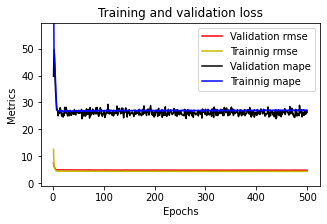

In [177]:
plotme(model6_1_2)

## sub-problem 7:  **input: distance & hour & all roadtypes with real distance**

In [139]:
df8 = df2.iloc[:,:].copy()
# df8 = df8.drop(['hour of day'], axis=1)
df8.head(20)

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0          1038           16  0.542630  0.519876    0.229358         0.357143   
1          1020           22  0.531771  0.528590    0.257143         0.385714   
2           730            6  0.296433  0.258285    0.689189         0.708333   
3          1235           13  0.427837  0.389613    0.404412         0.410448   
4           576           17  0.312362  0.267286    0.972973         0.986301   
5           810           21  0.329516  0.286876    0.545455         0.683544   
7           985           22  0.403114  0.326049    0.551020         0.568421   
8          1071           19  0.574918  0.600324    0.429825         0.466667   
9          1110           13  0.377363  0.311925    0.509804         0.597701   
10          979           14  0.400711  0.318323    0.536082         0.584270   
11         1857           16  0.377888  0.259449    0.365385         0.487179   
12          790           22  0.465103  0.390073    0.919355         0.982759   
13          676           22  0.323810  0.271635    0.658228         0.693333   
14          916           19  0.500408  0.413999    0.851064         0.882353   
15          138            1  0.042982  0.063235    0.333333         0.130435   
16          283           13  0.005930  0.007277    0.833333         1.000000   
17          346           12  0.186797  0.126186    0.846154         1.000000   
18          487            3  0.138472  0.101591    0.703704         0.678571   
19          829           12  0.213723  0.168737    0.750000         0.750000   
20          775           18  0.458233  0.420336    0.558824         0.612903   

    living_street  motorway  motorway_link    primary  ...  road  secondary  \
0             0.0       0.0            0.0  16851.678  ...   0.0      0.000   
1             0.0       0.0            0.0  16513.708  ...   0.0      0.000   
2             0.0       0.0            0.0   8089.947  ...   0.0      0.000   
3             0.0       0.0            0.0   9148.605  ...   0.0      0.000   
4             0.0       0.0            0.0   8257.777  ...   0.0      0.000   
5             0.0       0.0            0.0   8106.473  ...   0.0      0.000   
7             0.0       0.0            0.0  10741.352  ...   0.0      0.000   
8             0.0       0.0            0.0  16149.470  ...   0.0      0.000   
9             0.0       0.0            0.0   7621.231  ...   0.0      0.000   
10            0.0       0.0            0.0  10741.352  ...   0.0      0.000   
11            0.0       0.0            0.0   8705.826  ...   0.0      0.000   
12            0.0       0.0            0.0  10598.610  ...   0.0      0.000   
13            0.0       0.0            0.0   8787.940  ...   0.0      0.000   
14            0.0       0.0            0.0  15038.840  ...   0.0      0.000   
15            0.0       0.0            0.0      0.000  ...   0.0      0.000   
16            0.0       0.0            0.0      0.000  ...   0.0    396.641   
17            0.0       0.0            0.0   5554.231  ...   0.0      0.000   
18            0.0       0.0            0.0   3494.970  ...   0.0      0.000   
19            0.0       0.0            0.0   5996.915  ...   0.0      0.000   
20            0.0       0.0            0.0   9931.631  ...   0.0      0.000   

    secondary_link  service  tertiary  track  trunk  trunk_link  unclassified  \
0              0.0    0.000   720.334    0.0    0.0         0.0         0.000   
1              0.0    0.000   720.334    0.0    0.0         0.0         0.000   
2              0.0  403.924   529.915    0.0    0.0         0.0       715.641   
3              0.0    0.000   437.068    0.0    0.0         0.0       715.641   
4              0.0    0.000   673.871    0.0    0.0         0.0         0.000   
5              0.0    0.000   673.871    0.0    0.0         0.0      1223.288   
7              0.0   95.606   437.068    0.0    0.0         0.0       715.6

In [140]:
# Normalize using Min/Max Normalization.
normalize=(df8['living_street']-df8['living_street'].min())/(df8['living_street'].max()-df8['living_street'].min())
df8['living_street'] = normalize
normalize=(df8['motorway']-df8['motorway'].min())/(df8['motorway'].max()-df8['motorway'].min())
df8['motorway'] = normalize
normalize=(df8['motorway_link']-df8['motorway_link'].min())/(df8['motorway_link'].max()-df8['motorway_link'].min())
df8['motorway_link'] = normalize
normalize=(df8['primary']-df8['primary'].min())/(df8['primary'].max()-df8['primary'].min())
df8['primary'] = normalize
normalize=(df8['primary_link']-df8['primary_link'].min())/(df8['primary_link'].max()-df8['primary_link'].min())
df8['primary_link'] = normalize
normalize=(df8['residential']-df8['residential'].min())/(df8['residential'].max()-df8['residential'].min())
df8['residential'] = normalize
normalize=(df8['road']-df8['road'].min())/(df8['road'].max()-df8['road'].min())
df8['road'] = normalize
normalize=(df8['secondary']-df8['secondary'].min())/(df8['secondary'].max()-df8['secondary'].min())
df8['secondary'] = normalize
normalize=(df8['secondary_link']-df8['secondary_link'].min())/(df8['secondary_link'].max()-df8['secondary_link'].min())
df8['secondary_link'] = normalize
normalize=(df8['service']-df8['service'].min())/(df8['service'].max()-df8['service'].min())
df8['service'] = normalize
normalize=(df8['tertiary']-df8['tertiary'].min())/(df8['tertiary'].max()-df8['tertiary'].min())
df8['tertiary'] = normalize
normalize=(df8['track']-df8['track'].min())/(df8['track'].max()-df8['track'].min())
df8['track'] = normalize
normalize=(df8['trunk']-df8['trunk'].min())/(df8['trunk'].max()-df8['trunk'].min())
df8['trunk'] = normalize
normalize=(df8['trunk_link']-df8['trunk_link'].min())/(df8['trunk_link'].max()-df8['trunk_link'].min())
df8['trunk_link'] = normalize
normalize=(df8['unclassified']-df8['unclassified'].min())/(df8['unclassified'].max()-df8['unclassified'].min())
df8['unclassified'] = normalize
normalize=(df8['others']-df8['others'].min())/(df8['others'].max()-df8['others'].min())
df8['others'] = normalize
df8

travel time  hour of day  distance  est_dist  similarity  \
0            1038           16  0.542630  0.519876    0.229358   
1            1020           22  0.531771  0.528590    0.257143   
2             730            6  0.296433  0.258285    0.689189   
3            1235           13  0.427837  0.389613    0.404412   
4             576           17  0.312362  0.267286    0.972973   
...           ...          ...       ...       ...         ...   
8262          764           17  0.423759  0.361695    0.816667   
8263         1023            9  0.420897  0.360065    0.352941   
8264          960           15  0.384812  0.330779    0.925532   
8265         1349           18  0.679393  0.598852    0.508772   
8266          393           19  0.188721  0.165883    0.461538   

      similarity_dijk  living_street  motorway  motorway_link   primary  ...  \
0            0.357143            0.0       0.0            0.0  0.534138  ...   
1            0.385714            0.0       0.0            0.0  0.523425  ...   
2            0.708333            0.0       0.0            0.0  0.256422  ...   
3            0.410448            0.0       0.0            0.0  0.289978  ...   
4            0.986301            0.0       0.0            0.0  0.261742  ...   
...               ...            ...       ...            ...       ...  ...   
8262         0.777778            0.0       0.0            0.0  0.346226  ...   
8263         0.375000            0.0       0.0            0.0  0.348517  ...   
8264         0.956044            0.0       0.0            0.0  0.302787  ...   
8265         0.411348            0.0       0.0            0.0  0.649004  ...   
8266         0.382979            0.0       0.0            0.0  0.127175  ...   

      road  secondary  secondary_link   service  tertiary  track  trunk  \
0      0.0   0.000000             0.0  0.000000  0.039507    0.0    0.0   
1      0.0   0.000000             0.0  0.000000  0.039507    0.0    0.0   
2      0.0   0.000000             0.0  0.066082  0.029063    0.0    0.0   
3      0.0   0.000000             0.0  0.000000  0.023971    0.0    0.0   
4      0.0   0.000000             0.0  0.000000  0.036959    0.0    0.0   
...    ...        ...             ...       ...       ...    ...    ...   
8262   0.0   0.000000             0.0  0.000000  0.141619    0.0    0.0   
8263   0.0   0.000000             0.0  0.000000  0.024744    0.0    0.0   
8264   0.0   0.000000             0.0  0.000000  0.014510    0.0    0.0   
8265   0.0   0.047236             0.0  0.000000  0.026683    0.0    0.0   
8266   0.0   0.000000             0.0  0.000000  0.070764    0.0    0.0   

      trunk_link  unclassified  others  
0            0.0      0.000000     0.0  
1            0.0      0.000000     0.0  
2            0.0      0.143363     0.0  
3            0.0      0.143363     0.0  
4            0.0      0.000000     0.0  
...          ...           ...     ...  
8262         0.0      0.000000     0.0  
8263         0.0      0.000000     0.0  
8264         0.0      0.000000     0.0  
8265         0.0      0.000000     0.0  
8266         0.0      0.000000     0.0  

[8157 rows x 22 columns]

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

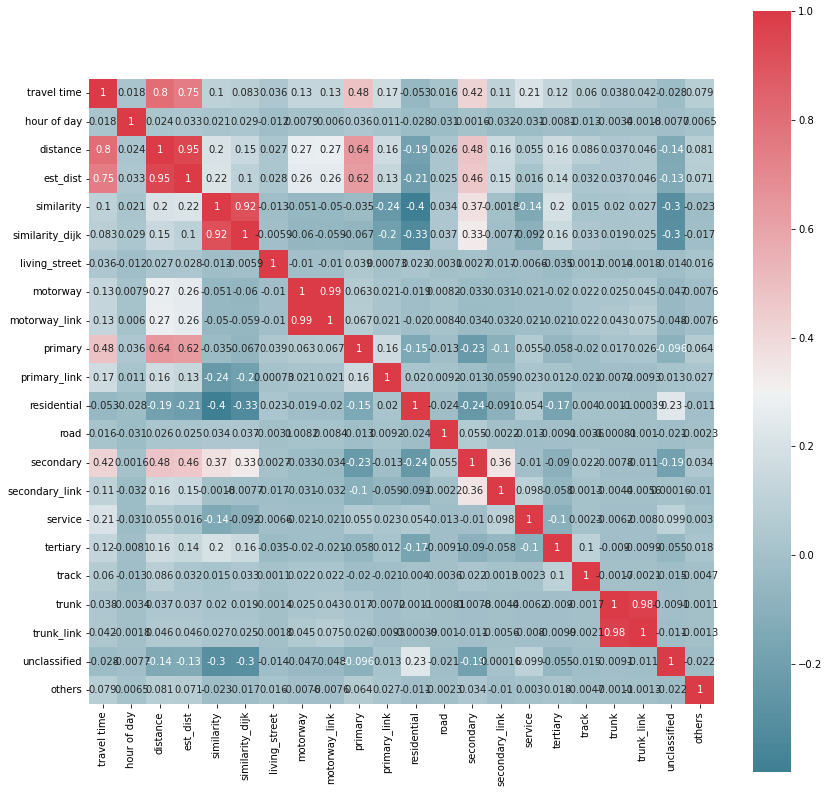

In [141]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(14,14))
corr = df8.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [143]:
x = np.array(df8.iloc[:,3:])
y = np.array(df8['travel time'])
x

array([[0.51987632, 0.2293578 , 0.35714286, ..., 0.        , 0.        ,
        0.        ],
       [0.52859023, 0.25714286, 0.38571429, ..., 0.        , 0.        ,
        0.        ],
       [0.25828517, 0.68918919, 0.70833333, ..., 0.        , 0.14336309,
        0.        ],
       ...,
       [0.3307786 , 0.92553191, 0.95604396, ..., 0.        , 0.        ,
        0.        ],
       [0.5988515 , 0.50877193, 0.41134752, ..., 0.        , 0.        ,
        0.        ],
       [0.16588275, 0.46153846, 0.38297872, ..., 0.        , 0.        ,
        0.        ]])

In [144]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [145]:
print(X_train.shape)
print(X_test.shape)
# X_train

(6525, 19)
(1632, 19)


In [146]:
# inputs: distance + roadtypes distance
model7_1_1 = nnmodel_(100,50, num_hlayers=2,Epoch=500)
model7_1_1

Epoch 1/500
204/204 [==============================] - 0s 1ms/step - loss: 654046.1250 - mape: 87.9857 - rmse: 808.7312 - val_loss: 369447.5625 - val_mape: 53.0940 - val_rmse: 607.8220
Epoch 2/500
204/204 [==============================] - 0s 814us/step - loss: 150845.3281 - mape: 42.1865 - rmse: 388.3881 - val_loss: 120917.1250 - val_mape: 44.3966 - val_rmse: 347.7314
Epoch 3/500
204/204 [==============================] - 0s 820us/step - loss: 98094.1719 - mape: 41.5682 - rmse: 313.1999 - val_loss: 102150.5781 - val_mape: 38.9143 - val_rmse: 319.6100
Epoch 4/500
204/204 [==============================] - 0s 822us/step - loss: 80826.5625 - mape: 36.7171 - rmse: 284.3001 - val_loss: 86619.9297 - val_mape: 34.4114 - val_rmse: 294.3127
Epoch 5/500
204/204 [==============================] - 0s 839us/step - loss: 67959.6406 - mape: 32.0927 - rmse: 260.6907 - val_loss: 76113.9375 - val_mape: 30.2363 - val_rmse: 275.8875
Epoch 6/500
204/204 [==============================] - 0s 846us/step - l

204/204 [==============================] - 0s 838us/step - loss: 48036.1133 - mape: 22.5393 - rmse: 219.1714 - val_loss: 57494.6133 - val_mape: 22.1947 - val_rmse: 239.7803
Epoch 90/500
204/204 [==============================] - 0s 816us/step - loss: 48030.1250 - mape: 22.6902 - rmse: 219.1578 - val_loss: 57499.5898 - val_mape: 21.9755 - val_rmse: 239.7907
Epoch 91/500
204/204 [==============================] - 0s 936us/step - loss: 47968.1914 - mape: 22.5824 - rmse: 219.0164 - val_loss: 57308.9844 - val_mape: 22.3316 - val_rmse: 239.3929
Epoch 92/500
204/204 [==============================] - 0s 827us/step - loss: 47964.2031 - mape: 22.6104 - rmse: 219.0073 - val_loss: 58152.9609 - val_mape: 21.4481 - val_rmse: 241.1492
Epoch 93/500
204/204 [==============================] - 0s 830us/step - loss: 47878.6250 - mape: 22.5870 - rmse: 218.8118 - val_loss: 57781.1719 - val_mape: 21.6453 - val_rmse: 240.3772
Epoch 94/500
204/204 [==============================] - 0s 840us/step - loss: 47934

Epoch 133/500
204/204 [==============================] - 0s 821us/step - loss: 47086.2227 - mape: 22.3413 - rmse: 216.9936 - val_loss: 56801.9297 - val_mape: 21.6781 - val_rmse: 238.3316
Epoch 134/500
204/204 [==============================] - 0s 823us/step - loss: 47015.6836 - mape: 22.2817 - rmse: 216.8310 - val_loss: 56470.0898 - val_mape: 22.0587 - val_rmse: 237.6344
Epoch 135/500
204/204 [==============================] - 0s 821us/step - loss: 46941.8047 - mape: 22.3247 - rmse: 216.6606 - val_loss: 57609.7188 - val_mape: 21.1003 - val_rmse: 240.0202
Epoch 136/500
204/204 [==============================] - 0s 835us/step - loss: 46993.3867 - mape: 22.2449 - rmse: 216.7796 - val_loss: 56719.0898 - val_mape: 21.8318 - val_rmse: 238.1577
Epoch 137/500
204/204 [==============================] - 0s 824us/step - loss: 46997.5039 - mape: 22.3388 - rmse: 216.7891 - val_loss: 57277.4062 - val_mape: 21.1634 - val_rmse: 239.3270
Epoch 138/500
204/204 [==============================] - 0s 823us

Epoch 177/500
204/204 [==============================] - 0s 852us/step - loss: 46283.3242 - mape: 22.2440 - rmse: 215.1356 - val_loss: 55734.3047 - val_mape: 21.6665 - val_rmse: 236.0811
Epoch 178/500
204/204 [==============================] - 0s 877us/step - loss: 46172.8125 - mape: 22.0975 - rmse: 214.8786 - val_loss: 55795.4219 - val_mape: 21.6508 - val_rmse: 236.2105
Epoch 179/500
204/204 [==============================] - 0s 901us/step - loss: 46140.9844 - mape: 22.0808 - rmse: 214.8045 - val_loss: 55528.1367 - val_mape: 22.5961 - val_rmse: 235.6441
Epoch 180/500
204/204 [==============================] - 0s 847us/step - loss: 46216.4883 - mape: 22.2261 - rmse: 214.9802 - val_loss: 55584.6289 - val_mape: 22.2501 - val_rmse: 235.7639
Epoch 181/500
204/204 [==============================] - 0s 837us/step - loss: 46163.5352 - mape: 22.1519 - rmse: 214.8570 - val_loss: 55576.7305 - val_mape: 22.5201 - val_rmse: 235.7472
Epoch 182/500
204/204 [==============================] - 0s 821us

Epoch 221/500
204/204 [==============================] - 0s 827us/step - loss: 45518.6914 - mape: 21.9425 - rmse: 213.3511 - val_loss: 54875.5781 - val_mape: 22.6440 - val_rmse: 234.2554
Epoch 222/500
204/204 [==============================] - 0s 835us/step - loss: 45614.4570 - mape: 22.1143 - rmse: 213.5754 - val_loss: 55596.7305 - val_mape: 21.0056 - val_rmse: 235.7896
Epoch 223/500
204/204 [==============================] - 0s 825us/step - loss: 45561.8203 - mape: 22.0884 - rmse: 213.4521 - val_loss: 54955.5977 - val_mape: 21.8227 - val_rmse: 234.4261
Epoch 224/500
204/204 [==============================] - 0s 808us/step - loss: 45484.3477 - mape: 22.0120 - rmse: 213.2706 - val_loss: 54880.4883 - val_mape: 22.6986 - val_rmse: 234.2659
Epoch 225/500
204/204 [==============================] - 0s 836us/step - loss: 45516.0938 - mape: 22.0965 - rmse: 213.3450 - val_loss: 55026.1484 - val_mape: 21.7461 - val_rmse: 234.5765
Epoch 226/500
204/204 [==============================] - 0s 947us

Epoch 265/500
204/204 [==============================] - 0s 814us/step - loss: 44893.1836 - mape: 21.8479 - rmse: 211.8801 - val_loss: 54427.1953 - val_mape: 22.8554 - val_rmse: 233.2964
Epoch 266/500
204/204 [==============================] - 0s 828us/step - loss: 45084.2969 - mape: 21.9834 - rmse: 212.3306 - val_loss: 54361.0977 - val_mape: 22.0789 - val_rmse: 233.1547
Epoch 267/500
204/204 [==============================] - 0s 824us/step - loss: 44943.4102 - mape: 21.9549 - rmse: 211.9986 - val_loss: 54548.2109 - val_mape: 21.5999 - val_rmse: 233.5556
Epoch 268/500
204/204 [==============================] - 0s 827us/step - loss: 45006.9297 - mape: 21.9693 - rmse: 212.1484 - val_loss: 54445.0586 - val_mape: 21.6007 - val_rmse: 233.3347
Epoch 269/500
204/204 [==============================] - 0s 829us/step - loss: 44866.7031 - mape: 21.8764 - rmse: 211.8176 - val_loss: 54373.4453 - val_mape: 22.7337 - val_rmse: 233.1811
Epoch 270/500
204/204 [==============================] - 0s 826us

Epoch 309/500
204/204 [==============================] - 0s 828us/step - loss: 44615.4141 - mape: 21.8869 - rmse: 211.2236 - val_loss: 54402.0898 - val_mape: 21.4977 - val_rmse: 233.2426
Epoch 310/500
204/204 [==============================] - 0s 990us/step - loss: 44604.4492 - mape: 21.9079 - rmse: 211.1976 - val_loss: 54442.6211 - val_mape: 21.2604 - val_rmse: 233.3294
Epoch 311/500
204/204 [==============================] - 0s 1ms/step - loss: 44681.9062 - mape: 21.8714 - rmse: 211.3810 - val_loss: 54068.9883 - val_mape: 22.5383 - val_rmse: 232.5274
Epoch 312/500
204/204 [==============================] - 0s 927us/step - loss: 44515.0586 - mape: 21.9196 - rmse: 210.9859 - val_loss: 54429.4062 - val_mape: 21.1861 - val_rmse: 233.3011
Epoch 313/500
204/204 [==============================] - 0s 829us/step - loss: 44647.6250 - mape: 21.8469 - rmse: 211.2999 - val_loss: 54050.7617 - val_mape: 21.8872 - val_rmse: 232.4882
Epoch 314/500
204/204 [==============================] - 0s 815us/s

Epoch 353/500
204/204 [==============================] - 0s 905us/step - loss: 44412.1680 - mape: 21.9130 - rmse: 210.7419 - val_loss: 54588.5508 - val_mape: 20.8813 - val_rmse: 233.6419
Epoch 354/500
204/204 [==============================] - 0s 845us/step - loss: 44480.2266 - mape: 21.8423 - rmse: 210.9034 - val_loss: 54042.3867 - val_mape: 21.6268 - val_rmse: 232.4702
Epoch 355/500
204/204 [==============================] - 0s 844us/step - loss: 44439.8672 - mape: 21.8878 - rmse: 210.8076 - val_loss: 53960.8086 - val_mape: 21.7815 - val_rmse: 232.2947
Epoch 356/500
204/204 [==============================] - 0s 824us/step - loss: 44420.8789 - mape: 21.9122 - rmse: 210.7626 - val_loss: 53831.5586 - val_mape: 21.9202 - val_rmse: 232.0163
Epoch 357/500
204/204 [==============================] - 0s 837us/step - loss: 44396.4180 - mape: 21.8901 - rmse: 210.7046 - val_loss: 54240.4102 - val_mape: 21.3698 - val_rmse: 232.8957
Epoch 358/500
204/204 [==============================] - 0s 808us

Epoch 397/500
204/204 [==============================] - 0s 839us/step - loss: 44214.4609 - mape: 21.8366 - rmse: 210.2724 - val_loss: 54324.0703 - val_mape: 21.2627 - val_rmse: 233.0752
Epoch 398/500
204/204 [==============================] - 0s 825us/step - loss: 44327.4492 - mape: 21.9351 - rmse: 210.5408 - val_loss: 53846.1953 - val_mape: 22.4862 - val_rmse: 232.0478
Epoch 399/500
204/204 [==============================] - 0s 840us/step - loss: 44264.6797 - mape: 21.7821 - rmse: 210.3917 - val_loss: 54247.1523 - val_mape: 21.2852 - val_rmse: 232.9102
Epoch 400/500
204/204 [==============================] - 0s 892us/step - loss: 44228.5078 - mape: 21.8952 - rmse: 210.3058 - val_loss: 54411.7539 - val_mape: 21.0623 - val_rmse: 233.2633
Epoch 401/500
204/204 [==============================] - 0s 835us/step - loss: 44248.7578 - mape: 21.9547 - rmse: 210.3539 - val_loss: 53814.4766 - val_mape: 22.0829 - val_rmse: 231.9795
Epoch 402/500
204/204 [==============================] - 0s 831us

Epoch 441/500
204/204 [==============================] - 0s 810us/step - loss: 44177.1562 - mape: 22.0170 - rmse: 210.1836 - val_loss: 53690.5625 - val_mape: 22.0466 - val_rmse: 231.7122
Epoch 442/500
204/204 [==============================] - 0s 1ms/step - loss: 44111.5078 - mape: 21.8710 - rmse: 210.0274 - val_loss: 53786.4258 - val_mape: 21.6441 - val_rmse: 231.9190
Epoch 443/500
204/204 [==============================] - 0s 980us/step - loss: 44113.7031 - mape: 21.8723 - rmse: 210.0326 - val_loss: 53587.2070 - val_mape: 22.6218 - val_rmse: 231.4891
Epoch 444/500
204/204 [==============================] - 0s 802us/step - loss: 44092.0664 - mape: 21.9504 - rmse: 209.9811 - val_loss: 54000.7188 - val_mape: 21.4399 - val_rmse: 232.3806
Epoch 445/500
204/204 [==============================] - 0s 844us/step - loss: 44197.0078 - mape: 21.8129 - rmse: 210.2309 - val_loss: 53674.9453 - val_mape: 22.2407 - val_rmse: 231.6785
Epoch 446/500
204/204 [==============================] - 0s 854us/s

Epoch 485/500
204/204 [==============================] - 0s 823us/step - loss: 44029.3555 - mape: 21.7438 - rmse: 209.8317 - val_loss: 53686.7891 - val_mape: 22.8310 - val_rmse: 231.7041
Epoch 486/500
204/204 [==============================] - 0s 823us/step - loss: 43970.3398 - mape: 21.8725 - rmse: 209.6911 - val_loss: 53878.6562 - val_mape: 21.2971 - val_rmse: 232.1178
Epoch 487/500
204/204 [==============================] - 0s 861us/step - loss: 43983.9258 - mape: 21.8561 - rmse: 209.7234 - val_loss: 53512.9219 - val_mape: 22.0612 - val_rmse: 231.3286
Epoch 488/500
204/204 [==============================] - 0s 844us/step - loss: 43940.0742 - mape: 21.8379 - rmse: 209.6189 - val_loss: 53586.1484 - val_mape: 23.1541 - val_rmse: 231.4868
Epoch 489/500
204/204 [==============================] - 0s 835us/step - loss: 44029.4609 - mape: 21.9587 - rmse: 209.8320 - val_loss: 54377.5586 - val_mape: 20.9147 - val_rmse: 233.1900
Epoch 490/500
204/204 [==============================] - 0s 840us

In [147]:
# plotme(model7_1_1)

In [148]:
# inputs: distance + hour + roadtypes distance
model7_1_2 = nnmodel_(200,100, num_hlayers=2,Epoch=500)
model7_1_2

Epoch 1/500
204/204 [==============================] - 0s 1ms/step - loss: 490073.2500 - mape: 72.2947 - rmse: 700.0523 - val_loss: 128875.3906 - val_mape: 44.9840 - val_rmse: 358.9922
Epoch 2/500
204/204 [==============================] - 0s 910us/step - loss: 101107.1250 - mape: 42.0795 - rmse: 317.9735 - val_loss: 100699.7656 - val_mape: 38.6139 - val_rmse: 317.3323
Epoch 3/500
204/204 [==============================] - 0s 876us/step - loss: 76092.8203 - mape: 34.8873 - rmse: 275.8493 - val_loss: 79717.9766 - val_mape: 31.1485 - val_rmse: 282.3437
Epoch 4/500
204/204 [==============================] - 0s 878us/step - loss: 61164.5703 - mape: 28.3680 - rmse: 247.3147 - val_loss: 69999.1719 - val_mape: 26.5410 - val_rmse: 264.5736
Epoch 5/500
204/204 [==============================] - 0s 887us/step - loss: 55836.9727 - mape: 25.1986 - rmse: 236.2985 - val_loss: 66795.6094 - val_mape: 24.0363 - val_rmse: 258.4485
Epoch 6/500
204/204 [==============================] - 0s 870us/step - lo

204/204 [==============================] - 0s 867us/step - loss: 46811.8984 - mape: 22.1995 - rmse: 216.3606 - val_loss: 56051.9766 - val_mape: 21.5574 - val_rmse: 236.7530
Epoch 90/500
204/204 [==============================] - 0s 874us/step - loss: 46607.8555 - mape: 22.0533 - rmse: 215.8885 - val_loss: 55660.9258 - val_mape: 22.0071 - val_rmse: 235.9257
Epoch 91/500
204/204 [==============================] - 0s 870us/step - loss: 46662.7930 - mape: 22.0470 - rmse: 216.0157 - val_loss: 56351.9219 - val_mape: 21.1898 - val_rmse: 237.3856
Epoch 92/500
204/204 [==============================] - 0s 875us/step - loss: 46529.1016 - mape: 22.0159 - rmse: 215.7061 - val_loss: 55890.0898 - val_mape: 21.6249 - val_rmse: 236.4108
Epoch 93/500
204/204 [==============================] - 0s 878us/step - loss: 46498.5781 - mape: 22.0767 - rmse: 215.6353 - val_loss: 55766.4648 - val_mape: 21.4990 - val_rmse: 236.1492
Epoch 94/500
204/204 [==============================] - 0s 872us/step - loss: 46653

Epoch 133/500
204/204 [==============================] - 0s 880us/step - loss: 45180.4062 - mape: 21.8783 - rmse: 212.5568 - val_loss: 54195.6680 - val_mape: 21.7759 - val_rmse: 232.7996
Epoch 134/500
204/204 [==============================] - 0s 876us/step - loss: 45099.9961 - mape: 21.8850 - rmse: 212.3676 - val_loss: 54604.2812 - val_mape: 21.2244 - val_rmse: 233.6756
Epoch 135/500
204/204 [==============================] - 0s 894us/step - loss: 45133.8555 - mape: 21.8856 - rmse: 212.4473 - val_loss: 55073.1602 - val_mape: 20.6721 - val_rmse: 234.6767
Epoch 136/500
204/204 [==============================] - 0s 936us/step - loss: 44999.5000 - mape: 21.7257 - rmse: 212.1309 - val_loss: 54278.5156 - val_mape: 21.6664 - val_rmse: 232.9775
Epoch 137/500
204/204 [==============================] - 0s 940us/step - loss: 45073.4180 - mape: 21.8732 - rmse: 212.3050 - val_loss: 54788.1367 - val_mape: 20.9981 - val_rmse: 234.0687
Epoch 138/500
204/204 [==============================] - 0s 888us

Epoch 177/500
204/204 [==============================] - 0s 878us/step - loss: 44051.3516 - mape: 21.7477 - rmse: 209.8841 - val_loss: 53225.1953 - val_mape: 21.6313 - val_rmse: 230.7059
Epoch 178/500
204/204 [==============================] - 0s 889us/step - loss: 44174.8945 - mape: 21.7943 - rmse: 210.1782 - val_loss: 54791.9102 - val_mape: 20.3778 - val_rmse: 234.0767
Epoch 179/500
204/204 [==============================] - 0s 878us/step - loss: 44171.8516 - mape: 21.7773 - rmse: 210.1710 - val_loss: 53101.9219 - val_mape: 22.2351 - val_rmse: 230.4385
Epoch 180/500
204/204 [==============================] - 0s 890us/step - loss: 44076.8086 - mape: 21.6527 - rmse: 209.9448 - val_loss: 53119.7656 - val_mape: 21.8321 - val_rmse: 230.4772
Epoch 181/500
204/204 [==============================] - 0s 900us/step - loss: 44120.6289 - mape: 21.8063 - rmse: 210.0491 - val_loss: 53234.4453 - val_mape: 21.2502 - val_rmse: 230.7259
Epoch 182/500
204/204 [==============================] - 0s 879us

Epoch 221/500
204/204 [==============================] - 0s 1ms/step - loss: 43472.2656 - mape: 21.7725 - rmse: 208.5000 - val_loss: 52798.3398 - val_mape: 21.0488 - val_rmse: 229.7789
Epoch 222/500
204/204 [==============================] - 0s 1ms/step - loss: 43604.0977 - mape: 21.6087 - rmse: 208.8159 - val_loss: 52546.0391 - val_mape: 21.6585 - val_rmse: 229.2292
Epoch 223/500
204/204 [==============================] - 0s 997us/step - loss: 43585.5391 - mape: 21.7371 - rmse: 208.7715 - val_loss: 52472.4492 - val_mape: 21.6388 - val_rmse: 229.0686
Epoch 224/500
204/204 [==============================] - 0s 973us/step - loss: 43448.1523 - mape: 21.6184 - rmse: 208.4422 - val_loss: 52492.7383 - val_mape: 22.2996 - val_rmse: 229.1129
Epoch 225/500
204/204 [==============================] - 0s 900us/step - loss: 43570.3555 - mape: 21.7222 - rmse: 208.7351 - val_loss: 52503.7344 - val_mape: 21.4656 - val_rmse: 229.1369
Epoch 226/500
204/204 [==============================] - 0s 911us/ste

Epoch 265/500
204/204 [==============================] - 0s 870us/step - loss: 43154.3008 - mape: 21.6805 - rmse: 207.7361 - val_loss: 53121.7734 - val_mape: 20.9068 - val_rmse: 230.4816
Epoch 266/500
204/204 [==============================] - 0s 883us/step - loss: 43216.9688 - mape: 21.6932 - rmse: 207.8869 - val_loss: 52209.1680 - val_mape: 21.3758 - val_rmse: 228.4933
Epoch 267/500
204/204 [==============================] - 0s 820us/step - loss: 43105.7734 - mape: 21.6486 - rmse: 207.6193 - val_loss: 52735.9688 - val_mape: 21.0988 - val_rmse: 229.6431
Epoch 268/500
204/204 [==============================] - 0s 868us/step - loss: 43059.3516 - mape: 21.5621 - rmse: 207.5075 - val_loss: 52018.6328 - val_mape: 22.1820 - val_rmse: 228.0759
Epoch 269/500
204/204 [==============================] - 0s 871us/step - loss: 43066.3906 - mape: 21.6330 - rmse: 207.5244 - val_loss: 52045.6680 - val_mape: 21.7147 - val_rmse: 228.1352
Epoch 270/500
204/204 [==============================] - 0s 864us

Epoch 309/500
204/204 [==============================] - 0s 911us/step - loss: 42770.5938 - mape: 21.4851 - rmse: 206.8105 - val_loss: 52213.0039 - val_mape: 21.4619 - val_rmse: 228.5016
Epoch 310/500
204/204 [==============================] - 0s 865us/step - loss: 42787.2188 - mape: 21.6391 - rmse: 206.8507 - val_loss: 52088.5938 - val_mape: 21.2752 - val_rmse: 228.2293
Epoch 311/500
204/204 [==============================] - 0s 904us/step - loss: 42984.0195 - mape: 21.6533 - rmse: 207.3259 - val_loss: 52080.8477 - val_mape: 21.6869 - val_rmse: 228.2123
Epoch 312/500
204/204 [==============================] - 0s 875us/step - loss: 42783.5195 - mape: 21.5818 - rmse: 206.8418 - val_loss: 52479.9883 - val_mape: 21.0500 - val_rmse: 229.0851
Epoch 313/500
204/204 [==============================] - 0s 875us/step - loss: 42793.3086 - mape: 21.5274 - rmse: 206.8654 - val_loss: 53230.4805 - val_mape: 20.7061 - val_rmse: 230.7173
Epoch 314/500
204/204 [==============================] - 0s 895us

Epoch 353/500
204/204 [==============================] - 0s 882us/step - loss: 42466.8867 - mape: 21.6059 - rmse: 206.0750 - val_loss: 51844.2344 - val_mape: 21.8464 - val_rmse: 227.6933
Epoch 354/500
204/204 [==============================] - 0s 871us/step - loss: 42565.3125 - mape: 21.5102 - rmse: 206.3136 - val_loss: 52042.3516 - val_mape: 21.8321 - val_rmse: 228.1279
Epoch 355/500
204/204 [==============================] - 0s 811us/step - loss: 42479.4922 - mape: 21.6001 - rmse: 206.1055 - val_loss: 53780.1094 - val_mape: 20.5122 - val_rmse: 231.9054
Epoch 356/500
204/204 [==============================] - 0s 879us/step - loss: 42695.9453 - mape: 21.5702 - rmse: 206.6300 - val_loss: 52153.0781 - val_mape: 21.4953 - val_rmse: 228.3705
Epoch 357/500
204/204 [==============================] - 0s 875us/step - loss: 42509.9023 - mape: 21.5843 - rmse: 206.1793 - val_loss: 51987.1797 - val_mape: 21.8327 - val_rmse: 228.0070
Epoch 358/500
204/204 [==============================] - 0s 905us

Epoch 397/500
204/204 [==============================] - 0s 925us/step - loss: 42403.2500 - mape: 21.5021 - rmse: 205.9205 - val_loss: 52107.0938 - val_mape: 21.4287 - val_rmse: 228.2698
Epoch 398/500
204/204 [==============================] - 0s 919us/step - loss: 42252.4180 - mape: 21.3916 - rmse: 205.5539 - val_loss: 52112.9570 - val_mape: 21.3339 - val_rmse: 228.2826
Epoch 399/500
204/204 [==============================] - 0s 939us/step - loss: 42175.3438 - mape: 21.4456 - rmse: 205.3664 - val_loss: 51902.5117 - val_mape: 22.5916 - val_rmse: 227.8212
Epoch 400/500
204/204 [==============================] - 0s 930us/step - loss: 42311.9688 - mape: 21.6187 - rmse: 205.6987 - val_loss: 51930.8125 - val_mape: 22.2917 - val_rmse: 227.8833
Epoch 401/500
204/204 [==============================] - 0s 898us/step - loss: 42298.5664 - mape: 21.4607 - rmse: 205.6662 - val_loss: 51955.6484 - val_mape: 21.4519 - val_rmse: 227.9378
Epoch 402/500
204/204 [==============================] - 0s 858us

Epoch 441/500
204/204 [==============================] - 0s 881us/step - loss: 41883.5820 - mape: 21.5282 - rmse: 204.6548 - val_loss: 51871.0352 - val_mape: 21.8177 - val_rmse: 227.7521
Epoch 442/500
204/204 [==============================] - 0s 810us/step - loss: 41745.6445 - mape: 21.3845 - rmse: 204.3175 - val_loss: 52168.3008 - val_mape: 21.1310 - val_rmse: 228.4038
Epoch 443/500
204/204 [==============================] - 0s 885us/step - loss: 41741.3594 - mape: 21.3946 - rmse: 204.3070 - val_loss: 51849.3320 - val_mape: 22.2978 - val_rmse: 227.7045
Epoch 444/500
204/204 [==============================] - 0s 863us/step - loss: 41836.4844 - mape: 21.4835 - rmse: 204.5397 - val_loss: 52119.6914 - val_mape: 21.2746 - val_rmse: 228.2974
Epoch 445/500
204/204 [==============================] - 0s 907us/step - loss: 41697.6641 - mape: 21.4017 - rmse: 204.2001 - val_loss: 52052.5508 - val_mape: 21.0784 - val_rmse: 228.1503
Epoch 446/500
204/204 [==============================] - 0s 887us

Epoch 485/500
204/204 [==============================] - 0s 859us/step - loss: 41261.3789 - mape: 21.2653 - rmse: 203.1290 - val_loss: 51760.0234 - val_mape: 21.8355 - val_rmse: 227.5083
Epoch 486/500
204/204 [==============================] - 0s 875us/step - loss: 41203.9141 - mape: 21.2890 - rmse: 202.9875 - val_loss: 52018.4648 - val_mape: 21.5110 - val_rmse: 228.0756
Epoch 487/500
204/204 [==============================] - 0s 820us/step - loss: 41223.3398 - mape: 21.3533 - rmse: 203.0353 - val_loss: 52053.8828 - val_mape: 21.1897 - val_rmse: 228.1532
Epoch 488/500
204/204 [==============================] - 0s 834us/step - loss: 41163.1953 - mape: 21.2875 - rmse: 202.8871 - val_loss: 52497.8828 - val_mape: 20.8736 - val_rmse: 229.1242
Epoch 489/500
204/204 [==============================] - 0s 805us/step - loss: 41197.4336 - mape: 21.3910 - rmse: 202.9715 - val_loss: 51824.1133 - val_mape: 22.0854 - val_rmse: 227.6491
Epoch 490/500
204/204 [==============================] - 0s 830us

In [149]:
# plotme(model7_1_2)

In [150]:
# inputs: distance + roadtypes distance
model7_1_3 = nnmodel_(50, num_hlayers=1,Epoch=500)
model7_1_3

Epoch 1/500
204/204 [==============================] - 0s 1ms/step - loss: 760264.8125 - mape: 99.5094 - rmse: 871.9316 - val_loss: 782378.1250 - val_mape: 98.5739 - val_rmse: 884.5214
Epoch 2/500
204/204 [==============================] - 0s 810us/step - loss: 730997.3750 - mape: 96.5485 - rmse: 854.9838 - val_loss: 736462.0625 - val_mape: 94.0101 - val_rmse: 858.1737
Epoch 3/500
204/204 [==============================] - 0s 768us/step - loss: 672293.4375 - mape: 90.3954 - rmse: 819.9350 - val_loss: 665334.6875 - val_mape: 86.5913 - val_rmse: 815.6805
Epoch 4/500
204/204 [==============================] - 0s 768us/step - loss: 593905.1875 - mape: 81.8061 - rmse: 770.6525 - val_loss: 578705.8125 - val_mape: 77.0722 - val_rmse: 760.7272
Epoch 5/500
204/204 [==============================] - 0s 808us/step - loss: 504036.4688 - mape: 71.4638 - rmse: 709.9553 - val_loss: 484483.2188 - val_mape: 66.5043 - val_rmse: 696.0483
Epoch 6/500
204/204 [==============================] - 0s 798us/ste

Epoch 45/500
204/204 [==============================] - 0s 752us/step - loss: 55083.8594 - mape: 24.1273 - rmse: 234.6995 - val_loss: 67404.7734 - val_mape: 24.0154 - val_rmse: 259.6243
Epoch 46/500
204/204 [==============================] - 0s 731us/step - loss: 54825.3672 - mape: 24.1706 - rmse: 234.1482 - val_loss: 67229.0625 - val_mape: 23.6499 - val_rmse: 259.2857
Epoch 47/500
204/204 [==============================] - 0s 758us/step - loss: 54624.8320 - mape: 23.9922 - rmse: 233.7196 - val_loss: 67079.2188 - val_mape: 23.3224 - val_rmse: 258.9966
Epoch 48/500
204/204 [==============================] - 0s 759us/step - loss: 54432.8203 - mape: 23.7135 - rmse: 233.3084 - val_loss: 66630.6406 - val_mape: 23.7474 - val_rmse: 258.1291
Epoch 49/500
204/204 [==============================] - 0s 762us/step - loss: 54246.0352 - mape: 23.7866 - rmse: 232.9078 - val_loss: 66419.0312 - val_mape: 23.6471 - val_rmse: 257.7189
Epoch 50/500
204/204 [==============================] - 0s 749us/step 

204/204 [==============================] - 0s 792us/step - loss: 51075.8008 - mape: 23.0308 - rmse: 225.9996 - val_loss: 62299.4219 - val_mape: 22.2820 - val_rmse: 249.5985
Epoch 90/500
204/204 [==============================] - 0s 788us/step - loss: 51013.6172 - mape: 23.0192 - rmse: 225.8619 - val_loss: 62136.8398 - val_mape: 22.4350 - val_rmse: 249.2726
Epoch 91/500
204/204 [==============================] - 0s 723us/step - loss: 51014.6250 - mape: 22.9619 - rmse: 225.8642 - val_loss: 61995.6875 - val_mape: 22.6048 - val_rmse: 248.9893
Epoch 92/500
204/204 [==============================] - 0s 717us/step - loss: 50942.8125 - mape: 22.8497 - rmse: 225.7051 - val_loss: 61935.6289 - val_mape: 22.6105 - val_rmse: 248.8687
Epoch 93/500
204/204 [==============================] - 0s 730us/step - loss: 50892.7891 - mape: 22.8686 - rmse: 225.5943 - val_loss: 61825.0781 - val_mape: 22.7753 - val_rmse: 248.6465
Epoch 94/500
204/204 [==============================] - 0s 746us/step - loss: 50853

Epoch 133/500
204/204 [==============================] - 0s 779us/step - loss: 49763.9180 - mape: 22.8785 - rmse: 223.0783 - val_loss: 60049.3203 - val_mape: 22.7078 - val_rmse: 245.0496
Epoch 134/500
204/204 [==============================] - 0s 777us/step - loss: 49749.4180 - mape: 23.0272 - rmse: 223.0458 - val_loss: 60109.8594 - val_mape: 22.4873 - val_rmse: 245.1731
Epoch 135/500
204/204 [==============================] - 0s 772us/step - loss: 49721.1875 - mape: 22.9741 - rmse: 222.9825 - val_loss: 60162.6328 - val_mape: 22.3375 - val_rmse: 245.2807
Epoch 136/500
204/204 [==============================] - 0s 754us/step - loss: 49712.2422 - mape: 22.8237 - rmse: 222.9624 - val_loss: 59933.5312 - val_mape: 22.7979 - val_rmse: 244.8133
Epoch 137/500
204/204 [==============================] - 0s 763us/step - loss: 49697.9141 - mape: 23.0011 - rmse: 222.9303 - val_loss: 59925.4609 - val_mape: 22.7065 - val_rmse: 244.7968
Epoch 138/500
204/204 [==============================] - 0s 757us

Epoch 177/500
204/204 [==============================] - 0s 760us/step - loss: 49105.4609 - mape: 22.9241 - rmse: 221.5975 - val_loss: 59133.4102 - val_mape: 22.3895 - val_rmse: 243.1736
Epoch 178/500
204/204 [==============================] - 0s 774us/step - loss: 49100.8008 - mape: 22.8741 - rmse: 221.5870 - val_loss: 58917.7070 - val_mape: 22.8333 - val_rmse: 242.7297
Epoch 179/500
204/204 [==============================] - 0s 767us/step - loss: 49094.5234 - mape: 23.0608 - rmse: 221.5728 - val_loss: 58948.7695 - val_mape: 22.6662 - val_rmse: 242.7937
Epoch 180/500
204/204 [==============================] - 0s 709us/step - loss: 49069.7617 - mape: 22.8880 - rmse: 221.5170 - val_loss: 58855.6406 - val_mape: 22.9144 - val_rmse: 242.6018
Epoch 181/500
204/204 [==============================] - 0s 787us/step - loss: 49094.0977 - mape: 22.9766 - rmse: 221.5719 - val_loss: 58979.5781 - val_mape: 22.5366 - val_rmse: 242.8571
Epoch 182/500
204/204 [==============================] - 0s 745us

Epoch 221/500
204/204 [==============================] - 0s 821us/step - loss: 48703.0938 - mape: 22.9345 - rmse: 220.6878 - val_loss: 58405.3984 - val_mape: 22.5169 - val_rmse: 241.6721
Epoch 222/500
204/204 [==============================] - 0s 811us/step - loss: 48690.5234 - mape: 22.9672 - rmse: 220.6593 - val_loss: 58393.1562 - val_mape: 22.5317 - val_rmse: 241.6468
Epoch 223/500
204/204 [==============================] - 0s 813us/step - loss: 48674.4375 - mape: 22.9614 - rmse: 220.6228 - val_loss: 58325.8086 - val_mape: 22.6430 - val_rmse: 241.5074
Epoch 224/500
204/204 [==============================] - 0s 831us/step - loss: 48666.5352 - mape: 22.9976 - rmse: 220.6049 - val_loss: 58344.1133 - val_mape: 22.5817 - val_rmse: 241.5453
Epoch 225/500
204/204 [==============================] - 0s 837us/step - loss: 48677.9688 - mape: 22.9055 - rmse: 220.6308 - val_loss: 58294.9961 - val_mape: 22.6596 - val_rmse: 241.4436
Epoch 226/500
204/204 [==============================] - 0s 789us

Epoch 265/500
204/204 [==============================] - 0s 779us/step - loss: 48372.3867 - mape: 22.8503 - rmse: 219.9372 - val_loss: 57803.2461 - val_mape: 22.9063 - val_rmse: 240.4230
Epoch 266/500
204/204 [==============================] - 0s 775us/step - loss: 48364.1953 - mape: 22.8838 - rmse: 219.9186 - val_loss: 57775.5508 - val_mape: 22.9608 - val_rmse: 240.3654
Epoch 267/500
204/204 [==============================] - 0s 767us/step - loss: 48354.1445 - mape: 23.0103 - rmse: 219.8958 - val_loss: 57942.4961 - val_mape: 22.4708 - val_rmse: 240.7125
Epoch 268/500
204/204 [==============================] - 0s 784us/step - loss: 48347.8477 - mape: 22.9017 - rmse: 219.8814 - val_loss: 57817.7148 - val_mape: 22.7220 - val_rmse: 240.4531
Epoch 269/500
204/204 [==============================] - 0s 780us/step - loss: 48352.8203 - mape: 22.9185 - rmse: 219.8927 - val_loss: 57825.8477 - val_mape: 22.6712 - val_rmse: 240.4701
Epoch 270/500
204/204 [==============================] - 0s 802us

Epoch 309/500
204/204 [==============================] - 0s 779us/step - loss: 48072.1055 - mape: 22.7343 - rmse: 219.2535 - val_loss: 57457.9180 - val_mape: 22.8280 - val_rmse: 239.7038
Epoch 310/500
204/204 [==============================] - 0s 756us/step - loss: 48068.1289 - mape: 22.8880 - rmse: 219.2444 - val_loss: 57457.5352 - val_mape: 22.7651 - val_rmse: 239.7030
Epoch 311/500
204/204 [==============================] - 0s 748us/step - loss: 48065.9180 - mape: 22.8637 - rmse: 219.2394 - val_loss: 57521.4258 - val_mape: 22.5573 - val_rmse: 239.8362
Epoch 312/500
204/204 [==============================] - 0s 801us/step - loss: 48057.1445 - mape: 22.9016 - rmse: 219.2194 - val_loss: 57504.7188 - val_mape: 22.5613 - val_rmse: 239.8014
Epoch 313/500
204/204 [==============================] - 0s 738us/step - loss: 48055.2070 - mape: 22.8122 - rmse: 219.2150 - val_loss: 57477.1719 - val_mape: 22.6262 - val_rmse: 239.7440
Epoch 314/500
204/204 [==============================] - 0s 731us

Epoch 353/500
204/204 [==============================] - 0s 794us/step - loss: 47793.3906 - mape: 22.7665 - rmse: 218.6170 - val_loss: 57319.3789 - val_mape: 22.3325 - val_rmse: 239.4147
Epoch 354/500
204/204 [==============================] - 0s 758us/step - loss: 47787.8320 - mape: 22.7731 - rmse: 218.6043 - val_loss: 57288.2500 - val_mape: 22.3790 - val_rmse: 239.3496
Epoch 355/500
204/204 [==============================] - 0s 706us/step - loss: 47786.3281 - mape: 22.7123 - rmse: 218.6008 - val_loss: 57136.9414 - val_mape: 22.7542 - val_rmse: 239.0333
Epoch 356/500
204/204 [==============================] - 0s 722us/step - loss: 47782.3281 - mape: 22.7862 - rmse: 218.5917 - val_loss: 57275.8984 - val_mape: 22.3727 - val_rmse: 239.3238
Epoch 357/500
204/204 [==============================] - 0s 780us/step - loss: 47777.7695 - mape: 22.7866 - rmse: 218.5813 - val_loss: 57187.1523 - val_mape: 22.5594 - val_rmse: 239.1384
Epoch 358/500
204/204 [==============================] - 0s 728us

Epoch 397/500
204/204 [==============================] - 0s 791us/step - loss: 47549.6953 - mape: 22.6755 - rmse: 218.0589 - val_loss: 56977.5234 - val_mape: 22.4399 - val_rmse: 238.6996
Epoch 398/500
204/204 [==============================] - 0s 782us/step - loss: 47535.2031 - mape: 22.6282 - rmse: 218.0257 - val_loss: 56914.4570 - val_mape: 22.6128 - val_rmse: 238.5675
Epoch 399/500
204/204 [==============================] - 0s 785us/step - loss: 47535.5703 - mape: 22.8398 - rmse: 218.0265 - val_loss: 57112.2148 - val_mape: 22.1688 - val_rmse: 238.9816
Epoch 400/500
204/204 [==============================] - 0s 810us/step - loss: 47530.4766 - mape: 22.6759 - rmse: 218.0148 - val_loss: 57120.1367 - val_mape: 22.1450 - val_rmse: 238.9982
Epoch 401/500
204/204 [==============================] - 0s 851us/step - loss: 47532.1445 - mape: 22.6683 - rmse: 218.0187 - val_loss: 56944.6914 - val_mape: 22.4611 - val_rmse: 238.6309
Epoch 402/500
204/204 [==============================] - 0s 842us

Epoch 441/500
204/204 [==============================] - 0s 786us/step - loss: 47329.9141 - mape: 22.5705 - rmse: 217.5544 - val_loss: 56786.3906 - val_mape: 22.3205 - val_rmse: 238.2990
Epoch 442/500
204/204 [==============================] - 0s 789us/step - loss: 47310.4297 - mape: 22.5890 - rmse: 217.5096 - val_loss: 56744.9023 - val_mape: 22.4058 - val_rmse: 238.2119
Epoch 443/500
204/204 [==============================] - 0s 830us/step - loss: 47305.1914 - mape: 22.5885 - rmse: 217.4976 - val_loss: 56698.8203 - val_mape: 22.5266 - val_rmse: 238.1151
Epoch 444/500
204/204 [==============================] - 0s 806us/step - loss: 47296.5508 - mape: 22.7172 - rmse: 217.4777 - val_loss: 56849.3711 - val_mape: 22.1620 - val_rmse: 238.4311
Epoch 445/500
204/204 [==============================] - 0s 809us/step - loss: 47300.3398 - mape: 22.5387 - rmse: 217.4864 - val_loss: 56720.6953 - val_mape: 22.4286 - val_rmse: 238.1611
Epoch 446/500
204/204 [==============================] - 0s 797us

Epoch 485/500
204/204 [==============================] - 0s 779us/step - loss: 47092.2500 - mape: 22.5360 - rmse: 217.0075 - val_loss: 56565.6289 - val_mape: 22.3529 - val_rmse: 237.8353
Epoch 486/500
204/204 [==============================] - 0s 753us/step - loss: 47092.9219 - mape: 22.5024 - rmse: 217.0090 - val_loss: 56542.8672 - val_mape: 22.4496 - val_rmse: 237.7874
Epoch 487/500
204/204 [==============================] - 0s 770us/step - loss: 47091.3477 - mape: 22.5663 - rmse: 217.0054 - val_loss: 56557.6875 - val_mape: 22.3790 - val_rmse: 237.8186
Epoch 488/500
204/204 [==============================] - 0s 746us/step - loss: 47082.5508 - mape: 22.5087 - rmse: 216.9851 - val_loss: 56503.7930 - val_mape: 22.5532 - val_rmse: 237.7053
Epoch 489/500
204/204 [==============================] - 0s 774us/step - loss: 47093.0273 - mape: 22.5693 - rmse: 217.0093 - val_loss: 56512.9688 - val_mape: 22.5098 - val_rmse: 237.7246
Epoch 490/500
204/204 [==============================] - 0s 784us

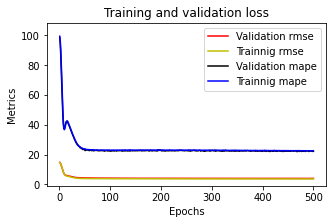

In [151]:
plotme(model7_1_3)

In [152]:
# inputs: distance + roadtypes distance
model7_1_4 = nnmodel_(10, num_hlayers=1,Epoch=500)
model7_1_4

Epoch 1/500
204/204 [==============================] - 0s 1ms/step - loss: 763692.1875 - mape: 99.8298 - rmse: 873.8948 - val_loss: 793801.8750 - val_mape: 99.6703 - val_rmse: 890.9556
Epoch 2/500
204/204 [==============================] - 0s 769us/step - loss: 759579.5000 - mape: 99.4150 - rmse: 871.5386 - val_loss: 788207.6875 - val_mape: 99.1225 - val_rmse: 887.8106
Epoch 3/500
204/204 [==============================] - 0s 745us/step - loss: 752105.8125 - mape: 98.6720 - rmse: 867.2404 - val_loss: 778034.3750 - val_mape: 98.1303 - val_rmse: 882.0626
Epoch 4/500
204/204 [==============================] - 0s 699us/step - loss: 739482.3750 - mape: 97.4093 - rmse: 859.9316 - val_loss: 763155.0625 - val_mape: 96.6643 - val_rmse: 873.5875
Epoch 5/500
204/204 [==============================] - 0s 765us/step - loss: 723171.1875 - mape: 95.7541 - rmse: 850.3947 - val_loss: 745052.8750 - val_mape: 94.8574 - val_rmse: 863.1644
Epoch 6/500
204/204 [==============================] - 0s 762us/ste

Epoch 45/500
204/204 [==============================] - 0s 792us/step - loss: 106495.8750 - mape: 42.3951 - rmse: 326.3371 - val_loss: 119648.3203 - val_mape: 41.9737 - val_rmse: 345.9022
Epoch 46/500
204/204 [==============================] - 0s 769us/step - loss: 105054.4531 - mape: 42.1139 - rmse: 324.1210 - val_loss: 118173.1406 - val_mape: 41.7070 - val_rmse: 343.7632
Epoch 47/500
204/204 [==============================] - 0s 800us/step - loss: 103599.7266 - mape: 41.8815 - rmse: 321.8691 - val_loss: 116687.7266 - val_mape: 41.3709 - val_rmse: 341.5959
Epoch 48/500
204/204 [==============================] - 0s 794us/step - loss: 102133.1641 - mape: 41.6198 - rmse: 319.5828 - val_loss: 115174.7656 - val_mape: 41.0673 - val_rmse: 339.3741
Epoch 49/500
204/204 [==============================] - 0s 752us/step - loss: 100650.1406 - mape: 41.0975 - rmse: 317.2541 - val_loss: 113678.2344 - val_mape: 40.7016 - val_rmse: 337.1620
Epoch 50/500
204/204 [==============================] - 0s 7

Epoch 89/500
204/204 [==============================] - 0s 780us/step - loss: 60242.8359 - mape: 27.3233 - rmse: 245.4442 - val_loss: 73206.8906 - val_mape: 27.1888 - val_rmse: 270.5677
Epoch 90/500
204/204 [==============================] - 0s 773us/step - loss: 59879.1211 - mape: 27.1830 - rmse: 244.7021 - val_loss: 72821.4844 - val_mape: 26.9881 - val_rmse: 269.8546
Epoch 91/500
204/204 [==============================] - 0s 729us/step - loss: 59533.8438 - mape: 26.8815 - rmse: 243.9956 - val_loss: 72462.5312 - val_mape: 26.7997 - val_rmse: 269.1887
Epoch 92/500
204/204 [==============================] - 0s 685us/step - loss: 59211.6719 - mape: 26.7639 - rmse: 243.3345 - val_loss: 72139.7422 - val_mape: 26.5616 - val_rmse: 268.5884
Epoch 93/500
204/204 [==============================] - 0s 817us/step - loss: 58920.9219 - mape: 26.4923 - rmse: 242.7363 - val_loss: 71799.5625 - val_mape: 26.4681 - val_rmse: 267.9544
Epoch 94/500
204/204 [==============================] - 0s 753us/step 

Epoch 133/500
204/204 [==============================] - 0s 764us/step - loss: 54097.7500 - mape: 23.5274 - rmse: 232.5892 - val_loss: 66396.3125 - val_mape: 23.3504 - val_rmse: 257.6748
Epoch 134/500
204/204 [==============================] - 0s 742us/step - loss: 54038.8594 - mape: 23.5440 - rmse: 232.4626 - val_loss: 66301.8594 - val_mape: 23.4090 - val_rmse: 257.4915
Epoch 135/500
204/204 [==============================] - 0s 720us/step - loss: 53991.3164 - mape: 23.6110 - rmse: 232.3603 - val_loss: 66263.2969 - val_mape: 23.3032 - val_rmse: 257.4166
Epoch 136/500
204/204 [==============================] - 0s 692us/step - loss: 53937.8281 - mape: 23.5513 - rmse: 232.2452 - val_loss: 66202.0703 - val_mape: 23.2724 - val_rmse: 257.2976
Epoch 137/500
204/204 [==============================] - 0s 748us/step - loss: 53887.8828 - mape: 23.5759 - rmse: 232.1376 - val_loss: 66154.8359 - val_mape: 23.2041 - val_rmse: 257.2058
Epoch 138/500
204/204 [==============================] - 0s 725us

Epoch 177/500
204/204 [==============================] - 0s 705us/step - loss: 52436.7188 - mape: 23.1330 - rmse: 228.9906 - val_loss: 64204.6328 - val_mape: 22.7541 - val_rmse: 253.3863
Epoch 178/500
204/204 [==============================] - 0s 766us/step - loss: 52410.9102 - mape: 23.0609 - rmse: 228.9343 - val_loss: 64163.7930 - val_mape: 22.7641 - val_rmse: 253.3057
Epoch 179/500
204/204 [==============================] - 0s 756us/step - loss: 52379.7812 - mape: 23.1240 - rmse: 228.8663 - val_loss: 64130.0977 - val_mape: 22.7449 - val_rmse: 253.2392
Epoch 180/500
204/204 [==============================] - 0s 692us/step - loss: 52351.7734 - mape: 23.0427 - rmse: 228.8051 - val_loss: 64065.8828 - val_mape: 22.8108 - val_rmse: 253.1124
Epoch 181/500
204/204 [==============================] - 0s 745us/step - loss: 52327.3672 - mape: 23.1569 - rmse: 228.7518 - val_loss: 64045.8828 - val_mape: 22.7538 - val_rmse: 253.0729
Epoch 182/500
204/204 [==============================] - 0s 759us

Epoch 221/500
204/204 [==============================] - 0s 717us/step - loss: 51499.0820 - mape: 22.9672 - rmse: 226.9341 - val_loss: 62833.5977 - val_mape: 22.5970 - val_rmse: 250.6663
Epoch 222/500
204/204 [==============================] - 0s 699us/step - loss: 51474.9102 - mape: 23.0902 - rmse: 226.8808 - val_loss: 62842.2695 - val_mape: 22.5187 - val_rmse: 250.6836
Epoch 223/500
204/204 [==============================] - 0s 752us/step - loss: 51461.4727 - mape: 22.9374 - rmse: 226.8512 - val_loss: 62792.9414 - val_mape: 22.5696 - val_rmse: 250.5852
Epoch 224/500
204/204 [==============================] - 0s 728us/step - loss: 51457.7969 - mape: 22.9756 - rmse: 226.8431 - val_loss: 62731.5586 - val_mape: 22.6535 - val_rmse: 250.4627
Epoch 225/500
204/204 [==============================] - 0s 692us/step - loss: 51428.4883 - mape: 23.0155 - rmse: 226.7785 - val_loss: 62742.9609 - val_mape: 22.5690 - val_rmse: 250.4854
Epoch 226/500
204/204 [==============================] - 0s 749us

Epoch 265/500
204/204 [==============================] - 0s 702us/step - loss: 50852.3945 - mape: 23.0339 - rmse: 225.5048 - val_loss: 61832.5586 - val_mape: 22.5856 - val_rmse: 248.6615
Epoch 266/500
204/204 [==============================] - 0s 747us/step - loss: 50840.4609 - mape: 22.9674 - rmse: 225.4783 - val_loss: 61807.6406 - val_mape: 22.5970 - val_rmse: 248.6114
Epoch 267/500
204/204 [==============================] - 0s 751us/step - loss: 50829.1953 - mape: 22.9578 - rmse: 225.4533 - val_loss: 61777.2188 - val_mape: 22.6240 - val_rmse: 248.5502
Epoch 268/500
204/204 [==============================] - 0s 752us/step - loss: 50814.2656 - mape: 22.9813 - rmse: 225.4202 - val_loss: 61765.2148 - val_mape: 22.6036 - val_rmse: 248.5261
Epoch 269/500
204/204 [==============================] - 0s 760us/step - loss: 50802.5703 - mape: 22.8810 - rmse: 225.3943 - val_loss: 61699.9258 - val_mape: 22.7166 - val_rmse: 248.3947
Epoch 270/500
204/204 [==============================] - 0s 722us

Epoch 309/500
204/204 [==============================] - 0s 759us/step - loss: 50367.9414 - mape: 22.9436 - rmse: 224.4280 - val_loss: 61024.2266 - val_mape: 22.6552 - val_rmse: 247.0308
Epoch 310/500
204/204 [==============================] - 0s 737us/step - loss: 50363.2617 - mape: 22.9486 - rmse: 224.4176 - val_loss: 61014.4414 - val_mape: 22.6413 - val_rmse: 247.0110
Epoch 311/500
204/204 [==============================] - 0s 715us/step - loss: 50351.3359 - mape: 23.0050 - rmse: 224.3910 - val_loss: 60988.0742 - val_mape: 22.6656 - val_rmse: 246.9576
Epoch 312/500
204/204 [==============================] - 0s 785us/step - loss: 50339.9141 - mape: 22.9836 - rmse: 224.3656 - val_loss: 61005.1016 - val_mape: 22.5891 - val_rmse: 246.9921
Epoch 313/500
204/204 [==============================] - 0s 700us/step - loss: 50328.9766 - mape: 22.9500 - rmse: 224.3412 - val_loss: 60970.8242 - val_mape: 22.6292 - val_rmse: 246.9227
Epoch 314/500
204/204 [==============================] - 0s 735us

Epoch 353/500
204/204 [==============================] - 0s 819us/step - loss: 49999.6953 - mape: 23.0709 - rmse: 223.6061 - val_loss: 60442.9609 - val_mape: 22.5889 - val_rmse: 245.8515
Epoch 354/500
204/204 [==============================] - 0s 808us/step - loss: 49992.6602 - mape: 22.8657 - rmse: 223.5904 - val_loss: 60386.2656 - val_mape: 22.6980 - val_rmse: 245.7362
Epoch 355/500
204/204 [==============================] - 0s 825us/step - loss: 49987.4883 - mape: 23.0185 - rmse: 223.5788 - val_loss: 60390.3906 - val_mape: 22.6572 - val_rmse: 245.7446
Epoch 356/500
204/204 [==============================] - 0s 768us/step - loss: 49979.6250 - mape: 22.9403 - rmse: 223.5612 - val_loss: 60355.0781 - val_mape: 22.7127 - val_rmse: 245.6727
Epoch 357/500
204/204 [==============================] - 0s 760us/step - loss: 49971.6992 - mape: 23.0182 - rmse: 223.5435 - val_loss: 60356.7930 - val_mape: 22.6792 - val_rmse: 245.6762
Epoch 358/500
204/204 [==============================] - 0s 758us

Epoch 397/500
204/204 [==============================] - 0s 836us/step - loss: 49722.8906 - mape: 22.9539 - rmse: 222.9863 - val_loss: 59913.1953 - val_mape: 22.7272 - val_rmse: 244.7717
Epoch 398/500
204/204 [==============================] - 0s 806us/step - loss: 49715.1719 - mape: 23.0611 - rmse: 222.9690 - val_loss: 59956.1367 - val_mape: 22.6068 - val_rmse: 244.8594
Epoch 399/500
204/204 [==============================] - 0s 806us/step - loss: 49713.3750 - mape: 22.9861 - rmse: 222.9650 - val_loss: 59946.0195 - val_mape: 22.6055 - val_rmse: 244.8388
Epoch 400/500
204/204 [==============================] - 0s 792us/step - loss: 49707.2461 - mape: 22.9666 - rmse: 222.9512 - val_loss: 59905.5352 - val_mape: 22.6757 - val_rmse: 244.7561
Epoch 401/500
204/204 [==============================] - 0s 827us/step - loss: 49700.8359 - mape: 22.9687 - rmse: 222.9368 - val_loss: 59872.6602 - val_mape: 22.7349 - val_rmse: 244.6889
Epoch 402/500
204/204 [==============================] - 0s 816us

Epoch 441/500
204/204 [==============================] - 0s 785us/step - loss: 49502.7188 - mape: 23.0330 - rmse: 222.4921 - val_loss: 59555.8242 - val_mape: 22.6882 - val_rmse: 244.0406
Epoch 442/500
204/204 [==============================] - 0s 724us/step - loss: 49501.2148 - mape: 22.9801 - rmse: 222.4887 - val_loss: 59544.7383 - val_mape: 22.6926 - val_rmse: 244.0179
Epoch 443/500
204/204 [==============================] - 0s 744us/step - loss: 49492.6094 - mape: 23.0039 - rmse: 222.4693 - val_loss: 59512.4961 - val_mape: 22.7504 - val_rmse: 243.9518
Epoch 444/500
204/204 [==============================] - 0s 765us/step - loss: 49495.6094 - mape: 23.0772 - rmse: 222.4761 - val_loss: 59537.4297 - val_mape: 22.6708 - val_rmse: 244.0029
Epoch 445/500
204/204 [==============================] - 0s 731us/step - loss: 49482.9805 - mape: 22.9687 - rmse: 222.4477 - val_loss: 59505.4102 - val_mape: 22.7301 - val_rmse: 243.9373
Epoch 446/500
204/204 [==============================] - 0s 748us

Epoch 485/500
204/204 [==============================] - 0s 705us/step - loss: 49306.9492 - mape: 23.0228 - rmse: 222.0517 - val_loss: 59230.7734 - val_mape: 22.6984 - val_rmse: 243.3737
Epoch 486/500
204/204 [==============================] - 0s 769us/step - loss: 49305.5312 - mape: 23.0732 - rmse: 222.0485 - val_loss: 59244.4805 - val_mape: 22.6540 - val_rmse: 243.4019
Epoch 487/500
204/204 [==============================] - 0s 756us/step - loss: 49297.1055 - mape: 22.9892 - rmse: 222.0295 - val_loss: 59209.0938 - val_mape: 22.7185 - val_rmse: 243.3292
Epoch 488/500
204/204 [==============================] - 0s 773us/step - loss: 49296.4531 - mape: 23.0464 - rmse: 222.0280 - val_loss: 59208.0352 - val_mape: 22.7059 - val_rmse: 243.3270
Epoch 489/500
204/204 [==============================] - 0s 733us/step - loss: 49289.7773 - mape: 23.0643 - rmse: 222.0130 - val_loss: 59205.8242 - val_mape: 22.6956 - val_rmse: 243.3225
Epoch 490/500
204/204 [==============================] - 0s 760us

In [153]:
# inputs: distance + roadtypes distance
model7_1_5 = nnmodel_(100, num_hlayers=1,Epoch=500)
model7_1_5

Epoch 1/500
204/204 [==============================] - 0s 1ms/step - loss: 755764.2500 - mape: 99.0594 - rmse: 869.3470 - val_loss: 769285.8125 - val_mape: 97.2840 - val_rmse: 877.0894
Epoch 2/500
204/204 [==============================] - 0s 789us/step - loss: 703677.8125 - mape: 93.7277 - rmse: 838.8550 - val_loss: 691745.4375 - val_mape: 89.3978 - val_rmse: 831.7123
Epoch 3/500
204/204 [==============================] - 0s 799us/step - loss: 608185.2500 - mape: 83.4217 - rmse: 779.8623 - val_loss: 579325.6875 - val_mape: 77.1475 - val_rmse: 761.1345
Epoch 4/500
204/204 [==============================] - 0s 799us/step - loss: 489922.4688 - mape: 69.8785 - rmse: 699.9446 - val_loss: 455414.1250 - val_mape: 63.1839 - val_rmse: 674.8438
Epoch 5/500
204/204 [==============================] - 0s 809us/step - loss: 371623.7188 - mape: 55.8035 - rmse: 609.6095 - val_loss: 340647.7500 - val_mape: 49.8849 - val_rmse: 583.6504
Epoch 6/500
204/204 [==============================] - 0s 801us/ste

Epoch 45/500
204/204 [==============================] - 0s 791us/step - loss: 52714.0469 - mape: 23.2383 - rmse: 229.5954 - val_loss: 64657.3828 - val_mape: 22.4626 - val_rmse: 254.2782
Epoch 46/500
204/204 [==============================] - 0s 783us/step - loss: 52579.4219 - mape: 23.1527 - rmse: 229.3020 - val_loss: 64376.8047 - val_mape: 22.6626 - val_rmse: 253.7258
Epoch 47/500
204/204 [==============================] - 0s 799us/step - loss: 52442.8867 - mape: 23.1845 - rmse: 229.0041 - val_loss: 64440.0117 - val_mape: 22.2729 - val_rmse: 253.8504
Epoch 48/500
204/204 [==============================] - 0s 795us/step - loss: 52356.2852 - mape: 22.9717 - rmse: 228.8150 - val_loss: 63916.8125 - val_mape: 23.0642 - val_rmse: 252.8177
Epoch 49/500
204/204 [==============================] - 0s 787us/step - loss: 52255.5742 - mape: 23.1634 - rmse: 228.5948 - val_loss: 63985.1133 - val_mape: 22.4943 - val_rmse: 252.9528
Epoch 50/500
204/204 [==============================] - 0s 791us/step 

204/204 [==============================] - 0s 853us/step - loss: 50039.0938 - mape: 23.0049 - rmse: 223.6942 - val_loss: 60855.8594 - val_mape: 22.0780 - val_rmse: 246.6898
Epoch 90/500
204/204 [==============================] - 0s 832us/step - loss: 50024.5938 - mape: 22.8723 - rmse: 223.6618 - val_loss: 60531.3320 - val_mape: 22.4711 - val_rmse: 246.0312
Epoch 91/500
204/204 [==============================] - 0s 769us/step - loss: 49986.4688 - mape: 22.9481 - rmse: 223.5765 - val_loss: 60377.9805 - val_mape: 22.7265 - val_rmse: 245.7193
Epoch 92/500
204/204 [==============================] - 0s 800us/step - loss: 49957.8398 - mape: 23.0424 - rmse: 223.5125 - val_loss: 60381.4180 - val_mape: 22.5769 - val_rmse: 245.7263
Epoch 93/500
204/204 [==============================] - 0s 800us/step - loss: 49940.3984 - mape: 23.0007 - rmse: 223.4735 - val_loss: 60408.9258 - val_mape: 22.4205 - val_rmse: 245.7823
Epoch 94/500
204/204 [==============================] - 0s 789us/step - loss: 49903

Epoch 133/500
204/204 [==============================] - 0s 727us/step - loss: 49153.9961 - mape: 23.0022 - rmse: 221.7070 - val_loss: 59002.2266 - val_mape: 22.7459 - val_rmse: 242.9037
Epoch 134/500
204/204 [==============================] - 0s 775us/step - loss: 49141.5117 - mape: 23.0382 - rmse: 221.6788 - val_loss: 59009.6406 - val_mape: 22.6699 - val_rmse: 242.9190
Epoch 135/500
204/204 [==============================] - 0s 805us/step - loss: 49128.1523 - mape: 23.0662 - rmse: 221.6487 - val_loss: 59004.2852 - val_mape: 22.6444 - val_rmse: 242.9080
Epoch 136/500
204/204 [==============================] - 0s 766us/step - loss: 49094.0117 - mape: 23.1143 - rmse: 221.5717 - val_loss: 59386.0391 - val_mape: 22.0675 - val_rmse: 243.6925
Epoch 137/500
204/204 [==============================] - 0s 788us/step - loss: 49133.2852 - mape: 22.8663 - rmse: 221.6603 - val_loss: 58825.7852 - val_mape: 23.0399 - val_rmse: 242.5403
Epoch 138/500
204/204 [==============================] - 0s 830us

Epoch 177/500
204/204 [==============================] - 0s 787us/step - loss: 48684.0234 - mape: 22.8661 - rmse: 220.6446 - val_loss: 58136.0039 - val_mape: 23.2575 - val_rmse: 241.1141
Epoch 178/500
204/204 [==============================] - 0s 720us/step - loss: 48689.7539 - mape: 23.1721 - rmse: 220.6575 - val_loss: 58357.6367 - val_mape: 22.5380 - val_rmse: 241.5733
Epoch 179/500
204/204 [==============================] - 0s 758us/step - loss: 48669.8477 - mape: 22.9861 - rmse: 220.6124 - val_loss: 58154.5742 - val_mape: 22.9958 - val_rmse: 241.1526
Epoch 180/500
204/204 [==============================] - 0s 783us/step - loss: 48651.9922 - mape: 23.0348 - rmse: 220.5720 - val_loss: 58180.8398 - val_mape: 22.8687 - val_rmse: 241.2070
Epoch 181/500
204/204 [==============================] - 0s 774us/step - loss: 48641.7344 - mape: 23.0969 - rmse: 220.5487 - val_loss: 58352.7344 - val_mape: 22.4562 - val_rmse: 241.5631
Epoch 182/500
204/204 [==============================] - 0s 740us

Epoch 221/500
204/204 [==============================] - 0s 832us/step - loss: 48308.1797 - mape: 22.8400 - rmse: 219.7912 - val_loss: 57779.6680 - val_mape: 22.6992 - val_rmse: 240.3740
Epoch 222/500
204/204 [==============================] - 0s 805us/step - loss: 48300.8438 - mape: 22.9955 - rmse: 219.7745 - val_loss: 57756.3867 - val_mape: 22.7236 - val_rmse: 240.3256
Epoch 223/500
204/204 [==============================] - 0s 783us/step - loss: 48288.7734 - mape: 22.9042 - rmse: 219.7471 - val_loss: 57635.9258 - val_mape: 23.0885 - val_rmse: 240.0748
Epoch 224/500
204/204 [==============================] - 0s 749us/step - loss: 48288.3086 - mape: 22.9961 - rmse: 219.7460 - val_loss: 57697.7891 - val_mape: 22.8427 - val_rmse: 240.2036
Epoch 225/500
204/204 [==============================] - 0s 780us/step - loss: 48273.3125 - mape: 23.0239 - rmse: 219.7119 - val_loss: 57822.8203 - val_mape: 22.5070 - val_rmse: 240.4638
Epoch 226/500
204/204 [==============================] - 0s 771us

Epoch 265/500
204/204 [==============================] - 0s 778us/step - loss: 47907.8008 - mape: 22.7651 - rmse: 218.8785 - val_loss: 57352.4062 - val_mape: 22.5521 - val_rmse: 239.4836
Epoch 266/500
204/204 [==============================] - 0s 781us/step - loss: 47915.4961 - mape: 22.8462 - rmse: 218.8961 - val_loss: 57408.3242 - val_mape: 22.4095 - val_rmse: 239.6003
Epoch 267/500
204/204 [==============================] - 0s 778us/step - loss: 47916.3828 - mape: 22.8766 - rmse: 218.8981 - val_loss: 57424.0352 - val_mape: 22.3638 - val_rmse: 239.6331
Epoch 268/500
204/204 [==============================] - 0s 757us/step - loss: 47881.3320 - mape: 22.8494 - rmse: 218.8180 - val_loss: 57351.4102 - val_mape: 22.4781 - val_rmse: 239.4816
Epoch 269/500
204/204 [==============================] - 0s 820us/step - loss: 47874.0039 - mape: 22.8296 - rmse: 218.8013 - val_loss: 57325.1875 - val_mape: 22.4908 - val_rmse: 239.4268
Epoch 270/500
204/204 [==============================] - 0s 770us

Epoch 309/500
204/204 [==============================] - 0s 721us/step - loss: 47503.1484 - mape: 22.6221 - rmse: 217.9522 - val_loss: 56944.3438 - val_mape: 22.3423 - val_rmse: 238.6301
Epoch 310/500
204/204 [==============================] - 0s 777us/step - loss: 47490.0859 - mape: 22.7375 - rmse: 217.9222 - val_loss: 56924.7461 - val_mape: 22.3282 - val_rmse: 238.5891
Epoch 311/500
204/204 [==============================] - 0s 786us/step - loss: 47480.7656 - mape: 22.6521 - rmse: 217.9008 - val_loss: 56860.6289 - val_mape: 22.4557 - val_rmse: 238.4547
Epoch 312/500
204/204 [==============================] - 0s 780us/step - loss: 47457.4453 - mape: 22.6620 - rmse: 217.8473 - val_loss: 56867.2734 - val_mape: 22.4046 - val_rmse: 238.4686
Epoch 313/500
204/204 [==============================] - 0s 780us/step - loss: 47451.9727 - mape: 22.6398 - rmse: 217.8347 - val_loss: 56799.5781 - val_mape: 22.5532 - val_rmse: 238.3266
Epoch 314/500
204/204 [==============================] - 0s 785us

Epoch 353/500
204/204 [==============================] - 0s 824us/step - loss: 47118.7070 - mape: 22.6258 - rmse: 217.0684 - val_loss: 56513.5625 - val_mape: 22.3302 - val_rmse: 237.7258
Epoch 354/500
204/204 [==============================] - 0s 860us/step - loss: 47080.5078 - mape: 22.5846 - rmse: 216.9804 - val_loss: 56636.7383 - val_mape: 22.0607 - val_rmse: 237.9847
Epoch 355/500
204/204 [==============================] - 0s 789us/step - loss: 47076.5430 - mape: 22.4963 - rmse: 216.9713 - val_loss: 56402.2930 - val_mape: 22.6375 - val_rmse: 237.4917
Epoch 356/500
204/204 [==============================] - 0s 793us/step - loss: 47079.0820 - mape: 22.4983 - rmse: 216.9771 - val_loss: 56438.0391 - val_mape: 22.5015 - val_rmse: 237.5669
Epoch 357/500
204/204 [==============================] - 0s 787us/step - loss: 47080.0117 - mape: 22.6367 - rmse: 216.9793 - val_loss: 56539.7891 - val_mape: 22.2018 - val_rmse: 237.7810
Epoch 358/500
204/204 [==============================] - 0s 775us

Epoch 397/500
204/204 [==============================] - 0s 832us/step - loss: 46779.7070 - mape: 22.4141 - rmse: 216.2862 - val_loss: 56390.1875 - val_mape: 21.9126 - val_rmse: 237.4662
Epoch 398/500
204/204 [==============================] - 0s 816us/step - loss: 46770.9102 - mape: 22.3808 - rmse: 216.2658 - val_loss: 56199.8320 - val_mape: 22.2675 - val_rmse: 237.0650
Epoch 399/500
204/204 [==============================] - 0s 773us/step - loss: 46771.4492 - mape: 22.4426 - rmse: 216.2671 - val_loss: 56247.9414 - val_mape: 22.1488 - val_rmse: 237.1665
Epoch 400/500
204/204 [==============================] - 0s 745us/step - loss: 46767.1406 - mape: 22.4747 - rmse: 216.2571 - val_loss: 56346.7656 - val_mape: 21.9536 - val_rmse: 237.3747
Epoch 401/500
204/204 [==============================] - 0s 708us/step - loss: 46748.3984 - mape: 22.4032 - rmse: 216.2138 - val_loss: 56287.0820 - val_mape: 22.0495 - val_rmse: 237.2490
Epoch 402/500
204/204 [==============================] - 0s 740us

Epoch 441/500
204/204 [==============================] - 0s 769us/step - loss: 46504.5234 - mape: 22.3262 - rmse: 215.6491 - val_loss: 56087.3398 - val_mape: 21.9809 - val_rmse: 236.8277
Epoch 442/500
204/204 [==============================] - 0s 714us/step - loss: 46460.2109 - mape: 22.4022 - rmse: 215.5463 - val_loss: 56239.2852 - val_mape: 21.7295 - val_rmse: 237.1482
Epoch 443/500
204/204 [==============================] - 0s 747us/step - loss: 46477.9961 - mape: 22.2392 - rmse: 215.5876 - val_loss: 56001.0195 - val_mape: 22.1306 - val_rmse: 236.6453
Epoch 444/500
204/204 [==============================] - 0s 778us/step - loss: 46446.6328 - mape: 22.3156 - rmse: 215.5148 - val_loss: 55906.0234 - val_mape: 22.4103 - val_rmse: 236.4445
Epoch 445/500
204/204 [==============================] - 0s 785us/step - loss: 46451.7734 - mape: 22.3589 - rmse: 215.5267 - val_loss: 56006.2461 - val_mape: 22.0978 - val_rmse: 236.6564
Epoch 446/500
204/204 [==============================] - 0s 706us

Epoch 485/500
204/204 [==============================] - 0s 756us/step - loss: 46240.1562 - mape: 22.2150 - rmse: 215.0352 - val_loss: 55769.8086 - val_mape: 22.2059 - val_rmse: 236.1563
Epoch 486/500
204/204 [==============================] - 0s 775us/step - loss: 46241.4727 - mape: 22.3226 - rmse: 215.0383 - val_loss: 55812.8477 - val_mape: 22.0773 - val_rmse: 236.2474
Epoch 487/500
204/204 [==============================] - 0s 778us/step - loss: 46228.9688 - mape: 22.3083 - rmse: 215.0092 - val_loss: 55966.4766 - val_mape: 21.7871 - val_rmse: 236.5723
Epoch 488/500
204/204 [==============================] - 0s 739us/step - loss: 46206.6172 - mape: 22.2028 - rmse: 214.9572 - val_loss: 55733.2500 - val_mape: 22.3041 - val_rmse: 236.0789
Epoch 489/500
204/204 [==============================] - 0s 787us/step - loss: 46202.4336 - mape: 22.2710 - rmse: 214.9475 - val_loss: 55697.8984 - val_mape: 22.4345 - val_rmse: 236.0040
Epoch 490/500
204/204 [==============================] - 0s 781us

## model 8: take the most powerful regressors: distance, 1st dominated hot-encoded, primary road full distance

In [20]:
df_ = pd.concat([df1, df2], axis=1)
df_ = df_[['travel time','distance','1st ranked','2nd ranked','3rd ranked','primary','secondary','service']]
df_ = df_.T.drop_duplicates().T
df_

travel time  distance 1st ranked    2nd ranked    3rd ranked  primary  \
0           1038   0.54263    primary      tertiary  primary_link  16851.7   
1           1020  0.531771    primary      tertiary  primary_link  16513.7   
2            730  0.296433    primary  unclassified      tertiary  8089.95   
3           1235  0.427837    primary   residential  unclassified   9148.6   
4            576  0.312362    primary   residential      tertiary  8257.78   
...          ...       ...        ...           ...           ...      ...   
8262         764  0.423759    primary      tertiary   residential  10923.2   
8263        1023  0.420897    primary   residential      tertiary  10995.5   
8264         960  0.384812    primary   residential  primary_link  9552.71   
8265        1349  0.679393    primary     secondary      tertiary  20475.6   
8266         393  0.188721    primary      tertiary   residential  4012.29   

     secondary  service  
0            0        0  
1            0        0  
2            0  403.924  
3            0        0  
4            0        0  
...        ...      ...  
8262         0        0  
8263         0        0  
8264         0        0  
8265   1321.12        0  
8266         0        0  

[8157 rows x 8 columns]

In [21]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8157 entries, 0 to 8266
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   travel time  8157 non-null   object
 1   distance     8157 non-null   object
 2   1st ranked   8157 non-null   object
 3   2nd ranked   7607 non-null   object
 4   3rd ranked   5631 non-null   object
 5   primary      8157 non-null   object
 6   secondary    8157 non-null   object
 7   service      8157 non-null   object
dtypes: object(8)
memory usage: 893.5+ KB


In [22]:
df_['travel time'] = df_['travel time'].astype(float)
df_['primary'] = df_['primary'].astype(float)
df_['secondary'] = df_['secondary'].astype(float)
df_['service'] = df_['service'].astype(float)
df_['distance'] = df_['distance'].astype(float)
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8157 entries, 0 to 8266
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   travel time  8157 non-null   float64
 1   distance     8157 non-null   float64
 2   1st ranked   8157 non-null   object 
 3   2nd ranked   7607 non-null   object 
 4   3rd ranked   5631 non-null   object 
 5   primary      8157 non-null   float64
 6   secondary    8157 non-null   float64
 7   service      8157 non-null   float64
dtypes: float64(5), object(3)
memory usage: 893.5+ KB


In [23]:
summar1 = df_.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
motorway         139.0
primary         3065.0
residential     1464.0
secondary       2101.0
service           50.0
tertiary        1155.0
track              7.0
trunk              1.0
unclassified     175.0
Name: travel time, dtype: float64

In [24]:
option = ['residential','tertiary','primary','secondary']
df_.loc[~df_['1st ranked'].isin(option),'1st ranked'] = 'others1'
summar1 = df_.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
others1         372.0
primary        3065.0
residential    1464.0
secondary      2101.0
tertiary       1155.0
Name: travel time, dtype: float64

In [25]:
summar1 = df_.groupby('2nd ranked').agg(np.size)
summar1['travel time']

2nd ranked
living_street       9.0
motorway           19.0
primary          1170.0
primary_link       53.0
residential      2265.0
road                3.0
secondary         517.0
service           351.0
tertiary         2075.0
track              36.0
unclassified     1109.0
Name: travel time, dtype: float64

In [26]:
option = ['residential','tertiary','secondary','primary',None]
df_.loc[~df_['2nd ranked'].isin(option),'2nd ranked'] = 'others2'
summar1 = df_.groupby('2nd ranked').agg(np.size)
summar1['travel time']

2nd ranked
others2        2130.0
primary        1170.0
residential    2265.0
secondary       517.0
tertiary       2075.0
Name: travel time, dtype: float64

In [27]:
summar1 = df_.groupby('3rd ranked').agg(np.size)
summar1['travel time']

3rd ranked
living_street       24.0
motorway_link       64.0
primary            673.0
primary_link       368.0
residential       1716.0
road                 7.0
secondary          151.0
secondary_link      42.0
service            587.0
tertiary           910.0
track              113.0
trunk                6.0
unclassified       970.0
Name: travel time, dtype: float64

In [28]:
option = ['residential','tertiary','primary','service',None]
df_.loc[~df_['3rd ranked'].isin(option),'3rd ranked'] = 'others3'
summar1 = df_.groupby('3rd ranked').agg(np.size)
summar1['travel time']

3rd ranked
others3        4271.0
primary         673.0
residential    1716.0
service         587.0
tertiary        910.0
Name: travel time, dtype: float64

## Encoding features

#### 1. Target (mean) encoding of dominated roadtype

In [29]:
te = TargetEncoder()
df_['1st ranked'] = te.fit_transform(df_['1st ranked'],df_['travel time'])
df_['2nd ranked'] = te.fit_transform(df_['2nd ranked'],df_['travel time'])
df_['3rd ranked'] = te.fit_transform(df_['3rd ranked'],df_['travel time'])

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [30]:
normalize=(df_['1st ranked']-df_['1st ranked'].min())/(df_['1st ranked'].max()-df_['1st ranked'].min())
df_['1st ranked'] = normalize

normalize=(df_['2nd ranked']-df_['2nd ranked'].min())/(df_['2nd ranked'].max()-df_['2nd ranked'].min())
df_['2nd ranked'] = normalize

normalize=(df_['3rd ranked']-df_['3rd ranked'].min())/(df_['3rd ranked'].max()-df_['3rd ranked'].min())
df_['3rd ranked'] = normalize

normalize=(df_['primary']-df_['primary'].min())/(df_['primary'].max()-df_['primary'].min())
df_['primary'] = normalize

normalize=(df_['secondary']-df_['secondary'].min())/(df_['secondary'].max()-df_['secondary'].min())
df_['secondary'] = normalize

normalize=(df_['service']-df_['service'].min())/(df_['service'].max()-df_['service'].min())
df_['service'] = normalize

df_
df_.head()

travel time  distance  1st ranked  2nd ranked  3rd ranked   primary  \
0       1038.0  0.542630    0.952271    0.540930         0.0  0.534138   
1       1020.0  0.531771    0.952271    0.540930         0.0  0.523425   
2        730.0  0.296433    0.952271    0.000000         1.0  0.256422   
3       1235.0  0.427837    0.952271    0.377371         0.0  0.289978   
4        576.0  0.312362    0.952271    0.377371         1.0  0.261742   

   secondary   service  
0        0.0  0.000000  
1        0.0  0.000000  
2        0.0  0.066082  
3        0.0  0.000000  
4        0.0  0.000000

In [31]:
df_.head()

travel time  distance  1st ranked  2nd ranked  3rd ranked   primary  \
0       1038.0  0.542630    0.952271    0.540930         0.0  0.534138   
1       1020.0  0.531771    0.952271    0.540930         0.0  0.523425   
2        730.0  0.296433    0.952271    0.000000         1.0  0.256422   
3       1235.0  0.427837    0.952271    0.377371         0.0  0.289978   
4        576.0  0.312362    0.952271    0.377371         1.0  0.261742   

   secondary   service  
0        0.0  0.000000  
1        0.0  0.000000  
2        0.0  0.066082  
3        0.0  0.000000  
4        0.0  0.000000

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

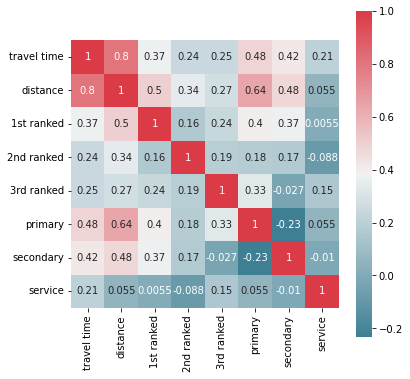

In [32]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(6,6))
corr = df_.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [33]:
x = np.array(df_.iloc[:,1:])
y = np.array(df_['travel time'])
x

array([[0.54262962, 0.9522711 , 0.5409304 , ..., 0.53413789, 0.        ,
        0.        ],
       [0.53177068, 0.9522711 , 0.5409304 , ..., 0.52342545, 0.        ,
        0.        ],
       [0.29643314, 0.9522711 , 0.        , ..., 0.25642237, 0.        ,
        0.06608168],
       ...,
       [0.38481239, 0.9522711 , 0.37737054, ..., 0.30278682, 0.        ,
        0.        ],
       [0.67939324, 0.9522711 , 1.        , ..., 0.64900394, 0.04723632,
        0.        ],
       [0.18872099, 0.9522711 , 0.5409304 , ..., 0.1271752 , 0.        ,
        0.        ]])

In [34]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
print(X_train.shape)
print(X_test.shape)
# X_train

(6525, 7)
(1632, 7)


In [36]:
# inputs: distance + roadtypes distance
model8_1_3 = nnmodel_(50, num_hlayers=1,Epoch=500)
model8_1_3

Epoch 1/500
204/204 [==============================] - 1s 2ms/step - loss: 759312.0000 - mape: 99.4615 - rmse: 871.3851 - val_loss: 779697.6250 - val_mape: 98.4750 - val_rmse: 883.0049
Epoch 2/500
204/204 [==============================] - 0s 831us/step - loss: 726843.5000 - mape: 96.5051 - rmse: 852.5511 - val_loss: 731144.2500 - val_mape: 94.1328 - val_rmse: 855.0698
Epoch 3/500
204/204 [==============================] - 0s 797us/step - loss: 665109.1875 - mape: 90.7210 - rmse: 815.5422 - val_loss: 656926.9375 - val_mape: 87.1564 - val_rmse: 810.5103
Epoch 4/500
204/204 [==============================] - 0s 734us/step - loss: 583201.7500 - mape: 82.5544 - rmse: 763.6765 - val_loss: 567289.4375 - val_mape: 78.0868 - val_rmse: 753.1862
Epoch 5/500
204/204 [==============================] - 0s 817us/step - loss: 491500.6562 - mape: 72.6840 - rmse: 701.0711 - val_loss: 472595.4062 - val_mape: 67.8130 - val_rmse: 687.4557
Epoch 6/500
204/204 [==============================] - 0s 729us/ste

Epoch 45/500
204/204 [==============================] - 0s 800us/step - loss: 57737.8984 - mape: 25.9546 - rmse: 240.2871 - val_loss: 69095.9688 - val_mape: 25.6600 - val_rmse: 262.8611
Epoch 46/500
204/204 [==============================] - 0s 813us/step - loss: 57445.8398 - mape: 25.9112 - rmse: 239.6786 - val_loss: 68694.1094 - val_mape: 25.7225 - val_rmse: 262.0956
Epoch 47/500
204/204 [==============================] - 0s 800us/step - loss: 57176.7070 - mape: 25.7844 - rmse: 239.1165 - val_loss: 68407.6797 - val_mape: 25.5131 - val_rmse: 261.5486
Epoch 48/500
204/204 [==============================] - 0s 799us/step - loss: 56934.7344 - mape: 25.8390 - rmse: 238.6100 - val_loss: 68250.7578 - val_mape: 25.0886 - val_rmse: 261.2485
Epoch 49/500
204/204 [==============================] - 0s 758us/step - loss: 56738.9609 - mape: 25.5701 - rmse: 238.1994 - val_loss: 67817.2578 - val_mape: 25.4378 - val_rmse: 260.4175
Epoch 50/500
204/204 [==============================] - 0s 767us/step 

204/204 [==============================] - 0s 769us/step - loss: 54096.9688 - mape: 24.9181 - rmse: 232.5876 - val_loss: 64416.6328 - val_mape: 24.5646 - val_rmse: 253.8043
Epoch 90/500
204/204 [==============================] - 0s 770us/step - loss: 54058.5234 - mape: 24.9048 - rmse: 232.5049 - val_loss: 64360.8477 - val_mape: 24.6026 - val_rmse: 253.6944
Epoch 91/500
204/204 [==============================] - 0s 760us/step - loss: 54040.2617 - mape: 24.9134 - rmse: 232.4656 - val_loss: 64324.0508 - val_mape: 24.5949 - val_rmse: 253.6219
Epoch 92/500
204/204 [==============================] - 0s 857us/step - loss: 54000.8477 - mape: 24.9404 - rmse: 232.3808 - val_loss: 64401.7930 - val_mape: 24.2899 - val_rmse: 253.7751
Epoch 93/500
204/204 [==============================] - 0s 850us/step - loss: 53950.2266 - mape: 24.8754 - rmse: 232.2719 - val_loss: 64293.8906 - val_mape: 24.4370 - val_rmse: 253.5624
Epoch 94/500
204/204 [==============================] - 0s 831us/step - loss: 53930

Epoch 133/500
204/204 [==============================] - 0s 787us/step - loss: 53002.3867 - mape: 24.3559 - rmse: 230.2225 - val_loss: 63187.7812 - val_mape: 24.1551 - val_rmse: 251.3718
Epoch 134/500
204/204 [==============================] - 0s 795us/step - loss: 52996.9492 - mape: 24.4324 - rmse: 230.2107 - val_loss: 63238.6367 - val_mape: 23.9398 - val_rmse: 251.4729
Epoch 135/500
204/204 [==============================] - 0s 795us/step - loss: 52979.3438 - mape: 24.3662 - rmse: 230.1724 - val_loss: 63238.7500 - val_mape: 23.8921 - val_rmse: 251.4732
Epoch 136/500
204/204 [==============================] - 0s 819us/step - loss: 52963.1172 - mape: 24.3794 - rmse: 230.1372 - val_loss: 63116.5039 - val_mape: 24.1745 - val_rmse: 251.2300
Epoch 137/500
204/204 [==============================] - 0s 777us/step - loss: 52956.8711 - mape: 24.3974 - rmse: 230.1236 - val_loss: 63105.7266 - val_mape: 24.1443 - val_rmse: 251.2085
Epoch 138/500
204/204 [==============================] - 0s 776us

Epoch 177/500
204/204 [==============================] - 0s 783us/step - loss: 52416.6562 - mape: 24.0274 - rmse: 228.9468 - val_loss: 62551.9062 - val_mape: 23.9576 - val_rmse: 250.1038
Epoch 178/500
204/204 [==============================] - 0s 770us/step - loss: 52417.0898 - mape: 24.0567 - rmse: 228.9478 - val_loss: 62554.8008 - val_mape: 23.9096 - val_rmse: 250.1096
Epoch 179/500
204/204 [==============================] - 0s 811us/step - loss: 52410.4570 - mape: 24.0757 - rmse: 228.9333 - val_loss: 62531.3047 - val_mape: 23.9330 - val_rmse: 250.0626
Epoch 180/500
204/204 [==============================] - 0s 759us/step - loss: 52388.8047 - mape: 24.1310 - rmse: 228.8860 - val_loss: 62673.5234 - val_mape: 23.5140 - val_rmse: 250.3468
Epoch 181/500
204/204 [==============================] - 0s 745us/step - loss: 52387.9180 - mape: 23.9158 - rmse: 228.8841 - val_loss: 62548.0781 - val_mape: 23.8135 - val_rmse: 250.0961
Epoch 182/500
204/204 [==============================] - 0s 756us

Epoch 221/500
204/204 [==============================] - 0s 852us/step - loss: 52090.0352 - mape: 23.8623 - rmse: 228.2324 - val_loss: 62347.6211 - val_mape: 23.4082 - val_rmse: 249.6951
Epoch 222/500
204/204 [==============================] - 0s 823us/step - loss: 52090.2734 - mape: 23.8148 - rmse: 228.2329 - val_loss: 62334.1484 - val_mape: 23.4133 - val_rmse: 249.6681
Epoch 223/500
204/204 [==============================] - 0s 866us/step - loss: 52082.6719 - mape: 23.8224 - rmse: 228.2163 - val_loss: 62279.8047 - val_mape: 23.5495 - val_rmse: 249.5592
Epoch 224/500
204/204 [==============================] - 0s 815us/step - loss: 52062.7344 - mape: 23.8674 - rmse: 228.1726 - val_loss: 62383.4453 - val_mape: 23.2869 - val_rmse: 249.7668
Epoch 225/500
204/204 [==============================] - 0s 829us/step - loss: 52073.6992 - mape: 23.8115 - rmse: 228.1966 - val_loss: 62300.5938 - val_mape: 23.4522 - val_rmse: 249.6009
Epoch 226/500
204/204 [==============================] - 0s 846us

Epoch 265/500
204/204 [==============================] - 0s 794us/step - loss: 51873.5430 - mape: 23.6614 - rmse: 227.7576 - val_loss: 62152.4180 - val_mape: 23.5017 - val_rmse: 249.3039
Epoch 266/500
204/204 [==============================] - 0s 810us/step - loss: 51867.0039 - mape: 23.7161 - rmse: 227.7433 - val_loss: 62168.3438 - val_mape: 23.4458 - val_rmse: 249.3358
Epoch 267/500
204/204 [==============================] - 0s 801us/step - loss: 51850.8594 - mape: 23.6804 - rmse: 227.7078 - val_loss: 62194.4766 - val_mape: 23.3733 - val_rmse: 249.3882
Epoch 268/500
204/204 [==============================] - 0s 814us/step - loss: 51852.8008 - mape: 23.6844 - rmse: 227.7121 - val_loss: 62183.6602 - val_mape: 23.3954 - val_rmse: 249.3665
Epoch 269/500
204/204 [==============================] - 0s 801us/step - loss: 51829.4805 - mape: 23.6247 - rmse: 227.6609 - val_loss: 62156.2539 - val_mape: 23.4696 - val_rmse: 249.3116
Epoch 270/500
204/204 [==============================] - 0s 781us

Epoch 309/500
204/204 [==============================] - 0s 772us/step - loss: 51672.0898 - mape: 23.4486 - rmse: 227.3150 - val_loss: 62134.3867 - val_mape: 23.5468 - val_rmse: 249.2677
Epoch 310/500
204/204 [==============================] - 0s 767us/step - loss: 51636.5781 - mape: 23.6345 - rmse: 227.2368 - val_loss: 62336.3594 - val_mape: 23.0133 - val_rmse: 249.6725
Epoch 311/500
204/204 [==============================] - 0s 771us/step - loss: 51635.4414 - mape: 23.4646 - rmse: 227.2343 - val_loss: 62150.4805 - val_mape: 23.4858 - val_rmse: 249.3000
Epoch 312/500
204/204 [==============================] - 0s 796us/step - loss: 51647.0820 - mape: 23.5732 - rmse: 227.2599 - val_loss: 62175.9844 - val_mape: 23.3944 - val_rmse: 249.3511
Epoch 313/500
204/204 [==============================] - 0s 776us/step - loss: 51651.3477 - mape: 23.6508 - rmse: 227.2693 - val_loss: 62274.2266 - val_mape: 23.1231 - val_rmse: 249.5480
Epoch 314/500
204/204 [==============================] - 0s 789us

Epoch 353/500
204/204 [==============================] - 0s 721us/step - loss: 51505.4609 - mape: 23.4628 - rmse: 226.9482 - val_loss: 62248.2070 - val_mape: 23.2417 - val_rmse: 249.4959
Epoch 354/500
204/204 [==============================] - 0s 788us/step - loss: 51489.3672 - mape: 23.5524 - rmse: 226.9127 - val_loss: 62329.5898 - val_mape: 23.0439 - val_rmse: 249.6590
Epoch 355/500
204/204 [==============================] - 0s 775us/step - loss: 51489.2812 - mape: 23.4671 - rmse: 226.9125 - val_loss: 62377.5195 - val_mape: 22.9489 - val_rmse: 249.7549
Epoch 356/500
204/204 [==============================] - 0s 793us/step - loss: 51497.7969 - mape: 23.3877 - rmse: 226.9313 - val_loss: 62269.2539 - val_mape: 23.2055 - val_rmse: 249.5381
Epoch 357/500
204/204 [==============================] - 0s 791us/step - loss: 51480.3789 - mape: 23.4242 - rmse: 226.8929 - val_loss: 62207.8125 - val_mape: 23.4045 - val_rmse: 249.4149
Epoch 358/500
204/204 [==============================] - 0s 766us

Epoch 397/500
204/204 [==============================] - 0s 841us/step - loss: 51329.2461 - mape: 23.3744 - rmse: 226.5596 - val_loss: 62309.4844 - val_mape: 23.1043 - val_rmse: 249.6187
Epoch 398/500
204/204 [==============================] - 0s 774us/step - loss: 51321.6133 - mape: 23.3314 - rmse: 226.5427 - val_loss: 62240.4688 - val_mape: 23.3196 - val_rmse: 249.4804
Epoch 399/500
204/204 [==============================] - 0s 795us/step - loss: 51346.5000 - mape: 23.3846 - rmse: 226.5977 - val_loss: 62314.4648 - val_mape: 23.0639 - val_rmse: 249.6286
Epoch 400/500
204/204 [==============================] - 0s 742us/step - loss: 51322.1133 - mape: 23.3923 - rmse: 226.5438 - val_loss: 62340.7070 - val_mape: 23.0150 - val_rmse: 249.6812
Epoch 401/500
204/204 [==============================] - 0s 791us/step - loss: 51313.0508 - mape: 23.3815 - rmse: 226.5238 - val_loss: 62324.1953 - val_mape: 23.0568 - val_rmse: 249.6481
Epoch 402/500
204/204 [==============================] - 0s 783us

Epoch 441/500
204/204 [==============================] - 0s 800us/step - loss: 51160.1445 - mape: 23.2315 - rmse: 226.1861 - val_loss: 62212.7461 - val_mape: 23.1148 - val_rmse: 249.4248
Epoch 442/500
204/204 [==============================] - 0s 747us/step - loss: 51147.7930 - mape: 23.2618 - rmse: 226.1588 - val_loss: 62211.5938 - val_mape: 23.1075 - val_rmse: 249.4225
Epoch 443/500
204/204 [==============================] - 0s 717us/step - loss: 51151.4180 - mape: 23.3091 - rmse: 226.1668 - val_loss: 62250.5508 - val_mape: 22.9728 - val_rmse: 249.5006
Epoch 444/500
204/204 [==============================] - 0s 787us/step - loss: 51141.2656 - mape: 23.2454 - rmse: 226.1443 - val_loss: 62229.5625 - val_mape: 23.0228 - val_rmse: 249.4585
Epoch 445/500
204/204 [==============================] - 0s 776us/step - loss: 51131.0234 - mape: 23.2167 - rmse: 226.1217 - val_loss: 62242.7734 - val_mape: 22.9865 - val_rmse: 249.4850
Epoch 446/500
204/204 [==============================] - 0s 817us

Epoch 485/500
204/204 [==============================] - 0s 779us/step - loss: 50978.4766 - mape: 23.2590 - rmse: 225.7841 - val_loss: 62153.0586 - val_mape: 22.9431 - val_rmse: 249.3051
Epoch 486/500
204/204 [==============================] - 0s 809us/step - loss: 50975.7305 - mape: 23.2624 - rmse: 225.7781 - val_loss: 62264.4570 - val_mape: 22.7015 - val_rmse: 249.5285
Epoch 487/500
204/204 [==============================] - 0s 747us/step - loss: 50996.4062 - mape: 23.0423 - rmse: 225.8238 - val_loss: 62111.0938 - val_mape: 23.0468 - val_rmse: 249.2210
Epoch 488/500
204/204 [==============================] - 0s 798us/step - loss: 50975.7070 - mape: 23.2254 - rmse: 225.7780 - val_loss: 62178.6328 - val_mape: 22.8585 - val_rmse: 249.3564
Epoch 489/500
204/204 [==============================] - 0s 772us/step - loss: 50972.8516 - mape: 23.1891 - rmse: 225.7717 - val_loss: 62118.5898 - val_mape: 23.0078 - val_rmse: 249.2360
Epoch 490/500
204/204 [==============================] - 0s 782us

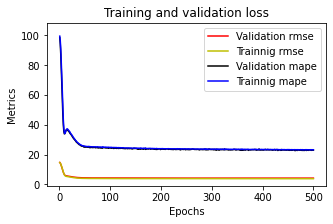

In [37]:
plotme(model8_1_3)

In [38]:
# inputs: distance + roadtypes distance
model8_1_5 = nnmodel_(100, num_hlayers=1,Epoch=500)
model8_1_5

Epoch 1/500
204/204 [==============================] - 0s 1ms/step - loss: 753124.6250 - mape: 98.8961 - rmse: 867.8275 - val_loss: 762770.5000 - val_mape: 96.9820 - val_rmse: 873.3673
Epoch 2/500
204/204 [==============================] - 0s 764us/step - loss: 689747.6250 - mape: 93.0491 - rmse: 830.5104 - val_loss: 669010.6875 - val_mape: 88.3309 - val_rmse: 817.9307
Epoch 3/500
204/204 [==============================] - 0s 835us/step - loss: 574995.1250 - mape: 81.6607 - rmse: 758.2843 - val_loss: 535907.6250 - val_mape: 74.7793 - val_rmse: 732.0571
Epoch 4/500
204/204 [==============================] - 0s 725us/step - loss: 437470.2188 - mape: 66.6120 - rmse: 661.4153 - val_loss: 395810.7812 - val_mape: 58.9449 - val_rmse: 629.1349
Epoch 5/500
204/204 [==============================] - 0s 866us/step - loss: 308795.9375 - mape: 51.2844 - rmse: 555.6941 - val_loss: 277485.1875 - val_mape: 44.7056 - val_rmse: 526.7686
Epoch 6/500
204/204 [==============================] - 0s 774us/ste

Epoch 45/500
204/204 [==============================] - 0s 746us/step - loss: 56226.3867 - mape: 25.5588 - rmse: 237.1210 - val_loss: 67068.1484 - val_mape: 25.1484 - val_rmse: 258.9752
Epoch 46/500
204/204 [==============================] - 0s 787us/step - loss: 56064.5156 - mape: 25.4733 - rmse: 236.7795 - val_loss: 66798.1250 - val_mape: 25.3715 - val_rmse: 258.4533
Epoch 47/500
204/204 [==============================] - 0s 784us/step - loss: 55932.1758 - mape: 25.4987 - rmse: 236.4998 - val_loss: 66611.9922 - val_mape: 25.3699 - val_rmse: 258.0930
Epoch 48/500
204/204 [==============================] - 0s 800us/step - loss: 55804.9531 - mape: 25.5647 - rmse: 236.2307 - val_loss: 66665.2734 - val_mape: 24.7651 - val_rmse: 258.1962
Epoch 49/500
204/204 [==============================] - 0s 796us/step - loss: 55712.4570 - mape: 25.3392 - rmse: 236.0349 - val_loss: 66413.0234 - val_mape: 24.9699 - val_rmse: 257.7072
Epoch 50/500
204/204 [==============================] - 0s 700us/step 

204/204 [==============================] - 0s 758us/step - loss: 53885.8945 - mape: 24.7902 - rmse: 232.1334 - val_loss: 64059.6875 - val_mape: 24.3023 - val_rmse: 253.1002
Epoch 90/500
204/204 [==============================] - 0s 778us/step - loss: 53811.3125 - mape: 24.6955 - rmse: 231.9727 - val_loss: 63974.6484 - val_mape: 24.4266 - val_rmse: 252.9321
Epoch 91/500
204/204 [==============================] - 0s 784us/step - loss: 53814.7891 - mape: 24.7290 - rmse: 231.9801 - val_loss: 63893.3867 - val_mape: 24.6086 - val_rmse: 252.7714
Epoch 92/500
204/204 [==============================] - 0s 734us/step - loss: 53771.4805 - mape: 24.6567 - rmse: 231.8868 - val_loss: 63867.1797 - val_mape: 24.5789 - val_rmse: 252.7196
Epoch 93/500
204/204 [==============================] - 0s 707us/step - loss: 53743.7812 - mape: 24.8179 - rmse: 231.8271 - val_loss: 63986.8984 - val_mape: 24.1441 - val_rmse: 252.9563
Epoch 94/500
204/204 [==============================] - 0s 753us/step - loss: 53710

Epoch 133/500
204/204 [==============================] - 0s 777us/step - loss: 52969.5820 - mape: 24.2430 - rmse: 230.1512 - val_loss: 63095.5117 - val_mape: 23.9021 - val_rmse: 251.1882
Epoch 134/500
204/204 [==============================] - 0s 791us/step - loss: 52970.3672 - mape: 24.2724 - rmse: 230.1529 - val_loss: 63240.9375 - val_mape: 23.5711 - val_rmse: 251.4775
Epoch 135/500
204/204 [==============================] - 0s 806us/step - loss: 52943.2031 - mape: 24.1677 - rmse: 230.0939 - val_loss: 63106.3516 - val_mape: 23.7965 - val_rmse: 251.2098
Epoch 136/500
204/204 [==============================] - 0s 770us/step - loss: 52914.9297 - mape: 24.1712 - rmse: 230.0325 - val_loss: 63067.9805 - val_mape: 23.8564 - val_rmse: 251.1334
Epoch 137/500
204/204 [==============================] - 0s 767us/step - loss: 52913.6562 - mape: 24.2066 - rmse: 230.0297 - val_loss: 63015.9453 - val_mape: 23.9464 - val_rmse: 251.0298
Epoch 138/500
204/204 [==============================] - 0s 766us

Epoch 177/500
204/204 [==============================] - 0s 777us/step - loss: 52500.6094 - mape: 23.8494 - rmse: 229.1301 - val_loss: 62631.3242 - val_mape: 23.7861 - val_rmse: 250.2625
Epoch 178/500
204/204 [==============================] - 0s 779us/step - loss: 52504.9336 - mape: 23.9382 - rmse: 229.1396 - val_loss: 62633.8438 - val_mape: 23.7528 - val_rmse: 250.2675
Epoch 179/500
204/204 [==============================] - 0s 768us/step - loss: 52507.3867 - mape: 23.9346 - rmse: 229.1449 - val_loss: 62711.9375 - val_mape: 23.5225 - val_rmse: 250.4235
Epoch 180/500
204/204 [==============================] - 0s 764us/step - loss: 52470.3281 - mape: 23.8019 - rmse: 229.0640 - val_loss: 62559.6797 - val_mape: 24.1751 - val_rmse: 250.1193
Epoch 181/500
204/204 [==============================] - 0s 696us/step - loss: 52490.2539 - mape: 24.0499 - rmse: 229.1075 - val_loss: 62723.8203 - val_mape: 23.4442 - val_rmse: 250.4472
Epoch 182/500
204/204 [==============================] - 0s 701us

Epoch 221/500
204/204 [==============================] - 0s 832us/step - loss: 52228.1055 - mape: 23.8653 - rmse: 228.5347 - val_loss: 62813.8516 - val_mape: 22.9534 - val_rmse: 250.6269
Epoch 222/500
204/204 [==============================] - 0s 798us/step - loss: 52249.8906 - mape: 23.6045 - rmse: 228.5824 - val_loss: 62571.3594 - val_mape: 23.3815 - val_rmse: 250.1427
Epoch 223/500
204/204 [==============================] - 0s 739us/step - loss: 52222.7539 - mape: 23.7311 - rmse: 228.5230 - val_loss: 62625.6211 - val_mape: 23.2670 - val_rmse: 250.2511
Epoch 224/500
204/204 [==============================] - 0s 811us/step - loss: 52207.6094 - mape: 23.6643 - rmse: 228.4898 - val_loss: 62485.5000 - val_mape: 23.6464 - val_rmse: 249.9710
Epoch 225/500
204/204 [==============================] - 0s 828us/step - loss: 52205.7891 - mape: 23.7852 - rmse: 228.4859 - val_loss: 62572.6172 - val_mape: 23.3542 - val_rmse: 250.1452
Epoch 226/500
204/204 [==============================] - 0s 765us

Epoch 265/500
204/204 [==============================] - 0s 825us/step - loss: 52016.0664 - mape: 23.5530 - rmse: 228.0703 - val_loss: 62618.1992 - val_mape: 23.1720 - val_rmse: 250.2363
Epoch 266/500
204/204 [==============================] - 0s 798us/step - loss: 52011.7305 - mape: 23.6303 - rmse: 228.0608 - val_loss: 62605.9180 - val_mape: 23.1819 - val_rmse: 250.2117
Epoch 267/500
204/204 [==============================] - 0s 796us/step - loss: 52002.5195 - mape: 23.5245 - rmse: 228.0406 - val_loss: 62600.3633 - val_mape: 23.2086 - val_rmse: 250.2007
Epoch 268/500
204/204 [==============================] - 0s 708us/step - loss: 51985.5273 - mape: 23.5518 - rmse: 228.0034 - val_loss: 62490.6094 - val_mape: 23.5274 - val_rmse: 249.9812
Epoch 269/500
204/204 [==============================] - 0s 784us/step - loss: 51930.8555 - mape: 23.7220 - rmse: 227.8834 - val_loss: 62925.6797 - val_mape: 22.6920 - val_rmse: 250.8499
Epoch 270/500
204/204 [==============================] - 0s 746us

Epoch 309/500
204/204 [==============================] - 0s 718us/step - loss: 51836.3789 - mape: 23.5072 - rmse: 227.6760 - val_loss: 62603.1328 - val_mape: 23.1797 - val_rmse: 250.2062
Epoch 310/500
204/204 [==============================] - 0s 758us/step - loss: 51821.4570 - mape: 23.4164 - rmse: 227.6433 - val_loss: 62552.7852 - val_mape: 23.3241 - val_rmse: 250.1055
Epoch 311/500
204/204 [==============================] - 0s 772us/step - loss: 51788.3008 - mape: 23.5434 - rmse: 227.5704 - val_loss: 62649.1289 - val_mape: 23.0480 - val_rmse: 250.2981
Epoch 312/500
204/204 [==============================] - 0s 773us/step - loss: 51797.9648 - mape: 23.4956 - rmse: 227.5917 - val_loss: 62675.5117 - val_mape: 23.0056 - val_rmse: 250.3508
Epoch 313/500
204/204 [==============================] - 0s 814us/step - loss: 51800.1875 - mape: 23.4270 - rmse: 227.5965 - val_loss: 62619.3008 - val_mape: 23.1180 - val_rmse: 250.2385
Epoch 314/500
204/204 [==============================] - 0s 733us

Epoch 353/500
204/204 [==============================] - 0s 728us/step - loss: 51625.6758 - mape: 23.3791 - rmse: 227.2128 - val_loss: 62554.8672 - val_mape: 23.2204 - val_rmse: 250.1097
Epoch 354/500
204/204 [==============================] - 0s 703us/step - loss: 51622.0625 - mape: 23.4096 - rmse: 227.2049 - val_loss: 62620.5898 - val_mape: 23.0345 - val_rmse: 250.2411
Epoch 355/500
204/204 [==============================] - 0s 700us/step - loss: 51623.1758 - mape: 23.3753 - rmse: 227.2073 - val_loss: 62600.9883 - val_mape: 23.0907 - val_rmse: 250.2019
Epoch 356/500
204/204 [==============================] - 0s 748us/step - loss: 51609.8594 - mape: 23.3181 - rmse: 227.1780 - val_loss: 62608.8008 - val_mape: 23.0802 - val_rmse: 250.2175
Epoch 357/500
204/204 [==============================] - 0s 746us/step - loss: 51605.3633 - mape: 23.4475 - rmse: 227.1681 - val_loss: 62643.4648 - val_mape: 22.9647 - val_rmse: 250.2868
Epoch 358/500
204/204 [==============================] - 0s 738us

Epoch 397/500
204/204 [==============================] - 0s 782us/step - loss: 51444.8125 - mape: 23.2919 - rmse: 226.8145 - val_loss: 62603.3789 - val_mape: 22.9871 - val_rmse: 250.2067
Epoch 398/500
204/204 [==============================] - 0s 758us/step - loss: 51436.4141 - mape: 23.2191 - rmse: 226.7960 - val_loss: 62527.0977 - val_mape: 23.2380 - val_rmse: 250.0542
Epoch 399/500
204/204 [==============================] - 0s 780us/step - loss: 51455.7148 - mape: 23.4409 - rmse: 226.8385 - val_loss: 62606.8828 - val_mape: 22.9728 - val_rmse: 250.2137
Epoch 400/500
204/204 [==============================] - 0s 762us/step - loss: 51433.4414 - mape: 23.2122 - rmse: 226.7894 - val_loss: 62509.5117 - val_mape: 23.2555 - val_rmse: 250.0190
Epoch 401/500
204/204 [==============================] - 0s 759us/step - loss: 51424.6562 - mape: 23.3962 - rmse: 226.7701 - val_loss: 62774.7461 - val_mape: 22.6700 - val_rmse: 250.5489
Epoch 402/500
204/204 [==============================] - 0s 707us

Epoch 441/500
204/204 [==============================] - 0s 733us/step - loss: 51266.3867 - mape: 23.2270 - rmse: 226.4208 - val_loss: 62670.3633 - val_mape: 22.7131 - val_rmse: 250.3405
Epoch 442/500
204/204 [==============================] - 0s 764us/step - loss: 51268.5508 - mape: 23.1837 - rmse: 226.4256 - val_loss: 62505.1406 - val_mape: 23.0833 - val_rmse: 250.0103
Epoch 443/500
204/204 [==============================] - 0s 782us/step - loss: 51250.5820 - mape: 23.2065 - rmse: 226.3859 - val_loss: 62501.9258 - val_mape: 23.0767 - val_rmse: 250.0038
Epoch 444/500
204/204 [==============================] - 0s 772us/step - loss: 51249.3906 - mape: 23.1596 - rmse: 226.3833 - val_loss: 62468.1758 - val_mape: 23.2153 - val_rmse: 249.9363
Epoch 445/500
204/204 [==============================] - 0s 796us/step - loss: 51264.0586 - mape: 23.2279 - rmse: 226.4157 - val_loss: 62458.3516 - val_mape: 23.2343 - val_rmse: 249.9167
Epoch 446/500
204/204 [==============================] - 0s 767us

Epoch 485/500
204/204 [==============================] - 0s 786us/step - loss: 51104.3711 - mape: 23.1067 - rmse: 226.0628 - val_loss: 62376.5820 - val_mape: 23.2091 - val_rmse: 249.7530
Epoch 486/500
204/204 [==============================] - 0s 746us/step - loss: 51103.6914 - mape: 23.2903 - rmse: 226.0612 - val_loss: 62584.1367 - val_mape: 22.6469 - val_rmse: 250.1682
Epoch 487/500
204/204 [==============================] - 0s 798us/step - loss: 51091.0000 - mape: 23.0217 - rmse: 226.0332 - val_loss: 62365.2148 - val_mape: 23.2127 - val_rmse: 249.7303
Epoch 488/500
204/204 [==============================] - 0s 751us/step - loss: 51086.7852 - mape: 23.2313 - rmse: 226.0239 - val_loss: 62414.0938 - val_mape: 23.0095 - val_rmse: 249.8281
Epoch 489/500
204/204 [==============================] - 0s 774us/step - loss: 51077.4375 - mape: 23.0227 - rmse: 226.0032 - val_loss: 62369.0195 - val_mape: 23.1907 - val_rmse: 249.7379
Epoch 490/500
204/204 [==============================] - 0s 744us

In [39]:
# inputs: distance + roadtypes distance
model8_1_1 = nnmodel_(100,50, num_hlayers=2,Epoch=500)
model8_1_1

Epoch 1/500
204/204 [==============================] - 0s 1ms/step - loss: 629719.3750 - mape: 86.5847 - rmse: 793.5486 - val_loss: 314794.2812 - val_mape: 49.2101 - val_rmse: 561.0653
Epoch 2/500
204/204 [==============================] - 0s 784us/step - loss: 126974.3828 - mape: 37.5310 - rmse: 356.3347 - val_loss: 111779.3203 - val_mape: 37.8284 - val_rmse: 334.3341
Epoch 3/500
204/204 [==============================] - 0s 785us/step - loss: 92966.4453 - mape: 37.1439 - rmse: 304.9040 - val_loss: 102807.9219 - val_mape: 36.4589 - val_rmse: 320.6367
Epoch 4/500
204/204 [==============================] - 0s 864us/step - loss: 84924.1875 - mape: 35.6044 - rmse: 291.4175 - val_loss: 94838.6875 - val_mape: 34.0724 - val_rmse: 307.9589
Epoch 5/500
204/204 [==============================] - 0s 873us/step - loss: 77643.6016 - mape: 33.6626 - rmse: 278.6460 - val_loss: 87699.0391 - val_mape: 31.8483 - val_rmse: 296.1402
Epoch 6/500
204/204 [==============================] - 0s 850us/step - l

204/204 [==============================] - 0s 837us/step - loss: 52994.0781 - mape: 23.5930 - rmse: 230.2044 - val_loss: 63043.2383 - val_mape: 23.8754 - val_rmse: 251.0841
Epoch 90/500
204/204 [==============================] - 0s 818us/step - loss: 52979.8555 - mape: 23.5172 - rmse: 230.1735 - val_loss: 63078.1914 - val_mape: 23.5294 - val_rmse: 251.1537
Epoch 91/500
204/204 [==============================] - 0s 762us/step - loss: 52928.6953 - mape: 23.6179 - rmse: 230.0624 - val_loss: 63080.7500 - val_mape: 23.6046 - val_rmse: 251.1588
Epoch 92/500
204/204 [==============================] - 0s 823us/step - loss: 52903.9727 - mape: 23.6377 - rmse: 230.0086 - val_loss: 63131.8867 - val_mape: 23.3960 - val_rmse: 251.2606
Epoch 93/500
204/204 [==============================] - 0s 803us/step - loss: 52919.0039 - mape: 23.7477 - rmse: 230.0413 - val_loss: 63788.5586 - val_mape: 22.4398 - val_rmse: 252.5640
Epoch 94/500
204/204 [==============================] - 0s 779us/step - loss: 52967

Epoch 133/500
204/204 [==============================] - 0s 776us/step - loss: 52896.7422 - mape: 23.6393 - rmse: 229.9929 - val_loss: 63764.6289 - val_mape: 22.5228 - val_rmse: 252.5166
Epoch 134/500
204/204 [==============================] - 0s 792us/step - loss: 52909.3242 - mape: 23.5009 - rmse: 230.0203 - val_loss: 63068.4648 - val_mape: 24.0053 - val_rmse: 251.1344
Epoch 135/500
204/204 [==============================] - 0s 838us/step - loss: 52933.7188 - mape: 23.7047 - rmse: 230.0733 - val_loss: 63878.3047 - val_mape: 22.4756 - val_rmse: 252.7416
Epoch 136/500
204/204 [==============================] - 0s 809us/step - loss: 52964.1914 - mape: 23.6231 - rmse: 230.1395 - val_loss: 63915.1914 - val_mape: 22.3803 - val_rmse: 252.8145
Epoch 137/500
204/204 [==============================] - 0s 799us/step - loss: 52985.1289 - mape: 23.5157 - rmse: 230.1850 - val_loss: 63326.7852 - val_mape: 23.0922 - val_rmse: 251.6481
Epoch 138/500
204/204 [==============================] - 0s 810us

Epoch 177/500
204/204 [==============================] - 0s 783us/step - loss: 52897.2852 - mape: 23.5810 - rmse: 229.9941 - val_loss: 63081.9844 - val_mape: 23.7538 - val_rmse: 251.1613
Epoch 178/500
204/204 [==============================] - 0s 881us/step - loss: 52936.9844 - mape: 23.6431 - rmse: 230.0804 - val_loss: 64061.6719 - val_mape: 22.2778 - val_rmse: 253.1041
Epoch 179/500
204/204 [==============================] - 0s 804us/step - loss: 52942.2109 - mape: 23.5217 - rmse: 230.0918 - val_loss: 63127.6992 - val_mape: 23.4390 - val_rmse: 251.2523
Epoch 180/500
204/204 [==============================] - 0s 807us/step - loss: 52936.3828 - mape: 23.6066 - rmse: 230.0791 - val_loss: 63258.7891 - val_mape: 23.0888 - val_rmse: 251.5130
Epoch 181/500
204/204 [==============================] - 0s 811us/step - loss: 52875.3594 - mape: 23.5074 - rmse: 229.9464 - val_loss: 63189.7539 - val_mape: 24.5556 - val_rmse: 251.3757
Epoch 182/500
204/204 [==============================] - 0s 771us

Epoch 221/500
204/204 [==============================] - 0s 827us/step - loss: 52950.8359 - mape: 23.5758 - rmse: 230.1105 - val_loss: 63247.6289 - val_mape: 23.1567 - val_rmse: 251.4908
Epoch 222/500
204/204 [==============================] - 0s 828us/step - loss: 52992.2852 - mape: 23.5418 - rmse: 230.2005 - val_loss: 63302.4961 - val_mape: 23.0366 - val_rmse: 251.5999
Epoch 223/500
204/204 [==============================] - 0s 783us/step - loss: 52927.4648 - mape: 23.5621 - rmse: 230.0597 - val_loss: 63125.9375 - val_mape: 24.4438 - val_rmse: 251.2487
Epoch 224/500
204/204 [==============================] - 0s 800us/step - loss: 52863.1172 - mape: 23.6299 - rmse: 229.9198 - val_loss: 63075.0898 - val_mape: 23.8036 - val_rmse: 251.1476
Epoch 225/500
204/204 [==============================] - 0s 799us/step - loss: 52908.3867 - mape: 23.4769 - rmse: 230.0182 - val_loss: 63119.1406 - val_mape: 23.5696 - val_rmse: 251.2352
Epoch 226/500
204/204 [==============================] - 0s 795us

Epoch 265/500
204/204 [==============================] - 0s 806us/step - loss: 52880.3789 - mape: 23.5987 - rmse: 229.9573 - val_loss: 63092.9453 - val_mape: 23.7154 - val_rmse: 251.1831
Epoch 266/500
204/204 [==============================] - 0s 773us/step - loss: 52945.7969 - mape: 23.6832 - rmse: 230.0995 - val_loss: 63535.0781 - val_mape: 22.7728 - val_rmse: 252.0617
Epoch 267/500
204/204 [==============================] - 0s 795us/step - loss: 52911.6758 - mape: 23.5779 - rmse: 230.0254 - val_loss: 63220.0391 - val_mape: 23.2856 - val_rmse: 251.4360
Epoch 268/500
204/204 [==============================] - 0s 840us/step - loss: 52917.5000 - mape: 23.4913 - rmse: 230.0380 - val_loss: 63383.9297 - val_mape: 22.9992 - val_rmse: 251.7617
Epoch 269/500
204/204 [==============================] - 0s 868us/step - loss: 52921.3242 - mape: 23.5673 - rmse: 230.0464 - val_loss: 63426.8242 - val_mape: 22.9100 - val_rmse: 251.8468
Epoch 270/500
204/204 [==============================] - 0s 767us

Epoch 309/500
204/204 [==============================] - 0s 783us/step - loss: 52967.2539 - mape: 23.4621 - rmse: 230.1462 - val_loss: 63280.2656 - val_mape: 23.1753 - val_rmse: 251.5557
Epoch 310/500
204/204 [==============================] - 0s 770us/step - loss: 52901.5977 - mape: 23.6378 - rmse: 230.0035 - val_loss: 63341.4688 - val_mape: 24.9104 - val_rmse: 251.6773
Epoch 311/500
204/204 [==============================] - 0s 766us/step - loss: 52985.0703 - mape: 23.6635 - rmse: 230.1849 - val_loss: 64668.6523 - val_mape: 21.9950 - val_rmse: 254.3003
Epoch 312/500
204/204 [==============================] - 0s 769us/step - loss: 52940.1953 - mape: 23.5555 - rmse: 230.0874 - val_loss: 63313.9023 - val_mape: 23.1585 - val_rmse: 251.6225
Epoch 313/500
204/204 [==============================] - 0s 766us/step - loss: 52925.4883 - mape: 23.5195 - rmse: 230.0554 - val_loss: 63134.1523 - val_mape: 23.5953 - val_rmse: 251.2651
Epoch 314/500
204/204 [==============================] - 0s 811us

Epoch 353/500
204/204 [==============================] - 0s 772us/step - loss: 52869.6797 - mape: 23.5688 - rmse: 229.9341 - val_loss: 63362.7109 - val_mape: 23.1105 - val_rmse: 251.7195
Epoch 354/500
204/204 [==============================] - 0s 872us/step - loss: 53001.9883 - mape: 23.5579 - rmse: 230.2216 - val_loss: 63156.0117 - val_mape: 24.2055 - val_rmse: 251.3086
Epoch 355/500
204/204 [==============================] - 0s 800us/step - loss: 52938.5078 - mape: 23.6609 - rmse: 230.0837 - val_loss: 63118.2852 - val_mape: 24.1740 - val_rmse: 251.2335
Epoch 356/500
204/204 [==============================] - 0s 821us/step - loss: 52905.4023 - mape: 23.5066 - rmse: 230.0117 - val_loss: 63202.3906 - val_mape: 23.4788 - val_rmse: 251.4009
Epoch 357/500
204/204 [==============================] - 0s 766us/step - loss: 52961.8945 - mape: 23.6626 - rmse: 230.1345 - val_loss: 63172.0391 - val_mape: 23.4662 - val_rmse: 251.3405
Epoch 358/500
204/204 [==============================] - 0s 829us

Epoch 397/500
204/204 [==============================] - 0s 844us/step - loss: 52887.6094 - mape: 23.5404 - rmse: 229.9731 - val_loss: 63105.8086 - val_mape: 24.1379 - val_rmse: 251.2087
Epoch 398/500
204/204 [==============================] - 0s 787us/step - loss: 52836.1523 - mape: 23.6213 - rmse: 229.8612 - val_loss: 63612.9766 - val_mape: 22.6722 - val_rmse: 252.2161
Epoch 399/500
204/204 [==============================] - 0s 827us/step - loss: 52920.8945 - mape: 23.5137 - rmse: 230.0454 - val_loss: 63238.9062 - val_mape: 23.2390 - val_rmse: 251.4735
Epoch 400/500
204/204 [==============================] - 0s 770us/step - loss: 52919.8750 - mape: 23.5294 - rmse: 230.0432 - val_loss: 63229.3086 - val_mape: 23.2661 - val_rmse: 251.4544
Epoch 401/500
204/204 [==============================] - 0s 794us/step - loss: 52878.4609 - mape: 23.5500 - rmse: 229.9532 - val_loss: 63104.6328 - val_mape: 24.0214 - val_rmse: 251.2064
Epoch 402/500
204/204 [==============================] - 0s 754us

Epoch 441/500
204/204 [==============================] - 0s 786us/step - loss: 52963.5469 - mape: 23.5560 - rmse: 230.1381 - val_loss: 63170.9961 - val_mape: 23.5888 - val_rmse: 251.3384
Epoch 442/500
204/204 [==============================] - 0s 764us/step - loss: 52925.0273 - mape: 23.6976 - rmse: 230.0544 - val_loss: 63220.0977 - val_mape: 23.3544 - val_rmse: 251.4361
Epoch 443/500
204/204 [==============================] - 0s 784us/step - loss: 52884.7070 - mape: 23.5184 - rmse: 229.9668 - val_loss: 63124.8984 - val_mape: 23.5981 - val_rmse: 251.2467
Epoch 444/500
204/204 [==============================] - 0s 770us/step - loss: 52927.7539 - mape: 23.5515 - rmse: 230.0603 - val_loss: 63121.9844 - val_mape: 23.8439 - val_rmse: 251.2409
Epoch 445/500
204/204 [==============================] - 0s 828us/step - loss: 52910.9766 - mape: 23.5759 - rmse: 230.0239 - val_loss: 63242.5156 - val_mape: 23.2517 - val_rmse: 251.4807
Epoch 446/500
204/204 [==============================] - 0s 832us

Epoch 485/500
204/204 [==============================] - 0s 804us/step - loss: 52876.2109 - mape: 23.5530 - rmse: 229.9483 - val_loss: 63698.0352 - val_mape: 22.6292 - val_rmse: 252.3847
Epoch 486/500
204/204 [==============================] - 0s 809us/step - loss: 52871.4258 - mape: 23.5859 - rmse: 229.9379 - val_loss: 63171.0312 - val_mape: 23.6195 - val_rmse: 251.3385
Epoch 487/500
204/204 [==============================] - 0s 773us/step - loss: 52890.9883 - mape: 23.5673 - rmse: 229.9804 - val_loss: 63245.1602 - val_mape: 23.2570 - val_rmse: 251.4859
Epoch 488/500
204/204 [==============================] - 0s 753us/step - loss: 52895.1094 - mape: 23.5270 - rmse: 229.9894 - val_loss: 63135.5508 - val_mape: 23.6437 - val_rmse: 251.2679
Epoch 489/500
204/204 [==============================] - 0s 750us/step - loss: 52835.6992 - mape: 23.5908 - rmse: 229.8602 - val_loss: 63213.0000 - val_mape: 24.6004 - val_rmse: 251.4220
Epoch 490/500
204/204 [==============================] - 0s 808us

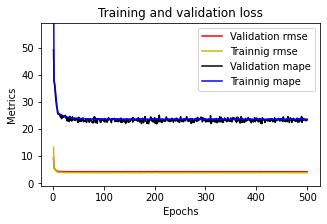

In [40]:
plotme(model8_1_1)

In [41]:
# inputs: distance + hour + roadtypes distance
model8_1_2 = nnmodel_(200,100, num_hlayers=2,Epoch=500)
model8_1_2

Epoch 1/500
204/204 [==============================] - 0s 1ms/step - loss: 467199.8750 - mape: 69.7588 - rmse: 683.5202 - val_loss: 116447.3906 - val_mape: 39.0895 - val_rmse: 341.2439
Epoch 2/500
204/204 [==============================] - 0s 909us/step - loss: 93803.2656 - mape: 37.6695 - rmse: 306.2732 - val_loss: 100045.8984 - val_mape: 35.0150 - val_rmse: 316.3003
Epoch 3/500
204/204 [==============================] - 0s 836us/step - loss: 79685.7812 - mape: 34.1199 - rmse: 282.2867 - val_loss: 86653.1406 - val_mape: 31.8329 - val_rmse: 294.3690
Epoch 4/500
204/204 [==============================] - 0s 831us/step - loss: 68754.3047 - mape: 30.9889 - rmse: 262.2104 - val_loss: 76743.6719 - val_mape: 28.6888 - val_rmse: 277.0265
Epoch 5/500
204/204 [==============================] - 0s 914us/step - loss: 61453.5664 - mape: 28.1236 - rmse: 247.8983 - val_loss: 70559.9531 - val_mape: 26.1596 - val_rmse: 265.6312
Epoch 6/500
204/204 [==============================] - 0s 902us/step - los

204/204 [==============================] - 0s 855us/step - loss: 52953.4023 - mape: 23.5247 - rmse: 230.1161 - val_loss: 63444.3672 - val_mape: 22.8370 - val_rmse: 251.8817
Epoch 90/500
204/204 [==============================] - 0s 875us/step - loss: 53044.2578 - mape: 23.5485 - rmse: 230.3134 - val_loss: 63162.1523 - val_mape: 23.4207 - val_rmse: 251.3208
Epoch 91/500
204/204 [==============================] - 0s 823us/step - loss: 52919.2812 - mape: 23.7310 - rmse: 230.0419 - val_loss: 63079.7383 - val_mape: 23.4886 - val_rmse: 251.1568
Epoch 92/500
204/204 [==============================] - 0s 864us/step - loss: 52955.5859 - mape: 23.4668 - rmse: 230.1208 - val_loss: 63039.6484 - val_mape: 24.0745 - val_rmse: 251.0770
Epoch 93/500
204/204 [==============================] - 0s 881us/step - loss: 53020.6602 - mape: 23.7419 - rmse: 230.2622 - val_loss: 63419.0742 - val_mape: 22.9504 - val_rmse: 251.8314
Epoch 94/500
204/204 [==============================] - 0s 848us/step - loss: 52950

Epoch 133/500
204/204 [==============================] - 0s 895us/step - loss: 52962.3477 - mape: 23.6486 - rmse: 230.1355 - val_loss: 63328.0234 - val_mape: 24.8500 - val_rmse: 251.6506
Epoch 134/500
204/204 [==============================] - 0s 829us/step - loss: 52973.2461 - mape: 23.5442 - rmse: 230.1592 - val_loss: 63163.3008 - val_mape: 24.5188 - val_rmse: 251.3231
Epoch 135/500
204/204 [==============================] - 0s 809us/step - loss: 53082.3164 - mape: 23.8142 - rmse: 230.3960 - val_loss: 63061.2852 - val_mape: 23.7382 - val_rmse: 251.1201
Epoch 136/500
204/204 [==============================] - 0s 853us/step - loss: 52979.8945 - mape: 23.6346 - rmse: 230.1736 - val_loss: 64495.1875 - val_mape: 22.0489 - val_rmse: 253.9590
Epoch 137/500
204/204 [==============================] - 0s 856us/step - loss: 53043.5039 - mape: 23.5454 - rmse: 230.3118 - val_loss: 63104.8516 - val_mape: 23.7731 - val_rmse: 251.2068
Epoch 138/500
204/204 [==============================] - 0s 855us

Epoch 177/500
204/204 [==============================] - 0s 836us/step - loss: 52924.7734 - mape: 23.7042 - rmse: 230.0538 - val_loss: 63149.1328 - val_mape: 23.7415 - val_rmse: 251.2949
Epoch 178/500
204/204 [==============================] - 0s 824us/step - loss: 52973.0898 - mape: 23.5055 - rmse: 230.1588 - val_loss: 63077.5430 - val_mape: 24.0402 - val_rmse: 251.1524
Epoch 179/500
204/204 [==============================] - 0s 840us/step - loss: 53045.1289 - mape: 23.7191 - rmse: 230.3153 - val_loss: 63663.8516 - val_mape: 22.6718 - val_rmse: 252.3170
Epoch 180/500
204/204 [==============================] - 0s 840us/step - loss: 52986.9727 - mape: 23.6200 - rmse: 230.1890 - val_loss: 64023.2109 - val_mape: 22.3588 - val_rmse: 253.0281
Epoch 181/500
204/204 [==============================] - 0s 854us/step - loss: 53109.8008 - mape: 23.5452 - rmse: 230.4556 - val_loss: 63155.8984 - val_mape: 23.6422 - val_rmse: 251.3084
Epoch 182/500
204/204 [==============================] - 0s 823us

Epoch 221/500
204/204 [==============================] - 0s 867us/step - loss: 52972.4141 - mape: 23.6269 - rmse: 230.1574 - val_loss: 63211.4453 - val_mape: 23.1904 - val_rmse: 251.4189
Epoch 222/500
204/204 [==============================] - 0s 839us/step - loss: 53044.6406 - mape: 23.6308 - rmse: 230.3142 - val_loss: 63906.6719 - val_mape: 22.3724 - val_rmse: 252.7977
Epoch 223/500
204/204 [==============================] - 0s 823us/step - loss: 53007.2031 - mape: 23.4688 - rmse: 230.2329 - val_loss: 63311.4961 - val_mape: 23.0899 - val_rmse: 251.6178
Epoch 224/500
204/204 [==============================] - 0s 934us/step - loss: 52916.9453 - mape: 23.7478 - rmse: 230.0368 - val_loss: 63837.9609 - val_mape: 22.3979 - val_rmse: 252.6618
Epoch 225/500
204/204 [==============================] - 0s 842us/step - loss: 53081.3750 - mape: 23.5590 - rmse: 230.3940 - val_loss: 63351.9961 - val_mape: 24.8013 - val_rmse: 251.6982
Epoch 226/500
204/204 [==============================] - 0s 892us

Epoch 265/500
204/204 [==============================] - 0s 831us/step - loss: 52955.4375 - mape: 23.6410 - rmse: 230.1205 - val_loss: 63125.0625 - val_mape: 23.7933 - val_rmse: 251.2470
Epoch 266/500
204/204 [==============================] - 0s 869us/step - loss: 52974.1797 - mape: 23.5714 - rmse: 230.1612 - val_loss: 63140.3320 - val_mape: 24.2602 - val_rmse: 251.2774
Epoch 267/500
204/204 [==============================] - 0s 903us/step - loss: 53027.6484 - mape: 23.6466 - rmse: 230.2773 - val_loss: 63761.3398 - val_mape: 22.6320 - val_rmse: 252.5101
Epoch 268/500
204/204 [==============================] - 0s 849us/step - loss: 52941.6797 - mape: 23.6154 - rmse: 230.0906 - val_loss: 63106.2109 - val_mape: 23.6921 - val_rmse: 251.2095
Epoch 269/500
204/204 [==============================] - 0s 826us/step - loss: 53094.3711 - mape: 23.5644 - rmse: 230.4222 - val_loss: 63140.8125 - val_mape: 24.4818 - val_rmse: 251.2784
Epoch 270/500
204/204 [==============================] - 0s 867us

Epoch 309/500
204/204 [==============================] - 0s 825us/step - loss: 52976.5898 - mape: 23.6793 - rmse: 230.1664 - val_loss: 63133.6602 - val_mape: 23.6609 - val_rmse: 251.2641
Epoch 310/500
204/204 [==============================] - 0s 880us/step - loss: 52892.3516 - mape: 23.6513 - rmse: 229.9834 - val_loss: 64228.6133 - val_mape: 22.1486 - val_rmse: 253.4336
Epoch 311/500
204/204 [==============================] - 0s 879us/step - loss: 52971.8008 - mape: 23.5116 - rmse: 230.1560 - val_loss: 63233.8984 - val_mape: 23.2595 - val_rmse: 251.4635
Epoch 312/500
204/204 [==============================] - 0s 853us/step - loss: 52821.1016 - mape: 23.6325 - rmse: 229.8284 - val_loss: 63987.0391 - val_mape: 22.4202 - val_rmse: 252.9566
Epoch 313/500
204/204 [==============================] - 0s 851us/step - loss: 52918.1367 - mape: 23.6420 - rmse: 230.0394 - val_loss: 63301.5352 - val_mape: 23.2329 - val_rmse: 251.5980
Epoch 314/500
204/204 [==============================] - 0s 883us

Epoch 353/500
204/204 [==============================] - 0s 810us/step - loss: 52945.1680 - mape: 23.6086 - rmse: 230.0982 - val_loss: 63348.1523 - val_mape: 22.9715 - val_rmse: 251.6906
Epoch 354/500
204/204 [==============================] - 0s 906us/step - loss: 52809.6797 - mape: 23.5059 - rmse: 229.8036 - val_loss: 63274.1133 - val_mape: 23.0256 - val_rmse: 251.5435
Epoch 355/500
204/204 [==============================] - 0s 835us/step - loss: 52872.8828 - mape: 23.6684 - rmse: 229.9410 - val_loss: 63049.0781 - val_mape: 23.7069 - val_rmse: 251.0957
Epoch 356/500
204/204 [==============================] - 0s 833us/step - loss: 52798.9883 - mape: 23.6290 - rmse: 229.7803 - val_loss: 63575.9297 - val_mape: 22.5681 - val_rmse: 252.1427
Epoch 357/500
204/204 [==============================] - 0s 869us/step - loss: 52829.6914 - mape: 23.4744 - rmse: 229.8471 - val_loss: 63082.6133 - val_mape: 23.8321 - val_rmse: 251.1625
Epoch 358/500
204/204 [==============================] - 0s 850us

Epoch 397/500
204/204 [==============================] - 0s 834us/step - loss: 52844.0195 - mape: 23.6333 - rmse: 229.8783 - val_loss: 63134.8711 - val_mape: 23.0706 - val_rmse: 251.2665
Epoch 398/500
204/204 [==============================] - 0s 864us/step - loss: 52795.7891 - mape: 23.5188 - rmse: 229.7733 - val_loss: 62945.4180 - val_mape: 23.8737 - val_rmse: 250.8893
Epoch 399/500
204/204 [==============================] - 0s 857us/step - loss: 52735.0352 - mape: 23.5982 - rmse: 229.6411 - val_loss: 63096.2500 - val_mape: 23.1308 - val_rmse: 251.1897
Epoch 400/500
204/204 [==============================] - 0s 869us/step - loss: 52722.3281 - mape: 23.5521 - rmse: 229.6134 - val_loss: 63444.9219 - val_mape: 22.7248 - val_rmse: 251.8828
Epoch 401/500
204/204 [==============================] - 0s 860us/step - loss: 52743.3672 - mape: 23.5442 - rmse: 229.6592 - val_loss: 63009.1289 - val_mape: 24.0115 - val_rmse: 251.0162
Epoch 402/500
204/204 [==============================] - 0s 881us

Epoch 441/500
204/204 [==============================] - 0s 889us/step - loss: 52750.0547 - mape: 23.5626 - rmse: 229.6738 - val_loss: 63561.9102 - val_mape: 22.5397 - val_rmse: 252.1149
Epoch 442/500
204/204 [==============================] - 0s 868us/step - loss: 52860.0508 - mape: 23.6067 - rmse: 229.9131 - val_loss: 64121.0039 - val_mape: 22.1310 - val_rmse: 253.2213
Epoch 443/500
204/204 [==============================] - 0s 818us/step - loss: 52863.7305 - mape: 23.6282 - rmse: 229.9211 - val_loss: 63010.0352 - val_mape: 23.3991 - val_rmse: 251.0180
Epoch 444/500
204/204 [==============================] - 0s 880us/step - loss: 52945.9922 - mape: 23.6957 - rmse: 230.1000 - val_loss: 63038.1406 - val_mape: 23.2870 - val_rmse: 251.0740
Epoch 445/500
204/204 [==============================] - 0s 842us/step - loss: 52720.7734 - mape: 23.6817 - rmse: 229.6100 - val_loss: 63263.6523 - val_mape: 22.7587 - val_rmse: 251.5227
Epoch 446/500
204/204 [==============================] - 0s 835us

Epoch 485/500
204/204 [==============================] - 0s 854us/step - loss: 52696.4336 - mape: 23.5404 - rmse: 229.5570 - val_loss: 63280.2383 - val_mape: 22.8044 - val_rmse: 251.5556
Epoch 486/500
204/204 [==============================] - 0s 864us/step - loss: 52705.3828 - mape: 23.5883 - rmse: 229.5765 - val_loss: 63476.3320 - val_mape: 22.5939 - val_rmse: 251.9451
Epoch 487/500
204/204 [==============================] - 0s 832us/step - loss: 52775.6172 - mape: 23.5483 - rmse: 229.7294 - val_loss: 63033.3789 - val_mape: 24.7624 - val_rmse: 251.0645
Epoch 488/500
204/204 [==============================] - 0s 833us/step - loss: 52709.3008 - mape: 23.5982 - rmse: 229.5851 - val_loss: 62949.6328 - val_mape: 23.2473 - val_rmse: 250.8977
Epoch 489/500
204/204 [==============================] - 0s 863us/step - loss: 52712.3438 - mape: 23.6275 - rmse: 229.5917 - val_loss: 62967.5234 - val_mape: 23.3731 - val_rmse: 250.9333
Epoch 490/500
204/204 [==============================] - 0s 856us

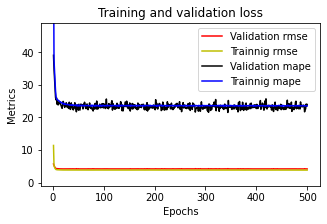

In [42]:
plotme(model8_1_2)

In [43]:
# inputs: distance + roadtypes distance
model8_1_4 = nnmodel_(10, num_hlayers=1,Epoch=500)
model8_1_4

Epoch 1/500
204/204 [==============================] - 0s 1ms/step - loss: 764640.4375 - mape: 99.9332 - rmse: 874.4372 - val_loss: 794548.9375 - val_mape: 99.7611 - val_rmse: 891.3748
Epoch 2/500
204/204 [==============================] - 0s 789us/step - loss: 758031.0000 - mape: 99.3239 - rmse: 870.6498 - val_loss: 783591.3750 - val_mape: 98.7865 - val_rmse: 885.2070
Epoch 3/500
204/204 [==============================] - 0s 755us/step - loss: 743647.3750 - mape: 98.0161 - rmse: 862.3499 - val_loss: 765529.7500 - val_mape: 97.1824 - val_rmse: 874.9456
Epoch 4/500
204/204 [==============================] - 0s 715us/step - loss: 722857.1875 - mape: 96.1180 - rmse: 850.2101 - val_loss: 741949.0000 - val_mape: 95.0612 - val_rmse: 861.3646
Epoch 5/500
204/204 [==============================] - 0s 710us/step - loss: 697291.5625 - mape: 93.7459 - rmse: 835.0399 - val_loss: 714033.6250 - val_mape: 92.5017 - val_rmse: 845.0051
Epoch 6/500
204/204 [==============================] - 0s 742us/ste

Epoch 45/500
204/204 [==============================] - 0s 721us/step - loss: 88086.2344 - mape: 35.9554 - rmse: 296.7932 - val_loss: 101814.1875 - val_mape: 35.4777 - val_rmse: 319.0833
Epoch 46/500
204/204 [==============================] - 0s 801us/step - loss: 87166.5156 - mape: 35.7290 - rmse: 295.2397 - val_loss: 100842.1641 - val_mape: 35.2821 - val_rmse: 317.5565
Epoch 47/500
204/204 [==============================] - 0s 803us/step - loss: 86253.6719 - mape: 35.5808 - rmse: 293.6898 - val_loss: 99904.8906 - val_mape: 35.0289 - val_rmse: 316.0774
Epoch 48/500
204/204 [==============================] - 0s 714us/step - loss: 85350.3516 - mape: 35.3291 - rmse: 292.1478 - val_loss: 98924.8594 - val_mape: 34.8740 - val_rmse: 314.5232
Epoch 49/500
204/204 [==============================] - 0s 753us/step - loss: 84453.8984 - mape: 35.1010 - rmse: 290.6095 - val_loss: 97978.7812 - val_mape: 34.6783 - val_rmse: 313.0156
Epoch 50/500
204/204 [==============================] - 0s 758us/ste

204/204 [==============================] - 0s 718us/step - loss: 61176.4570 - mape: 27.6302 - rmse: 247.3387 - val_loss: 73165.5156 - val_mape: 27.3139 - val_rmse: 270.4912
Epoch 90/500
204/204 [==============================] - 0s 765us/step - loss: 60897.1562 - mape: 27.5797 - rmse: 246.7735 - val_loss: 72896.8984 - val_mape: 27.0814 - val_rmse: 269.9943
Epoch 91/500
204/204 [==============================] - 0s 752us/step - loss: 60627.9414 - mape: 27.2523 - rmse: 246.2274 - val_loss: 72564.9766 - val_mape: 27.0607 - val_rmse: 269.3789
Epoch 92/500
204/204 [==============================] - 0s 696us/step - loss: 60373.7266 - mape: 27.2074 - rmse: 245.7107 - val_loss: 72258.6406 - val_mape: 27.0162 - val_rmse: 268.8097
Epoch 93/500
204/204 [==============================] - 0s 713us/step - loss: 60138.3203 - mape: 27.2462 - rmse: 245.2312 - val_loss: 72010.5781 - val_mape: 26.8388 - val_rmse: 268.3479
Epoch 94/500
204/204 [==============================] - 0s 765us/step - loss: 59906

Epoch 133/500
204/204 [==============================] - 0s 742us/step - loss: 55869.5781 - mape: 25.3365 - rmse: 236.3675 - val_loss: 66765.6016 - val_mape: 25.0383 - val_rmse: 258.3904
Epoch 134/500
204/204 [==============================] - 0s 689us/step - loss: 55825.6992 - mape: 25.3339 - rmse: 236.2746 - val_loss: 66689.8984 - val_mape: 25.0821 - val_rmse: 258.2439
Epoch 135/500
204/204 [==============================] - 0s 777us/step - loss: 55792.8594 - mape: 25.4286 - rmse: 236.2051 - val_loss: 66647.3125 - val_mape: 25.0406 - val_rmse: 258.1614
Epoch 136/500
204/204 [==============================] - 0s 753us/step - loss: 55756.2734 - mape: 25.4452 - rmse: 236.1277 - val_loss: 66612.2812 - val_mape: 24.9817 - val_rmse: 258.0935
Epoch 137/500
204/204 [==============================] - 0s 725us/step - loss: 55723.3281 - mape: 25.3221 - rmse: 236.0579 - val_loss: 66560.1172 - val_mape: 24.9783 - val_rmse: 257.9925
Epoch 138/500
204/204 [==============================] - 0s 698us

Epoch 177/500
204/204 [==============================] - 0s 742us/step - loss: 54794.8711 - mape: 25.0705 - rmse: 234.0830 - val_loss: 65284.9102 - val_mape: 24.7107 - val_rmse: 255.5091
Epoch 178/500
204/204 [==============================] - 0s 696us/step - loss: 54773.8711 - mape: 25.1317 - rmse: 234.0382 - val_loss: 65259.6523 - val_mape: 24.7156 - val_rmse: 255.4597
Epoch 179/500
204/204 [==============================] - 0s 716us/step - loss: 54755.0664 - mape: 25.0823 - rmse: 233.9980 - val_loss: 65210.6172 - val_mape: 24.7819 - val_rmse: 255.3637
Epoch 180/500
204/204 [==============================] - 0s 741us/step - loss: 54739.4492 - mape: 25.1383 - rmse: 233.9646 - val_loss: 65229.3906 - val_mape: 24.6699 - val_rmse: 255.4005
Epoch 181/500
204/204 [==============================] - 0s 805us/step - loss: 54723.7188 - mape: 25.1047 - rmse: 233.9310 - val_loss: 65196.7148 - val_mape: 24.6952 - val_rmse: 255.3365
Epoch 182/500
204/204 [==============================] - 0s 739us

Epoch 221/500
204/204 [==============================] - 0s 718us/step - loss: 54138.0078 - mape: 24.9024 - rmse: 232.6758 - val_loss: 64480.1562 - val_mape: 24.5152 - val_rmse: 253.9294
Epoch 222/500
204/204 [==============================] - 0s 728us/step - loss: 54127.6992 - mape: 24.9018 - rmse: 232.6536 - val_loss: 64505.1133 - val_mape: 24.4127 - val_rmse: 253.9786
Epoch 223/500
204/204 [==============================] - 0s 849us/step - loss: 54116.0000 - mape: 24.9577 - rmse: 232.6285 - val_loss: 64478.2266 - val_mape: 24.4336 - val_rmse: 253.9256
Epoch 224/500
204/204 [==============================] - 0s 731us/step - loss: 54108.0391 - mape: 24.8471 - rmse: 232.6113 - val_loss: 64454.8086 - val_mape: 24.4523 - val_rmse: 253.8795
Epoch 225/500
204/204 [==============================] - 0s 716us/step - loss: 54097.9062 - mape: 24.8316 - rmse: 232.5896 - val_loss: 64390.6406 - val_mape: 24.5835 - val_rmse: 253.7531
Epoch 226/500
204/204 [==============================] - 0s 734us

Epoch 265/500
204/204 [==============================] - 0s 786us/step - loss: 53642.9648 - mape: 24.7180 - rmse: 231.6095 - val_loss: 63923.1484 - val_mape: 24.2661 - val_rmse: 252.8303
Epoch 266/500
204/204 [==============================] - 0s 691us/step - loss: 53634.6758 - mape: 24.6694 - rmse: 231.5916 - val_loss: 63928.3320 - val_mape: 24.2226 - val_rmse: 252.8405
Epoch 267/500
204/204 [==============================] - 0s 736us/step - loss: 53621.7812 - mape: 24.6774 - rmse: 231.5638 - val_loss: 63892.9492 - val_mape: 24.2824 - val_rmse: 252.7706
Epoch 268/500
204/204 [==============================] - 0s 759us/step - loss: 53620.1992 - mape: 24.6375 - rmse: 231.5604 - val_loss: 63885.9297 - val_mape: 24.2648 - val_rmse: 252.7567
Epoch 269/500
204/204 [==============================] - 0s 691us/step - loss: 53605.3398 - mape: 24.7029 - rmse: 231.5283 - val_loss: 63908.4375 - val_mape: 24.1832 - val_rmse: 252.8012
Epoch 270/500
204/204 [==============================] - 0s 696us

Epoch 309/500
204/204 [==============================] - 0s 839us/step - loss: 53263.9375 - mape: 24.5050 - rmse: 230.7898 - val_loss: 63464.3086 - val_mape: 24.1647 - val_rmse: 251.9212
Epoch 310/500
204/204 [==============================] - 0s 710us/step - loss: 53251.9336 - mape: 24.4307 - rmse: 230.7638 - val_loss: 63458.2109 - val_mape: 24.1488 - val_rmse: 251.9091
Epoch 311/500
204/204 [==============================] - 0s 752us/step - loss: 53247.3125 - mape: 24.5334 - rmse: 230.7538 - val_loss: 63462.7539 - val_mape: 24.1111 - val_rmse: 251.9182
Epoch 312/500
204/204 [==============================] - 0s 736us/step - loss: 53240.8008 - mape: 24.5097 - rmse: 230.7397 - val_loss: 63475.3477 - val_mape: 24.0576 - val_rmse: 251.9431
Epoch 313/500
204/204 [==============================] - 0s 754us/step - loss: 53231.3320 - mape: 24.4994 - rmse: 230.7192 - val_loss: 63504.6602 - val_mape: 23.9698 - val_rmse: 252.0013
Epoch 314/500
204/204 [==============================] - 0s 749us

Epoch 353/500
204/204 [==============================] - 0s 707us/step - loss: 52958.0234 - mape: 24.2157 - rmse: 230.1261 - val_loss: 63139.4062 - val_mape: 24.0193 - val_rmse: 251.2756
Epoch 354/500
204/204 [==============================] - 0s 774us/step - loss: 52956.6641 - mape: 24.4000 - rmse: 230.1232 - val_loss: 63174.1680 - val_mape: 23.8973 - val_rmse: 251.3447
Epoch 355/500
204/204 [==============================] - 0s 747us/step - loss: 52954.5742 - mape: 24.2984 - rmse: 230.1186 - val_loss: 63175.1172 - val_mape: 23.8805 - val_rmse: 251.3466
Epoch 356/500
204/204 [==============================] - 0s 686us/step - loss: 52948.2539 - mape: 24.2556 - rmse: 230.1049 - val_loss: 63128.5547 - val_mape: 23.9804 - val_rmse: 251.2540
Epoch 357/500
204/204 [==============================] - 0s 751us/step - loss: 52939.6289 - mape: 24.2364 - rmse: 230.0861 - val_loss: 63149.4570 - val_mape: 23.9059 - val_rmse: 251.2956
Epoch 358/500
204/204 [==============================] - 0s 763us

Epoch 397/500
204/204 [==============================] - 0s 757us/step - loss: 52727.6250 - mape: 24.1946 - rmse: 229.6250 - val_loss: 62949.4180 - val_mape: 23.7229 - val_rmse: 250.8972
Epoch 398/500
204/204 [==============================] - 0s 780us/step - loss: 52723.8633 - mape: 24.0834 - rmse: 229.6168 - val_loss: 62896.5977 - val_mape: 23.8413 - val_rmse: 250.7919
Epoch 399/500
204/204 [==============================] - 0s 761us/step - loss: 52718.1602 - mape: 24.1434 - rmse: 229.6044 - val_loss: 62905.6094 - val_mape: 23.8023 - val_rmse: 250.8099
Epoch 400/500
204/204 [==============================] - 0s 726us/step - loss: 52713.0820 - mape: 24.0777 - rmse: 229.5933 - val_loss: 62882.5312 - val_mape: 23.8521 - val_rmse: 250.7639
Epoch 401/500
204/204 [==============================] - 0s 689us/step - loss: 52710.7148 - mape: 24.2530 - rmse: 229.5881 - val_loss: 62898.8047 - val_mape: 23.7899 - val_rmse: 250.7963
Epoch 402/500
204/204 [==============================] - 0s 737us

Epoch 441/500
204/204 [==============================] - 0s 696us/step - loss: 52536.6641 - mape: 24.0397 - rmse: 229.2088 - val_loss: 62729.8516 - val_mape: 23.6976 - val_rmse: 250.4593
Epoch 442/500
204/204 [==============================] - 0s 739us/step - loss: 52538.0820 - mape: 24.0180 - rmse: 229.2119 - val_loss: 62745.6328 - val_mape: 23.6409 - val_rmse: 250.4908
Epoch 443/500
204/204 [==============================] - 0s 719us/step - loss: 52531.9805 - mape: 24.0518 - rmse: 229.1986 - val_loss: 62724.1523 - val_mape: 23.6864 - val_rmse: 250.4479
Epoch 444/500
204/204 [==============================] - 0s 754us/step - loss: 52531.5391 - mape: 24.0316 - rmse: 229.1976 - val_loss: 62737.4805 - val_mape: 23.6418 - val_rmse: 250.4745
Epoch 445/500
204/204 [==============================] - 0s 729us/step - loss: 52526.3320 - mape: 24.0219 - rmse: 229.1862 - val_loss: 62700.6484 - val_mape: 23.7248 - val_rmse: 250.4010
Epoch 446/500
204/204 [==============================] - 0s 683us

Epoch 485/500
204/204 [==============================] - 0s 730us/step - loss: 52394.1289 - mape: 23.9895 - rmse: 228.8976 - val_loss: 62573.4180 - val_mape: 23.6215 - val_rmse: 250.1468
Epoch 486/500
204/204 [==============================] - 0s 824us/step - loss: 52383.9570 - mape: 23.9245 - rmse: 228.8754 - val_loss: 62564.3984 - val_mape: 23.6415 - val_rmse: 250.1288
Epoch 487/500
204/204 [==============================] - 0s 760us/step - loss: 52388.6445 - mape: 23.9305 - rmse: 228.8857 - val_loss: 62598.9180 - val_mape: 23.5439 - val_rmse: 250.1978
Epoch 488/500
204/204 [==============================] - 0s 749us/step - loss: 52385.6289 - mape: 23.9461 - rmse: 228.8791 - val_loss: 62555.2930 - val_mape: 23.6349 - val_rmse: 250.1106
Epoch 489/500
204/204 [==============================] - 0s 674us/step - loss: 52375.3359 - mape: 24.0061 - rmse: 228.8566 - val_loss: 62617.6328 - val_mape: 23.4818 - val_rmse: 250.2352
Epoch 490/500
204/204 [==============================] - 0s 748us

# Feature selection

## Lasso

In [184]:
df0 = pd.merge(df4,df8, on=['travel time','distance','hour of day'])
df0.shape
df0

travel time  hour of day  distance  est_dist_x  similarity_x  \
0            1038           16  0.542630    0.519876      0.229358   
1            1020           22  0.531771    0.528590      0.257143   
2             730            6  0.296433    0.258285      0.689189   
3            1235           13  0.427837    0.389613      0.404412   
4             576           17  0.312362    0.267286      0.972973   
...           ...          ...       ...         ...           ...   
8152          764           17  0.423759    0.361695      0.816667   
8153         1023            9  0.420897    0.360065      0.352941   
8154          960           15  0.384812    0.330779      0.925532   
8155         1349           18  0.679393    0.598852      0.508772   
8156          393           19  0.188721    0.165883      0.461538   

      similarity_dijk_x  1st ranked  2nd ranked  3rd ranked  est_dist_y  ...  \
0              0.357143    0.588806    0.347231    0.506445    0.519876  ...   
1              0.385714    0.588806    0.347231    0.506445    0.528590  ...   
2              0.708333    0.588806    0.053997    0.550524    0.258285  ...   
3              0.410448    0.588806    0.278357    0.255463    0.389613  ...   
4              0.986301    0.588806    0.278357    0.550524    0.267286  ...   
...                 ...         ...         ...         ...         ...  ...   
8152           0.777778    0.588806    0.347231    0.534633    0.361695  ...   
8153           0.375000    0.588806    0.278357    0.550524    0.360065  ...   
8154           0.956044    0.588806    0.278357    0.506445    0.330779  ...   
8155           0.411348    0.588806    0.540541    0.550524    0.598852  ...   
8156           0.382979    0.588806    0.347231    0.534633    0.165883  ...   

      road  secondary  secondary_link   service  tertiary  track  trunk  \
0      0.0   0.000000             0.0  0.000000  0.039507    0.0    0.0   
1      0.0   0.000000             0.0  0.000000  0.039507    0.0    0.0   
2      0.0   0.000000             0.0  0.066082  0.029063    0.0    0.0   
3      0.0   0.000000             0.0  0.000000  0.023971    0.0    0.0   
4      0.0   0.000000             0.0  0.000000  0.036959    0.0    0.0   
...    ...        ...             ...       ...       ...    ...    ...   
8152   0.0   0.000000             0.0  0.000000  0.141619    0.0    0.0   
8153   0.0   0.000000             0.0  0.000000  0.024744    0.0    0.0   
8154   0.0   0.000000             0.0  0.000000  0.014510    0.0    0.0   
8155   0.0   0.047236             0.0  0.000000  0.026683    0.0    0.0   
8156   0.0   0.000000             0.0  0.000000  0.070764    0.0    0.0   

      trunk_link  unclassified  others  
0            0.0      0.000000     0.0  
1            0.0      0.000000     0.0  
2            0.0      0.143363     0.0  
3            0.0      0.143363     0.0  
4            0.0      0.000000     0.0  
...          ...           ...     ...  
8152         0.0      0.000000     0.0  
8153         0.0      0.000000     0.0  
8154         0.0      0.000000     0.0  
8155         0.0      0.000000     0.0  
8156         0.0      0.000000     0.0  

[8157 rows x 28 columns]

In [219]:
x = np.array(df0.iloc[:,1:])
y = np.array(df0['travel time'])
x

array([[16.        ,  0.54262962,  0.51987632, ...,  0.        ,
         0.        ,  0.        ],
       [22.        ,  0.53177068,  0.52859023, ...,  0.        ,
         0.        ,  0.        ],
       [ 6.        ,  0.29643314,  0.25828517, ...,  0.        ,
         0.14336309,  0.        ],
       ...,
       [15.        ,  0.38481239,  0.3307786 , ...,  0.        ,
         0.        ,  0.        ],
       [18.        ,  0.67939324,  0.5988515 , ...,  0.        ,
         0.        ,  0.        ],
       [19.        ,  0.18872099,  0.16588275, ...,  0.        ,
         0.        ,  0.        ]])

In [220]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [221]:
print(X_train.shape)
print(X_test.shape)
# X_train

(6525, 27)
(1632, 27)


In [222]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

# load data
X = X_train
y = y_train

# Use L1 penalty
estimator = LassoCV(cv=5, normalize = True)

# Set a minimum threshold of 0.25
sfm = SelectFromModel(estimator, threshold=0.25, prefit=False, norm_order=1, max_features=None)
# sfm = SelectFromModel(estimator, threshold=0.25, prefit=False, norm_order=1, max_features=None)

sfm.fit(X, y)

feature_idx = sfm.get_support()
# feature_name = X.columns[feature_idx]
# feature_name

# n_features = sfm.transform(X).shape[1]
# n_features

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


In [223]:
df0.iloc[:,1:].columns[feature_idx]

Index(['hour of day', 'distance', 'est_dist_x', 'similarity_x',
       'similarity_dijk_x', '1st ranked', '2nd ranked', '3rd ranked',
       'est_dist_y', 'similarity_y', 'similarity_dijk_y', 'living_street',
       'motorway', 'motorway_link', 'primary_link', 'residential', 'road',
       'secondary', 'secondary_link', 'service', 'tertiary', 'track', 'trunk',
       'unclassified', 'others'],
      dtype='object')

In [224]:
df0.iloc[:,1:].columns[~feature_idx]

Index(['primary', 'trunk_link'], dtype='object')

In [225]:
feature_idx

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True])

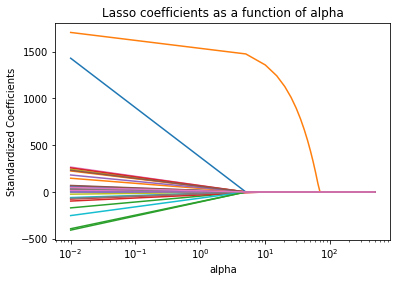

In [227]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)
reg.fit(X_train, y_train)
alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [195]:
feature_idx

array([False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False,  True,  True, False,  True,  True, False, False, False])

In [196]:
df0.iloc[:,1:].columns[feature_idx]

Index(['distance', 'motorway', 'residential', 'secondary_link', 'service',
       'track', 'trunk'],
      dtype='object')

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

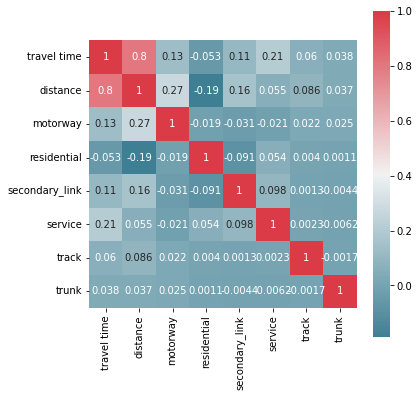

In [199]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(6,6))
corr = df0[['travel time','distance','motorway','residential','secondary_link','service','track','trunk']].corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [206]:
x = np.array(df0[['distance','motorway','residential','secondary_link','service','track','trunk']])
y = np.array(df0['travel time'])
x

array([[0.54262962, 0.        , 0.00172745, ..., 0.        , 0.        ,
        0.        ],
       [0.53177068, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.29643314, 0.        , 0.01135789, ..., 0.06608168, 0.        ,
        0.        ],
       ...,
       [0.38481239, 0.        , 0.28462598, ..., 0.        , 0.        ,
        0.        ],
       [0.67939324, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.18872099, 0.        , 0.10788515, ..., 0.        , 0.        ,
        0.        ]])

In [207]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [208]:
print(X_train.shape)
print(X_test.shape)
# X_train

(6525, 7)
(1632, 7)


In [209]:
# inputs: distance + roadtypes distance
model8_1_3 = nnmodel_(50, num_hlayers=1,Epoch=500)
model8_1_3

Epoch 1/500
204/204 [==============================] - 0s 1ms/step - loss: 762526.1875 - mape: 99.7196 - rmse: 873.2275 - val_loss: 788916.5625 - val_mape: 99.2027 - val_rmse: 888.2098
Epoch 2/500
204/204 [==============================] - 0s 973us/step - loss: 747374.7500 - mape: 98.1993 - rmse: 864.5084 - val_loss: 766228.1875 - val_mape: 96.9890 - val_rmse: 875.3446
Epoch 3/500
204/204 [==============================] - 0s 814us/step - loss: 718406.6875 - mape: 95.2679 - rmse: 847.5887 - val_loss: 730120.0625 - val_mape: 93.3896 - val_rmse: 854.4706
Epoch 4/500
204/204 [==============================] - 0s 783us/step - loss: 677143.5625 - mape: 90.9209 - rmse: 822.8873 - val_loss: 682763.6875 - val_mape: 88.5040 - val_rmse: 826.2952
Epoch 5/500
204/204 [==============================] - 0s 759us/step - loss: 626644.0000 - mape: 85.4754 - rmse: 791.6085 - val_loss: 627639.8125 - val_mape: 82.5630 - val_rmse: 792.2372
Epoch 6/500
204/204 [==============================] - 0s 755us/ste

Epoch 45/500
204/204 [==============================] - 0s 690us/step - loss: 58459.9570 - mape: 28.6928 - rmse: 241.7849 - val_loss: 69280.3750 - val_mape: 28.4020 - val_rmse: 263.2116
Epoch 46/500
204/204 [==============================] - 0s 785us/step - loss: 57609.8516 - mape: 28.4378 - rmse: 240.0205 - val_loss: 68470.5078 - val_mape: 27.9296 - val_rmse: 261.6687
Epoch 47/500
204/204 [==============================] - 0s 862us/step - loss: 56832.6016 - mape: 27.8251 - rmse: 238.3959 - val_loss: 67705.8984 - val_mape: 27.4976 - val_rmse: 260.2036
Epoch 48/500
204/204 [==============================] - 0s 799us/step - loss: 56135.1719 - mape: 27.4039 - rmse: 236.9286 - val_loss: 66990.1016 - val_mape: 27.1406 - val_rmse: 258.8245
Epoch 49/500
204/204 [==============================] - 0s 756us/step - loss: 55513.3125 - mape: 27.0255 - rmse: 235.6126 - val_loss: 66433.0312 - val_mape: 26.6208 - val_rmse: 257.7461
Epoch 50/500
204/204 [==============================] - 0s 838us/step 

204/204 [==============================] - 0s 792us/step - loss: 50670.6484 - mape: 22.9002 - rmse: 225.1014 - val_loss: 61064.2266 - val_mape: 22.4833 - val_rmse: 247.1118
Epoch 90/500
204/204 [==============================] - 0s 873us/step - loss: 50669.9688 - mape: 22.7706 - rmse: 225.0999 - val_loss: 61010.7930 - val_mape: 22.5399 - val_rmse: 247.0036
Epoch 91/500
204/204 [==============================] - 0s 789us/step - loss: 50651.5117 - mape: 22.8749 - rmse: 225.0589 - val_loss: 60962.1289 - val_mape: 22.5972 - val_rmse: 246.9051
Epoch 92/500
204/204 [==============================] - 0s 832us/step - loss: 50650.8945 - mape: 22.8095 - rmse: 225.0575 - val_loss: 60927.6719 - val_mape: 22.6182 - val_rmse: 246.8353
Epoch 93/500
204/204 [==============================] - 0s 770us/step - loss: 50638.0117 - mape: 22.7487 - rmse: 225.0289 - val_loss: 60876.5391 - val_mape: 22.6942 - val_rmse: 246.7317
Epoch 94/500
204/204 [==============================] - 0s 768us/step - loss: 50632

Epoch 133/500
204/204 [==============================] - 0s 764us/step - loss: 50485.8516 - mape: 22.7723 - rmse: 224.6906 - val_loss: 60537.2305 - val_mape: 22.5889 - val_rmse: 246.0432
Epoch 134/500
204/204 [==============================] - 0s 772us/step - loss: 50482.0039 - mape: 22.7864 - rmse: 224.6820 - val_loss: 60536.0508 - val_mape: 22.5864 - val_rmse: 246.0408
Epoch 135/500
204/204 [==============================] - 0s 814us/step - loss: 50483.5039 - mape: 22.7491 - rmse: 224.6853 - val_loss: 60500.2344 - val_mape: 22.6451 - val_rmse: 245.9680
Epoch 136/500
204/204 [==============================] - 0s 823us/step - loss: 50472.2500 - mape: 22.8000 - rmse: 224.6603 - val_loss: 60539.2695 - val_mape: 22.5599 - val_rmse: 246.0473
Epoch 137/500
204/204 [==============================] - 0s 786us/step - loss: 50471.7891 - mape: 22.8180 - rmse: 224.6593 - val_loss: 60588.0742 - val_mape: 22.4619 - val_rmse: 246.1465
Epoch 138/500
204/204 [==============================] - 0s 756us

Epoch 177/500
204/204 [==============================] - 0s 811us/step - loss: 50381.9688 - mape: 22.7633 - rmse: 224.4593 - val_loss: 60420.4492 - val_mape: 22.4451 - val_rmse: 245.8057
Epoch 178/500
204/204 [==============================] - 0s 763us/step - loss: 50381.9531 - mape: 22.7654 - rmse: 224.4592 - val_loss: 60406.5430 - val_mape: 22.4645 - val_rmse: 245.7774
Epoch 179/500
204/204 [==============================] - 0s 787us/step - loss: 50375.5508 - mape: 22.6980 - rmse: 224.4450 - val_loss: 60291.3281 - val_mape: 22.6717 - val_rmse: 245.5429
Epoch 180/500
204/204 [==============================] - 0s 798us/step - loss: 50386.1172 - mape: 22.8593 - rmse: 224.4685 - val_loss: 60352.1992 - val_mape: 22.5443 - val_rmse: 245.6668
Epoch 181/500
204/204 [==============================] - 0s 804us/step - loss: 50359.1133 - mape: 22.6669 - rmse: 224.4084 - val_loss: 60244.3633 - val_mape: 22.7621 - val_rmse: 245.4473
Epoch 182/500
204/204 [==============================] - 0s 781us

Epoch 221/500
204/204 [==============================] - 0s 777us/step - loss: 50299.5078 - mape: 22.8084 - rmse: 224.2755 - val_loss: 60240.2656 - val_mape: 22.5192 - val_rmse: 245.4389
Epoch 222/500
204/204 [==============================] - 0s 776us/step - loss: 50294.5234 - mape: 22.7756 - rmse: 224.2644 - val_loss: 60198.6797 - val_mape: 22.5913 - val_rmse: 245.3542
Epoch 223/500
204/204 [==============================] - 0s 792us/step - loss: 50291.7188 - mape: 22.8481 - rmse: 224.2581 - val_loss: 60227.6680 - val_mape: 22.5314 - val_rmse: 245.4133
Epoch 224/500
204/204 [==============================] - 0s 782us/step - loss: 50301.4609 - mape: 22.7446 - rmse: 224.2799 - val_loss: 60248.7148 - val_mape: 22.4927 - val_rmse: 245.4561
Epoch 225/500
204/204 [==============================] - 0s 759us/step - loss: 50293.2539 - mape: 22.7636 - rmse: 224.2616 - val_loss: 60207.0625 - val_mape: 22.5572 - val_rmse: 245.3713
Epoch 226/500
204/204 [==============================] - 0s 737us

Epoch 265/500
204/204 [==============================] - 0s 744us/step - loss: 50232.2305 - mape: 22.8716 - rmse: 224.1255 - val_loss: 60125.4883 - val_mape: 22.5224 - val_rmse: 245.2050
Epoch 266/500
204/204 [==============================] - 0s 740us/step - loss: 50223.8711 - mape: 22.7652 - rmse: 224.1068 - val_loss: 60104.9375 - val_mape: 22.5518 - val_rmse: 245.1631
Epoch 267/500
204/204 [==============================] - 0s 779us/step - loss: 50229.0898 - mape: 22.7940 - rmse: 224.1185 - val_loss: 60096.1328 - val_mape: 22.5689 - val_rmse: 245.1451
Epoch 268/500
204/204 [==============================] - 0s 796us/step - loss: 50219.5039 - mape: 22.8565 - rmse: 224.0971 - val_loss: 60174.3477 - val_mape: 22.4319 - val_rmse: 245.3046
Epoch 269/500
204/204 [==============================] - 0s 723us/step - loss: 50223.7461 - mape: 22.7590 - rmse: 224.1066 - val_loss: 60089.1914 - val_mape: 22.5724 - val_rmse: 245.1310
Epoch 270/500
204/204 [==============================] - 0s 857us

Epoch 309/500
204/204 [==============================] - 0s 788us/step - loss: 50146.3008 - mape: 22.8112 - rmse: 223.9337 - val_loss: 59961.6484 - val_mape: 22.6080 - val_rmse: 244.8707
Epoch 310/500
204/204 [==============================] - 0s 774us/step - loss: 50139.1211 - mape: 22.7457 - rmse: 223.9177 - val_loss: 59904.1992 - val_mape: 22.7201 - val_rmse: 244.7533
Epoch 311/500
204/204 [==============================] - 0s 752us/step - loss: 50142.7266 - mape: 22.9198 - rmse: 223.9257 - val_loss: 60023.8438 - val_mape: 22.4812 - val_rmse: 244.9976
Epoch 312/500
204/204 [==============================] - 0s 713us/step - loss: 50135.2617 - mape: 22.8121 - rmse: 223.9090 - val_loss: 59969.4023 - val_mape: 22.5734 - val_rmse: 244.8865
Epoch 313/500
204/204 [==============================] - 0s 782us/step - loss: 50131.9219 - mape: 22.7549 - rmse: 223.9016 - val_loss: 59939.5000 - val_mape: 22.6235 - val_rmse: 244.8255
Epoch 314/500
204/204 [==============================] - 0s 797us

Epoch 353/500
204/204 [==============================] - 0s 744us/step - loss: 50034.1406 - mape: 22.9765 - rmse: 223.6831 - val_loss: 59910.5977 - val_mape: 22.4490 - val_rmse: 244.7664
Epoch 354/500
204/204 [==============================] - 0s 788us/step - loss: 50032.3242 - mape: 22.7225 - rmse: 223.6791 - val_loss: 59824.6680 - val_mape: 22.5903 - val_rmse: 244.5908
Epoch 355/500
204/204 [==============================] - 0s 718us/step - loss: 50032.1289 - mape: 22.8488 - rmse: 223.6786 - val_loss: 59848.7266 - val_mape: 22.5463 - val_rmse: 244.6400
Epoch 356/500
204/204 [==============================] - 0s 788us/step - loss: 50022.5039 - mape: 22.9092 - rmse: 223.6571 - val_loss: 59967.3984 - val_mape: 22.3531 - val_rmse: 244.8824
Epoch 357/500
204/204 [==============================] - 0s 763us/step - loss: 50041.0000 - mape: 22.7252 - rmse: 223.6985 - val_loss: 59908.9414 - val_mape: 22.4379 - val_rmse: 244.7630
Epoch 358/500
204/204 [==============================] - 0s 712us

Epoch 397/500
204/204 [==============================] - 0s 761us/step - loss: 49894.6953 - mape: 22.8242 - rmse: 223.3712 - val_loss: 59761.7695 - val_mape: 22.4572 - val_rmse: 244.4622
Epoch 398/500
204/204 [==============================] - 0s 771us/step - loss: 49884.5898 - mape: 22.7575 - rmse: 223.3486 - val_loss: 59744.6914 - val_mape: 22.4759 - val_rmse: 244.4273
Epoch 399/500
204/204 [==============================] - 0s 779us/step - loss: 49887.3516 - mape: 22.8208 - rmse: 223.3548 - val_loss: 59724.4062 - val_mape: 22.5053 - val_rmse: 244.3858
Epoch 400/500
204/204 [==============================] - 0s 779us/step - loss: 49879.5859 - mape: 22.8115 - rmse: 223.3374 - val_loss: 59731.8477 - val_mape: 22.4888 - val_rmse: 244.4010
Epoch 401/500
204/204 [==============================] - 0s 777us/step - loss: 49872.0469 - mape: 22.8337 - rmse: 223.3205 - val_loss: 59760.5977 - val_mape: 22.4351 - val_rmse: 244.4598
Epoch 402/500
204/204 [==============================] - 0s 710us

Epoch 441/500
204/204 [==============================] - 0s 817us/step - loss: 49704.9219 - mape: 22.7032 - rmse: 222.9460 - val_loss: 59571.7812 - val_mape: 22.5584 - val_rmse: 244.0733
Epoch 442/500
204/204 [==============================] - 0s 791us/step - loss: 49699.2188 - mape: 22.6440 - rmse: 222.9332 - val_loss: 59544.4414 - val_mape: 22.6099 - val_rmse: 244.0173
Epoch 443/500
204/204 [==============================] - 0s 796us/step - loss: 49705.5586 - mape: 22.8709 - rmse: 222.9474 - val_loss: 59616.5000 - val_mape: 22.4591 - val_rmse: 244.1649
Epoch 444/500
204/204 [==============================] - 0s 765us/step - loss: 49697.1914 - mape: 22.7622 - rmse: 222.9287 - val_loss: 59601.6992 - val_mape: 22.4805 - val_rmse: 244.1346
Epoch 445/500
204/204 [==============================] - 0s 759us/step - loss: 49690.7539 - mape: 22.7396 - rmse: 222.9142 - val_loss: 59622.1484 - val_mape: 22.4394 - val_rmse: 244.1765
Epoch 446/500
204/204 [==============================] - 0s 754us

Epoch 485/500
204/204 [==============================] - 0s 742us/step - loss: 49556.6289 - mape: 22.7215 - rmse: 222.6132 - val_loss: 59458.1914 - val_mape: 22.5082 - val_rmse: 243.8405
Epoch 486/500
204/204 [==============================] - 0s 817us/step - loss: 49555.8633 - mape: 22.7203 - rmse: 222.6115 - val_loss: 59433.7852 - val_mape: 22.5516 - val_rmse: 243.7905
Epoch 487/500
204/204 [==============================] - 0s 788us/step - loss: 49552.1211 - mape: 22.7492 - rmse: 222.6031 - val_loss: 59476.6328 - val_mape: 22.4589 - val_rmse: 243.8783
Epoch 488/500
204/204 [==============================] - 0s 727us/step - loss: 49561.7422 - mape: 22.6784 - rmse: 222.6247 - val_loss: 59441.1953 - val_mape: 22.5234 - val_rmse: 243.8056
Epoch 489/500
204/204 [==============================] - 0s 784us/step - loss: 49535.4180 - mape: 22.8072 - rmse: 222.5655 - val_loss: 59536.5430 - val_mape: 22.3532 - val_rmse: 244.0011
Epoch 490/500
204/204 [==============================] - 0s 742us

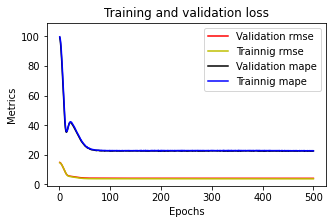

In [210]:
plotme(model8_1_3)

In [211]:
# inputs: distance + roadtypes distance
model8_1_5 = nnmodel_(100, num_hlayers=1,Epoch=500)
model8_1_5

Epoch 1/500
204/204 [==============================] - 0s 1ms/step - loss: 760444.1875 - mape: 99.5155 - rmse: 872.0345 - val_loss: 782661.9375 - val_mape: 98.5966 - val_rmse: 884.6818
Epoch 2/500
204/204 [==============================] - 0s 834us/step - loss: 732966.3125 - mape: 96.7534 - rmse: 856.1345 - val_loss: 741204.5625 - val_mape: 94.4979 - val_rmse: 860.9324
Epoch 3/500
204/204 [==============================] - 0s 714us/step - loss: 680523.3125 - mape: 91.3072 - rmse: 824.9384 - val_loss: 676437.7500 - val_mape: 87.8219 - val_rmse: 822.4584
Epoch 4/500
204/204 [==============================] - 0s 814us/step - loss: 608271.2500 - mape: 83.3230 - rmse: 779.9175 - val_loss: 595372.0000 - val_mape: 78.9508 - val_rmse: 771.6035
Epoch 5/500
204/204 [==============================] - 0s 813us/step - loss: 524686.7500 - mape: 73.6764 - rmse: 724.3527 - val_loss: 507467.6875 - val_mape: 68.9454 - val_rmse: 712.3677
Epoch 6/500
204/204 [==============================] - 0s 867us/ste

Epoch 45/500
204/204 [==============================] - 0s 850us/step - loss: 52711.7578 - mape: 24.8421 - rmse: 229.5904 - val_loss: 63529.4609 - val_mape: 24.4951 - val_rmse: 252.0505
Epoch 46/500
204/204 [==============================] - 0s 744us/step - loss: 52409.5273 - mape: 24.6806 - rmse: 228.9313 - val_loss: 63236.9023 - val_mape: 24.2279 - val_rmse: 251.4695
Epoch 47/500
204/204 [==============================] - 0s 735us/step - loss: 52167.8750 - mape: 24.3768 - rmse: 228.4029 - val_loss: 62913.0781 - val_mape: 24.1274 - val_rmse: 250.8248
Epoch 48/500
204/204 [==============================] - 0s 794us/step - loss: 51944.5820 - mape: 24.2428 - rmse: 227.9135 - val_loss: 62702.6797 - val_mape: 23.8582 - val_rmse: 250.4050
Epoch 49/500
204/204 [==============================] - 0s 789us/step - loss: 51756.8672 - mape: 24.1322 - rmse: 227.5014 - val_loss: 62602.4883 - val_mape: 23.5162 - val_rmse: 250.2049
Epoch 50/500
204/204 [==============================] - 0s 775us/step 

204/204 [==============================] - 0s 754us/step - loss: 50609.0977 - mape: 22.6868 - rmse: 224.9647 - val_loss: 60742.5586 - val_mape: 22.5539 - val_rmse: 246.4601
Epoch 90/500
204/204 [==============================] - 0s 730us/step - loss: 50616.3945 - mape: 22.8139 - rmse: 224.9809 - val_loss: 60721.5391 - val_mape: 22.5839 - val_rmse: 246.4174
Epoch 91/500
204/204 [==============================] - 0s 781us/step - loss: 50604.5586 - mape: 22.7885 - rmse: 224.9546 - val_loss: 60720.4766 - val_mape: 22.5718 - val_rmse: 246.4153
Epoch 92/500
204/204 [==============================] - 0s 706us/step - loss: 50595.7969 - mape: 22.7436 - rmse: 224.9351 - val_loss: 60709.8398 - val_mape: 22.5706 - val_rmse: 246.3937
Epoch 93/500
204/204 [==============================] - 0s 738us/step - loss: 50596.2734 - mape: 22.8232 - rmse: 224.9362 - val_loss: 60725.0039 - val_mape: 22.5231 - val_rmse: 246.4244
Epoch 94/500
204/204 [==============================] - 0s 719us/step - loss: 50584

Epoch 133/500
204/204 [==============================] - 0s 757us/step - loss: 50476.1523 - mape: 22.7932 - rmse: 224.6690 - val_loss: 60477.4375 - val_mape: 22.5204 - val_rmse: 245.9216
Epoch 134/500
204/204 [==============================] - 0s 733us/step - loss: 50469.3164 - mape: 22.7253 - rmse: 224.6538 - val_loss: 60486.1484 - val_mape: 22.4984 - val_rmse: 245.9393
Epoch 135/500
204/204 [==============================] - 0s 733us/step - loss: 50462.7188 - mape: 22.7055 - rmse: 224.6391 - val_loss: 60374.1367 - val_mape: 22.7152 - val_rmse: 245.7115
Epoch 136/500
204/204 [==============================] - 0s 798us/step - loss: 50465.4766 - mape: 22.9025 - rmse: 224.6452 - val_loss: 60430.6211 - val_mape: 22.5765 - val_rmse: 245.8264
Epoch 137/500
204/204 [==============================] - 0s 773us/step - loss: 50473.0742 - mape: 22.7638 - rmse: 224.6621 - val_loss: 60418.2266 - val_mape: 22.5953 - val_rmse: 245.8012
Epoch 138/500
204/204 [==============================] - 0s 756us

Epoch 177/500
204/204 [==============================] - 0s 779us/step - loss: 50362.6758 - mape: 22.7139 - rmse: 224.4163 - val_loss: 60317.6211 - val_mape: 22.5130 - val_rmse: 245.5965
Epoch 178/500
204/204 [==============================] - 0s 776us/step - loss: 50356.5000 - mape: 22.8619 - rmse: 224.4025 - val_loss: 60364.3125 - val_mape: 22.4246 - val_rmse: 245.6915
Epoch 179/500
204/204 [==============================] - 0s 765us/step - loss: 50357.1289 - mape: 22.7464 - rmse: 224.4039 - val_loss: 60290.8789 - val_mape: 22.5479 - val_rmse: 245.5420
Epoch 180/500
204/204 [==============================] - 0s 814us/step - loss: 50351.0039 - mape: 22.7566 - rmse: 224.3903 - val_loss: 60270.7891 - val_mape: 22.5707 - val_rmse: 245.5011
Epoch 181/500
204/204 [==============================] - 0s 758us/step - loss: 50344.5664 - mape: 22.7502 - rmse: 224.3759 - val_loss: 60250.9297 - val_mape: 22.6163 - val_rmse: 245.4606
Epoch 182/500
204/204 [==============================] - 0s 805us

Epoch 221/500
204/204 [==============================] - 0s 736us/step - loss: 50236.7695 - mape: 22.8130 - rmse: 224.1356 - val_loss: 60161.7812 - val_mape: 22.5452 - val_rmse: 245.2790
Epoch 222/500
204/204 [==============================] - 0s 774us/step - loss: 50248.3750 - mape: 22.7440 - rmse: 224.1615 - val_loss: 60199.0352 - val_mape: 22.4816 - val_rmse: 245.3549
Epoch 223/500
204/204 [==============================] - 0s 795us/step - loss: 50236.1562 - mape: 22.8187 - rmse: 224.1342 - val_loss: 60150.3203 - val_mape: 22.5578 - val_rmse: 245.2556
Epoch 224/500
204/204 [==============================] - 0s 758us/step - loss: 50231.6484 - mape: 22.7900 - rmse: 224.1242 - val_loss: 60126.0703 - val_mape: 22.5896 - val_rmse: 245.2062
Epoch 225/500
204/204 [==============================] - 0s 768us/step - loss: 50223.9336 - mape: 22.8575 - rmse: 224.1070 - val_loss: 60200.3203 - val_mape: 22.4480 - val_rmse: 245.3575
Epoch 226/500
204/204 [==============================] - 0s 737us

Epoch 265/500
204/204 [==============================] - 0s 768us/step - loss: 50101.1289 - mape: 22.8844 - rmse: 223.8328 - val_loss: 60106.1797 - val_mape: 22.4043 - val_rmse: 245.1656
Epoch 266/500
204/204 [==============================] - 0s 749us/step - loss: 50097.4102 - mape: 22.7043 - rmse: 223.8245 - val_loss: 60003.1016 - val_mape: 22.5675 - val_rmse: 244.9553
Epoch 267/500
204/204 [==============================] - 0s 701us/step - loss: 50096.2031 - mape: 22.8465 - rmse: 223.8218 - val_loss: 60025.0195 - val_mape: 22.5179 - val_rmse: 245.0000
Epoch 268/500
204/204 [==============================] - 0s 684us/step - loss: 50100.9570 - mape: 22.7298 - rmse: 223.8324 - val_loss: 59954.5547 - val_mape: 22.6454 - val_rmse: 244.8562
Epoch 269/500
204/204 [==============================] - 0s 761us/step - loss: 50091.6016 - mape: 22.8050 - rmse: 223.8115 - val_loss: 60027.2812 - val_mape: 22.5094 - val_rmse: 245.0047
Epoch 270/500
204/204 [==============================] - 0s 776us

Epoch 309/500
204/204 [==============================] - 0s 721us/step - loss: 49945.3438 - mape: 22.7789 - rmse: 223.4845 - val_loss: 59853.1328 - val_mape: 22.5592 - val_rmse: 244.6490
Epoch 310/500
204/204 [==============================] - 0s 709us/step - loss: 49932.1523 - mape: 22.8776 - rmse: 223.4550 - val_loss: 59977.7812 - val_mape: 22.3477 - val_rmse: 244.9036
Epoch 311/500
204/204 [==============================] - 0s 694us/step - loss: 49939.4688 - mape: 22.7399 - rmse: 223.4714 - val_loss: 59861.7305 - val_mape: 22.5266 - val_rmse: 244.6666
Epoch 312/500
204/204 [==============================] - 0s 767us/step - loss: 49929.1523 - mape: 22.8774 - rmse: 223.4483 - val_loss: 59915.4062 - val_mape: 22.4242 - val_rmse: 244.7762
Epoch 313/500
204/204 [==============================] - 0s 805us/step - loss: 49930.1406 - mape: 22.7128 - rmse: 223.4505 - val_loss: 59953.8008 - val_mape: 22.3753 - val_rmse: 244.8546
Epoch 314/500
204/204 [==============================] - 0s 768us

Epoch 353/500
204/204 [==============================] - 0s 779us/step - loss: 49739.9727 - mape: 22.7470 - rmse: 223.0246 - val_loss: 59657.0000 - val_mape: 22.6420 - val_rmse: 244.2478
Epoch 354/500
204/204 [==============================] - 0s 802us/step - loss: 49735.6719 - mape: 22.7903 - rmse: 223.0150 - val_loss: 59721.4961 - val_mape: 22.5030 - val_rmse: 244.3798
Epoch 355/500
204/204 [==============================] - 0s 760us/step - loss: 49734.1406 - mape: 22.8008 - rmse: 223.0115 - val_loss: 59749.0195 - val_mape: 22.4558 - val_rmse: 244.4361
Epoch 356/500
204/204 [==============================] - 0s 799us/step - loss: 49738.0820 - mape: 22.7821 - rmse: 223.0204 - val_loss: 59749.1523 - val_mape: 22.4408 - val_rmse: 244.4364
Epoch 357/500
204/204 [==============================] - 0s 784us/step - loss: 49725.7148 - mape: 22.6562 - rmse: 222.9926 - val_loss: 59655.5391 - val_mape: 22.6069 - val_rmse: 244.2448
Epoch 358/500
204/204 [==============================] - 0s 700us

Epoch 397/500
204/204 [==============================] - 0s 829us/step - loss: 49544.0977 - mape: 22.5967 - rmse: 222.5850 - val_loss: 59490.3086 - val_mape: 22.6233 - val_rmse: 243.9064
Epoch 398/500
204/204 [==============================] - 0s 732us/step - loss: 49546.0938 - mape: 22.7760 - rmse: 222.5895 - val_loss: 59534.7539 - val_mape: 22.5336 - val_rmse: 243.9975
Epoch 399/500
204/204 [==============================] - 0s 761us/step - loss: 49529.9727 - mape: 22.7850 - rmse: 222.5533 - val_loss: 59685.7656 - val_mape: 22.2653 - val_rmse: 244.3067
Epoch 400/500
204/204 [==============================] - 0s 700us/step - loss: 49538.2891 - mape: 22.6410 - rmse: 222.5720 - val_loss: 59605.3008 - val_mape: 22.3857 - val_rmse: 244.1420
Epoch 401/500
204/204 [==============================] - 0s 764us/step - loss: 49522.9141 - mape: 22.6331 - rmse: 222.5374 - val_loss: 59536.0039 - val_mape: 22.5064 - val_rmse: 244.0000
Epoch 402/500
204/204 [==============================] - 0s 754us

Epoch 441/500
204/204 [==============================] - 0s 775us/step - loss: 49369.1484 - mape: 22.6700 - rmse: 222.1917 - val_loss: 59391.7383 - val_mape: 22.4866 - val_rmse: 243.7042
Epoch 442/500
204/204 [==============================] - 0s 721us/step - loss: 49368.8984 - mape: 22.6997 - rmse: 222.1911 - val_loss: 59361.0430 - val_mape: 22.5539 - val_rmse: 243.6412
Epoch 443/500
204/204 [==============================] - 0s 786us/step - loss: 49365.8438 - mape: 22.7136 - rmse: 222.1842 - val_loss: 59351.8477 - val_mape: 22.5543 - val_rmse: 243.6223
Epoch 444/500
204/204 [==============================] - 0s 724us/step - loss: 49352.3633 - mape: 22.6230 - rmse: 222.1539 - val_loss: 59328.9453 - val_mape: 22.5908 - val_rmse: 243.5753
Epoch 445/500
204/204 [==============================] - 0s 764us/step - loss: 49353.7383 - mape: 22.7119 - rmse: 222.1570 - val_loss: 59321.1914 - val_mape: 22.6110 - val_rmse: 243.5594
Epoch 446/500
204/204 [==============================] - 0s 800us

Epoch 485/500
204/204 [==============================] - 0s 759us/step - loss: 49195.4727 - mape: 22.5146 - rmse: 221.8005 - val_loss: 59179.6602 - val_mape: 22.6056 - val_rmse: 243.2687
Epoch 486/500
204/204 [==============================] - 0s 727us/step - loss: 49199.0508 - mape: 22.7683 - rmse: 221.8086 - val_loss: 59217.2695 - val_mape: 22.5070 - val_rmse: 243.3460
Epoch 487/500
204/204 [==============================] - 0s 761us/step - loss: 49190.1836 - mape: 22.7595 - rmse: 221.7886 - val_loss: 59315.0820 - val_mape: 22.3385 - val_rmse: 243.5469
Epoch 488/500
204/204 [==============================] - 0s 774us/step - loss: 49195.6328 - mape: 22.6082 - rmse: 221.8009 - val_loss: 59333.3672 - val_mape: 22.3069 - val_rmse: 243.5844
Epoch 489/500
204/204 [==============================] - 0s 814us/step - loss: 49186.2812 - mape: 22.6758 - rmse: 221.7798 - val_loss: 59246.4570 - val_mape: 22.4363 - val_rmse: 243.4059
Epoch 490/500
204/204 [==============================] - 0s 774us

In [212]:
# inputs: distance + roadtypes distance
model8_1_1 = nnmodel_(100,50, num_hlayers=2,Epoch=500)
model8_1_1

Epoch 1/500
204/204 [==============================] - 0s 1ms/step - loss: 709988.3750 - mape: 94.2667 - rmse: 842.6081 - val_loss: 571170.0625 - val_mape: 76.3162 - val_rmse: 755.7579
Epoch 2/500
204/204 [==============================] - 0s 922us/step - loss: 259834.5781 - mape: 46.7894 - rmse: 509.7397 - val_loss: 116902.2656 - val_mape: 40.7202 - val_rmse: 341.9097
Epoch 3/500
204/204 [==============================] - 0s 845us/step - loss: 97857.5078 - mape: 43.2645 - rmse: 312.8218 - val_loss: 101867.8906 - val_mape: 41.8012 - val_rmse: 319.1675
Epoch 4/500
204/204 [==============================] - 0s 788us/step - loss: 85921.4453 - mape: 40.5692 - rmse: 293.1236 - val_loss: 90673.2969 - val_mape: 38.3358 - val_rmse: 301.1201
Epoch 5/500
204/204 [==============================] - 0s 825us/step - loss: 74889.2578 - mape: 36.8647 - rmse: 273.6590 - val_loss: 80846.3906 - val_mape: 34.9165 - val_rmse: 284.3350
Epoch 6/500
204/204 [==============================] - 0s 852us/step - l

204/204 [==============================] - 0s 810us/step - loss: 50121.5547 - mape: 22.8273 - rmse: 223.8784 - val_loss: 60988.9766 - val_mape: 21.6394 - val_rmse: 246.9595
Epoch 90/500
204/204 [==============================] - 0s 782us/step - loss: 50155.8789 - mape: 22.7663 - rmse: 223.9551 - val_loss: 61110.5820 - val_mape: 21.5348 - val_rmse: 247.2056
Epoch 91/500
204/204 [==============================] - 0s 774us/step - loss: 50116.2422 - mape: 22.7668 - rmse: 223.8666 - val_loss: 59775.4492 - val_mape: 23.3623 - val_rmse: 244.4902
Epoch 92/500
204/204 [==============================] - 0s 798us/step - loss: 50158.4805 - mape: 22.7763 - rmse: 223.9609 - val_loss: 60051.0742 - val_mape: 22.5342 - val_rmse: 245.0532
Epoch 93/500
204/204 [==============================] - 0s 783us/step - loss: 50178.1094 - mape: 22.8652 - rmse: 224.0047 - val_loss: 59959.3398 - val_mape: 22.5966 - val_rmse: 244.8660
Epoch 94/500
204/204 [==============================] - 0s 850us/step - loss: 50091

Epoch 133/500
204/204 [==============================] - 0s 777us/step - loss: 49467.5664 - mape: 22.7207 - rmse: 222.4131 - val_loss: 59789.4258 - val_mape: 22.0484 - val_rmse: 244.5188
Epoch 134/500
204/204 [==============================] - 0s 772us/step - loss: 49442.2578 - mape: 22.6855 - rmse: 222.3562 - val_loss: 59501.2461 - val_mape: 22.3849 - val_rmse: 243.9288
Epoch 135/500
204/204 [==============================] - 0s 790us/step - loss: 49458.7148 - mape: 22.7181 - rmse: 222.3932 - val_loss: 59767.3477 - val_mape: 22.0659 - val_rmse: 244.4736
Epoch 136/500
204/204 [==============================] - 0s 845us/step - loss: 49397.8047 - mape: 22.7446 - rmse: 222.2562 - val_loss: 59964.9570 - val_mape: 21.8792 - val_rmse: 244.8774
Epoch 137/500
204/204 [==============================] - 0s 945us/step - loss: 49439.2344 - mape: 22.7403 - rmse: 222.3493 - val_loss: 59566.7852 - val_mape: 22.2123 - val_rmse: 244.0631
Epoch 138/500
204/204 [==============================] - 0s 772us

Epoch 177/500
204/204 [==============================] - 0s 846us/step - loss: 48909.4375 - mape: 22.6420 - rmse: 221.1548 - val_loss: 58892.7891 - val_mape: 22.3094 - val_rmse: 242.6784
Epoch 178/500
204/204 [==============================] - 0s 775us/step - loss: 48852.5156 - mape: 22.5987 - rmse: 221.0260 - val_loss: 58699.0625 - val_mape: 22.7076 - val_rmse: 242.2789
Epoch 179/500
204/204 [==============================] - 0s 804us/step - loss: 48879.8984 - mape: 22.6767 - rmse: 221.0880 - val_loss: 59060.8633 - val_mape: 22.1425 - val_rmse: 243.0244
Epoch 180/500
204/204 [==============================] - 0s 798us/step - loss: 48832.0000 - mape: 22.7941 - rmse: 220.9796 - val_loss: 59560.2383 - val_mape: 21.6865 - val_rmse: 244.0497
Epoch 181/500
204/204 [==============================] - 0s 745us/step - loss: 48832.6680 - mape: 22.5120 - rmse: 220.9812 - val_loss: 58819.5000 - val_mape: 22.4338 - val_rmse: 242.5273
Epoch 182/500
204/204 [==============================] - 0s 801us

Epoch 221/500
204/204 [==============================] - 0s 910us/step - loss: 48557.5664 - mape: 22.6689 - rmse: 220.3578 - val_loss: 58313.5391 - val_mape: 23.0348 - val_rmse: 241.4820
Epoch 222/500
204/204 [==============================] - 0s 823us/step - loss: 48565.3125 - mape: 22.6347 - rmse: 220.3754 - val_loss: 58544.9414 - val_mape: 22.3942 - val_rmse: 241.9606
Epoch 223/500
204/204 [==============================] - 0s 812us/step - loss: 48591.2734 - mape: 22.6065 - rmse: 220.4343 - val_loss: 58985.8633 - val_mape: 21.9583 - val_rmse: 242.8701
Epoch 224/500
204/204 [==============================] - 0s 810us/step - loss: 48579.7188 - mape: 22.7088 - rmse: 220.4081 - val_loss: 58486.7148 - val_mape: 22.4435 - val_rmse: 241.8403
Epoch 225/500
204/204 [==============================] - 0s 808us/step - loss: 48566.7266 - mape: 22.6848 - rmse: 220.3786 - val_loss: 58529.7461 - val_mape: 22.3785 - val_rmse: 241.9292
Epoch 226/500
204/204 [==============================] - 0s 746us

Epoch 265/500
204/204 [==============================] - 0s 754us/step - loss: 48436.0938 - mape: 22.7178 - rmse: 220.0820 - val_loss: 58149.2344 - val_mape: 23.2217 - val_rmse: 241.1415
Epoch 266/500
204/204 [==============================] - 0s 843us/step - loss: 48473.0469 - mape: 22.6585 - rmse: 220.1660 - val_loss: 58702.8477 - val_mape: 22.0551 - val_rmse: 242.2867
Epoch 267/500
204/204 [==============================] - 0s 782us/step - loss: 48434.0430 - mape: 22.5559 - rmse: 220.0774 - val_loss: 58188.4414 - val_mape: 23.0043 - val_rmse: 241.2228
Epoch 268/500
204/204 [==============================] - 0s 799us/step - loss: 48427.0625 - mape: 22.6889 - rmse: 220.0615 - val_loss: 58378.3047 - val_mape: 22.4221 - val_rmse: 241.6160
Epoch 269/500
204/204 [==============================] - 0s 781us/step - loss: 48464.6289 - mape: 22.7038 - rmse: 220.1468 - val_loss: 59227.9414 - val_mape: 21.6316 - val_rmse: 243.3679
Epoch 270/500
204/204 [==============================] - 0s 798us

Epoch 309/500
204/204 [==============================] - 0s 773us/step - loss: 48358.8008 - mape: 22.5460 - rmse: 219.9063 - val_loss: 58452.1719 - val_mape: 22.2144 - val_rmse: 241.7688
Epoch 310/500
204/204 [==============================] - 0s 727us/step - loss: 48381.2812 - mape: 22.6897 - rmse: 219.9575 - val_loss: 58287.2930 - val_mape: 22.3791 - val_rmse: 241.4276
Epoch 311/500
204/204 [==============================] - 0s 800us/step - loss: 48396.3672 - mape: 22.5440 - rmse: 219.9917 - val_loss: 58068.3438 - val_mape: 22.9931 - val_rmse: 240.9737
Epoch 312/500
204/204 [==============================] - 0s 791us/step - loss: 48434.6797 - mape: 22.6640 - rmse: 220.0788 - val_loss: 58362.3984 - val_mape: 22.3756 - val_rmse: 241.5831
Epoch 313/500
204/204 [==============================] - 0s 780us/step - loss: 48399.5273 - mape: 22.5703 - rmse: 219.9989 - val_loss: 58143.3867 - val_mape: 22.7183 - val_rmse: 241.1294
Epoch 314/500
204/204 [==============================] - 0s 854us

Epoch 353/500
204/204 [==============================] - 0s 759us/step - loss: 48260.8164 - mape: 22.6516 - rmse: 219.6834 - val_loss: 57970.7461 - val_mape: 23.4013 - val_rmse: 240.7711
Epoch 354/500
204/204 [==============================] - 0s 821us/step - loss: 48413.1953 - mape: 22.6599 - rmse: 220.0300 - val_loss: 58205.1016 - val_mape: 22.3251 - val_rmse: 241.2573
Epoch 355/500
204/204 [==============================] - 0s 823us/step - loss: 48326.0820 - mape: 22.5875 - rmse: 219.8319 - val_loss: 58055.3789 - val_mape: 22.6940 - val_rmse: 240.9468
Epoch 356/500
204/204 [==============================] - 0s 853us/step - loss: 48350.1016 - mape: 22.6223 - rmse: 219.8866 - val_loss: 58321.7148 - val_mape: 22.2320 - val_rmse: 241.4989
Epoch 357/500
204/204 [==============================] - 0s 864us/step - loss: 48333.0469 - mape: 22.6352 - rmse: 219.8478 - val_loss: 58471.4648 - val_mape: 22.0415 - val_rmse: 241.8087
Epoch 358/500
204/204 [==============================] - 0s 820us

Epoch 397/500
204/204 [==============================] - 0s 773us/step - loss: 48488.9062 - mape: 22.7302 - rmse: 220.2020 - val_loss: 58057.2695 - val_mape: 22.4801 - val_rmse: 240.9508
Epoch 398/500
204/204 [==============================] - 0s 803us/step - loss: 48290.1289 - mape: 22.6278 - rmse: 219.7502 - val_loss: 58476.0547 - val_mape: 22.0061 - val_rmse: 241.8182
Epoch 399/500
204/204 [==============================] - 0s 791us/step - loss: 48258.1875 - mape: 22.5939 - rmse: 219.6775 - val_loss: 58230.2344 - val_mape: 22.2275 - val_rmse: 241.3094
Epoch 400/500
204/204 [==============================] - 0s 793us/step - loss: 48256.7344 - mape: 22.5632 - rmse: 219.6741 - val_loss: 57882.6172 - val_mape: 22.9969 - val_rmse: 240.5881
Epoch 401/500
204/204 [==============================] - 0s 790us/step - loss: 48296.1250 - mape: 22.6069 - rmse: 219.7638 - val_loss: 58243.9766 - val_mape: 22.2201 - val_rmse: 241.3379
Epoch 402/500
204/204 [==============================] - 0s 773us

Epoch 441/500
204/204 [==============================] - 0s 815us/step - loss: 48094.6523 - mape: 22.5832 - rmse: 219.3049 - val_loss: 58811.3086 - val_mape: 21.6857 - val_rmse: 242.5104
Epoch 442/500
204/204 [==============================] - 0s 746us/step - loss: 48189.0664 - mape: 22.5939 - rmse: 219.5201 - val_loss: 58190.0391 - val_mape: 22.1529 - val_rmse: 241.2261
Epoch 443/500
204/204 [==============================] - 0s 792us/step - loss: 48182.6758 - mape: 22.5675 - rmse: 219.5055 - val_loss: 57898.4414 - val_mape: 23.6595 - val_rmse: 240.6210
Epoch 444/500
204/204 [==============================] - 0s 832us/step - loss: 48243.0977 - mape: 22.5722 - rmse: 219.6431 - val_loss: 57973.1797 - val_mape: 22.5319 - val_rmse: 240.7762
Epoch 445/500
204/204 [==============================] - 0s 872us/step - loss: 48147.5430 - mape: 22.7038 - rmse: 219.4255 - val_loss: 59206.7070 - val_mape: 21.3921 - val_rmse: 243.3243
Epoch 446/500
204/204 [==============================] - 0s 841us

Epoch 485/500
204/204 [==============================] - 0s 788us/step - loss: 48132.6797 - mape: 22.5506 - rmse: 219.3916 - val_loss: 58574.9570 - val_mape: 21.7954 - val_rmse: 242.0226
Epoch 486/500
204/204 [==============================] - 0s 793us/step - loss: 48138.0547 - mape: 22.6341 - rmse: 219.4039 - val_loss: 58087.2305 - val_mape: 22.2503 - val_rmse: 241.0129
Epoch 487/500
204/204 [==============================] - 0s 784us/step - loss: 48014.4102 - mape: 22.5047 - rmse: 219.1219 - val_loss: 57829.9297 - val_mape: 23.6637 - val_rmse: 240.4785
Epoch 488/500
204/204 [==============================] - 0s 804us/step - loss: 48129.9414 - mape: 22.6020 - rmse: 219.3854 - val_loss: 57830.6523 - val_mape: 22.7695 - val_rmse: 240.4800
Epoch 489/500
204/204 [==============================] - 0s 793us/step - loss: 48135.2539 - mape: 22.5462 - rmse: 219.3975 - val_loss: 58058.7148 - val_mape: 22.3099 - val_rmse: 240.9538
Epoch 490/500
204/204 [==============================] - 0s 833us

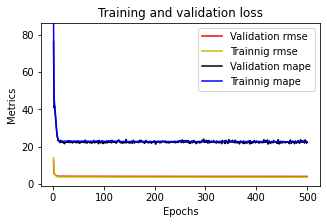

In [213]:
plotme(model8_1_1)

In [214]:
# inputs: distance + hour + roadtypes distance
model8_1_2 = nnmodel_(200,100, num_hlayers=2,Epoch=500)
model8_1_2

Epoch 1/500
204/204 [==============================] - 0s 1ms/step - loss: 574593.6250 - mape: 79.5266 - rmse: 758.0195 - val_loss: 181499.5156 - val_mape: 35.3570 - val_rmse: 426.0276
Epoch 2/500
204/204 [==============================] - 0s 904us/step - loss: 103468.1953 - mape: 42.5207 - rmse: 321.6647 - val_loss: 99742.6797 - val_mape: 40.5307 - val_rmse: 315.8206
Epoch 3/500
204/204 [==============================] - 0s 866us/step - loss: 80579.2891 - mape: 38.8736 - rmse: 283.8649 - val_loss: 83056.2031 - val_mape: 35.6968 - val_rmse: 288.1947
Epoch 4/500
204/204 [==============================] - 0s 877us/step - loss: 65839.2344 - mape: 33.1963 - rmse: 256.5916 - val_loss: 71047.4609 - val_mape: 30.7615 - val_rmse: 266.5473
Epoch 5/500
204/204 [==============================] - 0s 860us/step - loss: 56651.8516 - mape: 28.2883 - rmse: 238.0165 - val_loss: 64954.2109 - val_mape: 25.8408 - val_rmse: 254.8612
Epoch 6/500
204/204 [==============================] - 0s 957us/step - los

204/204 [==============================] - 0s 856us/step - loss: 50209.7148 - mape: 22.5987 - rmse: 224.0752 - val_loss: 59709.8984 - val_mape: 23.3455 - val_rmse: 244.3561
Epoch 90/500
204/204 [==============================] - 0s 803us/step - loss: 50250.4570 - mape: 22.8594 - rmse: 224.1661 - val_loss: 60664.1289 - val_mape: 21.6609 - val_rmse: 246.3009
Epoch 91/500
204/204 [==============================] - 0s 860us/step - loss: 50211.5586 - mape: 22.7315 - rmse: 224.0794 - val_loss: 61099.2539 - val_mape: 21.4623 - val_rmse: 247.1826
Epoch 92/500
204/204 [==============================] - 0s 891us/step - loss: 50184.5742 - mape: 22.6558 - rmse: 224.0191 - val_loss: 59675.1680 - val_mape: 23.3915 - val_rmse: 244.2850
Epoch 93/500
204/204 [==============================] - 0s 875us/step - loss: 50122.1172 - mape: 22.6469 - rmse: 223.8797 - val_loss: 59678.2617 - val_mape: 23.8099 - val_rmse: 244.2914
Epoch 94/500
204/204 [==============================] - 0s 833us/step - loss: 50385

Epoch 133/500
204/204 [==============================] - 0s 857us/step - loss: 49709.2422 - mape: 22.6370 - rmse: 222.9557 - val_loss: 59204.3203 - val_mape: 22.8933 - val_rmse: 243.3194
Epoch 134/500
204/204 [==============================] - 0s 828us/step - loss: 49686.0234 - mape: 22.7834 - rmse: 222.9036 - val_loss: 60289.5039 - val_mape: 21.5223 - val_rmse: 245.5392
Epoch 135/500
204/204 [==============================] - 0s 879us/step - loss: 49693.0312 - mape: 22.7136 - rmse: 222.9193 - val_loss: 60363.3008 - val_mape: 21.4213 - val_rmse: 245.6894
Epoch 136/500
204/204 [==============================] - 0s 867us/step - loss: 49677.3672 - mape: 22.5901 - rmse: 222.8842 - val_loss: 59463.8242 - val_mape: 22.2993 - val_rmse: 243.8521
Epoch 137/500
204/204 [==============================] - 0s 909us/step - loss: 49617.6172 - mape: 22.7458 - rmse: 222.7501 - val_loss: 59190.7070 - val_mape: 22.6786 - val_rmse: 243.2914
Epoch 138/500
204/204 [==============================] - 0s 889us

Epoch 177/500
204/204 [==============================] - 0s 952us/step - loss: 49254.4062 - mape: 22.6877 - rmse: 221.9333 - val_loss: 59477.3047 - val_mape: 21.8996 - val_rmse: 243.8797
Epoch 178/500
204/204 [==============================] - 0s 915us/step - loss: 49257.5938 - mape: 22.7116 - rmse: 221.9405 - val_loss: 58885.0430 - val_mape: 22.3548 - val_rmse: 242.6624
Epoch 179/500
204/204 [==============================] - 0s 1ms/step - loss: 49235.6719 - mape: 22.6732 - rmse: 221.8911 - val_loss: 59219.3398 - val_mape: 22.0183 - val_rmse: 243.3502
Epoch 180/500
204/204 [==============================] - 0s 1ms/step - loss: 49103.0742 - mape: 22.7900 - rmse: 221.5921 - val_loss: 58573.2500 - val_mape: 23.2455 - val_rmse: 242.0191
Epoch 181/500
204/204 [==============================] - 0s 980us/step - loss: 49138.5117 - mape: 22.6751 - rmse: 221.6721 - val_loss: 59352.5391 - val_mape: 21.7792 - val_rmse: 243.6238
Epoch 182/500
204/204 [==============================] - 0s 1ms/step 

Epoch 221/500
204/204 [==============================] - 0s 873us/step - loss: 48998.6250 - mape: 22.6809 - rmse: 221.3563 - val_loss: 58602.7266 - val_mape: 22.4319 - val_rmse: 242.0800
Epoch 222/500
204/204 [==============================] - 0s 876us/step - loss: 48993.3398 - mape: 22.7294 - rmse: 221.3444 - val_loss: 58472.0742 - val_mape: 22.6092 - val_rmse: 241.8100
Epoch 223/500
204/204 [==============================] - 0s 877us/step - loss: 48926.9180 - mape: 22.6948 - rmse: 221.1943 - val_loss: 58371.6016 - val_mape: 22.8382 - val_rmse: 241.6022
Epoch 224/500
204/204 [==============================] - 0s 889us/step - loss: 48877.4141 - mape: 22.7199 - rmse: 221.0824 - val_loss: 58860.9453 - val_mape: 22.0190 - val_rmse: 242.6127
Epoch 225/500
204/204 [==============================] - 0s 846us/step - loss: 48960.6484 - mape: 22.6700 - rmse: 221.2705 - val_loss: 58927.8633 - val_mape: 22.0104 - val_rmse: 242.7506
Epoch 226/500
204/204 [==============================] - 0s 889us

Epoch 265/500
204/204 [==============================] - 0s 846us/step - loss: 48788.3164 - mape: 22.7601 - rmse: 220.8808 - val_loss: 58484.6406 - val_mape: 22.1583 - val_rmse: 241.8360
Epoch 266/500
204/204 [==============================] - 0s 825us/step - loss: 48775.1406 - mape: 22.6565 - rmse: 220.8510 - val_loss: 58143.9297 - val_mape: 23.4419 - val_rmse: 241.1305
Epoch 267/500
204/204 [==============================] - 0s 862us/step - loss: 48826.6289 - mape: 22.7236 - rmse: 220.9675 - val_loss: 58777.8672 - val_mape: 21.9135 - val_rmse: 242.4415
Epoch 268/500
204/204 [==============================] - 0s 879us/step - loss: 48840.3320 - mape: 22.7670 - rmse: 220.9985 - val_loss: 59303.0312 - val_mape: 21.5597 - val_rmse: 243.5221
Epoch 269/500
204/204 [==============================] - 0s 945us/step - loss: 48754.0977 - mape: 22.6524 - rmse: 220.8033 - val_loss: 58104.2305 - val_mape: 23.0847 - val_rmse: 241.0482
Epoch 270/500
204/204 [==============================] - 0s 1ms/s

Epoch 309/500
204/204 [==============================] - 0s 872us/step - loss: 48613.9492 - mape: 22.8839 - rmse: 220.4857 - val_loss: 58007.4297 - val_mape: 22.8309 - val_rmse: 240.8473
Epoch 310/500
204/204 [==============================] - 0s 869us/step - loss: 48797.2422 - mape: 22.6263 - rmse: 220.9010 - val_loss: 58014.1602 - val_mape: 23.5890 - val_rmse: 240.8613
Epoch 311/500
204/204 [==============================] - 0s 848us/step - loss: 48745.9180 - mape: 22.6900 - rmse: 220.7848 - val_loss: 58358.8828 - val_mape: 22.2520 - val_rmse: 241.5758
Epoch 312/500
204/204 [==============================] - 0s 911us/step - loss: 48609.4922 - mape: 22.7463 - rmse: 220.4756 - val_loss: 58936.3203 - val_mape: 21.7405 - val_rmse: 242.7680
Epoch 313/500
204/204 [==============================] - 0s 866us/step - loss: 48695.2969 - mape: 22.7710 - rmse: 220.6701 - val_loss: 58048.5117 - val_mape: 22.7868 - val_rmse: 240.9326
Epoch 314/500
204/204 [==============================] - 0s 857us

Epoch 353/500
204/204 [==============================] - 0s 863us/step - loss: 48635.1016 - mape: 22.7742 - rmse: 220.5337 - val_loss: 58081.2617 - val_mape: 22.4849 - val_rmse: 241.0005
Epoch 354/500
204/204 [==============================] - 0s 821us/step - loss: 48620.2227 - mape: 22.7428 - rmse: 220.4999 - val_loss: 58316.6289 - val_mape: 22.1570 - val_rmse: 241.4884
Epoch 355/500
204/204 [==============================] - 0s 870us/step - loss: 48833.8789 - mape: 22.8027 - rmse: 220.9839 - val_loss: 59215.5586 - val_mape: 21.5325 - val_rmse: 243.3425
Epoch 356/500
204/204 [==============================] - 0s 903us/step - loss: 48738.6250 - mape: 22.7727 - rmse: 220.7683 - val_loss: 58583.4805 - val_mape: 21.9879 - val_rmse: 242.0403
Epoch 357/500
204/204 [==============================] - 0s 879us/step - loss: 48604.9258 - mape: 22.7120 - rmse: 220.4653 - val_loss: 58095.7695 - val_mape: 22.6328 - val_rmse: 241.0306
Epoch 358/500
204/204 [==============================] - 0s 872us

Epoch 397/500
204/204 [==============================] - 0s 871us/step - loss: 48629.8984 - mape: 22.8797 - rmse: 220.5219 - val_loss: 58515.3594 - val_mape: 21.9029 - val_rmse: 241.8995
Epoch 398/500
204/204 [==============================] - 0s 867us/step - loss: 48581.5312 - mape: 22.7188 - rmse: 220.4122 - val_loss: 58060.2148 - val_mape: 22.4937 - val_rmse: 240.9569
Epoch 399/500
204/204 [==============================] - 0s 868us/step - loss: 48609.0234 - mape: 22.7873 - rmse: 220.4745 - val_loss: 58954.5352 - val_mape: 21.6372 - val_rmse: 242.8056
Epoch 400/500
204/204 [==============================] - 0s 916us/step - loss: 48781.0195 - mape: 22.6946 - rmse: 220.8643 - val_loss: 57895.9023 - val_mape: 23.2563 - val_rmse: 240.6157
Epoch 401/500
204/204 [==============================] - 0s 865us/step - loss: 48597.2383 - mape: 22.9169 - rmse: 220.4478 - val_loss: 58387.4805 - val_mape: 22.1110 - val_rmse: 241.6350
Epoch 402/500
204/204 [==============================] - 0s 828us

Epoch 441/500
204/204 [==============================] - 0s 885us/step - loss: 48569.9141 - mape: 22.7732 - rmse: 220.3858 - val_loss: 57879.9961 - val_mape: 23.0789 - val_rmse: 240.5826
Epoch 442/500
204/204 [==============================] - 0s 816us/step - loss: 48563.4805 - mape: 22.7509 - rmse: 220.3712 - val_loss: 57867.8633 - val_mape: 23.6107 - val_rmse: 240.5574
Epoch 443/500
204/204 [==============================] - 0s 884us/step - loss: 48545.6875 - mape: 22.7657 - rmse: 220.3309 - val_loss: 58554.8281 - val_mape: 22.0370 - val_rmse: 241.9810
Epoch 444/500
204/204 [==============================] - 0s 887us/step - loss: 48749.1484 - mape: 22.9042 - rmse: 220.7921 - val_loss: 57902.2500 - val_mape: 22.8715 - val_rmse: 240.6289
Epoch 445/500
204/204 [==============================] - 0s 853us/step - loss: 48573.5586 - mape: 22.7093 - rmse: 220.3941 - val_loss: 58062.5742 - val_mape: 22.4126 - val_rmse: 240.9618
Epoch 446/500
204/204 [==============================] - 0s 883us

Epoch 485/500
204/204 [==============================] - 0s 871us/step - loss: 48672.2305 - mape: 22.6942 - rmse: 220.6178 - val_loss: 57910.3633 - val_mape: 22.9085 - val_rmse: 240.6457
Epoch 486/500
204/204 [==============================] - 0s 879us/step - loss: 48584.1523 - mape: 22.6752 - rmse: 220.4181 - val_loss: 57921.7734 - val_mape: 23.7437 - val_rmse: 240.6694
Epoch 487/500
204/204 [==============================] - 0s 861us/step - loss: 48581.8594 - mape: 22.8070 - rmse: 220.4129 - val_loss: 58270.3906 - val_mape: 22.1896 - val_rmse: 241.3926
Epoch 488/500
204/204 [==============================] - 0s 849us/step - loss: 48560.8086 - mape: 22.7585 - rmse: 220.3652 - val_loss: 58449.2695 - val_mape: 22.0606 - val_rmse: 241.7628
Epoch 489/500
204/204 [==============================] - 0s 888us/step - loss: 48592.4961 - mape: 22.7966 - rmse: 220.4371 - val_loss: 58768.4180 - val_mape: 21.8320 - val_rmse: 242.4220
Epoch 490/500
204/204 [==============================] - 0s 833us

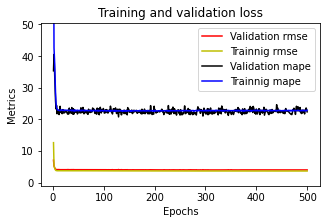

In [215]:
plotme(model8_1_2)

In [216]:
# inputs: distance + roadtypes distance
model8_1_4 = nnmodel_(10, num_hlayers=1,Epoch=500)
model8_1_4

Epoch 1/500
204/204 [==============================] - 0s 1ms/step - loss: 763946.0625 - mape: 99.8676 - rmse: 874.0401 - val_loss: 794250.7500 - val_mape: 99.7321 - val_rmse: 891.2075
Epoch 2/500
204/204 [==============================] - 0s 783us/step - loss: 760430.6250 - mape: 99.5168 - rmse: 872.0267 - val_loss: 789543.6250 - val_mape: 99.2768 - val_rmse: 888.5627
Epoch 3/500
204/204 [==============================] - 0s 699us/step - loss: 754706.0625 - mape: 98.9493 - rmse: 868.7382 - val_loss: 782588.8750 - val_mape: 98.6023 - val_rmse: 884.6406
Epoch 4/500
204/204 [==============================] - 0s 712us/step - loss: 746819.6250 - mape: 98.1585 - rmse: 864.1873 - val_loss: 773488.5000 - val_mape: 97.7151 - val_rmse: 879.4819
Epoch 5/500
204/204 [==============================] - 0s 791us/step - loss: 736591.0000 - mape: 97.1280 - rmse: 858.2488 - val_loss: 761325.0000 - val_mape: 96.5137 - val_rmse: 872.5394
Epoch 6/500
204/204 [==============================] - 0s 696us/ste

Epoch 45/500
204/204 [==============================] - 0s 792us/step - loss: 105333.7344 - mape: 41.6512 - rmse: 324.5516 - val_loss: 115385.8125 - val_mape: 41.4487 - val_rmse: 339.6849
Epoch 46/500
204/204 [==============================] - 0s 733us/step - loss: 103886.5938 - mape: 42.1841 - rmse: 322.3144 - val_loss: 113876.3516 - val_mape: 41.9063 - val_rmse: 337.4557
Epoch 47/500
204/204 [==============================] - 0s 775us/step - loss: 102646.0234 - mape: 42.5591 - rmse: 320.3842 - val_loss: 112566.1641 - val_mape: 42.2798 - val_rmse: 335.5088
Epoch 48/500
204/204 [==============================] - 0s 746us/step - loss: 101548.1484 - mape: 42.8747 - rmse: 318.6662 - val_loss: 111414.8906 - val_mape: 42.5380 - val_rmse: 333.7887
Epoch 49/500
204/204 [==============================] - 0s 670us/step - loss: 100544.0703 - mape: 43.1322 - rmse: 317.0869 - val_loss: 110366.1484 - val_mape: 42.6960 - val_rmse: 332.2140
Epoch 50/500
204/204 [==============================] - 0s 8

Epoch 89/500
204/204 [==============================] - 0s 798us/step - loss: 66273.3359 - mape: 33.0847 - rmse: 257.4361 - val_loss: 77047.8594 - val_mape: 32.6308 - val_rmse: 277.5750
Epoch 90/500
204/204 [==============================] - 0s 813us/step - loss: 65666.8359 - mape: 32.7644 - rmse: 256.2554 - val_loss: 76451.1172 - val_mape: 32.3991 - val_rmse: 276.4980
Epoch 91/500
204/204 [==============================] - 0s 757us/step - loss: 65075.2031 - mape: 32.5115 - rmse: 255.0984 - val_loss: 75884.6094 - val_mape: 32.1141 - val_rmse: 275.4716
Epoch 92/500
204/204 [==============================] - 0s 783us/step - loss: 64497.9805 - mape: 32.2501 - rmse: 253.9645 - val_loss: 75320.9688 - val_mape: 31.8352 - val_rmse: 274.4467
Epoch 93/500
204/204 [==============================] - 0s 717us/step - loss: 63934.9805 - mape: 32.0061 - rmse: 252.8537 - val_loss: 74780.9141 - val_mape: 31.5627 - val_rmse: 273.4610
Epoch 94/500
204/204 [==============================] - 0s 775us/step 

Epoch 133/500
204/204 [==============================] - 0s 712us/step - loss: 52772.3398 - mape: 24.7728 - rmse: 229.7223 - val_loss: 63689.4375 - val_mape: 24.5746 - val_rmse: 252.3677
Epoch 134/500
204/204 [==============================] - 0s 757us/step - loss: 52680.1562 - mape: 24.6869 - rmse: 229.5216 - val_loss: 63587.8633 - val_mape: 24.4870 - val_rmse: 252.1663
Epoch 135/500
204/204 [==============================] - 0s 725us/step - loss: 52591.6797 - mape: 24.5698 - rmse: 229.3288 - val_loss: 63496.6602 - val_mape: 24.4013 - val_rmse: 251.9854
Epoch 136/500
204/204 [==============================] - 0s 741us/step - loss: 52509.4219 - mape: 24.5871 - rmse: 229.1493 - val_loss: 63384.0781 - val_mape: 24.3682 - val_rmse: 251.7619
Epoch 137/500
204/204 [==============================] - 0s 706us/step - loss: 52426.4375 - mape: 24.5109 - rmse: 228.9682 - val_loss: 63311.4180 - val_mape: 24.2554 - val_rmse: 251.6176
Epoch 138/500
204/204 [==============================] - 0s 742us

Epoch 177/500
204/204 [==============================] - 0s 795us/step - loss: 51020.7070 - mape: 23.0864 - rmse: 225.8776 - val_loss: 61549.7539 - val_mape: 22.8923 - val_rmse: 248.0922
Epoch 178/500
204/204 [==============================] - 0s 771us/step - loss: 51013.8008 - mape: 23.0844 - rmse: 225.8624 - val_loss: 61536.7734 - val_mape: 22.8693 - val_rmse: 248.0661
Epoch 179/500
204/204 [==============================] - 0s 684us/step - loss: 51007.5781 - mape: 23.1294 - rmse: 225.8486 - val_loss: 61524.8438 - val_mape: 22.8451 - val_rmse: 248.0420
Epoch 180/500
204/204 [==============================] - 0s 775us/step - loss: 50989.3867 - mape: 23.1497 - rmse: 225.8083 - val_loss: 61512.4102 - val_mape: 22.8245 - val_rmse: 248.0170
Epoch 181/500
204/204 [==============================] - 0s 795us/step - loss: 50977.6680 - mape: 23.0800 - rmse: 225.7823 - val_loss: 61496.8867 - val_mape: 22.8077 - val_rmse: 247.9857
Epoch 182/500
204/204 [==============================] - 0s 870us

Epoch 221/500
204/204 [==============================] - 0s 741us/step - loss: 50784.6016 - mape: 22.8447 - rmse: 225.3544 - val_loss: 61119.2656 - val_mape: 22.5594 - val_rmse: 247.2231
Epoch 222/500
204/204 [==============================] - 0s 856us/step - loss: 50782.1992 - mape: 22.7408 - rmse: 225.3491 - val_loss: 61080.0742 - val_mape: 22.6135 - val_rmse: 247.1438
Epoch 223/500
204/204 [==============================] - 0s 798us/step - loss: 50777.5234 - mape: 22.8820 - rmse: 225.3387 - val_loss: 61084.5000 - val_mape: 22.5942 - val_rmse: 247.1528
Epoch 224/500
204/204 [==============================] - 0s 805us/step - loss: 50774.0625 - mape: 22.8197 - rmse: 225.3310 - val_loss: 61088.4258 - val_mape: 22.5747 - val_rmse: 247.1607
Epoch 225/500
204/204 [==============================] - 0s 800us/step - loss: 50774.7305 - mape: 22.7989 - rmse: 225.3325 - val_loss: 61077.9297 - val_mape: 22.5822 - val_rmse: 247.1395
Epoch 226/500
204/204 [==============================] - 0s 739us

Epoch 265/500
204/204 [==============================] - 0s 696us/step - loss: 50717.3750 - mape: 22.7907 - rmse: 225.2052 - val_loss: 60915.4297 - val_mape: 22.5234 - val_rmse: 246.8105
Epoch 266/500
204/204 [==============================] - 0s 745us/step - loss: 50715.9922 - mape: 22.7048 - rmse: 225.2021 - val_loss: 60924.7695 - val_mape: 22.5033 - val_rmse: 246.8294
Epoch 267/500
204/204 [==============================] - 0s 678us/step - loss: 50715.1250 - mape: 22.7931 - rmse: 225.2002 - val_loss: 60883.9102 - val_mape: 22.5609 - val_rmse: 246.7467
Epoch 268/500
204/204 [==============================] - 0s 692us/step - loss: 50713.5469 - mape: 22.7413 - rmse: 225.1967 - val_loss: 60895.5000 - val_mape: 22.5374 - val_rmse: 246.7701
Epoch 269/500
204/204 [==============================] - 0s 742us/step - loss: 50712.5156 - mape: 22.7711 - rmse: 225.1944 - val_loss: 60882.4688 - val_mape: 22.5519 - val_rmse: 246.7437
Epoch 270/500
204/204 [==============================] - 0s 728us

Epoch 309/500
204/204 [==============================] - 0s 760us/step - loss: 50683.3086 - mape: 22.7232 - rmse: 225.1295 - val_loss: 60789.4258 - val_mape: 22.5216 - val_rmse: 246.5551
Epoch 310/500
204/204 [==============================] - 0s 817us/step - loss: 50684.5039 - mape: 22.7588 - rmse: 225.1322 - val_loss: 60757.9414 - val_mape: 22.5732 - val_rmse: 246.4913
Epoch 311/500
204/204 [==============================] - 0s 738us/step - loss: 50680.8008 - mape: 22.7534 - rmse: 225.1240 - val_loss: 60764.9453 - val_mape: 22.5549 - val_rmse: 246.5055
Epoch 312/500
204/204 [==============================] - 0s 736us/step - loss: 50679.9805 - mape: 22.8141 - rmse: 225.1221 - val_loss: 60776.1602 - val_mape: 22.5317 - val_rmse: 246.5282
Epoch 313/500
204/204 [==============================] - 0s 753us/step - loss: 50678.1094 - mape: 22.8432 - rmse: 225.1180 - val_loss: 60806.9023 - val_mape: 22.4769 - val_rmse: 246.5906
Epoch 314/500
204/204 [==============================] - 0s 787us

Epoch 353/500
204/204 [==============================] - 0s 785us/step - loss: 50654.9414 - mape: 22.7956 - rmse: 225.0665 - val_loss: 60695.9961 - val_mape: 22.5414 - val_rmse: 246.3656
Epoch 354/500
204/204 [==============================] - 0s 856us/step - loss: 50660.6680 - mape: 22.7184 - rmse: 225.0793 - val_loss: 60710.4688 - val_mape: 22.5170 - val_rmse: 246.3949
Epoch 355/500
204/204 [==============================] - 0s 863us/step - loss: 50655.9023 - mape: 22.7701 - rmse: 225.0687 - val_loss: 60689.1328 - val_mape: 22.5517 - val_rmse: 246.3516
Epoch 356/500
204/204 [==============================] - 0s 789us/step - loss: 50655.5586 - mape: 22.7702 - rmse: 225.0679 - val_loss: 60673.9766 - val_mape: 22.5739 - val_rmse: 246.3209
Epoch 357/500
204/204 [==============================] - 0s 691us/step - loss: 50657.2031 - mape: 22.7708 - rmse: 225.0715 - val_loss: 60676.5703 - val_mape: 22.5698 - val_rmse: 246.3261
Epoch 358/500
204/204 [==============================] - 0s 670us

Epoch 397/500
204/204 [==============================] - 0s 689us/step - loss: 50640.7773 - mape: 22.7528 - rmse: 225.0351 - val_loss: 60651.8516 - val_mape: 22.5207 - val_rmse: 246.2760
Epoch 398/500
204/204 [==============================] - 0s 716us/step - loss: 50639.1484 - mape: 22.8188 - rmse: 225.0314 - val_loss: 60654.2070 - val_mape: 22.5138 - val_rmse: 246.2807
Epoch 399/500
204/204 [==============================] - 0s 670us/step - loss: 50641.4492 - mape: 22.7763 - rmse: 225.0365 - val_loss: 60646.6016 - val_mape: 22.5249 - val_rmse: 246.2653
Epoch 400/500
204/204 [==============================] - 0s 729us/step - loss: 50640.0664 - mape: 22.7435 - rmse: 225.0335 - val_loss: 60649.0156 - val_mape: 22.5193 - val_rmse: 246.2702
Epoch 401/500
204/204 [==============================] - 0s 676us/step - loss: 50642.2422 - mape: 22.7832 - rmse: 225.0383 - val_loss: 60632.8711 - val_mape: 22.5417 - val_rmse: 246.2374
Epoch 402/500
204/204 [==============================] - 0s 836us

Epoch 441/500
204/204 [==============================] - 0s 692us/step - loss: 50634.8203 - mape: 22.7590 - rmse: 225.0218 - val_loss: 60600.2305 - val_mape: 22.5333 - val_rmse: 246.1711
Epoch 442/500
204/204 [==============================] - 0s 683us/step - loss: 50628.1133 - mape: 22.8098 - rmse: 225.0069 - val_loss: 60610.2500 - val_mape: 22.5156 - val_rmse: 246.1915
Epoch 443/500
204/204 [==============================] - 0s 794us/step - loss: 50631.8477 - mape: 22.7798 - rmse: 225.0152 - val_loss: 60618.6094 - val_mape: 22.4998 - val_rmse: 246.2085
Epoch 444/500
204/204 [==============================] - 0s 730us/step - loss: 50630.3320 - mape: 22.7525 - rmse: 225.0119 - val_loss: 60596.8789 - val_mape: 22.5315 - val_rmse: 246.1643
Epoch 445/500
204/204 [==============================] - 0s 700us/step - loss: 50628.6602 - mape: 22.8465 - rmse: 225.0081 - val_loss: 60615.8125 - val_mape: 22.5019 - val_rmse: 246.2028
Epoch 446/500
204/204 [==============================] - 0s 759us

Epoch 485/500
204/204 [==============================] - 0s 803us/step - loss: 50623.0156 - mape: 22.7360 - rmse: 224.9956 - val_loss: 60569.6133 - val_mape: 22.5296 - val_rmse: 246.1089
Epoch 486/500
204/204 [==============================] - 0s 897us/step - loss: 50621.7734 - mape: 22.7762 - rmse: 224.9928 - val_loss: 60556.1562 - val_mape: 22.5517 - val_rmse: 246.0816
Epoch 487/500
204/204 [==============================] - 0s 744us/step - loss: 50620.8164 - mape: 22.7931 - rmse: 224.9907 - val_loss: 60571.7852 - val_mape: 22.5257 - val_rmse: 246.1134
Epoch 488/500
204/204 [==============================] - 0s 686us/step - loss: 50621.9258 - mape: 22.8278 - rmse: 224.9932 - val_loss: 60566.4844 - val_mape: 22.5301 - val_rmse: 246.1026
Epoch 489/500
204/204 [==============================] - 0s 729us/step - loss: 50622.0430 - mape: 22.7846 - rmse: 224.9934 - val_loss: 60569.1484 - val_mape: 22.5240 - val_rmse: 246.1080
Epoch 490/500
204/204 [==============================] - 0s 679us